In [1]:
import os
import csv
import cv2
import ast #из строки в список
import numpy as np
import transformers
#import tensorflow as tf
import torch
import tables
import tqdm.notebook as tqdm
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchinfo import summary

/home/bob1ch/Рабочий стол/NN-NLP/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rng = np.random.default_rng()

<img src="data:image/webp;base64,iVBORw0KGgoAAAANSUhEUgAADGAAAApJCAYAAABsUe5PAAAJJmlDQ1BpY2MAAEiJlZVnUJNZF8fv
8zzphUASQodQQ5EqJYCUEFoo0quoQOidUEVsiLgCK4qINEWQRQEXXJUia0UUC4uCAhZ0gywCyrpx
FVFBWXDfGZ33HT+8/5l7z2/+c+bec8/5cAEgiINlwct7YlK6wNvJjhkYFMwE3yiMn5bC8fR0A9/V
uxEArcR7ut/P+a4IEZFp/OW4uLxy+SmCdACg7GXWzEpPWeGjy0wPj//CZ1dYsFzgMt9Y4eh/eexL
zr8s+pLj681dfhUKABwp+hsO/4b/c++KVDiC9NioyGymT3JUelaYIJKZttIJHpfL9BQkR8UmRH5T
8P+V/B2lR2anr0RucsomQWx0TDrzfw41MjA0BF9n8cbrS48hRv9/z2dFX73kegDYcwAg+7564ZUA
dO4CQPrRV09tua+UfAA67vAzBJn/eqiVDQ0IgALoQAYoAlWgCXSBETADlsAWOAAX4AF8QRDYAPgg
BiQCAcgCuWAHKABFYB84CKpALWgATaAVnAad4Dy4Aq6D2+AuGAaPgRBMgpdABN6BBQiCsBAZokEy
kBKkDulARhAbsoYcIDfIGwqCQqFoKAnKgHKhnVARVApVQXVQE/QLdA66At2EBqGH0Dg0A/0NfYQR
mATTYQVYA9aH2TAHdoV94fVwNJwK58D58F64Aq6HT8Id8BX4NjwMC+GX8BwCECLCQJQRXYSNcBEP
JBiJQgTIVqQQKUfqkVakG+lD7iFCZBb5gMKgaCgmShdliXJG+aH4qFTUVlQxqgp1AtWB6kXdQ42j
RKjPaDJaHq2DtkDz0IHoaHQWugBdjm5Et6OvoYfRk+h3GAyGgWFhzDDOmCBMHGYzphhzGNOGuYwZ
xExg5rBYrAxWB2uF9cCGYdOxBdhK7EnsJewQdhL7HkfEKeGMcI64YFwSLg9XjmvGXcQN4aZwC3hx
vDreAu+Bj8BvwpfgG/Dd+Dv4SfwCQYLAIlgRfAlxhB2ECkIr4RphjPCGSCSqEM2JXsRY4nZiBfEU
8QZxnPiBRCVpk7ikEFIGaS/pOOky6SHpDZlM1iDbkoPJ6eS95CbyVfJT8nsxmpieGE8sQmybWLVY
h9iQ2CsKnqJO4VA2UHIo5ZQzlDuUWXG8uIY4VzxMfKt4tfg58VHxOQmahKGEh0SiRLFEs8RNiWkq
lqpBdaBGUPOpx6hXqRM0hKZK49L4tJ20Bto12iQdQ2fRefQ4ehH9Z/oAXSRJlTSW9JfMlqyWvCAp
ZCAMDQaPkcAoYZxmjDA+SilIcaQipfZItUoNSc1Ly0nbSkdKF0q3SQ9Lf5RhyjjIxMvsl+mUeSKL
ktWW9ZLNkj0ie012Vo4uZynHlyuUOy33SB6W15b3lt8sf0y+X35OQVHBSSFFoVLhqsKsIkPRVjFO
sUzxouKMEk3JWilWqUzpktILpiSTw0xgVjB7mSJleWVn5QzlOuUB5QUVloqfSp5Km8oTVYIqWzVK
tUy1R1WkpqTmrpar1qL2SB2vzlaPUT+k3qc+r8HSCNDYrdGpMc2SZvFYOawW1pgmWdNGM1WzXvO+
FkaLrRWvdVjrrjasbaIdo12tfUcH1jHVidU5rDO4Cr3KfFXSqvpVo7okXY5upm6L7rgeQ89NL0+v
U++Vvpp+sP5+/T79zwYmBgkGDQaPDamGLoZ5ht2GfxtpG/GNqo3uryavdly9bXXX6tfGOsaRxkeM
H5jQTNxNdpv0mHwyNTMVmLaazpipmYWa1ZiNsulsT3Yx+4Y52tzOfJv5efMPFqYW6RanLf6y1LWM
t2y2nF7DWhO5pmHNhJWKVZhVnZXQmmkdan3UWmijbBNmU2/zzFbVNsK20XaKo8WJ45zkvLIzsBPY
tdvNcy24W7iX7RF7J/tC+wEHqoOfQ5XDU0cVx2jHFkeRk4nTZqfLzmhnV+f9zqM8BR6f18QTuZi5
bHHpdSW5+rhWuT5z03YTuHW7w+4u7gfcx9aqr01a2+kBPHgeBzyeeLI8Uz1/9cJ4eXpVez33NvTO
9e7zofls9Gn2eedr51vi+9hP0y/Dr8ef4h/i3+Q/H2AfUBogDNQP3BJ4O0g2KDaoKxgb7B/cGDy3
zmHdwXWTISYhBSEj61nrs9ff3CC7IWHDhY2UjWEbz4SiQwNCm0MXwzzC6sPmwnnhNeEiPpd/iP8y
wjaiLGIm0iqyNHIqyiqqNGo62ir6QPRMjE1MecxsLDe2KvZ1nHNcbdx8vEf88filhICEtkRcYmji
uSRqUnxSb7JicnbyYIpOSkGKMNUi9WCqSOAqaEyD0tandaXTlz/F/gzNjF0Z45nWmdWZ77P8s85k
S2QnZfdv0t60Z9NUjmPOT5tRm/mbe3KVc3fkjm/hbKnbCm0N39qzTXVb/rbJ7U7bT+wg7Ijf8Vue
QV5p3tudATu78xXyt+dP7HLa1VIgViAoGN1tubv2B9QPsT8M7Fm9p3LP58KIwltFBkXlRYvF/OJb
Pxr+WPHj0t6ovQMlpiVH9mH2Je0b2W+z/0SpRGlO6cQB9wMdZcyywrK3BzcevFluXF57iHAo45Cw
wq2iq1Ktcl/lYlVM1XC1XXVbjXzNnpr5wxGHh47YHmmtVagtqv14NPbogzqnuo56jfryY5hjmcee
N/g39P3E/qmpUbaxqPHT8aTjwhPeJ3qbzJqamuWbS1rgloyWmZMhJ+/+bP9zV6tua10bo63oFDiV
cerFL6G/jJx2Pd1zhn2m9az62Zp2WnthB9SxqUPUGdMp7ArqGjzncq6n27K7/Ve9X4+fVz5ffUHy
QslFwsX8i0uXci7NXU65PHsl+spEz8aex1cDr97v9eoduOZ67cZ1x+tX+zh9l25Y3Th/0+LmuVvs
W523TW939Jv0t/9m8lv7gOlAxx2zO113ze92D64ZvDhkM3Tlnv296/d5928Prx0eHPEbeTAaMip8
EPFg+mHCw9ePMh8tPN4+hh4rfCL+pPyp/NP637V+bxOaCi+M24/3P/N59niCP/Hyj7Q/Fifzn5Of
l08pTTVNG02fn3Gcufti3YvJlykvF2YL/pT4s+aV5quzf9n+1S8KFE2+Frxe+rv4jcyb42+N3/bM
ec49fZf4bmG+8L3M+xMf2B/6PgZ8nFrIWsQuVnzS+tT92fXz2FLi0tI/QiyQvpNzTVQAAAAgY0hS
TQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dEAP8A/wD/oL2nkwAA
AAlwSFlzAAAB9AAAAfQAxAQ4BwAAAAd0SU1FB+YKFQs1HJvbnCsAAAp4elRYdFJhdyBwcm9maWxl
IHR5cGUgaWNjAABYhZ2XbZJkqQ1F/7MKL4FPCS0HBIrw/jfgQ1Z3T7fdM2M7K4jMeg+EkK7uFemf
7ukffOpQSfl9Vsk/PvXrtxy52rWO2rXXmsccNlbNf/ZJUqRp09zLyCN3/9OZf/EJdn0e/XDntHr+
H0Mfj/7H+Uu6DG3Svvny7QTqiYNlrdo//xedXy/qVCVC+fvz9c1O6VJl//F89+/PE+H8hPHrf58/
FujPz4//Yejn55F/NtTJzJerNX/tMLNj6PfP/2R++vXM3z+19vIOLCbC+0n6m4QIx1XhjYyatX2H
RrfeUm9MIkpvGstcxu+j/Hem03/a/m9N//r52/TrO/r8liU+HT/ImrGRiQpv2P559NdxaLXlVhqQ
/V2JRBsPzOW7R6WI+9/V0vfP7+ZJrPo5WpvxFYdmv59Yzd731vmZV+ZZ/z7vY6j2b8iN+YnFFg8Q
P8iS/GLxR6TyM/gWxQMjwzBULqbaKwsGRUvSMnWT2/5a2Vn0duosGjwYeDdY87An8xEOKXlHU31F
BzwJ2sSDiYF3EsOAYcAwsDCweLgwsOs7JIM1zhpnjW8MPeY4LDoYYF6+/L774zVMw9jk5f0p45Ca
xjBG5FIHg/cNj0qbjMtReQixFbJecL9gowiLhXfKO7wuEyN4XIw5eFug1oKnZRcMbX7gYnG+D9+H
78v35TtYEIvibAyHhjvjUC/CCEI7yVRhcDSqmcFLdq/KQ2Uh2avz5mpMJMd1YWSzmA2rb3Iycn05
IgQV6LSX/pY34BWSVfKj2sYu1BsjcoN3mvBO8UkvgON/43+MNwLfNv+75nYahrDcrucWRraFwmmZ
+mEcCmvn3icIQBdId8fjjsE+nfpeoIJ3eNq9p9wPE4jJg0mPC9ROHsXzIBujLaAD3MfMg6MPoDKA
yMCrsRgb6XHGGQls8YM0f/44olTNj8gFT4TsiawsusGeZ7GTZUUWfzgsWW6j0OCcrCkrmFB213bg
jMhUPhjtWdlZqTEl0Lp5fiAuNtWYUOsGv5EnVTC75DlWAsw3Tzhk4u5cC2DzP4vm1TwBowFeA3jG
MY2NTHo2tWyT3yDeCLh5pGzsYixYpeTFsRaeLSCxONKibBYQWGRoEYuFmqx4eeYPQt3QxYaTtlC0
m7rbTN77lQ/fBH6TQS9AsK7sQMGHZwfdDrZ8afZXZgDXMXreX0WyT3+ltvIhLoeJB8gfZ8LhN/G4
wOGCvkv2Lse6GvnaphwlX0Jw76Us8Sg4fwDzgBoCVAexit1Q48hxX3kTpUoGOowrnF9x2TZu8/zo
W1go5MTguwd8e0qZXsoiWm6l3MnhtFBXpfZRqvRC6ZS6WqnOuJD5I/TKQNcK4ggBMBaY9gERDEpT
SqfwejdEepU+d+nrQA6XPSGHUstodEJDCrIBWexUxj6FU71qK3QIRVgs4kVmFNkVR3kWqyjUoL0U
lUGvYUXXLWCraGiZBUMUepm8nHOVuQJi5zcLP5TDkUx2MU5qG+ieQ2PSy6qrLEKzVKGjW4BGKouA
4njZbZfNMTcGN57ss8pjICBQfPCtuzjxcffiBPhAWocqPvoozBIdSysHY7dIuXh3icm1Xi6AutdK
kI1ot4Twm+exo8Rd9UOlxJ7Cq8A8gTpIA7IjVRDg5NBsv4im38qqWqvWOkatk58raj0HzVkV3qpw
VW3Wa/OaaovHllF7P3QSjsbt2s961VUHk4cwkPrhjEDJ61NzxtTXvFW5k/zikXarqlQZBvQ46nbq
bEHzB2wWjpxe7YktRgk8onsqbELx4CBtzGKjRfqh44BEat1NoGWrm4kgoj5q82bV5VbHoB+FM70e
4nJU6mHjc8EloLndU8UzOFwrNVM5IFy+alipwVEiYK42YC+Kb1G9Z1MHQLmTPkJUNt9RG76lVqW1
ahve742ZrUHOTaO1PVsjZR1f6ZFat9v6mXQyrQ34eUz6M69txKE4NDVRgr9uk2uIRW/6RMO86dE2
S280IG1Ob9Pna1Y+STI2ss3BA7rDzNKeGkdFWaJx4rYFWK7V9p1kVBttX3OO5Le1U2ujWho4bTBM
uyjSZdOLIsEkifyUFkygWWpxK8rYqNn+KPKRD6EFhUJFLwelF39QKlyvexBQJR7spIeuFonqyGGn
He1zdSr8kQZSRkMNKY9z6dJrfz2hrN0lkDaipLqBHRKHYE0ku1PIfUKPRuWYENNlnU6GvGhfejqO
9A38N/HeGN54Tf11ktp9rw6kOrNSP0YyjvdLE3DldqDwpZW0ysSyx3lCD2ErF7H9qB6qQAqhg0Fh
DkAwKpcaUKcDWhvkEWFdg4CN3rFKY9nPpsrmGMpBnWqBVwVplWWDLnkQjKFUEiqexgSCU8+YvofB
MiYG4SF5Wcdi2VqMGGMTtW2Mi83GgMT8yDh4e3SmcdwG1DSu+Lj7DCgfBS8DAaDVwgkurAgbzjj8
y5sFjeJYJaLVuOSg4I+zBXRJQ1v6S7p16ddAD1sZRX5VhN+UoFDlgqyLGhhmDoUtqLPM6/IuNWK2
xOIhZXL0oEdQ2ey8F98R+Knii2sr4n7oMc42oVblypbroIGIB0eTgNNpxxB6+pZLbgB8saH0CCSY
al44QgfZiAT1B0L7193SyRJkQ+euxCa9c6nA7BJcP2mCdDcEBqHguj6ZbHWpTdqGC2txsSSxNDld
4Xfd1BG8qj4x5E9VuN9QQ/r61wsFXibADnQwXePSZXUuu2u+lmKiUbP4gUQyTAcBR4cSNE2qFP08
E6zPfil2Fo216Y5edCuB4Zb1zmQxsTinGGRwp0HaZvgad1KWaS5fE6mfxHDu8OkCY/DsQF2HNSdi
3k9y7oyGbBp9M70b7RrdBtJC81nWTIZ8QNrL0PJXLAaXQDn0VJOio07GCBtunzIkvUYHZQTTiIPN
7jY3jtWe8C6bhQOCaesAarh+rzBk0Jw5HmoHhKFChu7ZXRe0HA66LYIWT2hvz0x0CIq0CvTOMFkQ
NIXPQCk7VUWZU4BzjcVetCoEYIEZUHYXXq2JkEza4wXBMsVoZnwtRB9FWZsy29eQdF9OJ3g6vQha
ftGOi+w//OLRfnc7SpKua6VNG7LLQbA6iu8wfSP263JC6tSo5NL2mIv+DL/VNsQG6ObGG0qb8j7c
ZuCjbSyGpffaA0uXHw9nZbvt1/DsQ2vLCaBxOC1QfpQ0gqaSVjJfOgpRGoeWYJlA9ZAEiKQdLgO0
/dCtj745GWjoXP2dG0d/DQn4aMfndkc/2MtoUKYTi+SwhW9usVhyDuIolsNnCIf4fbfbph4cgNvM
yZu2rTmHoQ1tcbgtHdj+IDeJOBp+QET9nnGI1hhHDiyOPeJwpiCLF2wKDTF5J11nxSb2NL/cQnwu
2q+cDjOQcD+0PCdoD2Jxs0Eu8+Zx57rj9DcDGTsbJ9uFuy4ycns4VQjN53PFJF344gIAJJE2YDs9
Ftg/JBRSXRfShFw28YZaL33vPeZ0CfOS1xsoXzh99JiJ7ntEoV8oEfQyhKRYQEnRERB0B7aGe88N
kRPykkajOZkzAR2tDiWgAbOkWLTyWzXIJ4UyiaDFoUZu33GPw5GUbUT6F+2RBMhLrYq1AACAAElE
QVR42uzdzW4jW9se5psb2zG+IV/AmWTG13MH4J5mknAjgJEgQABtT4xkYqjnmagPQX0I3fAJuPsQ
JCAn0DqCoAWPg0BKjABGPHBlUKxPVKnIxf9VEq8LKEhNsVatqlXFvQfPzWfSNE0AAAAAAAAAAAAA
AABY77faEwAAAAAAAAAAAAAAABg7AQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAA
AAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwA
AAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIAC
AQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAA
AIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAA
AAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAA
AAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwA
AAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIAC
AQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAA
AIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAA
AAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAICC35NkMpnU
ngcAAAAAAAAAvEezJIvlz1mSaZLnJI/L7WG5ldwu3/ej9gkBF2eRZJ7282ua9rMsefns6j7HHmtP
FAAAYFXTNBdyUAAAAAAAAAB4366T/EzSbLH9SnKTtrB5yNXyfd9rnxRwMa7TfuY8ZbvPse6z7DZt
WAMAAKC6pmnOvglgAAAAAAAAAMD25nkbvPietih5sbLdLF9bfe9T2rDFqmnaouYmyV3tkwM+tGna
z6V+6KILVlzldbhikTao8XVgn5/LvwEAAFQjgAEAAAAAAAAA43Wdt8GL2Rb7zdIWMHf7fV352+3K
6wIYwKlc5SXstfqZs9hhjOs1Y+iIAQAAVCGAAQAAAAAAAADj1A9f7PPN7/O8FC9/Xf67X8gMcEzT
tGGx1c+aoW48u4x32xuvWb4GAABwVgIYAAAAAAAAADA+Vzk8fNGZJvmZlyJoAQzgVFZDX932M9t1
7im5ytvPsO9pP+MAAADOQgADAAAAAAAAAMZlmtdFxt+PNGa/KFoAAzimed4GJH7muAGJcxzjvbiO
LiBjZn0AAD4oAQwAAAAAAAAAGJeveV1cfIxvjk/awmUBDOAUhoIRTzlNMKLfIehSQxh3y3NnnKwP
AMAHJYABAAAAAAAAAOMxy2kDErcnHh+4PLO8DV80SRYnPGb/s+wSP8+6rkaMk/UBAPigBDAAAAAA
AAAAYDxu8rqg+PbI40/zulD60gqWgeP7mbdhiGN/dg3pCtzPfdyx6M6ZcbI+AAAflAAGAAAAAAAA
AIzHXV4XE1+d4BhfI4ABHMdQJ4qntGGvU1sMHPvUnTfGYh4F/mNmfQAAPjABDAAAAAAAAAAYj9Xu
FKcqJF4tDBXAAPa1LgBxzi4U/dBak7YzxjkCIDVdR4H/mFkfAIAPrEYA47faJw0AAAAAAAAAI9Uv
Gp6d4BgPSZ5rnyjw7t2sef3LGefwY+C12Ya5fRTz2hNgI+sDAMBx6YABAAAAAAAAAIPO9U3y36MD
BrC/1W/4X92+V5hLv3NQs3ztI3fBWD1nxsf6AAB8YDpgAAAAAAAAAMB4XZ1o3MfaJwa8a+s+m+4r
zGWoC8Y0H7cLxnU+drjkvbM+AAAcnw4YAAAAAAAAADBo6Bvlr09wnEV0wAD2M8/wZ1WTOoXn67px
PNW+UCfyq3eejIv1AQD44Gp0wBDAAAAAAAAAAIBhPzNcRHzsoubZcuzvtU8YeHe+Zjjw8LPSfLrP
s6HtVF2EarkdOEfGw/oAAFwAAQwAAAAAAAAAGI+h4s2usPnYIYybtN9kD7CLpwx/Tn2tOKd+14Ex
zOnY1nX6YBysDwDAhagRwJg0TZPJZFL73AEAAAAAAABgbOZZ/y3yD0n+SvJYe5I907TfMj9P+030
8+Vrj8vtYbn9OPE8Vo/feUhyn+S5sG83/897HLMLxsyW2/1y21W3f3dN5weMNeSc67QYuEabru18
uc9qyKibz6nv99J16a7Nj5Tvo2Me91zPza42fUZ9ye7P0LHc5fV913lO8rc9znFsz/Vt2tDckFMU
YXVz7XTXdt36dvfw6j6r9/ExWR8AAKqq0oxCBwwAAAAAAAAAWOsuw9+i3aT95vnbvBSM1jRN++3y
q9+G/yvJ9+Uc73p/e8r6AtV9zZbHWvft9932PZu7fXT7b9KdU1PYbreY9/URxyo59Trdpi3IL53L
0Ly2Wbtfy+t1bLPlNRg63t2ac/qaw5+9MTw3h7jJ+rVaHDDuodZ1D2qy+dkf63PdhZK2eUbutthK
x7zb4jj953ia9n7Y5hne979b1gcAgNGp0QFDAAMAAAAAAAAA1lukXCDaFbV+TVtUeu5AxnVeF4n/
zPri66H3Hjrf2fLch4IWN8u5LJbHXn3fUJHrdYaLi/u2Kdzdtnj39ohjbXKOddr2uqya56Vo+Wva
ThCr3S+uBsb92XvPvrrgx1DIY2j8edp7qgtkPGX/QEjt5+YYhkIrYw9gbFqvsT7X285r2+2ucLxt
x+lc5eX+7AIW13n57L1Zcw632e05tj4AAIxOjQDG77VPGgAAAAAAAABG7D7Jl5S/9X6W14XFj0ke
ltv98ucpdKGPzrcknza8/9tyLndpC2/naYvJ/9xzjtd5W8R7v5zD45p9viznfbPcb3W+V1se90dv
vlfZvyD+vvfvRTZ/S/8+zrVOu16X+fIYj0n+WDP2j+X2PS/r0+33xwHXpOt6sXqtvyX5nOR5zT7d
M/VlOZevy63bd1u1n5tj2VQ8X3Nejxv+tul+HOtz3Z/Xpvl9OfD69MeY5m0oatVt2s/S57T38NBz
0P13bJHXnWNulmP/le3uF+sDAACJDhgAAAAAAAAAUDDNyzfu77s9pS023/fb+of0u0583WHffmeP
fToaDH2D+S5z6ObffcP5rDfWLqZ56eJwjK4V3484Vs11WnddkrbY+Wk5n23GnOZ1F4hDrsl8YKxd
rkvSPkur67RtIXjt5+aYtu1ycm6bOgd932GcMT/XyXDnhVMYeva6e3fX+3Dov2dP2S/8YH0AAKiu
RgcMAQwAAAAAAAAAKDtGCGO12LXUUaOkH374ld0LwfuF6LsUuh4avuh013Q+MJ9Dr8khxbuLI41V
e53WXZekvfa7Bgj6c3na45oMPUt3B16Tbe+/MazHMb3HAMauaz3G57pzzgL/oWN113PXe3go0LFv
CMP6AABQlQAGAAAAAAAAAIzbULHpvts+hbPJcJHqPp01ZgPjbNNF4Hpgv307AXRzuMvbguBdja0Q
uPY6bbou13uMk7TBof5Yix3HGPqW+13mMc/w8/SrsN9Y1uOYBDAOn9d7KfAfOtY+AaJN12Kf8awP
AABV1Qhg/Fb7pAEAAAAAAADgHfmc5M8k90cYa5G24HXXbx3vf9P/Y5Jvexz/MclD77VSQfoswwWx
n5M87zmHb8trsW8h8VjVXKeSmyRflmPv4mHgtV3CB1fLbdW3Hedxteb10jzGvB6wj0/Z73M3af8b
1v/v2CyHd2cCAIAPTwADAAAAAAAAAHZznzaE8UfaIvaHA8aaZrdOGNd5W2j+48Bz6Y+/ye3AXIcK
eXexTxH82NVep5JZjnfdd+3G0bfrPNbda5uew7GvB+zj0CDgl4HXblKvowsAALwLAhgAAAAAAAAA
sJ+HtJ0f/kjytyR/pS1o3bUodprk+5bvHfp28kMCIP25TrO+I8c8w90HDi3kf8junRjGruY6baPG
Nb/K28LuoW4S21yLoX2+bNhn7OsBNax7lnTBAACADQQwAAAAAAAAAOBwz2m/Uf9z2u4Yk+XPbQMZ
i5SLXucZ/mbyQ74FfagIf7HmvUPf8t+d96EO/Sb3Mam9Ttuocb2Hwjv7zuPPtM/afdoA0J9Zfx++
h/U4hZrzGdu1YL2h5+A623dlAgCAiyOAAQAAAAAAAACncZ+XQMbfknzK5q4DN9lc9Hq15vXnA+Y4
NJ91cxg6/jHCF4eew9jUXqexGrou+16T57Thpj/TPlebwhQfeT0O6eJRy3uc80e27tm52mkUAAC4
IAIYAAAAAAAAAHB6z2m/qf+P5c8h02wuep0PvHaKTgZD3QIWGS4wfwx9NddprNZ1RDhHJ46PvB6b
nr+a98emMMpHClt9BOuehflOowAAwAX5vfYEAAAAAAAAAOCCPKf9xv4kuR74+3XWBzRma167PfIc
h4qn1xXj+jb7t2qu01gtDh9ibx95PcYawNh07HOEbtjNY96u2XsKeAEAwFkJYAAAAAAAAADA+X1K
G2roBxvmaQu5h74lfl0h+c2R5zZU1P2eiv1rq7lO7805uiF85PW433AeNQvo1wVuniO0NUZDAYya
oSkAABi132pPAAAAAAAAAABG6muSqxOO/2nN6/MdxrhPMjnyNjSvdcXciqm3c651Gqux3T8fZT3u
sz7EssvnyDFtOq7uFwAAwLsngAEAAAAAAAAAw65z2iLmhyQ/Bl6vVTi9yboOGOfoYMD7p4PK6fxY
8/osdbpgCGAAAAAfmgAGAAAAAAAAAKx36jDEUEHyGIvV13UqGGNYhPFZd/8sak/sA/ix4W81ru+6
Yz4n+VZhPgAAAEclgAEAAAAAAAAA9ezyjfAPO7z3XMYYFqltjOt0yT76etwneVzztzEFMIQvXlwn
ua09iRVDnVIuuVvJ2NYHAICREcAAAAAAAAAAgPVO3eHhcYf3DhWSz3bY/xDritjPdfz3pOY6jdW6
Yu5zBHguYT2+rHn96sznep3hNdX94rWrJDe1J7Fi6B7Z5b9NH83Y1gcAgJERwAAAAAAAAACA9aY5
fQijb12xes1C8nVz+miF7MdwCQX/u1oX4DnHs3UJ6/Et66/x9RnncbVhfpdc0D9m6zqWfPTOMQAA
sDcBDAAAAAAAAADYbHH4EDtZV6j8o+L8ntcc/9zXpjTHMai5TmO17v45RwDjUtbj85rX13WlOLZF
hq/pY9Z36NjGWJ7rj2rdM/hjy/2tDwAAF0cAAwAAAAAAAAA2O+U3yPe/if8x6wMYz2m/Sb7vmIXk
T0m+rvnbUBeMecbTTeCY39h+yDWtvU5jNXT/HOuaTJP8SnI78LdLWY/7DAcdpkluznD8dcf4lMOK
9MfyXH9UQ11LvmX7NbM+AABcHAEMAAAAAAAAANhsltOFMPoFp6VvHR8qJL/KcXTflL+u8PZbhsMh
xzj+2ApvDw2V1FynsVp3/xzj2brK5jW7lPX4nOGC+OucNih1leFn+EuGgze1jCUsNhbzDHfAOKRj
ySGsDwAA70PTNLWnAAAAAAAAAABj1KxsT2mLrI/te+842xSgfu3t0+Q4AYa7LeZwNXDsXwcedzEw
5j7FDPOBMW73GGe6Zj67jlVznVbdHum6JMNrtctYQ/fP3RGvyXzDe8ayHqc2S/t5dYrrPGR64uON
7ble9T37fW7tc326+2x1m+84xjbz3/V6WB8AAKpqmubsmwAGAAAAAAAAAAzrF27+PPL4/cLVr1vu
N00bejjm3LrC+G3mMFTUenPAsYcKi/ctZjhG8e5QYGGfsWqv06bzqRXASIbvn0O6YHRzKhVMj2U9
zmGe4VDEIcXs6/zM8GflMQNrY3quV90MjFcK9cyy3z0z9Dl5SEhg6Fned92sDwAA1QhgAAAAAAAA
AMB4DBWDfs3xCotXC2p37bAxVGC9b6Fq9435T9nuW/yneVt0ve2+feuKbvctZugX9+9aRNt9m//Q
vPYpdq65Tp2xBTCOef+shiq26QYwhvU4l3UhjEPCLn1DXUWOHb5Ixvdcd4a6P5TCaNfZbx3WBdX2
Cb8NhZGesn9HDesDAEA1AhgAAAAAAAAAMB79ws2umPlnDi+47hcuX+0xxlCB9a7FuLO8FMPvMoeh
IvpdC6+7QtevGS4u3kc/IPBrx/1/LveZDsyne31XNdcpOW4A43pgrH26SBzj/lkdY5frWXs9zml1
nsfshDHN8DN7zIDaqjE+15277Da3n9k9cDd0nG4dt+nqsGpdAGrf8EVifQAAqEgAAwAAAAAAAADG
Y7Vo83vaAtXVwtXb7F6kOc3b8MUh37Tdn1M3123mdZ2XQvR95rCuiH6bcMptXhfdHyuAkbz9NvZt
is2ny/1WC5GHvm3+5/JaLVa2bZxrnea9uW3qMHLbe2+/AHvW+/vqPPrb9957t7kuQ+v+tOW+q9dz
12/bP+d6jME06zsL7BMkW2S4e8I+nRh2McbnOtkt0HOzw9z7hj4jVz+Dt7kXhwI5P3NY+KJz6esD
AEAlAhgAAAAAAAAAMB6rxcVdYXZXMNr/1vfrbC5mni7f86s37jEKuIcKrJ/yUmC/ap62yPRXdit4
32TdsfvF7P1rsFo4f8wAxlBhfxegGXpvV1Df/xb4Zsttl3mdep2GruO2211vrNsDxtrlutzmbYH0
3XJdVu+hadpuE6sBpkOK/ms/N+c2FJzonsNtghiLDN9f37fc/1Bjfa6T4XDS7cp1Wb3X9ukYk6z/
jFy9LncZ7sgyy/Bztk+IcJ1LXx8AACoRwAAAAAAAAACA8dhU5L2uGPlp+Xp/Gyp2P8a3jq+apS2m
XtelYJuQxLGP/XN5rj97r/WL148ZwOj0Ay/99Vmd01A3gFMUAm+6VsdYp3X32rb35KqhAMbPNWMN
ncsuugLoba7JLqGB2usxRtd52wWhW9vbvO40cLN8bSi40XU9qTH/MT7X85QDUHfZ/94pfUb2r0t3
PYau1Wr44NgudX0AAKikRgBj0jRNJpNJ7XMHAAAAAAAAgLFpktwn+XPDe2Z5KVjeJlDxI8m35bin
1BVQz/K6oPRhuf0487Gfkzwuj/swsM9d3hZzH6uYYb4ce5rXa9TN6dvy59Ccnnt/W123h+Xfj32t
urFPvU5jtemadPfQodd9n2N/tPWYp+2WsO1nV9Le//fL6/C45T6nnP8Yn+tZ2us6z8s91N23h3zu
b/sZ2R179Zo8Ls+pW79zuLT1AQCgkhrNKAQwAAAAAAAAAGDYTdoi0W2LPbtC01lef6v3c9qiUcWd
650ygAFstu6zK3kJvjzsOihH5TMSAAAG1Ahg1DkoAAAAAAAAAMCLu7QdR1Y3AFo+IwEAYEDTNGff
fqt90gAAAAAAAAAAAAAAAGMngAEAAAAAAAAAAAAAAFAggAEAAAAAAAAAAAAAAFAggAEAAAAAAAAA
AAAAAFAggAEAAAAAAAAAAAAAAFAggAEAAAAAAAAAAAAAAFAggAEAAAAAAAAA1DYdeG1We1IAI7ao
PQEAALhITdPUngIAAAAAAAAAcLmukjQD29faEwMYgUV8RgIAwKCmac6+TZqmyWQyqX3uAAAAAAAA
AMBluFv5fZ7h7her7ld+/5HkW+0TADih1c/IWcrdgHxGAgBwsao0o9ABAwAAAAAAAAA4o+aA7bb2
5AFOzGckAABsqUYHjN9rnzQAAAAAAAAAcFE+JXncY79pkufakwc4sX0/IwEAgDOYNE2TyWRSex4A
AAAAAAAAAAAAAABbaZrm7Mf8rfZJAwAAAAAAAAAAAAAAjJ0ABgAAAAAAAAAAAAAAQIEABgAAAAAA
AAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAA
AAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEA
BgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAA
QIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAA
AAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAA
AAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAA
AAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEA
BgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAA
QIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAA
AAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAA
AAAAAAAAQIEABgAAAAAAAAAAAAAAQIEABgAAAAAAAAAAvDarPQEAAADGRwADAAAAAAAAAABeLJJc
1Z4EAAAA4/N77QkAAAAAAAAAAMCILKIDBgAAAAMEMAAAAAAAAAAA4MV8uQEAAMArk6ZpMplMas8D
AAAAAAAAAADGoFn+/CPJQ+3JAAAAMKxpmsMH2dFvtU8aAAAAAAAAAABGYrHmdwAAABDAAAAAAAAA
AACApX+98vv/XHsyAAAAjIsABgAAAAAAAAAAtP7rNb8DAACAAAYAAAAAAAAAACSZJvkXK//+f5LM
a08KAACA8RDAAAAAAAAAAACA5Kr373828BoAAAAXTAADAAAAAAAAAACGu10IYAAAAPCPBDAAAAAA
AAAAAOBt2OI/JfmnSWa1JwYAAMA4CGAAAAAAAAAAAHDprpJMe6/9F0n+q+iCAQAAwJIABgAAAAAA
AAAAl26x4W8CGAAAACRJJk3TZDKZ1J4HAAAAAAAAAADU8pS3HTBW/T3JY+1JAgAA8KJpmrMfUwcM
AAAAAAAAAAAu2VU2hy/+zyT/S+1JAgAAUJ8ABgAAAAAAAAAAl2xR+Pt/meR/qD1JAAAA6ps0TZPJ
ZFJ7HgAAAAAAAAAAUMNTNnfA6Pw9yWPtyQIAANBqmubsx9QBAwAAAAAAAACAS3WV7cIXSXJde7IA
AADUJYABAAAAAAAAAMClWuzw3n9Ze7IAAADUNWmaJpPJpPY8AAAAAAAAAADgnKZJnnbc548kD7Un
DgAAQNI0zdmPqQMGAAAAAAAAAACX6GqPfa5rTxoAAIB6dMAAAAAAAAAAAOAS/Uwy33Gf5yR/qz1x
AAAAdMAAAAAAAAAAAIBzmGX38EWSTKMLBgAAwMUSwAAAAAAAAAAA4NLsG6L4f5P8y9qTBwAAoI5J
0zSZTCa15wEAAAAAAAAAAOfyK20XjH39Pclj7ZMAAAC4ZE3TnP2YOmAAAAAAAAAAAHBJrnJY+CLZ
v4MGAAAA75gABgAAAAAAAAAAl+QY4Ymr2icBAADA+QlgAAAAAAAAAABwKWZJFkcaRxcMAACACyOA
AQAAAAAAAADApThWaOL/SvKp9skAAABwXpOmaTKZTGrPAwAAAAAAAAAATmma5Nfy57H8keSh9okB
AABcoqZpzn5MHTAAAAAAAAAAALgE1zlu+KIbEwAAgAuhAwYAAAAAAAAAAJfgV5LZCcb9e5LH2icH
AABwaXTAAAAAAAAAAACA47vOacIX3dgAAABcAB0wAAAAAAAAAAD46H4mmZ9o7Oe0XTCea58kAADA
JdEBAwAAAAAAAAAAjmuR04UvkmSa5Kb2SQIAAHB6OmAAAAAAAAAAAPCR3aUNYZySLhgAAABnpgMG
AAAAAAAAAAAcz1VOH75IdMEAAAC4CDpgAAAAAAAAAADwUf1KMjvTsXTBAAAAOCMdMAAAAAAAAAAA
4Diuc77wRdJ2wbitfdIAAACczu+1JwAAAAAAAAAAACfwkOTPHff5N0n+1fL3f5fk39Y+CQAAAMZD
AAMAAAAAAAAAgI/oYY99Fiu///sk97VPAgAAgPH4rfYEAAAAAAAAAAAAAAAAxk4AAwAAAAAAAAAA
AAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAA
AAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAA
AAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAA
AwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAA
oEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAA
AAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAA
AAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAA
AAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAA
AwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAA
oEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAA
AAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAA
AAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAA
AAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAA
AwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAA
oEAAAwAAAAAAAAAAAAAAoEAAAwAAAAAAAAAAAAAAoGDSNE0mk0nteQAAAAAAAABwWe6SLGpPAgDg
HVLwBwCQpGmasx9TBwwAAAAAAAAAAAAAAIACAQwAAAAAAAAAAAAAAICC32tPAAAAAAAAAICL9znJ
Q+1JAACM1DzJbe1JAAAggAEAAAAAAABAfQ9J7mtPAgAAAAA2+a32BAAAAAAAAAAAAAAAAMZOAAMA
AAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBA
AAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAA
AKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAA
AAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAA
AAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMA
AAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBA
AAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAA
AKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAA
AAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAA
AAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMA
AAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKBA
AAMAAAAAAAAAAAAAAKBAAAMAAAAAAAAAAAAAAKDg99oTAAAAAAAAAAD4gGZJFsufsyTTJM9JHpfb
w3IruV2+70ftEzqheZKrtNdotjzf5yTflj8BAABgHJqmqT0FAAAAAAAAAC7PXZJmuS1qTwaO6DrJ
z7zc35u2X0lu0gYPhlwt3/e99kmd8Fr96l2Tu96/b2tPEmAEFnn92QgAQNosxLk3AQwAAAAAAAAA
ahDA4KOZ523w4nvaAMFiZbtZvrb63qe0YYtV07yEE+5qn9yJr9Wv3vlPe3//WnvCAJUJYAAADBDA
AAAAAAAAAOBSCGDwkVznbfBitsV+s7ThgqGgwW1ed4X4KOZpAyfduf3M2w4gQx1EfE4Al0wAAwBg
gAAGAAAAAAAAAJdCAIOPoh++uN5jjHleul18Xf57dcyPEsCY5XX44ilvwxf9ImNdMAAEMAAABglg
AAAAAAAAAHApBDD4CK5yePiiM81L54enfMwAxupzv+56rQtgfK89eYCKBDAAAAYIYAAAAAAAAABw
KQQweO+meR2UOEZAYJqXThgfLYDRLx7+teEaDAUwbjaMfZ3ktvYJApyQAAYAwAABDAAAAAAAAAAu
hQAG793XvC6GnR1p3Hk+ZgCjf702BSau8zrc8rUwdvd5AvBRCWAAAAwQwAAAAAAAAADgUghg8J7N
ctqAxO2Jx69hNVDRJLnaYp9Ftgu2dF1DAD4qAQwAgAE1Ahi/1T5pAAAAAAAAAIB3ph8eeDjy+F+S
PNc+ySOaJZn2Xtvm/O6TPG45PgAAAJycAAYAAAAAAAAAwG76XVuOHcB4TvKj9kke0VBA4ljXbF77
5AAAALgcAhgAAAAAAAAAALvpF/2folvFt9oneWLHumYCGAAAAJyNAAYAAAAAAAAAwG6mvX/P9hpl
s4ecJtjx0QhgAAAAcDYCGAAAAAAAAAAAhzlFACNJ7muf2DtwVXsCAAAAXA4BDAAAAAAAAACAw5wq
BPBY+8RG7jpvu5EAAADAyQhgAAAAAAAAAAAcZpY2DHBsOmBsdlN7AgAAAFwWAQwAAAAAAAAAgN08
DLx2m+N3Y+g6YDzXPuERuk0bfAEAAICzEcAAAAAAAAAAANjNUGeKaZK7HDeE8Zjkc5IvtU94ZK6j
+wUAAAAV/F57AgAAAAAAAAAA78yPDAcA5mlDGH/lpXvFoY4dvpglWSznOlv+nKbt6vG8/PmwPMcx
us35wxeLld+76/V5w/vny31Wwzjddd31vujWaL7y2uPKeKdytXLc2XLr7o/u+D+iOwsAAHBhJk3T
ZDKZ1J4HAAAAAAAAAJflLi9FzX9muKMAjNnqPdz3nOTbcjtWEONQi7SdI65WXrtfzu85rwvts3z9
R9oAyC5F9rd5HRZI2iBC/7XSM/85bZF/F3hYLOc+27DPNp8jD9kcnrjNS0Blk36xzTRtMKQ0x8e0
1/RbYfzr5TYvjLXPGm1yuzxuFx65X479mJcwyOr5fVsef5/7vLtXnjfsPx24nt29sWnMZHNAZbYc
+0fKawFjsEj7352Ogj8AgCRN01zIQQEAAAAAAAC4dHdJmuW2OHAsqGGRl3t40/Yryde0Re2zvY50
mGmS7yvzeUpbpD5d8/7FwPuvyof5R6vP9iHb4sjjddtdNtv2eKvmade5SbvWV73rezUw7s81azBd
ee9d3t438+UxVsd6SjkwUjJfzmn1uOvukauV8+222z2Oue/aLo445j7zhhr6/80BACBtFuLcmw4Y
AAAAAAAAANSgAwYfwW3arge7eEz7zfwPae/7hx3338U87bPWFdL/SPIp23VLuEpb6N/t+225b8lQ
0GS6fH3Vt8I8uu4h64IrQ50mvmwxv8ds7njQP966jhZdsU13jR+X12fTen7P6zDLQ5I/Vv49X75n
uhzrx4axbvI6PPC8HGufThSzvARCPm95HbugyGrwY5f7K3l7rUudR7qOH5s6y1wvr02pU8rDyu/+
+8N7oAMGAMAAHTAAAAAAAAAAuBQ6YPARTPPSNWDf7Slt0f31jscumS/H7o7ztdIYyXC3kEOf+6FO
B6cwzdtuD92xuuuzGlQpjfWU4Q4M3b30c8uxkrf3Xqm7R2mcXdd36P7f9x7pXGf9c7LtdZmt2f92
hzFgbHTAAAAYUKMDhgAGAAAAAAAAADUIYPBRHCOEsVokvmtHjSH94MTPA8bqF8TvU2D/ngMYSVu4
P3SsXQMTSXv9+muetCGcp2zu3NB3MzCvXfZP2o4c/fnsEgYaWttDw0RDIYxd7+HV+3+1Cwy8VwIY
AAADBDAAAAAAAAAAuBQCGHw0Q0X6+26HFIwPdWyYH3hu/bDDriGRjxjA6EICuwYehkIT3fhXO441
dF13XZuvGb4Hd1mffgDp115X+bWha3675b7TlX0O7cgBYyGAAQAwQAADAAAAAAAAgEshgMFHtMhw
MGDfbhj7BCf6het3RzivoS4JuwQPPmIA41e2DwSUrsVT9l+n/li7Bg7W3a+7nNvQ9Tk09LNubtuE
VLr5HOPeh7EQwAAAGFAjgPFb7ZMGAAAAAAAAAPgg7pP8meSPJF+SPBww1jS7d8KY5W0HhB9HOK8f
SZ57c9u108JHM0vy7UhjTXOcdermdW73A68dI1j3V17fd0kbMNl0jtdp782H5f4AAABHJYABAAAA
AAAAAHBcD0k+pw1i/C1tIfiXDBeqbzJN8n2H9w+FIg4Jgazqz/06dYr9x+IhyeMRxztWAONYx931
Xu3bJTi0znPaQFN/3O9rxp+n7X7xnOHwBgAAwMEEMAAAAAAAAAAATuc5bZH757TF5JPlz20DGYts
121imjYU0XesAMZQ2OB651E+jkMDCqseUi8s8C3tvdh5TvLpyOd3iC7MtKoLWqxaDWb8leOGYwAA
AP6RAAYAAAAAAAAAwHnd5yWQ8be0Be+bCsZvUu4ocDXw2rHCF+vGutp5FIbU7tTwOW0waJL2fvxW
+4L0fMnbTh3XeR0A+p62I8vnjCc8AgAAfEACGAAAAAAAAAAA9TynLXj/I+sL36cphx3ma8Y+5jz7
ZsuNwxwzKDMW88OHeOVT3l6nr3nphrHI224eAAAAR/d77QkAAAAAAAAAAJDntEXmyetv9s/Ka5s6
Exy74H1b82zu3sHHsEi71tO83GvnDOB0z8ddXneD6f79kLb7BQAAwEkJYAAAAAAAAAAAjMentAXu
/UBFV/y+rqtFzQDGj0rH5nRmabuuLJbbque0gYf75e/TDIeGjq0LWXxdea0LY/yV43Z8AQAAGPRb
7QkAAAAAAAAAALwzX9MWp5/KpzWv1wpZcDkWSb4n+ZXkNi/hi/u04Ye/J/lbkj/T3qefc94AzrcM
d4JZ7DoQAADAPgQwAAAAAAAAAAB2c53ThiEeMlzULoDBqczSBi/u8jpc9C1t6OLPJF+SPNaeaIYD
Sl/j+QAAAM5AAAMAAAAAAAAAYHenLva+H3htWvuk+ZAWSX7mdfDiOS9dLsYQulj1dc3r3+MZAQAA
TkwAAwAAAAAAAABgfO53fH+tIvmxFeeXXCe5rT2JEblO2/ViNbjQhS92vQfPNd/rtF1i/ur9revi
AQAAcDICGAAAAAAAAAAAuzt1B4xdgw0CGNu5SnJTexIjMc9wGOXPtAGHsenm+5w2fPEjyefeexYR
sAEAAE5IAAMAAAAAAAAAYHfTnD6E0Xe/49+OOb+hsZ4zzi4JbOc2rztfJMmXjDN8MU3b3WKaNiDS
BX++pA1irLpJG7QBAAA4OgEMAAAAAAAAAID9LM58vE3dJn4MvDbN2wL7fQ2N82PnURiLeYbv328n
POYiSZP9OlR8TTJL8ilvAyKf8vbZ6N4PAABwVAIYAAAAAAAAAAD7uT7h2P3i8cdsDmA8ZrgbxbFC
IkPjCGC8X0MdIu6z+R6r5XY53y8ZDog8J/mr99pqxwwAAICjEcAAAAAAAAAAANjPLKcLYfQDD9uE
Hb5sMc6+5znvvXaf4cAH78N84LWHnUdpnbLTxHWSm7T32ucN73sY+Ps8+3XbAAAAWEsAAwAAAAAA
AABgf7c5zbfs94MT37bYZygUcXWE+Q2FTL7sPMpxPe+53yKCI8c2P3yItePepl3rT1u8/0veBpWu
c9pONQAAwIURwAAAAAAAAAAA2N80yd2Rx5ynDU50viV53HLfv/I6nDBN20HgkPPrF7B/Sf0Qw1C3
hlK3j65Tw7bX8iMbCrDsE9SZ5vW9uo1tOm3M0z5X0+x2/38aeO9tThcSAQAALowABgAAAAAAAADA
YeZJvuZ4nTBuV35/TvJ5h32fk/zZe+0m+xeg98/rfsf5nMpQAKR0jl1AY5sAwEc3dP12DVIkL+Ge
bTqidNe/1L1kkZfwxbq5rjPULWOa5HtO06kGAAC4NE3T1J4CAAAAAAAAAJfnLkmz3ErfWg9j0/S2
p+XPn3npsrCvr72x9ymKT9quFU95PcddQxj9ufzMfkXsNwPX7HaPcfpWP0eaJL8K7/+5vA67nsPt
Eed/PTDWzz3HmmX4Xtzm/KbL69Xff5duKdcr+1xtMY/vy9c3nU//ntvnGZgOjHHI/QtjsMjr+xkA
gLRZiHNvAhgAAAAAAAAA1CCAwXu2WgT7PW2w4WdeF+fvWug9zdvi8+sD5znP6yL7py3HnC3Pa3Uu
X3c45mJlu8nrIEh/zKve+3f5PJgPjL0uQNCFQErBif78h8IXq+u8+t5+wGXW+3s/FNO/Fpuuw7T3
t6u8vudWt7uB6zp0P87XzGebe6S7nqv3RT/Qsfq3rni8u/6r53OTt/dbPzhxlfIzNStcl+4ZKK0b
jJEABgDAAAEMAAAAAAAAAC6FAAbv2dC3/E8zHFq4zuauGNPle/YJSmxjmrchgl9pi97nvfctlnN+
6r13lw4E/a4U+2y7GAo13K5c89Xz36bTxCHzv+uNdXvAWP3rsDhwrHWfs/3w0Oq9O3TfXq1co68D
Y/XX4ufK+1c7UOxzPqX/Vux7ve8C4yeAAQAwoEYA4/faJw0AAAAAAAAA8E59SfK8/P05yV95+Ub/
ruNBVv7+MDBGv6j8PsnnNe/dx/NyvG/LeV2lLawvdYJ4WO7z7QhzeFi5TuvMsjmoss635fhdV4Ms
z7PfCeM+7frs437N6/uEx9Zdi3l275ryuNz6drmWD0n+SHuvXucllNP9e/UY3fk+pr2WPwbG+jNt
EKk7fjfet7T34dC5H/P6Dp3funtP+A8AANjZpGmaTCaT2vMAAAAAAAAA4LLc5aX49c+sL8CFMWrS
3rN/bnjPLG0B+yKvO02s8yNtkfo5noXFcpvlddH/Q9ri+vsMF/aP3SxtwGQ1zPCY9tr6jNnOLC/3
Rv++fUh7LbcJB3X32ENe7itgf4u87tai4A8AIG0HjHMTwAAAAAAAAACgBgEM3rObtGGJUleHzjRt
MXu/M0HXFcP9D8AmAhgAAANqBDB+r33SAAAAAAAAAADvzJcd3/8cIQsAAAB4936rPQEAAAAAAAAA
AAAAAICxE8AAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAA
AAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAA
AAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAo
EMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAA
AAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAA
AAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAA
AAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAA
AAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAo
EMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAA
AAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAA
AAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAA
AAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAoEMAAAAAAAAAAAAAAAAAo+L32BAAAAAAAAAC4ePPaEwAA
GDH/rwQAMBICGAAAAAAAAADUdlt7AgAAAABQ8lvtCQAAAAAAAAAAAAAAAIydDhgAAAAAAAAA1PBQ
ewIAa/yTJP+Q5D/UnggAAADjMmmaJpPJpPY8AAAAAAAAAABgDK6SzJN8rj0RAAAA1mua5uzH/K32
SQMAAAAAAAAAwIjMlxsAAAC8ogMGAAAAAAAAAAC8+Jk2gKGgBgAAYMR0wAAAAAAAAAAAgLq67heL
2hMBAABgXAQwAAAAAAAAAACgtVjzOwAAAAhgAAAAAAAAAADA0r9O8p+Xv/93tScDAADAuEyapslk
Mqk9DwAAAAAAAAAAqO3/SPLPV/6tqAYAAGCkmqY5+zF1wAAAAAAAAAAAgGSW1+GL/5jkqvakAAAA
GA8BDAAAAAAAAAAASBa9f//DwGsAAABcMAEMAAAAAAAAAAAYDlsIYAAAAPCPJk3TZDKZ1J4HAAAA
AAAAAADUMk3y1Hvt/0vyn5P8N0keak8QAACA15qmOfsxdcAAAAAAAAAAAODSDXW6+KdJ/iHJVe3J
AQAAMA4CGAAAAAAAAAAAXLrFhr8JYAAAAJAkmTRNk8lkUnseAAAAAAAAAABQy1OS6Ya//7dJ/vfa
kwQAAOBF0zRnP6YOGAAAAAAAAAAAXLKrbA5f/Mck/1PtSQIAAFCfAAYAAAAAAAAAAJdsUfj7PyT5
H2tPEgAAgPomTdNkMpnUngcAAAAAAAAAAJzbNMnTlu/9I8lD7QkDAADQaprm7MfUAQMAAAAAAAAA
gEt1daL3AgAA8AEJYAAAAAAAAAAAcKkWO7z3v689WQAAACqr0XYDAAAAAAAAAAAqmyVpdtx0wQAA
ABiJpmnOvumAAQAAAAAAAADAJdonTLFLxwwAAAA+mEnTNJlMJrXnAQAAAAAAAAAA5/QzyXyP/f6W
5Ln25AEAAC5d0zRnP6YOGAAAAAAAAAAAXJp59gtfJPt1zgAAAOADEMAAAAAAAAAAAODSXO+53/+d
5FPtyQMAAFDHpGmaTCaT2vMAAAAAAAAAAIBzmCb5tfy5rz+SPNQ+EQAAgEvWNM3Zj6kDBgAAAAAA
AAAAl+Qqh4Uvkv07aAAAAPCO6YABAAAAAAAAAMAl+ZlkfuAYz0n+vvwJAABABTpgAAAAAAAAAADA
6cxzePgiaTto/K+1TwYAAIDzEsAAAAAAAAAAAOBSXB9pnKck/1vtkwEAAODMarTdAAAAAAAAAACA
M5slaY68LWqfFAAAwKVqmubsmw4YAAAAAAAAAABcgmN1v1h1U/ukAAAAOJ9J0zSZTCa15wEAAAAA
AAAAAKcyTfJr+fPY/p7ksfYJAgAAXJqmac5+TB0wAAAAAAAAAAD46K5ymvBFogsGAADAxdABAwAA
AAAAAACAj+5XktkJx9cFAwAA4Mx0wAAAAAAAAAAAgOO6zmnDF4kuGAAAABdBBwwAAAAAAAAAAD6y
U3e/6OiCAQAAcEY6YAAAAAAAAAAAwPGco/tFRxcMAACAD04HDAAAAAAAAAAAPqJp2u4X0zMeUxcM
AACAM9EBAwAAAAAAAAAAjuMm5w1fJMlt7ZMGAADgdHTAAAAAAAAAAADgI5pn9wDGv0nyr5a//7sk
/3aP497XPnEAAIBLUKMDxu+1TxoAAAAAAAAAAE7gYY99Fiu///sIUwAAALDit9oTAAAAAAAAAAAA
AAAAGDsBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAA
AAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAA
AAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIB
DAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAA
gAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAA
AAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAA
AAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAA
AAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIB
DAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAA
gAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAA
AAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAA
AAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAA
AAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIB
DAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAA
gAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgAIBDAAAAAAAAAAAAAAAgIJJ0zSZTCa15wEA
AAAAAADAZblLsqg9CQCAd0jBHwBAkqZpzn5MHTAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAK
fq89AQAAAAAAAAAu3p9J7mtPAgBgpBZJ7mpPAgAAHTAAAAAAAAAAAAAAAACKBDAAAAAAAAAAAAAA
AAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAA
AAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAA
AAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAA
AAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAK
BDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAA
AAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAA
AAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAA
AAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAA
AAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAK
BDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAA
AAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAA
AAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKBDAAAAAAAAAAAAAAAAAKfq89AQAA
AAAAAAAAzmK23HbxkOS58rwXO77/eTnvofN/PMH8TjHuPmu1q3XXCQAAgHWapqk9BQAAAAAAAAAu
z12SZrntWlwN7Oc2L8/dLlvNZ/TXHvO9WzPW3R5jbbPdnuC8912rfbefSb4muU4yPd1yAnta5PUz
CwBA2izEubffap80AAAAAAAAAACjdl3puFc5fRcIWvO06/w1ydPyp3AcAABAnw4YAAAAAAAAAFSg
AwaMwzxtt4WntM/juo4TNYIQ39N2ZljXteF72s+PQzo2LNKGDUodNa6W16qmRTZ3xviV3T5PZytj
rrvO3yMEA2OgAwYAwIAaHTAEMAAAAAAAAACoQQADxqUr7F8NY6xut2eez2x53OsMBwN+Hvl46wII
xz7OMawLjBy6Ros11+EpbQAFqEcAAwBgQI0Axm+1TxoAAAAAAAAAgOruV37/NvD3cxfgXyd5TvJj
zd+fT3j+27xe07HPffVc/8jb9Z+m7YRxXfvEAQAAahPAAAAAAAAAAABg1VAAY5bzdqu5Shu+OFXY
gPU+ZTh48jVCGAAAwIUTwAAAAAAAAAAAYNVjkoeB18/VBWORNvDx7dCB2NunNa/fpl0bAACAiySA
AQAAAAAAAABA31D44TrJ9AzHvsr6EAjn8Zi2A0nfNG0nDAAAgP+fvfsPjvMw7wP/hSxbsewAWse5
pAmp6qCkbSiqcQKlRw/ii5OA0ohu6jRD0HQu0fmoClBbaxpVV4IdKWGZs64ELzpm6lxjQCNdqvZi
WuBk4rahKgrTOGl4Zq9C6o4pNteeEI2IpEnteAPEli3LNu6PxYILYIEXv98F9vOZ2cHuu4v3ffbd
911C9vN9n7YkgAEAAAAAAAAAwGJjSapNlg9s8XYrc9sw/aJ848ss75u7AQAAtB0BDAAAAAAAAAAA
Fqum+QSE/i3ebj3gIYBRvpUmkGz1cQAAANCSBDAAAAAAAAAAAGimWQiiZ+62Vfrntlvd6IrYsJUC
GCZgAAAAbUkAAwAAAAAAAACAZiaSTDZZPrDWFa1SPdwxXvYbp1B32QUAAACUQQADAAAAAAAAAIDl
NJuC0b9F2xpILfAxVvabZlW2chIKAABASxLAAAAAAAAAAABgOc0CGJVs/hSMSmrBDuGLnWNy46sA
AADYWQQwAAAAAAAAAABYTjXNQxGbPQWjP7UQxuhGV8S2qM7dAAAA2ooABgAAAAAAAAAAK2kWwOhL
0r2J2xiY246pCq1jpc93vOziAAAAyiCAAQAAAAAAAADASpYLRgxs0vq7k/REU3+r6VnhOZ8VAADQ
lgQwAAAAAAAAAAAo0mwKRv8mrXsgSTXJaNlvkgWWC2BMxmcFAAC0KQEMAAAAAAAAAACKNGu4787m
hDAGoqG/1VSy/ISTwbKLAwAAKIsABgAAAAAAAAAARSaTjDdZvtEAxkBqzf4CGK1lKLXPZbHhND8O
AAAA2oIABgAAAAAAAAAAqzHWZFl/apMw1qsvyURqAQ9aw0BqAYzFRpOcKLs4AACAMglgAAAAAAAA
AACwGqNJqk2Wr3cKRvfc75p+0TpOJxlpsnxw7gYAANDWBDAAAAAAAAAAAFitZmGJgXWuayC1QMfY
On+fzdGd2sSLl7N08sV4krsiJAMAAJAkubHsAgAAAAAAAAAA2DHGsrRJvztJX2rN+mvRP7e+6hp/
j+Z6UptgsdrX1n9Wmjw/nmQ4a/9MAQAAdjUBDAAAAAAAAAAAVmti7tazaHl/1tas359acMNkhc3T
N3dbj2pqn+t4aqGYybLfDAAAQCsSwAAAAAAAAAAAYC1Gk4wsWjaQ5ERWP82iL7Um/4my38wuMpHa
Z7AW9eAFAAAAqyCAAQAAAAAAAADAWowlOZ2ksmh5f1Y30aKS64ENNk81a5tCAgAAwBrdUHYBAAAA
AAAAAADsKNXUQhiLDazy9+uvW01YAwAAAFqGAAYAAAAAAAAAAGvVLIDRM3crMpBa+KJa9psAAACA
tRDAAAAAAAAAAABgrcaTTDZZXjQFoydJ99zvt7uBJC9kdaEVAAAAWoAABgAAAAAAAAAA6zHaZFl/
we8MpBbcGAs9SfrSPMgCAABACxLAAAAAAAAAAABgPZqFKCpZfgpGJbWAhvBFTffcz2rZhQAAALA6
AhgAAAAAAAAAAKzHcpMslpuC0Z9aCGM0JLUAhukXAAAAO4gABgAAAAAAAAAA69UsgNGX69MdGg3M
vV7ooEYAAwAAYIcRwAAAAAAAAAAAYL2WC1QMLHrcM3cbK1xje+ib+1ktuxAAAABWTwADAAAAAAAA
AICNaBaq6G/yuBoBjLp6AMMEDAAAgB1EAAMAAAAAAAAAgI0YbbKsOwtDGAPLvK5d9W18FQAAAGw3
AQwAAAAAAAAAADZiMsl4k+X1AMZAkkoEMOq6k/TM3R/fyIoAAADYXgIYAAAAAAAAAABs1FiTZf25
PgljPLWgBrVACgAAADuQAAYAAAAAAAAAABs1mqTaZPlAkr40D2i0o+4sDGAIpQAAAOwgAhgAAAAA
AAAAANRVNvC7zUIWQ6kFMwQwakaycB8LYAAAAOwgAhgAAAAAAAAAAPTN/ezewDpGl1k+lubTMdrN
SK7v58Q+AQAA2HEEMAAAAAAAAAAA6J/72ZekZ53rmJi7LTa61hXtMpUkzyYZWLR8Yh3rAgAAoEQC
GAAAAAAAAAAA7aseDmicfDGS9YcwxhY9Xi6UsVrL1bGRSR3N9C2zvLKBdVaSnE7ycq4HXDZD9xqX
AwAAsEluLLsAAAAAAAAAAAC2RXeuN+l3pxZu6M/SkEFPkhdTC1M0BiiqKQ5TjKYWOqgby+r0LbNs
YJnXdyd5YW79k4ueW67OnibvtXtuHywX9OifW9dkVqcyt66eLB/qqFtpXzZ+Vo3L+rJ8mKM7Cz+3
1ewTAAAA1mJ2drbsEgAAAAAAAABoPy8kmZ27FTUpA5vjdK6fd+u5vbDK7Yw0/M5qJ0hspK7V1vnC
Jm9no7fTWd5GP6v1fnZAa+rLwnMaAIDUshDbfTMBAwAAAAAAAACgfU2m+XSH+iSH9RhNbUrDaGqT
FzajntVoNuGila12IsX4Brax0/YJAABAazMBAwAAAAAAAIASmIABALA6JmAAADRRxgSMG8p+0wAA
AAAAAAAAAAAAAK1OAAMAAAAAAAAAAAAAAKCAAAYAAAAAAAAAAAAAAEABAQwAAAAAAAAAAAAAAIAC
AhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAA
AAAoIIABAAAAAAAAAAAAAABQQAADAAAAAAAAAAAAAACggAAGAAAAAAAAAAAAAABAAQEMAAAAAAAA
AAAAAACAAgIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAAAAAAAAAAFBDAAAAA
AAAAAAAAAAAAKCCAAQAAAAAAAAAAAAAAUEAAAwAAAAAAAAAAAAAAoIAABgAAAAAAAAAAAAAAQAEB
DAAAAAAAAAAAAAAAgAICGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIYAAAAAAAAAAAAAAA
ABQQwAAAAAAAAAAAAAAAACgggAEAAAAAAAAAAAAAAFBAAAMAAAAAAAAAAAAAAKCAAAYAAAAAAAAA
AAAAAEABAQwAAAAAAAAAAAAAAIACAhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAA
AAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIIABAAAAAAAAAAAAAABQQAADAAAAAAAAAAAAAACggAAG
AAAAAAAAAAAAAABAAQEMAAAAAAAAAAAAAACAAgIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAA
CghgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCCAAQAAAAAAAAAAAAAAUEAAAwAAAAAAAAAA
AAAAoIAABgAAAAAAAAAAAAAAQAEBDAAAAAAAAAAAAAAAgAICGAAAAAAAAAAAAAAAAAUEMAAAAAAA
AAAAAAAAAAoIYAAAAAAAAAAAAAAAABS4sewCAAAAAAAAAGh7/Un6yi4CAKBFVcouAACAGgEMAAAA
AAAAAMo2UHYBAAAAAFDkhrILAAAAAAAAAAAAAAAAaHUmYAAAAAAAAABQhrEkE2UXAdDELXO3V8ou
BAAAgNbSMTs7m46OjrLrAAAAAAAAAACAVtCfpCfJibILAQAAYHmzs7Pbvs0byn7TAAAAAAAAAADQ
QnrmbgAAALCACRgAAAAAAAAAAHDdi6kFMDTUAAAAtDATMAAAAAAAAAAAoDyVXJ9+0Vd2MQAAALQW
AQwAAAAAAAAAAKj5qw33BTAAAABYQAADAAAAAAAAAABqfrTh/pGyiwEAAKC1dMzOzqajo6PsOgAA
AAAAAAAAoGxTSb6z4fE7klTLLgoAAIClZmdnt32bJmAAAAAAAAAAAEDSnYXhiyTpL7soAAAAWocA
BgAAAAAAAAAANA9b9JRdFAAAAK1DAAMAAAAAAAAAAJK+JsuOlF0UAAAArUMAAwAAAAAAAACAdlfJ
0gDGG0luSfPJGAAAALQhAQwAAAAAAAAAANpds5DFm+d+9pRdHAAAAK1BAAMAAAAAAAAAgHbXt8Jz
JmAAAACQJOmYnZ1NR0dH2XUAAAAAAAAAAEAZKkm+UPCaH0nym2UXCgAAwHWzs7Pbvk0TMAAAAAAA
AAAAaGermXBxT9lFAgAAUD4BDAAAAAAAAAAA2lnfKl4zUHaRAAAAtIAyxm4AAAAAAAAAAEALqCSZ
XeVtNZMyAAAA2Cazs7PbfjMBAwAAAAAAAACAdrWWUMVqJmUAAACwiwlgAAAAAAAAAADQrgZW+bqv
JPmRsosFAACgXAIYAAAAAAAAAAC0o+4kPat87Tcl+a6sPrABAADALiSAAQAAAAAAAABAO1pPmKKv
7KIBAAAoT8fs7Gw6OjrKrgMAAAAAAAAAALbTy6lNwVir25NMll08AABAu5udnd32bZqAAQAAAAAA
AABAu+nL+sIXSdJfdvEAAACUQwADAAAAAAAAAIB2s94QxZ8l+dtlFw8AAEA5OmZnZ9PR0VF2HQAA
AAAAAAAAsB0qSb6wwXUcTDJe9hsBAABoZ7Ozs9u+TRMwAAAAAAAAAABoJwObsI71TtAAAABgBzMB
AwAAAAAAAACAdvJyku5NWM87klTLfjMAAADtygQMAAAAAAAAAADYOn3ZnPBFkpwo+80AAACwvQQw
AAAAAAAAAABoFwObtJ43khwp+80AAACwzcoYuwEAAAAAAAAAANusO8nsJt82K9ABAADAGs3Ozm77
zQQMAAAAAAAAAADawdAWrLO/7DcFAADANjIBAwAAAAAAAACAXa6S5AvZ/AkYs0n6yn5zAAAA7cgE
DAAAAAAAAAAA2HxDqYUwtoIpGAAAAG2iY3Z2Nh0dHWXXAQAAAAAAAAAAW6GS5OVsXQAjSW5PMln2
GwUAAGgns7Oz275NEzAAAAAAAAAAANjNtnL6ReM2AAAA2OVMwAAAAAAAAAAAYLfajukXdaZgAAAA
bCMTMAAAAAAAAAAAYPNsx/SLutNlv1kAAAC2lgkYAAAAAAAAAADsRts5/aLuYJLxst84AABAOzAB
AwAAAAAAAAAANsfpbG/4IqlN3AAAAGC3KiP1AQAAAAAAAAAALeh0ktm52+myiwEAAGB5s7Oz234z
AQMAAAAAAAAAAAAAAKCAAAYAAAAAAAAAAAAAAEABAQwAAAAAAAAAAAAAAIACAhgAAAAAAAAAAAAA
AAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIIABAAAAAAAA
AAAAAABQQAADAAAAAAAAAAAAAACggAAGAAAAAAAAAAAAAABAAQEMAAAAAAAAAAAAAACAAgIYAAAA
AAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCCA
AQAAAAAAAAAAAAAAUEAAAwAAAAAAAAAAAAAAoIAABgAAAAAAAAAAAAAAQAEBDAAAAAAAAAAAAAAA
gAICGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAA
AAAAACgggAEAAAAAAAAAAAAAAFBAAAMAAAAAAAAAAAAAAKCAAAYAAAAAAAAAAAAAAEABAQwAAAAA
AAAAAAAAAIACAhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAA
AAAAAAAAAAAAAAAoIIABAAAAAAAAAAAAAABQQAADAAAAAAAAAAAAAACggAAGAAAAAAAAAAAAAABA
AQEMAAAAAAAAAAAAAACAAgIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAAAAAA
AAAAFBDAAAAAAAAAAAAAAAAAKCCAAQAAAAAAAAAAAAAAUEAAAwAAAAAAAAAAAAAAoIAABgAAAAAA
AAAAAAAAQAEBDAAAAAAAAAAAAAAAgAICGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIYAAA
AAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACgggAEAAAAAAAAAAAAAAFBAAAMAAAAAAAAAAAAAAKCA
AAYAAAAAAAAAAAAAAEABAQwAAAAAAAAAAAAAAIACAhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAA
AAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIIABAAAAAAAAAAAAAABQQAADAAAAAAAA
AAAAAACgwI1lFwAAAAAAAAAAJakkeU+S15LcPPcTaG+3LbrfV3ZBQOnenuSLqf2tcCXJZNkFAQBQ
no7Z2dl0dHSUXQcAAAAAAAAAbJVKak3UP5rk9rll9abqV1Jrsq7/BABo5pVc/1thIkk1yctJfjfJ
2NxjAAC20ezs7LZvUwADAAAAAAAAgN2okqQ/taBFf5LceOObZr72ta93Nr7oHbd0ffULfzr9lm//
1nd+5Y8+9/lvKrtoAKA1fes7Kq9/7gvVm1Z4yURqQYyxmJIBALAtBDAAAAAAAAAAYP0qSf5mkp9I
0rP4yXe+o5LPf2Hhxan//Hf+uXz3bX8+b3rTm/L1r3+97PoBgBYz88UvpfPtb8vnv1DNZ/7j/7vg
uW//1nfmjz73+Wa/NpHk3yf5hxHGAADYMgIYAAAAAAAAALA+Q0mGOjo6bpidne1a/GT33j35nu/q
znt+oCc9+/el+9Y96d67p+yaAYAdpjo9k4krVzN5bSrP//alfObq72Xy2tSS173phhuuff0b33h7
ktEkw0mqa90WAAArE8AAAAAAAAAAgLUZSC180b34iZ79+9LXeyD9h+5Jz/59ZdcJAOxSk9emMnbh
YsYuPJ+JK1ebvaSaWhDjRNm1AgDsJgIYAAAAAAAAALA6fakFL/oaF1a6OnPoh96Tn/+7HzbhAgDY
dtXpmfz8Rz+Wfz7+m80mY0wm+WiSXyy7TgCA3UAAAwAAAAAAAACKnU7yoSTf1rhwaPBYhgbvT6Wr
s+z6AABy4szZjJ47n+r0TOPiP07yydSmYVTLrhEAYCcTwAAAAAAAAACA5VWSjCTpT5JvuummfOX1
1zNw9HCGHrzfxAsAoOVUp2cyPPJUhkeeXvzURJIjqU3FAABgHQQwAAAAAAAAAKC57iTPJumpL/ju
2/58/vHPP5a+3gNl1wYAsKLJa1P50N97NP/m3/1u4+JqkoOphTEAAFijMgIYN5T9pgEAAAAAAACg
QE+SF9MQvug/dHf+7a/9qvAFALAjdO/dk98+908yNHiscXEltb9xBsquDwCA1TEBAwAAAAAAAIBW
9tNJnmlcMDR4LKePP1x2XQAA6zJ67nxOnDmb6vRM4+IzSYbKrg0AYCcpYwKGAAYAAAAAAAAAraon
yQtvvvHGm9/42tduqnR15vTxhzNw9HDZdQEAbMjElas5eN8DqU7P5M1vfvMbb7zxxpuTDCYZLbs2
AICdQgADAAAAAAAAAGoqSV5M0p0kb7v5rfkXT/4f+eEDP1B2XQAAm6I6PZM77/3r+YM//q/zi5Ic
TDJRdm0AADuBAAYAAAAAAAAA1LyY2gSMJMkLzzyZvt4DZdcEALCpJq9N5a73fyDV6Zn5RUnuSi2M
AQDACsoIYNxQ9psGAAAAAAAAgEVG0hC+OH38YeELAGBX6t67J89+9IkFi5K8UHZdAAA0J4ABAAAA
AAAAQCv5cJKB+oOBo4czNHis7JoAALZMX++BjDx+snFRT5JfL7suAACW6pidnU1HR0fZdQAAAAAA
AABAJcnvv+3mt77pS699+e09+/flxU9+ouyaAAC2xeCjpzJ67nze/rabv/TFL732tiQHk4yXXRcA
QKuanZ3d9m0KYAAAAAAAAADQKk4nGUqSt9381lz7nfFUujrLrgkAYNvc9f4PZOLK1frD8dRCGAAA
NFFGAOOGst80AAAAAAAAACTpzlz4Ikl+9sMPCl8AAG3n9PGHGx/2zd0AAGgRAhgAAAAAAAAAtIL5
8EX33j0ZGjxWdj0AANuur/dA+g/d3bhopOyaAAC4TgADAAAAAAAAgLL1JBmoPxh68P6y6wEAKM2i
KRjdafg7CQCAcglgAAAAAAAAAFC20/U7fb0HMnD0cNn1AACUpnvvnsV/D/1c2TUBAFAjgAEAAAAA
AABAmbqT9FW6Or+UJEODpl8AAAw9eH/edvNbc0vnN38jyXcm6S+7JgAABDAAAAAAAAAAKFdfklSn
Z962/y98d/p6D5RdDwBA6br37smP/ch786czf1bv8esruyYAAAQwAAAAAAAAACjXfDPh+374PWXX
AgDQMn7ingWZCxMwAABaQMfs7Gw6OjrKrgMAAAAAAACA9lNJ8oX6gxc/+Yn07N9Xdk0AAC2j4/Y7
Gx/elWSi7JoAAFrF7Ozstm/TBAwAAAAAAAAAyjJ/JefuvXuELwAAFuk/dPeCh2XXAwDQ7gQwAAAA
AAAAAChLT/3OouZCAACS9PW+u/GhAAYAQMkEMAAAAAAAAAAoy0/U7/Tsv6PsWgAAWk7/vQtCqjcn
6S67JgCAdiaAAQAAAAAAAEAZKkneWX9gAgYAwFKVrs7c+Re/u/7w2yOAAQBQKgEMAAAAAAAAAMrQ
M39n/76yawEAaFl/6fb/tvFhX9n1AAC0MwEMAAAAAAAAAMowf/XmSldn2bUAALSs7r17yi4BAIA5
AhgAAAAAAAAAlGE+gGECBgDA8rpv3dv4sGe96wEAYOMEMAAAAAAAAAAoQ6XsAgAAdoJFEzCMDgMA
KJEABgAAAAAAAABlmJ+A0df77rJrAQBoWf/lv36u8eFfKbseAIB2JoABAAAAAAAAAAAALeqb33Zz
2SUAADBHAAMAAAAAAAAAAABa1Nvf9raySwAAYI4ABgAAAAAAAAAAAAAAQAEBDAAAAAAAAAAAAAAA
gAICGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAA
AAAAACgggAEAAAAAAAAAAAAAAFBAAAMAAAAAAAAAAAAAAKCAAAYAAAAAAAAAAAAAAEABAQwAAAAA
AAAAAAAAAIACAhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAA
AAAAAAAAAAAAAAAocGPZBQAAAAAAAADAdpm8NpXJV6e2fDuVrs707N9X9ttlhxq/dLnh/qfn709e
m0p1eiZJUp2eyYuf/ETZpbaF3fC9MXHl6vyxU7s/naR2HE1em5q/f/r4w+nrPbDl73U3qJ+n1emZ
TFx5aX5543k6+epUXv7Uc2WXWorGY65Iq/yb2fjdW6Rn/75UujrLLhkAgBIIYAAAAAAAAADQNkY/
Ppbhkae3dZt9vQfSs39f+nrfrbGZVTl43wNll0CDMr43evbvm//e6D9094bXd+LM2TU1l1PMebq8
Iw89krELF9f0O/2H7s6zH32ilHonr03lrvd/YNWBkboXP/mJlgiOAACwvW4ouwAAAAAAAAAA2M3G
L13O8MjTOXjfA7n9vffmxJmza27yBNrLxJWrGT13PkceeiTv+P7eDD56an5SBbS6SufaJ0NMfPZq
afUOPnpqzf8ud+/dk+69e0qrGQCA8nTMzs6mo6Oj7DoAAAAAAAAAaC8vJOlLkheeebLUyRDjly5n
/NKnl73CfffePRl5/OSaahy/dDmT16YyfunTGb90eUljZ6WrMwNHD+f08YdLe9/sDOOXLmf03FjT
q8nPvvzZsstrW0XfGz3792Xk8ZNrvjp+fb1jFy42DVwMDR7b8PfGxJWrGbvwfNPay/4+3qmcp8Um
rlzN8MhTGbtwMZWuzqaBhzL21diFixl87FR69u9rOiVmaPBYS0ywGr90efHUFQ1/AABJZmdnt32b
JmAAAAAAAAAA0Nb6eg/k9PGHM3D0cNPn+w/dvebGy77eAxk4ejjPfvSJvPybz2Xk8ZOpdF2/Inh1
eibDI0/nrvd/IBNXyrvqN62vr/dAnv3oE2tu5Gdr1b83hgaPNX2+/9A96/rM6ut98ZOfaLru+vfG
Rqbo9Ozft+J3HmtXP08bv+dZqGf/vvTfe0+S2v5qtq+2+9/D6vRMBh87lYGjhzP56vKBp7LDFwAA
tBYBDAAAAAAAAABItqxxtj7t4uXffG5JQ/XElas5eN8DTa+aDo00AO8sGw3MVLo6c/r4wxl5/OSS
5yauXM3tP3xv0wkZa6rxzjtK3Ue7kaDUysYvfTpJ0rP/jqb7aiPBovUYfOxUuvfuycAH+5ueT/2H
7ilnRwEA0NIEMAAAAAAAAABgGzQ2VC+ehnHkoUcyeu582SUCLWbg6OGmkzCq0zM58uFHNtSw3r13
T9lvjzYzfulyktaYgDF+6XLGLlzMyOMn5+tqVOnqFKgBAKApAQwAAAAAAAAA2EYDRw/nhWeeXNJ8
OvjoKSEMYInTxx9uGpaYuHI1wyNPlV0erMrktalMXpuaDzY0O6ar09PbUkt1eiaDj57K0OCx9Ozf
l4nPvrTkNaYOAQCwHAEMAAAAAAAAANhmPfv35fTxh5csH3z01LZeARzYGYYevL/p8uGRpzN5bars
8qBQ4/SLJOm+de+S12zXv3/14NLQ4P0LamvUs/+OUvYTAACtTwADAAAAAAAAYPc6naRSdhE0N3D0
cIYGjy1ZfvC+B1Kdnim7PKCF9N9797LPDX/MFAxaX33KRD3Y0HwCxtb/2zd+6XKGR57OyOMnU+nq
nJ/MsZgJGAAALEcAAwAAAAAAAGD3Gkry8txPWtDQ4P1LmlCr0zMZfOxU2aUBLaTS1blsQ3izq/dD
q1k8AaNn/74lr9mOCRgnzpxN/6G75+todv5Uujqb1gcAAIkABgAAAAAAAMBuV0ltEsarSQbKLoaF
Kl2dGXrw/iXLxy5czNiFi2WXB7SQZhMDkjS9ej+0kvqUicZgQ6Wrc9nXbpUTZ85m8tpURj5ycn5Z
fTJHI9MvAABYiQAGAAAAAAAAQHvYm2QktYkYP59aMIMWMHD0cNNG1BNnzpZdGtBClmtYT0zBoLUt
nn5R1yzoMPnq1gQwJq5czfDI0xn5yMkF51Kzc6dn/x1l7i4AAFqcAAYAAAAAAABAe+lO8rOpBTFO
zz2mZANHDy9ZNnltKqPnzpddGtAiqtMzyz7niv20svqUicXBhmahoq2agHHizNn09R5I/6G7F2yr
2facTwAArEQAAwAAAAAAAKA9VZIMpRbE+JUkP1x2Qe2sr/fdTZePfnys7NKAFrFcY3r33j1llwYr
Wm4CRrNjd/LVa5u+/eGRpzNx5WpGHj/ZtK5Gla7O9OzfV+buAgCgxQlgAAAAAAAAAHAkyb9O8mKS
gdTCGWyj5a62PXHlaiauXC27PKBk1emZps3iiav109rqUyaaBRsqXV1NX7/Z2x8eeSpDg/cvCXzU
J3M0cj4BAFBEAAMAAAAAAACAt8797EkyktpUjI/PPWabLNf0OXbh+bJLA0o2eu78ss8NPXh/2eXB
spabfpGk6aSJ6vTMpm7/xJmz6d67J0ODx5atbWFNd5S1qwAA2CFuLLsAAAAAAAAAAFpOJcnBJEeT
TCYZTTI2d58t0rN/X9Nm0LELF3P6+MMbWnd1eiZjz13MxGdfyuS1qUxcuZrq9Ey69+5J96170rN/
X3r235H+Q3dvyXsr2n733j3pufOO9N97dypdnZu23clrUxm/dHnJdnv275u/GvtWvu+i2iY+ezUT
V65fgb371r1zNe3bwJrXbruOj+r0zPxEl9r9l9LX++6mjdn1iQ/1/dOz/4709R7Y1ONjp6hOz2T0
42NNnxsaPLbkqv6tohXPv7K+i9pZfcpEs2BD961Lj93lJr2sx9iFixm7cDEvfvITS56rT+ZYzAQM
AACKCGAAAAAAAAAA0My3zP3sTnJ67vZ8kl9LLYxRLbvA3abS1dV0eb1JdD1N1tXpmZw4czZjz12c
v6p499496es9kO69ezJx5Womrlydb3itPNaZocH7m14pfD0mr03Vtn/h4oLl3XtrTf31Jvskybnz
GXz0VAaOHs7Qg/dvqKl8/NLljJ4bW7Ddvt4D803VE1euZvLVqfltd5/Zk/5Dd2do8P4tbbqevDaV
0Y/X6mrW+Nu4f4YevD8DRw9vWS3J1h8fB+97IJOvTq34XpOFDc/1mppNfKh0deb08Ye3fL+0mhNn
zi7bKL7RcNZWaMXzr6zvotU6cebsfDipe++eFfdD/d+DVvzsm1lpAsZy+7Y6PbPhY6E6PZPBx05l
aPBY01Bbs6BHPRgEAAArEcAAAAAAAAAAYLV6k9yTZCS1EMZ4atMx2AQrNX1OfPbqmpuAR8+dz4kz
Z+cb63v278vp4w83bYJtfG2tSfn5PPtLT6y78bg6PZPhkacyPPL0/LJ6qKDZleXrTf5jF57P6Lnz
GXvu4roa7esNt/Um60pXZ62JepnG7sZG8eGRpzN67nxGPnJy06/I3yxU0Nd7IP2H7pkPOyTXJwaM
XXg+g4+eyvDHnsqzv/TEljQEb8fxsdYr2U9cuZqD9z2Q6vRMhgaPpf/QPeneuydHHnok45cu1z7f
R08lSduEMEbPnW8aRuk/dHdGPnKy7PIWaMXzr6zvorVqDDqtxk6Z0lAPEK4UbOjZv28+fNK4Pzb6
Hk+cOZtKZ+eyQZX6ZI5GO2W/AgBQLgEMAAAAAAAAAFbr7Q33++duZ5JcTC2MYTLGFpm48tKampIH
Hz21oGl74OjhjDy+fLP2wNHD6dm/b775feLK1dz1/g/khWeeXHPz/+S1qRz58CMLGmoHjh7O6eMP
L3tF8579+9Kzf1+GBo9l7MLFDD52as2N9o3N+8n1BvWVrqLe13sgfb0HMnZvbZvV6ZkceeiRDFxa
eX+tRf391OuqdHXm2Y8+sezV4AeOHs7A0cMZv3Q5g4+eyl3v/8Cm1VK3XcdH46SM6vTMgkkbi1Wn
Z3LwvgfSvXdPRp45Ob/eE2fOLmlMP3HmbFsEME6cObsgOFA3NHis5aYftOL5V9Z30Xr0H7pn/txa
TqWrcz6w1X3r3i2rZTOtNP2i8X0tttz3xFq2O3rufF545snC2hr17L+jrF0FAMAOckPZBQAAAAAA
AACwY309SVdqQYyRJF9I8mySgSTdZRe306zUqDx5bWrV61lrc31dz/59efajT8w/rk8bWEsjbL0x
f3HD88jjKzdiN6rOzMw36w4+empV731x8/fA0cN59qNPrHqb/YfuzgvPPDn/+tFz5+ebrjdieOTp
HHnokQVTJl7+zedWdZX1vt4DefGTn0jP/n0ZfPTUio3Za7Gdx8fp4w/P30YeP7liM/SRhx5JkiWh
jmbvu6hRfacbPXc+t7/33iXhi/ox0erhi1Y4/8r6LlqvgaOHF+yDRn29BzLy+Ml84Xcv5dmPPrEt
Ezk2S33KxErBhmYhrokrL2W96t9NQ4PHlv2urU/mWMwEDAAAVsMEDAAAAAAAAKjpm7sBq/emRY//
JNcnYyTJf0rym0n+VZLfiukYK1ppksBqQxAnzpxd0FzfvXfPmpq1+3oPZODo4fl1TFy5muGRp1a1
jmYN+fXG4dVaHA5IkuGPPbXiOhY3f/fs37euq+f37N+X08cfnm/8rtex3ivxD488nRNnzs4/7t67
Z9kG6+VUujrzwjNP5q73f6Dp1drXqszjo76P+3oPLHkvo+fOZ/zS5ab7Z7n91b13z4b3x1Zaa0Bk
/NKnm04J6d67J/2H7k7/oXvWPI1mu95nq51/ZX0XbVSlqzOVzs4F03J2UtiimdVNwOhasmwjEzCG
R55KdWYmQ4P3F9a1sI7OljzHAABoPQIYAAAAAAAAUNOXZKjsImCH+5aG+7NJ/sLcbXBu2USS8bmf
by672N1m/NLlJVfMH3rw/jU1/Nd/p7HxeHjk6Qx8sL+w4X3wsaVTGtbSrDxx5eqShuf6+1pOdXom
Rz78yIJm3Y00SA8cPZyxC8/Pb3P03Pl037o3Q4PH1rSesQsXF4QvkuTZX1r9RIBGla7OjDx+Mgfv
e2Dd76u+H8s8PlYy/LGn0td7oGmT9sDR/oxduLiwhsFj69qX22nx579Wla7O9PUeSP+996Tnzn0t
GThp1fOvjO+izTB+6fL8VIa+3gNrmiLSiupTJoqCDc2eW++0kVoo7OnCfVefzNHI9AsAAFZLAAMA
AAAAAACArdDRZFlPrk/B+OayC9xJJl8tbkatXzm+rnvvnnVdOb1775707N+3oIF59ONjK045GLtw
cUmT/MDRw2tqGh+78Hzz975CI+7wyFMLnu/rPbDhK5gPHO1f0Gg9PPJU+g/dver3MnltKoOPnVq0
zsMbqqv+vtY6VaFRmcfHSiauXM3ktallG+T7eg/khWeezOi5sVSnZ9LX++41N+SX4fTxh9f1mVen
ZzJx5aWMX7q84Lzq2b8v/YfuycDRwy3TlN+K519Z30UbNXHlao489EiSWsBovedTK1nN9Isk6b51
6Wez3u+6wUdPzU2MuXtVtTXq2X9HWbsKAIAdRgADAAAAAAAAlqpfoR92uu2e6vJ6kpsWLftskgup
nVfjDct7StwvO05Rw/XoufNLmoOLGlBX0td7YGGD/bnzKzYEN7va/8AH+9e4zXcvmdCQZNmG7slr
U0te33/onnW/58b9Vnmsc/6q/tXpmQx/7KlVX0F/+GNPLZgIsJ590cxGmu7LPj5WMn7pcrr37lmx
SXu56RitrGf/vnXXXP9salNLnsr4pcuZuHJ17ur+T2Xg6OEMDa59eslmatXzr4zvoo2auHI1B+97
INXpmYw8fnJdwahWVJ8yURRsaBaOWfwduhonzpzN5LWpvPDMkyu+rj6ZY7Gd9h0DAEB5BDAAAAAA
AABgqYkkJ8ouAjbBdgcwbkptwsVYamGLF5P8ftk7YTcoarQe/thTS5Zt5GreixuQa1flv9q0AXns
wsUlzaz1KQlr22bzKQ9Dg/ev4T1vToN0X++BBVfRHz13PkMP3l94Ff3Ja1MZPXd+w/tis5V5fKzG
RsIgu1k9eDL46Kn546o6PZPhkaczduFinv2lJ0o7tlrx/Cvru2gjRs+dz+Cjp1Lp6swLzzy5q0IA
q52AkdQ+p8Wf3fily6veH/VA0OnjDxf+e9ls+kWlq7P072kAAHaOG8ouAAAAAAAAAIAdbzLJcJKD
Sd6RZDC1EIbwxTaYuHJ106/m3X3r0kbnZk2rSTL23PObtu0Xnnkyp48/nL7eAxk4ejgvPPNk0+b8
6vTMkqBDsnkN4M0avUc/Plb4e82a0stuqC77+FiNjYRB2kGzqQiT16Zy8L4Hmp4HW61Vz78yvos2
Ynjk6V0bvqhPmVhtsKHZd8paDD56Kn29BzI0eKzwtfXJHI12074HAGDrmYABAAAAAAAAwHpMphay
GEttagwbtFID+0pXfh+78HzT5UVXAV9Js+1Vp6eX2f7FJcvWu+1KV2eGBo8VNtGOPbd0m5t59fJm
gYCxCxdz+vjDa66r+9a9m1bXepR9fKxqfRtsvm4Hp48/nPFLlxeEaarTM7UG/s7ObZ0i0rLnXwnf
RetVn2rSs39fXnjmyQ2dj61oLdMvktrxs/jfwPFLn17V7w+PPJ3xS5fz8qeeW1NtC7cvBAYAwOqZ
gAEAAAAAAADAalWTjCY5kuT2JCcifLEtVmrin7hydcmyrbiad7MpCsuFRvp6372l+6PZFcw3s4G5
2brqV3RftqYrV1OdnlmyfDMb09ejzONjtcreRztBpaszQw/e3/S5wcdObWj/r1Urnn9lfRetVXV6
ZsHkkp79+3Zd+CK5foxsdbChOj2T4ZGnMjR4bMWgYt1yx5EJGAAArIUJGAAAAAAAAAAUGWu4sUWa
Ne/XrdSgPvnqVNNlJ86c3fL6xi99ehv30HXNQgXbst3PXl22yXelCSZlKvP4YHMNHD2c4Y89taSB
vD4J44VnntyWOlrz/Cvnu2gtJq9N5ciHH1mw/0bPnU9f77u3dYLJdljrBIy+3ndneOTpBctWc5wN
PnYq3Xv3FE5HWVxXo0pXpxAYAABrIoABAAAAAAAAQDOTqU27GE1t8gVbbOLKS8s+t1ITa7OreU9e
m1rSzLpRq7m6eN1WX9G9tAbwKy8t2yhdnZ4uZV8UacXjg/XrP3R3089u/NLlTFy5ui2N5K14/i2n
7PPveu1Xc/C+B1Kdnkmlq3NBYGnwsVPp6z3QMrVuVH3KxFqCDU2nnry68lSXsQsXM3bh4pqCR82m
t5h+AQDAWglgAAAAAAAAANBoNLVJF+NlF9JumjXKJ1nXldH7eg9sy9Xwl6u5Ha8mvpP2xXYdH2y+
ZpMC6sYuPN+Sx9t2aOXzb+zCxQw+dirV6ZmMPH4y1emZBRNoqtMzOfLQI7vmnFzr9Iuk+ee03Gea
zE19eexUhgaPrWk7zSZg9Oy/o8zdBQDADnRD2QUAAAAAAAAAULrJJCeSvCPJYIQvSjHx2eZXle/r
fXfZpS2r8Sru7c6+YDus1GzerLm8XbTy+XfkoUeSJC9+8hMZOHo4Q4PHlgTrxi9d3vSpNGWpT5lY
a7Ch2RSd5aatDI88lUpnZ4YG71/1+uuTORYzAQMAgLUSwAAAAAAAAABoX+OpBS5uTzKcpFp2Qe1q
ucbQSldnBo4eLru8ZS13dfl2bARfbl+0cmM4u8tyzertoJW/i3r278sLzzy5oMaRj5xcEjg4cebs
rvgM1zMBI0m6b10awGj2/VkPq4w8fjKVrs4119Wo0tXZElNSAADYWQQwAAAAAAAAANrPaJKDc7fR
soshGbtwseny1YQv2rF5tNmV0rdlu7fuXfPvlN1Q3Y7HB1trJ51/Zeveu2dJ+CKpNf6PPH5yyesH
Hz21o0Nb9TDheoINq5mAUZ2eyeCjp9J/6O41BzzqkzkamX4BAMB6CGAAAAAAAAAAtI/R1KZdDKY2
/YIWMfrxsSXLKl2dGRq8v/B3mzW5Tr46Vfh7m6Gv991Nl291A3GzK6Vvh5Uaz3v231FKTUXKPD7Y
nVrx/Cvru6iw5lv3LDuloa/3QIYGjy1YNnHlaoZHniq15o1Y7/SLJE33U3V6esHj4ZGnUp2ZychH
Tq52tUtqa9Sq39sAALQ2AQwAAAAAAACA3a8xeDFZdjEsNH7pciavLW2IHzh6eNnG3UY9dy5tIG22
vq2w3BXOJ668tMY1rU2zZuvNnDTRbF2Vrs4Vm4qXe67sBvAyjw8230qf3XZdzb8Vz7+yvos26vTx
h5e8r+GRp5uGBXaC+pSJ9QQbmv1O47FQC6c8ndPHH17Vv42N6pM5FjMBAwCA9RDAAAAAAAAAANi9
xpMcjOBFSxt89NSSZT379+X08YdX9fv9997ddPl2NPBWujrTf2jp9jezGbvpe26yzer0zKaFHRZf
dT1Zfj837otmzbxlN4CXeXyw+Vb63JYLIWy2Vj3/yvgu2gwjj59cEig48tAjpYe31mPzJ2Bc3weD
j55KX++BDBw9vO66Fm9vu84ZAAB2FwEMAAAAAAAAgN3rYGohDFrUiTNnl1yVu9LVmZHHT656HZWu
zqYNqeOXPr1pdb7j+3ubBkWS5lfD36zm/ur0TG5/7705cebsguXde/c0bfDdrO02W0//oXsKf6/Z
a8puAC/7+GBzjV14ftnnBj7Yvy01tOr5V8Z30Wbo3rsnIx9Z+J1fnZ7J4GM765yqT5lYb7CheYCt
9v1Z/7dyLf82LljPZ5cG4Uy/AABgvQQwAAAAAAAAAKAEE1euZnjk6SXLTx9/eM3Nq80ar8cuXNyU
OkfPnU91eqbp1cmTZODo4XTv3dP09zZq7LmLSwIqdUOD9y9ZthmhgslrU0tCE329B1bVrNtsX4xf
ulz6lezLPD7YPOOXLi8bKFjuPNwqO+X8S7b+u2gz9B+6e8kEj7ELF5v+G9GqNjL9oq7Z98j4pcsZ
PXc+Q4P3r/sYb3be9Oy/o6Q9BQDATieAAQAAAAAAAADbbOLK1Ry874Ely0ceP9l0WkGRnv37lvze
5LWpTbn6e/2K+ytdXf/08YeX/b3N2Hazq983a8oee+7ihsMOox8fW7KsWbP5coYeXPrasec2Fnao
Ts9saJJG2ccHG1ednll2ykilq7PpcbeVWvX8K+O7aLOMfOTkkgDC8MhTpU/RWa36lImNBBuahQ+P
PPRIuvfuydDgsXWtsz6ZYzETMAAAWC8BDAAAAAAAAADYRqPnzufgfQ8saVReb/ii7vTxh5dcHfzE
mbMbqnXswsWMX7pceHX9Zldvr1+1fL3qV/vv6z2w7ESQZz/6xIKG5er0TIZHnlr3NqvTM0tqHho8
tqZG3YGjh5fsi+GPrb+mpNaEvdHG9jKPDzbuxJmzy05gGPnIyVL2fyuef2V9F22GSlfnkgBJPXhT
9hSdItXpmfmg2Ub2UbPjuDo9k5HHT657nc2CZpWuzi39LAEA2N0EMAAAAAAAAABgG9QbaRc301a6
OvPsR5/YUPhifj2/tLAheuLK1XU32U9em8rgY6dWfXX9kY+cXNLQulLT+Gr2VdL8ivaN7/mFZ55c
sGx45Ol1XzF+8LGFn01f74EVt7/afTF5bWrdn8P4pcsZHnm66XNr2bdlHx+sT3V6JkceemTZAMHI
4yeXBA7Wsu6N2CnnX7L130WbpVmYaSPn6XY5cebspoREFk8ASWohnI2EJcYvfXrJMtMvAADYCAEM
AAAAAAAAAMjamtnXut4TZ87m9h++d0kTdV/vgbz4yU+su4F6sZ79+/LCM08uaGIdHnl62Qb+lWo+
8uFHalceX+XV9evN2I2NstXpmfn1rFZ1eiYH73sgk9emcvr4w4WNtz3792Xk8ZML3vPB+x5YcxP4
4KOnMnbh4oL1PvvRJ9b4CVzfFyOPL9xvwyNPr/kq/BNXrubIQ4+k0tXZ9DNodmX3on1V1vEx/7uv
TjVd30613LG93hBCo9Fz53PX+z+w4Lis24zg1sSVlzZcd6uef2V8FyVLj+9mx3uR7luXnk+j587P
B0FaST2g0vjdNnpubN3r675178LHe/dkaHD9Aa/Ja1NNzx8TewAA2IiO2dnZdHR0lF0HAAAAAAAA
lO10kqG5+8NJTpRdEOxyLyTpS5IXnnly265GPXltammD7LWpjF/6dNMmzaTWzHv6+MNratisTs9k
4spLGb90uWkjcvfePRl68P4NT71YzsSVqxl89NSCbfcfujsjHznZ9ArjjUbPnZ+/mvnI4yfXXGP9
iv2N4YB6s3jR59xY98DRwxl5/OSa3vORDz8y38xf/9yK6q8HZBo//7Vue6V9sbgZfWjw2KqupD88
8nROnDk730x+4szZJYGLSldnBo4eTl/vu+eXdd+6p/BY3a7jY3G9o+fGlm2GHvhg/5IG99W8l+3Q
7HujOj2T8UufXjZUU+nqXNX+XKz+3TF24eKywZS+3gNLAj5FJq5cXRA+qNe+OJDQ7Puu0tVZGD5o
1fNvK7+LVnt89x+6OwNH+xcsW7z92ud+tXDaxeJzpWf/vjUfYxtRf8+T16Yy8dmXMvbcxaahlvXW
OX7pcg7e98D849X+fdDsHJ24cjWjHx9reh4t9+96K0/GWLxvkmj4AwBIMjs7u+3bFMAAAAAAAACA
GgEM2F6lBDBOnDm75qv9b6ae/fsy8MH+LQteNKpOz2R45KkF77exYb9xn09cuZrxS5fnm1VX26S8
khNnzi5p8O7rPZD+Q/ek/96755txa43slxc0s58+/nCGBo9tynuuNwL39R6YbwauNzuPXXh+QQNx
9949OX384U2bSNK4LxprWu44qE7PZOy5ixn9+FgmrlxNX++BPPvRJ1Lp6szB+x5Y1cSL1QY8tuP4
6Lj9zg3tt9W+l61W9vdGXb2Rfz3n5WqPn2b6eg/khWeeLHxdK59/W/FdtJHje/blzy543KS5flW2
89/Pd3x/75omiCz28qeeKwwNVadn8o7v702y+vN/M8/PSldnvvC7lzZxr20eAQwAgOYEMAAAAAAA
AKA8AhiwvdoigNHXeyDde/ek58475u9vt8lrUxn+2FPLXqm8Ub0Bf2jw/k25qnq9IbvZlfabGTh6
OEMP3r/h/bSW95xsTzBmuZrqx369KT1pPiFlswMY69lXaz0+Fjeor2aSQnJ9WkM7BzDq+6pn/750
37p3QVBgPZodP8t97zZ73WoCGHWteP5txXfR4uO7e++edN+69PWTr04tmcKwmgDGcuurvz4pP4DR
bNuN32WN7+XlTz23qu3c9f4PzL+31Rzzy52fK+2/Zp9JsnnTV7aCAAYAQHMCGAAAAAAAAFAeAQzY
XqUEMNpd/eruk9emFjTS1hq979j0K8+vdtub0WC+3u2WEYwZu3AxE1deWlBTpasz3Xv3pP/QPU1D
CifOnM3ElasLnuu+de987asNN6x3X2318cHu1IrnX1nfRbARAhgAAM0JYAAAAAAAAEB5BP++OgsA
AIAASURBVDBgewlgAACsggAGAEBzZQQwbij7TQMAAAAAAAAAAAAAALQ6AQwAAAAAAAAAAAAAAIAC
AhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAA
AAAoIIABAAAAAAAAAAAAAABQQAADAAAAAAAAAAAAAACggAAGAAAAAAAAAAAAAABAAQEMAAAAAAAA
AAAAAACAAgIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAAAAAAAAAAFBDAAAAA
AAAAAAAAgBb12pe/nNv2fEfecUvXdJJXyq4HAKCd3Vh2AQAAAAAAAAC0ty9+6bWySwAAaFnf+MY3
8srUHyZJ19wNAICSmIABAAAAAAAAQKk+8x9/r+wSAABaWEfjg/9SdjUAAO1MAAMAAAAAAACAMkzU
73zl9dfLrgUAoGW98bWvNT58qex6AADamQAGAAAAAAAAAGWo1u9MXLladi0AAC1r4sqCzMXEetcD
AMDGCWAAAAAAAAAAUAbNgwAAq1Cdnim7BAAA5ghgAAAAAAAAAFCGyfqd8UuXy64FAKBlvfSfX258
OF52PQAA7UwAAwAAAAAAAIAyTCZ55a3fdNPrSTJx5WrZ9QAAtKRLE/8+b7/55q8leSXJG2XXAwDQ
zgQwAAAAAAAAACjLv/vyV16/KUnGLjxfdi0AAC1n7MLFJMkXX3vtxiRdSX6r7JoAANqZAAYAAAAA
AAAAZRmfv3Ppctm1AAC0nPFLn258OFZ2PQAA7U4AAwAAAAAAAICyzAcwJq5czeS1qbLrAQBoKWPP
XWx8OL7e9QAAsDkEMAAAAAAAAAAoy2SSifqDsQsXN7AqAIDdZeLK1VSnZ+oPqzEBAwCgdAIYAAAA
AAAAAJRpvpFw/NKny64FAKBljF14vvGh6RcAAC1AAAMAAAAAAACAMo0nyU1vefPXPv3v/0Mmr02V
XQ8AQOmq0zP5J7/2z3PTW94yO7dIAAMAoAUIYAAAAAAAAABQpokkn339q2/c+KXXvpwTZ86WXQ8A
QOmGR57KH33u83n9q1/tSDKThqlhAACURwADAAAAAAAAgLL9L/U7YxcuZvzS5bLrAQAoTXV6JqPn
zjcu+uUk1bLrAgBAAAMAAAAAAACA8o0lGa8/GB55qux6AABKMzzyVKrTM/WH1STDZdcEAECNAAYA
AAAAAAAArWC+sXD80uWMXbhYdj0AANtu8tpUhkeeblx0IqZfAAC0DAEMAAAAAAAAAFrBeGqTMJIk
j/yv/1vZ9QAAbLu/9w+faHw4mWS07JoAALhOAAMAAAAAAACAVnEiSd785je/8bkvVDP46Kmy6wEA
2Daj587n154fz9tvvvlrc4uGN7RCAAA2nQAGAAAAAAAAAK1iMsn/9cYbb7z5K6+/ntFz5zN67nzZ
NQEAbLmJK1fnw6dffO21G5N8OqZfAAC0HAEMAAAAAAAAAFrJTyWZqD8YfPRUxi9dLrsmAIAtM3lt
Kgfve6BxUTXJ+8quCwCApQQwAAAAAAAAAGg1B1ObhpEkOfLQI5m4crXsmgAANl11eiZHPvxIqtMz
84tS+1uoWnZtAAAsJYABAAAAAAAAQKupJjky9zPV6Zn89N/9+/n9a39Qdl0AAJvqxx/8O4uDpifS
MA0MAIDWIoABAAAAAAAAQCuaSK0BMUkyeW0qfT/9N0zCAAB2her0TO56/wfy2//Pi42Lh5OMll0b
AADLE8AAAAAAAAAAoFWNptaI+PnXv/rVTF6bysH7HsjYhYtl1wUAsG4TV67mrvd/YHGw9BNpCJ8C
ANCaBDAAAAAAAAAAaGUnkvxC/UF1eiZHHnokwyNPl10XAMCajV24mIP3PZDJa1ONi0eTHC27NgAA
iglgAAAAAAAAANDqhpMcSVKtLzhx5mw++HeOpzo9U3ZtAACr8qHjj+XIQ48s/vvlRJLBsmsDAGB1
BDAAAAAAAAAA2AnGkhxMMlFf8Mnxf53bf/he0zAAgJY2duFibn/vvfnEv/xXjYurqf1tM1x2fQAA
rJ4ABgAAAAAAAAA7xURqjYrjSV778ldeT3V6JifOnM3t7703o+fOl10fAMC88UuXc/C+B3LkoUcy
eW0qX3n99dxwQ8fnsvBvGgAAdpCO2dnZdHR0lF0HAAAAAAAAlO10kqG5+8NJTpRdELCif5Tkp5JU
Ghf29R7IfX/9r+Wn//qPlV0fANCm/vn4b+afffJfZuzCxWZP/5Mkp5L8ftl1AgDsdLOzs9u+TQEM
AAAAAAAAqBHAgJ2nktp5O7Tkia7O9N97d/p6353+Q3eXXScAsMtNXLmasQvPZ+zCxUxem2r2krHU
/htjsuxaAQB2CwEMAAAAAAAAKI8ABuxc3amdvwPNnqx0daav90De9T1/Kff8973p2b+v7HoBgB1u
8tpUnv/tS/nM1d/L2HMXU52eWfD8N9100+e/8vrr70wyntp/X4yXXTMAwG4jgAEAAAAAAADlEcCA
na8vyf+c5J5mT377t74zf/S5zyephTJ69u/LTW95S/b/he/K6199Ize95c1l1w8AtJg/nfmz3NL5
zfnPr7yamS9+MZOvTs1PuPjOb/9v8gd/9F+X+1XBCwCALSaAAQAAAAAAAOURwIDdpT+1QEZ/kkqS
dL79bX8y88UvfUvji27p/Ob86cyf5bbv/I688gd/WHbNAECL+rZ3fkv++PN/stJLqqmFLcaTjM09
BgBgCwlgAAAAAAAAQHkEMGD36kktiPGuJH8lc4GMOa8kua3hJwBAM69k6d8Kv5XkT5KcSy10AQDA
NiojgHFj2W8aAAAAAAAAALbYxNytUd/cz/cleT3JTXM/AW5J8u1Jfq/sQoCWcEuSP03tb4X/O9cn
XQAA0IYEMAAAAAAAAABoR+OLfgLUDSTpjmlYAAAALCKAAQAAAAAAAAAA1/XM3QAAAGCBG8ouAAAA
AAAAAAAAWkhfagGMStmFAAAA0FoEMAAAAAAAAAAAoKZ77pbUghgAAAAwTwADAAAAAAAAAABqDjfc
7ym7GAAAAFqLAAYAAAAAAAAAANS8p+H+3yi7GAAAAFqLAAYAAAAAAAAAANR8b8P9b0lSKbsgAAAA
WocABgAAAAAAAAAAJD1J9i5a1l92UQAAALQOAQwAAAAAAAAAAGgetugruygAAABahwAGAAAAAAAA
AAA0D1uYgAEAAMA8AQwAAAAAAAAAANpdd5KeRctm534KYQAAAJBEAAMAAAAAAAAAAJqFLDrmfvat
ZUUAAADsXgIYAAAAAAAAAAC0u/51PgcAAEAbEcAAAAAAAAAAAKCddSfpWeH5SpKfKrtIAAAAyieA
AQAAAAAAAABAO1vNhIv3lF0kAAAA5RPAAAAAAAAAAACgna0mgLGa1wAAALDLCWAAAAAAAAAAANCu
upP0rOJ1lQhhAAAAtD0BDAAAAAAAAAAA2tVaQhUCGAAAAG1OAAMAAAAAAAAAgHY1sMrX/WmSQ6lN
wgAAAKBNCWAAAAAAAAAAANCOepJ0r/K1tyR5W0zBAAAAaGsCGAAAAAAAAAAAtKP1hClWOzEDAACA
XUgAAwAAAAAAAACAdrSeMMVapmYAAACwywhgAAAAAAAAAADQbvqTVNb5uz9XdvEAAACUQwADAAAA
AAAAAIB207/O33sjyQ+VXTwAAADlEMAAAAAAAAAAAKCddGf9AYw3J7ltA78PAADADiaAAQAAAAAA
AABAOxnYhHUIYAAAALQhAQwAAAAAAAAAANrJZgUwust+IwAAAGwvAQwAAAAAAAAAANrFQJLKJq3r
fy/7zQAAALC9BDAAAAAAAAAAAGgX/Zu4rv8+mxfmAAAAYAcQwAAAAAAAAAAAoB30zd02SyWbG+gA
AACgxQlgAAAAAAAAAADQDrYiLDFU9psCAABg+whgAAAAAAAAAACw23UnGdii9ZqCAQAA0CYEMAAA
AAAAAAAA2O22clLFVgQ7AAAAaEECGAAAAAAAAAAA7GaVbO2Uir65GwAAALucAAYAAAAAAAAAALvZ
UGohjK3eBgAAALucAAYAAAAAAAAAALtVJcnANmzHFAwAAIA2IIABAAAAAAAAAMBudTpbP/2izhQM
AACAXU4AAwAAAAAAAACA3ag72zP9oq4vSX/ZbxoAAICtc2PZBQAAAAAAAAAAwBboTzK+xt/5riS3
zd1/Jcn/t8bf70syVvYbBwAAYIvMzs6WXQIAAAAAAAC0gtNJZudup8suBgAohb8HAAAAdojZ2dlt
v91Q9psGAAAAAAAAAAAAAABodQIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAA
AAAAAAAAFBDAAAAAAAAAAAAAAAAAKCCAAQAAAAAAAAAAAAAAUEAAAwAAAAAAAAAAAAAAoIAABgAA
AAAAAAAAAAAAQAEBDAAAAAAAAAAAAAAAgAICGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoI
YAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACgggAEAAAAAAAAAAAAAAFBAAAMAAAAAAAAAAAAA
AKCAAAYAAAAAAAAAAAAAAEABAQwAAAAAAAAAAAAAAIACAhgAAAAAAAAAAAAAAAAFBDAAAAAAAAAA
AAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAoIIABAAAAAAAAAAAAAABQQAADAAAA
AAAAAAAAAACggAAGAAAAAAAAAAAAAABAAQEMAAAAAAAAAAAAAACAAgIYAAAAAAAAAAAAAAAABQQw
AAAAAAAAAAAAAAAACghgAAAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCCAAQAAAAAAAAAAAAAA
UEAAAwAAAAAAAAAAAAAAoIAABgAAAAAAAAAAAAAAQAEBDAAAAAAAAAAAAAAAgAICGAAAAAAAAAAA
AAAAAAUEMAAAAAAAAAAAAAAAAAoIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACgggAEAAAAA
AAAAAAAAAFBAAAMAAAAAAAAAAAAAAKCAAAYAAAAAAAAAAAAAAEABAQwAAAAAAAAAAAAAAIACAhgA
AAAAAAAAAAAAAAAFBDAAAAAAAAAAAAAAAAAKCGAAAAAAAAAAAAAAAAAUEMAAAAAAAAAAAAAAAAAo
IIABAAAAAAAAAAAAAABQQAADAAAAAAAAAAAAAACggAAGAAAAAAAAAAAAAABAAQEMAAAAAAAAAAAA
AACAAgIYAAAAAAAAAAAAAAAABQQwAAAAAAAAAAAAAAAACghgAAAAAAAAAAAAAAAAFBDAAAAAAAAA
AAAAAAAAKCCAAQAAAAAAAAAAAAAAUODGsgsAAGCJ70vyLUluTvJa2cUAAC3p7XM/fytJtexiAAAA
AAAAAKAdCGAAAJSnJ8lPJHnT3P3K3M+6V5LcVnaRAMCOMJ5aEGMyyUySc3P3AQAAAAAAAIBNIoAB
ALC9+uZu/Um6U2uM7G72wm/9tnd+2+f++PNl1wsA7Ax9ix4/nmQiydjcTRgDAAAAAAAAADZIAAMA
YOv9tSTvSy10UVn0XNPwxbt67kzXLZ1v/fr3fFfZtQMALeiLf/alfP5zf5KpV/9wpZf1zN1OpxbA
+BdJ/lGEMQAAAABWMpnatNH6fQAAAJgngAEAsHX6kgxl6RWp5/3wwffkO/Z8e+783u/JrbftyZ3v
2peuWzrLrhsA2EFefWUqr74ylc9+5mom/t1/yH/5gz/OZz9zdfHLum+44Yb/8Rvf+MbfSTKaZDga
CAAAAACaGZ27AQAAwBIds7Oz6ejoKLsOAIDdpDu1K0331xe841sq+cKfVNN1S2d+8L0H8p73Hsj7
fvxuYQsAYEu8+spUfuPXL+bffOpyfudTl5MknV3fnJnpP6u/pJrrQYxq2fUCALSQ06ldUCOp/a10
ouyCAAAAAABobnZ2dtu3KYABALB5Kqn9n/QDi5/4/h/43jzwt3867/vxu8uuEQBoM9N/OpN/+tQn
8s/+z7H84dQfLX66mlpj4XDZdQIAtAgBDAAAAACAHUIAAwBg5+pL8mSS2xoX/uB7D+Rv/cyx/OB7
D5RdHwBAfvVXzucf/+LTefWVqcbFryX5T0l+JKZhAAAIYAAAAAAA7BBlBDBuKPtNAwDsAgNJXkhy
W9ctnbNJcutte/LLv/IL+dVfHxW+AABaxk9+6HB+41Pn8jd/5li6bulMkrzlLW95a5J3JXk5SU/Z
NQIAAAAAAABAqxLAAADYmJG5W5Lk61//esdDjzyQ3/nMhbzvx+8uuzYAgCW6bunM3/8HP5Pf+cyF
3PtjP5qvfvWr9dGoldRCpQNl1wgAAAAAAAAArUgAAwBgfZY0KN5625584l88lb/3sw+VXRsAQKGu
Wzoz8k/P5vQv/lzj4kpq4dLTZdcHAAAAAAAAAK1GAAMAYO0qSX4rSV99wZ3v2pff+NS53PmufWXX
BgCwJj/5ocP5jU+dS9ctnY2Lh5L8q7JrAwAAAAAAAIBWIoABALB2LyS58y03vWU2WbZpEQBgx1gc
Jn3b22/+apJ7YhIGAAAAAAAAAMwTwAAAWJuRJD1J8tXXv9rxwft+Iqd/8efKrgkAYMNuvW1PfvXX
R/N9d/3lfOmLr71lbvFQkoGyawMAAAAAAACAViCAAQCwegsaEH/yQ4cz/I/+Qdk1AQBsmq5bOvPM
+X88PwljznwAFQAAAAAAAADamQAGAMDq9Cc5XX/wg+89YPIFALArdd3SmV/+lV9I1y2djYtfSFIp
uzYAAAAAAAAAKJMABgBAsR9K7crPSZI737Uvv/wrv1B2TQAAW+bW2/bkV399tHFRJcm/LbsuAAAA
AAAAACiTAAYAQLFTN9xww5uS2hWhT//izy2+IjQAwK5z57v2zU/8estb3vyNJN+dZKjsugAAAAAA
AACgLAIYAAAr60vyQ9/4xjc6k+T4zz6UO9+1r+yaAAC2xU9+6HDu/bEfzVe/+kb9f0MaSm0aBgAA
AAAAAAC0HQEMAICVzV/l+QffeyA/ff8Hyq4HAGBbnfnoqcbpX5WYggEAAAAAAABAmxLAAABY3kBq
EzCSJH//H/xM2fUAAGy7rls685MfOty4aCBJd9l1AQAAAAAAAMB2E8AAAFje/NWdf/JDh3Pnu/aV
XQ8AQCn+1s8cy6237ak/NAUDAAAAAAAAgLYkgAEA0NyCKzv/rZ85VnY9AACl6bqlc/HfQwNJvq/s
ugAAAAAAAABgOwlgAAA09zNvvfmbZr7prTfl2N/8Hxqv+AwA0JZ+8kOH8x17vj2dXd+cjo6OLyf5
QNk1AQAAAAAAAMB2EsAAAFiqO8n3fPm1r3R+5cuvp/+D7y+7HgCAlvBT/1N/Zqb/LLOzs29N0l92
PQAAAAAAAACwnQQwAACWmm8mvPNd+3LHX/5LZdcDANASfvr+BUMvuuduAAAAAAAAANAWBDAAAJbq
q9/5qz9+d9m1AAC0jK5bOvOD7z3QuMgUDAAAAAAAAADahgAGAMBClTQEMBY1GAIAtL33CGAAAAAA
AAAA0KYEMAAAFppvIrz1tj258137yq4HAKClvG/hhLCeJN1l1wQAAAAAAAAA20EAAwBgofkAxqLm
QgAAsiSk+lqSw2XXBAAAAAAAAADbQQADAGAZf/F7bi+7BACAlvTnvvPb6ndvTvKOsusBAAAAAAAA
gO0ggAEAsFBf/c5d/933lV0LAEBL6vmB713wsOx6AAAAAAAAAGA7CGAAAFxXaXxw6217yq4HAKAl
3fmufWWXAAAAAAAAAADbTgADAOC6+as3ayoEAFjeoqBq33rXAwAAAAAAAAA7iQAGAMB13fU7Xbd0
ll0LAEDLajIprLKe9QAAAAAAAADATiKAAQBw3XwA4/9n7/+D4zzM/MDzoSRb9I8BCO14PasBaS6c
2tuBSYUJfAl8pDf0BqLGpCZm5QCZpu+0DHUCLGWchUqOAEUeidJYJYJjFzEll2RAEcPVRhQtoO7o
G5GKIFyGGZNrzMSYYUQKk6RiHE3CnnFmRkC3f0iyT+b9AXQLP7rRQKMbbwP4fKpQ7H4beN/nffvt
VxT4fN/HBAwAgPltrts0/ek/SLoeAAAAAAAAACg3AQwAAAAAFm1DTXXSJQAAAAAAAADAshLAAAAA
AGDRPvgrH5j+9CdJ1wMAAAAAAAAA5SaAAQAAAAAAAAAAAAAAUIAABgAAAAAAAAAAAAAAQAECGAAA
AAAAAAAAAAAAAAUIYAAAAAAAAAAAAAAAABQggAEAAAAAAAAAAAAAAFCAAAYAAAAAAAAAAAAAAEAB
AhgAAAAAAAAAAAAAAAAFCGAAAAAAAAAAAAAAAAAUIIABAAAAAAAAAAAAAABQgAAGAAAAAAAAAAAA
AABAAQIYAAAAAAAAAAAAAAAABQhgAAAAAAAAAAAAAAAAFCCAAQAAAAAAAAAAAAAAUMANSRcAAADT
XbwwEtUbqmLT5tolrefK5bElr+Pc2aHYsbMxkW1TvCuXx+LK5bGyb6d6Q1Vs3VZflnVfvDASqYl0
9vHE1OPURDq7b6mJdDx4qL2oc3QtOnd2KCImj9trF0ayy69cHsse6yuXx+LchTNJl5ro8VmIrdvq
o3pDVUm2m/m8btpcu+DrZuZnSlkHAAAAAAAAAMBCCGAAAFBRnjjUvahG4PlcmXhtST+/f29rUT93
T/vBePBQe6kPTdbFCyPxxKHusq2/lE6c6l32bT5/vD+e7j62rNvcuq0+tm6rj0/ubIw9e3cteX2l
/BwwqdjP81qwdfOObAhlIao3VMXpsydLEpTbsW130T+/aXPtmg3MAAAAAAAAAADJEMAAAICEZKYc
LHaSQmoivWKa8y9eGCnblIhKcvHCSFy8MBInjvdH9Yaq2LN3V9zbftAkFFaE6g1ViwpgpCbS8VT3
sTjc/fCStruYbeZSirATAAAAAAAAAMBiCGAAAFBRZk9MuHhhJF46NVBwosE97QfjkzsbY+u2+qje
UFWSWq5MvBYXL4zEubND8VT3sbzNwjt2Nsbte3dlpyAUkppIxz0HvjQjRLF1W32cONW7oNovXhjJ
+1omzLGQOk4c78+7T5s21y6ouTlzfObb1+X24KH2ORNIzp0dim+fHcp7Hm3dVh+Hux9edFgks97T
pwbiyuWx7D6fON4fJ473Fz0NZfrnYKGfAeY3fSLOubND8fzx/jh9aiDpsipCrikShY7R6VMD8eCh
9iVdb7duq8++L5lg2fPH+3NeU7Zuq89eZ3fsbEz6kAEAAAAAAAAAa5QABgAAFS0TJtiwoSqeONSd
83sePNQe97QfLOv29x9ojv17W2eEH6o3VMXTx7+66GbgJw51z2kwvnhhJO458KU5AZRcJnKEGjIT
FxYTILhlW33cc+BLOV87cap3UdMbTp8ayNs4XQl27GzMvk+5ggyZxu5i13tv+8F4qvvYnHU/3X0s
zp0dWnC4JpfMOZgJdrB0mfdt6+YdiYSEVoIdOxvjpanwRa4JGZnzsVTX3szkmD17d8X+va0zriWH
ux+O/Qeakz4kAAAAAAAAAABxXdIFAADAQtzTfrBkky2KUb2hKu6d1mhcvaEqTpzqLepO7Pma6M+d
HZp3ukU+h7sfjqePf3XRAYL5judiwhcRkwGQE6d650x7KGZ/klBM+GK66g1V8eCh9jjc/fCc1y5e
GIkd23ZnJ2QU65Yl1shcS33fV7tMCCLfFJfnyxQIun3a9B3hCwAAAAAAAACgkghgAACwYuRrwi1X
E/Bse6Y1Be8/0FyW5u2F3I1/eiP/Pe0HK6o5+Z72gzOO08Qamy6w/0BzzokAqYl03HPgS0uatrDY
UAwsxZXLY3Hl8lhs2lwb+w805zz/rlwei9NTUzLKITN9CAAAAAAAAACgUghgAACwYky/K/p0Vy6P
LcukhUyj8expGIs1XyP9QkIdmSb+TZtr896ZPkm5pkCsJQ8eas/5Hl+8MBJPdR9LujxYkMz0i8yU
n3zXvHIE4L4/FTLLd80HAAAAAAAAAEiKAAYAACvG1m31eQMKyzEF46WpAMaevbuiekNV0evJF5q4
p/3gota7p0Kbk6s3VGVrW45gTCXK16z+dPexGRNMoFK9NvXZvWXqmpvvunfu7FDJz+nZ4Q8AAAAA
AAAAgEohgAEAwIqS747omekU5ZKaSGe38fkDzUta1569u+Lp41/NhkkykywWOs0iE2r4ZAU3J1dy
bcthvnCMKRisBLNDENODVbOVMgCXmkjHxQsjUb2hakETgQAAAAAAAAAAlpMABgAAK8r+POGH1EQ6
TpRxCkZm3Zs215akKXjP3l1x+uzJuDLxWpy7cCbuyTMxId++RlT23eHXeuN09YaqvO9PprEdKtWV
y2Nx5fJYbNpcG5s212aX55vscuJ4f/a6tFSmXwAAAAAAAAAAlUwAAwCAFWW+u7B/u4yN7S+VaPpF
qVR6wCFT31oOG0xvXJ/uyuWxpEuDeeULQWzaXJszGDF9QtBSvTY14eeWCr/GAQAAAAAAAABrkwAG
AAArzu15AhinTw2Upbn94oWRuDjVFJwv/LFcMnXka+6vJJUeEim36g1VeV9by8EUKt98IYh8IbSn
uo+VZNsmYAAAAAAAAAAAlUwAAwCAFWfP3l15AwjPH+8v+fYy0y/m2+5ySU2kI2JlBDDmCyCsBZn3
KhfN5VSy+UIQ+a6DVy6PLTlYlJpIx8ULI1G9oWrNB7gAAAAAAAAAgMokgAEAwIq0Z54pGKV2YirU
cXvC0y9WmkwD9Vqd9pBvGstKCM+wdl25PBZXLo/Fps21ec/VfFMwlhqAy1wrkp40BAAAAAAAAACQ
jwAGAAArUr4G4FLchX26E8f7IzWRjuoNVRXRFHzxwkhERHzSBIWKlppI5z0PTb+gks03/SJjf57r
7+lTA3mDRwvx2tT17RbTLwAAAAAAAACACiWAAQDAirRpc212wsJsL5VwCsa3p5qR8zUcL7fqDVWx
Y2djVG+oSrqUgj6yuXbF1FpqJ+aZBHBv+8Gky4O8FhKCqN5QlfeauJQpGAsJfwAAAAAAAAAAJOmG
pAsAAIBiff5Ac3S2PzZn+elTA/HgofYlN/5fuTwWp6fCHLeXePrFxQsjkZpIZ7fz/ctj8fkDzbFp
c+28P7f/QHPFhEEKWUm1llJqIp23Cf2e9oMF3+MkZSbIvHZhJK5cHsuep1u31Uf1hqrYuq0+btlW
v2zTYFIT6Th9amBOPZs212a/MvWsxaBPOSw0BPH5A805g0YnjvfHg4faF73d1EQ6Ll4Yyb6vAAAA
AAAAAACVSAADAIAVa8/eXTkDGJmm7aU2/2fCF1u31eedtrEQJ473x0unBmaELnL55M5GjcerwBOH
uuPK5bE5y3fsbCyqMX05nDs7FM8f78+e85l6M8GGi1MBiExz/qbNtbFn7664t/1gWYIPVy6PxROH
umfUk9nu1m31kZpIZ2s5ERGd7Y/F/gPNce8yBVyeONQdF6cmRWzaXDvvMbhyeSw2ba6t2Pd+dq2Z
egsdx63b6mPHzsbs+5CRmkjHieP9i77+mn4BAAAAAAAAAKwEAhgAAKxY1RuqYn+eu7C/VIIARmaK
weeXuJ7vT2tcZ3U7cbw/5/m4Z++uONz9cNLlzZGaSEdn+2PZoEPmM5UvWDE9qPF097E4cbw/Dnc/
XLKJGKmJdDzVfSye7j6WXbZpc23c234w55SLixdG4tzZoXjp1ECcmKrrwUPtZZ+8ktnuQq2UUMFi
QxC3792V8zg8X0QA47WpQMstSwi7AQAAAAAAAACUmwAGAAAr2id3NuZseD93dih7J/diZH4+Ipbc
XP7JWc3Mp08N5JyQwMr2xKHuGcGBjHvaD1bk9IOLF0Zi/97W7FSWTEhkvmkOO3Y2xo6djXH61EB0
tj8WqYl03HPgS7H/QPOSAyZXLo/FPQe+lJ0sERGx/0BzPHioPW9Nmek097QfzNaUmYpTzhDG7Xt3
RWoiPaPW2ao3VMWOqak2H1khk20WG4LYf6A5nuo+Nud6lgmoLCZ4YgIGAAAAAAAAALASCGAAALCi
7dm7KzZtrs0ZaHj+eH/Rje8vTU0E2H+ged6G9IXINK1nPHioPfbvbTUVY5U4cbw/ZxP6jp2N8eCh
9thagXf0nx2+WGyAIvO5y6wjE4IqNoQxu55iakpNpGeEQzLhh3LYf6A59uzdFTu27Z5Rc8Tk+377
3l1ln8JRDsWEIPbs3ZUzePTSqYEFrycTZtm0ubZs7xkAAAAAAAAAQCkIYAAAsOLlawA+fWqgqABG
aiIdp6cCGJ8s093Yt26rF8CoIPNNMsjl22eHsufJ9Ab8TZtrY8/eXXH73l0VGbzI7Ov0sMPWbfVF
BSe2bquPBw+1ZydOFBvCSE2ks9M0MnbsbFzUejrbH5szCeep7mNLnsoxn+oNVVG9oSpbd/WGqslw
1QoMXkRMTiDJTA1aTAji3vaDOa+/J473x73tBxe0LtMvAAAAAAAAAICVQgADAIAV7/MHmnM2AF+5
PBanTw3Enr27FrW+TFN9ppm+HD65szFnzSTjiUPdS/r56g1V2ckHW7fVV+xd/FMT6bjnwJdmhB2W
ElLYf6A5Xjo1kG2gP3G8Pz6yuTbuaT+44HV0tj82JwCzmJouXhiZE76IiLIHnM6dHcpOPdmxszGe
Pv7VJU/LSVKxIYjqDVWx/0BzzvdgoVOIXpt6/2+p0NASC/Z3ky4A1pjBpAsAAAAAAACAtUgAAwCA
FW/T5trYsbMxZ8P1t88OLTpE8dLU9ItyhS+oPA8eai9qYkVqIh2vXRiJc2eH4vSpgezklK3b6uP2
vbti/4HmimrKf6r7WDY0EDHZbL/USR2fP9A847P3VPex2LN314JCKNOPWcb+A82LCrC8NOvnM6bv
Z6ldvDAS9xz4UkRE3NN+sKhJO5VmKSGI2/fuyhnAWOgUIhMwVo2upAuANWZd0gUAAAAsg7qpr/GI
GF4D20162wAAACyAAAYAAKvC7Xt35QxgnJi6A/tCm+CvXB7LrufzB5qT3i2WydZt9UU3f2eCOufO
DsVT3cfi3NmhuHhhJC5eGImnuo/F/gPNcW/7wcSDGFcuj82ZunJ7CUJGe/buiuoNVdmpGqmJdDzV
fWxBUyxyTR5Z7Ocu3zSZpQZL8rl4YST2722N1EQ6Dnc/HPtXyXViKSGITJBn9iSTK5fH4sTx/nmP
UWoiHRcvjMSmzbUVOzkGAAAAgEQcjoiOac8HI+KOmAwmrMbtJr1tAAAAFkgAAwCAVWHP3l3xxKHu
bBP4dKdPDSy4Sfr5qbu479jZqBmYRdmxszF27GyMzvbHstMAUhPpeLr7WJw+NRBPH/9q2UIBC/FU
GUMKO3Y2zphkceJ4f9zbfnDez9DpUwNzplRs2ly76JryNf/f236w5MfwxPH+6Gx/LKo3VMWJU72r
ZmLDlctjceXy2JJCEJ8/0Byd7Y/NWf5Sgeuv6Reryp9GxBtJFwGrXFPSBQAAACyT2UGEiMn/J3ox
Im5dhdtNetsAAAAsggAGAACrQvWGqtizd1e28X265wvcgX26TBN5KSYDsDZlJj9MPxevXB6L/Xtb
48FD7YlMTEhNpHN+NkoVwMjVtP/81PSZfF6aFtjIKLYJ/8Sp3jhxvD++fXYoNm2ujdv37ip5Q//T
3cfiiUPd2fBFkmGaUitFCGL/geacIbjMRJh8x+u1qeDMLavoeK5hHTF5V0agfK4lXQAAAMAyac2z
vCkiGiJieJVtN+ltAwAAsAjXJV0AAACUSr7QxMULI3PutJ9L5o78mTAHFOvBQ+1zQgmpiXR0tj82
Y1LEcsm1zVIGCHI1zxfaz1yvV2+oKmr71Ruq4p72g3HiVG8c7n645OGLzvbH4olD3bF1W32cu3Bm
VYUvIkoXgsgXLno+R/gnwwQMAAAAAHKoKfK1lbrdpLcNAADAIghgAACwauzY2ZjzTvwR8zcAZ3x7
qhF4z95dRTeCQ8RkIODe9oM5X+tsf2xBgaBSyjTYz66xlPs725XLY3n3M9N0P9snK6wJPzWRjv17
W7PTQ7Zuq1+V14ZShSA+nyeAceJ4/5zJGBGTx/fihZHYtLk277UbAAAAgDVptMjXVup2k942AAAA
iyCAAQDAqpJvcsWJAgGM1EQ6+z23m35BCew/0JyzqTwzCWM5XcwRwEhyu9/OE8CoJFcuj8X+va0z
wiInjvcnMsGk3Pt55fJYSUIQmzbX5r0GP9V9bM4y0y8AAAAAyKMzz/KuKG8YIantJr1tAAAAFkEA
AwCAVSXfHdhTE+l5G6czr23aXKsZmJLJ14x+7uzQsoYikgpgvLbI7VbKdImLF0Ziz859cfHCyJya
OtsfyznNYaUqdQgi3zU41/U3c37csq0+6cMAAAAAQGXpi4g7ImJ46vloTAYROoteY2VvN+ltAwAA
sAgCGAAArCrzBShemieA8fzU9It8zcNQjE/O09T+0iqbpLAYVy6P5Vy+tQIa8U+fGoj9e1sjNZGO
w90Px73tB2e8nppIxz0HvpR0mSVT6hDEjp2NOSdpXLk8NieEYQIGAAAAAPPoi4iPR8S6iPhoLF8Q
IantJr1tAAAAFkgAAwCAVef2PFMHTp8ayHnn+osXRrITAvJNLIBizNdYnmk+X4sqeYJEJlxx+uzJ
2H+gOe5pPzjnunDu7FA83X0s6VJLohwhiNmhlYxM0C1i8hy4eGEkNm2uzRnYAAAAAAAAAACoRAIY
AACsOvsPNEf1hqqcr52Y1gCckZlEsGfvLo3ALJtM6GctyjfpohJCKVu31ceJU70zajzc/fCca8MT
h7pX/Ht45fJYXLk8VvIQxJ69u3Jeg8+dHcpOPzH9AgAAAAAAAABYiQQwAABYlfJNssiELabLhDI+
qRGYVSqpYNFHVligadPm2jnhi4iI6g1Vcbj74Tnf39n+WEVP8yikXCGI6g1Vsf9Ac87XnpqaHPLa
VHjlljxhHAAAAAAAAACASiSAAQDAqvT5PM2/Fy+MzLhr/elTA5GaSM/bMAwrXVIBjHzbzRd2SjrM
sGlzbd7pOTt2NsY97QdnLLt4YSQbKFiJyhmCyHcNzlxzTcAAAAAAAAAAAFYiAQwAAFalrdvq8zZ/
T5+CkXmcb2IGLMWVy2N5X1vOxvNcgYfpQaSlyrWu6g1Vefdxa56G/9dKWFM5PHiofc4+Pd19LBsm
WGnKGYLYtLk253pTE+l4qvtYXLwwEps21yYWDgIAAAAAAAAAKIYABgAAq1a+O7CfON4fEZONwKen
AhifN/2CMpivMX9rGaYO5JMrYJSaSJds4sREjvXMF2qq3lCV8/VShkLK5XD3w3OmZNxz4EuJT+9Y
rCuXx+LK5bGyhiDyXVefnpoaYvoFAAAAAAAAALDSCGAAALBq5WsAT02k48Tx/mwQY+u2+mVthmft
mD5tZbblDP3km0ZQqskNudZze4GpMp8sYz2piXTs2LY7njjUXZL1Tbdpc20c7n54zvY62x8r+bbK
qZzTLzL27N01b7jjFtddAAAAAAAAAGCFEcAAAGDV2rS5Nm8I49tnh+L5qQBGoUZxKMa5s0N5AwX7
DzSXbepAPve2H5yz7NslCDxcuTw2Z3LFjp2NBRv78x2DTDBqKU6fGogrl8eWvJ589uzdNefacvrU
QHayw0rw2tR7Vu4QxHxBIxMwAAAAAAAAAICVRgADAIBV7ZN5GnynN2jvX8ZJBKwN801EqN5QlTMM
UW65QhGnTw1EaiK9pPU+nyMwsdD9e/BQ+5xl800NWajMOsoZrjrc/XBUb6iaseyp7mNzwiiVajkm
YERMXl9nH6eIyYDccoeQAAAAAAAAAACWSgADAIBVLV/zb8aevbvmfR2K8cSh7rwTGA53P5xY4/nT
x78643xPTaTjqSVMbUhNpOdMrLin/eCCm/pzTZI4d3ZoSVMwMpNHduxsjK1lnO5QvaFqToAkE7xZ
aqil3M6dHcqen+U+F6s3VOWcRGT6BQAAAAAAAACwEglgAACw6s034aKcd8ifT6U3aFOc1EQ67jnw
pbwBgsPdD+dsRl/oupeqekNVnDjVO2PZ00uY2jA7bLBjZ2POqRbzOdz98JygxHwBlkLHKDN5ZLF1
FGP/geY5AYaLF0biiUPdZd92sVIT6WWvL9dElFvKGI4BAAAAAAAAACgXAQwAAFa9fCGLTZtri26G
X6rXcjS8F9NwvhTfPjuU97WlTCCoZPlCDMUGEKY7cbw/9uzcF6dPDcx5rXpDVTx9/KvzhoEKyXXO
FFP31m31cbj74RmTMPbvbV30ujrbH5uxr1u31cfTx7+66HoyoZDpIYxMkGUxoZPURDr2722NK5fH
4sFD7QuafjH7M1fMZzDXBIkTx/uzQZBKcuXy2Jz3+uklTEBZqE2ba+dMvDABAwAAAAAAAABYiW5I
ugAAACi3rdvqY+u2+jkN5ssVvrh4YWRGI/m3zw7lDDhk7ko/vaG7mCbl1ER63mb6b58diosXRuLc
PAGMzvbH4rULI/GRzbXzNrJXYhP1lctjcxrpUxPpvMc9IuKp7mOxaXPtjFDCQqQm0vHahZE4fWog
b/P+jp2Ncbj74ZyN+vks9Jx5qvtYVG+omrHu6g1VBcMH+w80x9Zt9XHPgS/Flctj2fDCg4faC4ZE
rlweiycOdc8IX+w/0ByHux9e1LGbLhPCuOfAl7Ln5cULI7Fj2+54+vhXC55nFy+MRGf7Y3Hxwkjs
P9Ac9+SYuDD7fH/+eH/OAMY9B74Un591DGZvP/MZm+9zdOJ4f5w7OxSfnzrWEZPXosWeY8Wa/jm4
eGEke57O9sSh7vj22aG4fe+u7HlUjs/17Xt3ZY/Vps21i/o8AAAAAAAAAABUinXXrl2LdevWJV0H
AEAlOBwRHRER97QfjAcPtSddDyX0dPexbMAh49yFM8vSBLx/b+u8YYf5XJl4bdE/c+7sUOzf21r2
/Sq2vnJ74lD3stzVv5A9e3fF5w80F9XMvpRzZsfOxjhxqndB35uaSMdT3cdmHK9Nm2uzdWeCA5nA
wUunBuL0qYFsOGTT5tp48FB7ScNMTxzqjhPH+2cEUHbsbIzb9+6KPXt3ZQMMqYl0nDs7NCOc8uCh
9pzhi4iITRtuKbqm2ed5sZ+xE6d6lyW0dOXyWOzYtrvon9+6rT5Onz1Z8rp2bNs9OYVjiYEdKses
a9WtETGYdE2wyl2b9tgvdAHKJ/v7oYjoiojOpAsCAAAAACC3a9euLX0li2QCBgAAa8L+A80zAhhb
t9Unegf2fE3YuaY3lGtbxSo2GLCaZaZObN1WHx/ZXDsjKFAq+d7Hpbwf1Ruq4sFD7fH5A83xVPex
7CSP2WGl2bZuq4/PH2guOC2jGA8eao972w/GU93HskGMc2eH4tzZoehsfyznz+w/0Bz3th9c1Gc6
3xSGYj+D8011WO7PzPTwSjH7W66QyL3tB6Oz/bG4fZmmDwEAAAAAAAAAlJoJGAAA7zIBY5XrbH8s
e6f8w90Pl6V5HFa6zFSJK5fHZjTyZ8IlO3Y2Lmt4qVA95Qi7AAtjAgYsOxMwAJaHCRgAAAAAACuE
CRgAAFBGDx5qj+oNVbFhQ5XwBeSxY2dj2SYgrIZ6AAAAAAAAAABYuwQwAABYM6o3VJlsAgAAAAAA
AAAAQFGuS7oAAAAAAAAAAAAAAACASieAAQAAAAAAAAAAAAAAUIAABgAAAAAAAAAAAAAAQAECGAAA
AAAAAAAAAAAAAAUIYAAAAAAAAAAAAAAAABQggAEAAAAAAAAAAAAAAFCAAAYAAAAAAAAAAAAAAEAB
AhgAAAAAAAAAAAAAAAAFCGAAAAAAAAAAAAAAAAAUIIABAAAAAAAAAAAAAABQgAAGAAAAAAAAAAAA
AABAAQIYAAAAAAAAAAAAAAAABQhgAAAAAAAAAAAAAAAAFCCAAQAAAMCiXX/99fHffvhX34qIyxHx
/qTrAQAAAAAAAIByE8AAAMghnfpx0iUAAFS0n/7kZ/Fff/TX6yNic0T8LOl6AAAAAAAAAKDcBDAA
AN7185hqHvzh2F8mXQsAQEX77h//2fSnf5N0PQAAAAAAAABQbgIYAADv+qOIeH9ExC9+8YukawEA
qFipifTsRX9WzHoAAAAAAAAAYCURwAAAeNdo5sG5s0NJ1wIAULEuXhiZ/nS02PUAAAAAAAAAwEoi
gAEA8C7NgwAACzBrAoa/QwEAAAAAAACwJghgAADMlG0gfOWlf5t0LQAAFenf//GfTX86nHQ9AAAA
AAAAALAcBDAAAGb60Qc++P4fRUSMXPxPSdcCAFCR/vOffy9uvPHGiIjLEXFj0vUAAAAAAAAAwHIQ
wAAAmOlbP/3Jzz4cMefOzgAARERqIh3nzg7F22+/HRGxOSL+ddI1AQAAAAAAAMByEMAAAJhpMPPg
3NmhSE2kk64HAKCinDs7NP3paEQMJ10TAAAAAAAAACwHAQwAgJmGY7KRMCIiTp8aSLoeAICK8u2Z
AYy+pOsBAAAAAAAAgOUigAEAMFe2kXBWgyEAwJo3K6Bq+gUAAAAAAAAAa4YABgDAXNkAxjkBDACA
rNOnBiI1kc48HQ8TMAAAAAAAAABYQwQwAADmGo7JhsJ455134utfeybpegAAKsK/6j0RVdW/knkq
fAEAAAAAAADAmiKAAQCQ2x9GRPzkxz+Nk//7/yvpWgAAEnfxwkj8yf/xp5FO/Tiz6HtJ1wQAAAAA
AAAAy0kAAwAgt3+eeXDl8lg8cag76XoAABI16+9DgxFxJOmaAAAAAAAAAGA5CWAAAOQ2GhFdmScn
jvdHaiKddE0AAIk4d3Yozp0dmr6oq9h1AQAAAAAAAMBKJYABAJBfV0SMR0SkJtLxVPexpOsBAEhE
jukXg0nXBAAAAAAAAADLTQADACC/8YjozTx5/l/1xeuv/cekawIAWFZf/9ozcfHCyPRFnUnXBAAA
AAAAAABJEMAAAJhfZ0SMRkTccMMNcf8//Z2k6wEAWDYXL4zEU93HouamDdemFvVGxHDSdQEAAAAA
AABAEgQwAAAK+92I+NkbfzMeIxf/U3S2P5Z0PQAAZZeaSEdn+2Pxkx//NMbfmFgXEX8dEV1J1wUA
AAAAAAAASRHAAAAo7HhE/OvMkxPH++Pp7mNJ1wQAUFb3HPhSXLwwMn3RvTE1GQwAAAAAAAAA1iIB
DACAhWmLiMHMkycOdcfpUwNJ1wQAUBZPHOqOc2eHpi/qioi+pOsCAAAAAAAAgCQJYAAALNwdETGc
edLxvz4ar545m3RNAAAl9Xu/++TsaV+9EdGZdF0AAAAAAAAAkDQBDACAhRuPyUkY4xER69ati/Yv
/IvZd4cGAFixnjjUHU9+7ZlY/77116YWDYfwBQAAAAAAAABEhAAGAMBiDcdkCOMvUxPp+HH6J7F/
b+vsu0QDAKwoqYl0dLY/lv07zVtvvrUuIv5jRNwaU+FTAAAAAAAAAFjrbki6AACAFahv6s+eiKiJ
mLxb9Pcvj8Xh7oeTrg0AYFFSE+nYv7c1Ll4Ymb44EzoVvgAAAAAAAACAKSZgAAAUpy8m7wg9mllw
4nh//OYnW+Lq93+QdG0AAAvy6pmzsWPb7tnhi8zfc4aTrg8AAAAAAAAAKokABgBA8YYj4uMxrTnx
e//5cvzmJ1viiUPdkZpIJ10fAEBOVy6PRWf7Y3HX/n82++8sXRFxR5h8AQAAAAAAAABzCGAAACzN
eEyGMHojIt5+++34cfon8XT3sdixbXecON6fdH0AAFmpiXQ8cah7xt9Trr/++h9PvdwWEZ1J1wgA
AAAAAAAAlUoAAwCgNNoioiOm3S06NZGOzvbHYse23dH3/LeSrg8AWMOufv8HcejBrtixbXc83X1s
xmvvvPPOH0fEZ2IqUAoAAAAAAAAA5Lbu2rVrsW7duqTrAABYLWpiMojROvU4IiKqN1RFRMSevbvi
kzsbY8/eXUnXCQCscqmJdJw+NRDfPjsUp08N5PqW0YjoCsELWCmuTXvsF7oA5XM4Jn+3EzH5dyUT
wgAAAAAAKtS1a9eWvpJFEsAAACiPTBCjI9837Nm7Kz7+97ZF446Px8du+R+TrhcAWAVePXM2/st/
Ho2XTg3ExQsjM1678cb3vvX22z9fH5MTu7qmvoCVQwADYHkIYAAAAAAArBACGAAAq09dRPxeRHwq
pk3EyGXT5trYtLk2PvLfb4yIiPe978Z4z3vfm3T9AEAFSqd+HOnUj+NXqj4YVy6PxcULI5GaSBf6
scsR8QcR8UhMhjCAlUUAA2B5CGAAAAAAAKwQSQQwbkh6pwEAVrnRiPi/Tj1uiYimqT9rIiLe9771
6TfffKsqIuLK5bG4cnkszp0dioiI2k03x9iVHyZdPwCwsg1HxGBE9E09BgAAAAAAAACKJIABALB8
+qa+2iKiISJa3nzzrW0RcVuubx678sPLEbE56aIBgBVlPCIuRcTpmPx7x2jSBQEAAAAAAADAaiGA
AQCQjOGYeRfqmpgMZdRExD+MiImIuDEi3k66UKBiNEbEUNJFABVjw9SfEzE54WI8TLgAAAAAAAAA
gLISwAAAqAzjMdk8GTF5t2qA6eoioikiOpMuBAAAAAAAAAAA1qrrki4AAACAgpri3Sk5AAAAAACU
n9/HAgAAMIcABgAAQOWrm/qzKelCAAAAAADWgIaIaEm6CAAAACqPAAYAAEDlywQvGpIuBAAAAABg
DchMJQYAAIAZbki6AAAAAOZVE+/+Q58JGAAAAAAA5dcQAhgAAADkYAIGAABAZZseutgSk4EMAAAA
AADKpyki6qa+AAAAIEsAAwAAoLJND2DcGBGfT7ogAAAAAIBVrC7evRGOqcQAAADMIIABAABQ2Wb/
A9/WpAsCAAAAAFjFbouIN6Yem4ABAADADAIYAAAAlash5v4DX0vSRQEAAAAArGItEXHT1ON/lnQx
AAAAVBYBDAAAgMqVK2xRExGfSrowAAAAAIBV6u9Me/xOmIIBAADANAIYAAAAlaspz/Lbki4MAAAA
AGAVaoqIDdOefzBMJQYAAGAaAQwAAIDKVBcRDXle8w9+AAAAAACl17TAZQAAAKxRAhgAAACVab6Q
xXzhDAAAAAAAipPr97LbI6Im6cIAAACoDAIYAAAAlanQlIt/nnSBAAAAAACrSENM3vxmtveFqcQA
AABMEcAAAACoPAuZcPF/TrpIAAAAAIBVpKnI1wAAAFhDBDAAAAAqT+sCvmchIQ0AAAAAABampcBr
NUkXCAAAQPIEMAAAACrPQsfZG3sPAAAAALB0hW5480Ys7MY5AAAArHICGAAAAJWlISb/sW8hBDAA
AAAAAJau0O9abwoTiQEAAAgBDAAAgEqz0FDF/y8m/9FPCAMAAAAAYGkWMt2iJSJqki4UAACAZAlg
AAAAVJaFjrG/ISI2RERT0gUDAAAAAKxgphIDAACwYAIYAAAAlaOYO6i56xoAAAAAQPEWE6r4TNLF
AgAAkCwBDAAAgMpRzDSLmnDXNQAAAACAYi3096tvRsTuWPi0DAAAAFYhAQwAAIDKUBMRrUX+rAAG
AAAAAMDitcTCAxXvm/YzAAAArFECGAAAAJWh2PDF2zE5OcNd1wAAAAAAFqeYqcTF/i4XAACAVUAA
AwAAoDIU+492Ny7x5wEAAAAA1qKaKG6aRV1ENCRdPAAAAMkQwAAAAEheKSZYCGAAAAAAACxcS0yG
MIrxO0kXDwAAQDIEMAAAAJJXzF3WZqsJIQwAAAAAgIVayu9T/6coPrwBAADACiaAAQAAkKxSBicO
JL0zAAAAAAArQMPUV7FqojQ31gEAAGCFEcAAAABIVkeJ1vPziPhELO0fDQEAAAAA1oJS3BTHRGIA
AIA1SAADAAAgWaW6S9p7p/70j34AAAAAAPmVanrFUqdoAAAAsAIJYAAAACSnNSLqVsA6AQAAAABW
i5aYDGGUwr9IemcAAABYXgIYAAAAySnXtApTMAAAAAAAcuso4br+cZQuzAEAAMAKIIABAACQjKYo
33j61vCPfgAAAAAAs7VE6ScIlzLQAQAAQIUTwAAAAEhGOf9RrqbM6wcAAAAAWInKMT3YRGIAAIA1
RAADAABg+TVNfZWTKRgAAAAAAO9qiPL8XrYmhDAAAADWDAEMAACA5bcc0ylMwQAAAAAAeFc5QxJ+
FwsAALBGCGAAAAAsr+WYfpFhCgYAAAAAQERdlDeAUe71AwAAUCEEMAAAAJZXzzJuyxQMAAAAAIDl
+T2p38UCAACsAQIYAAAAy6c1Ju+Etpw6EtgmAAAAAEClWK7pFKZgAAAArAECGAAAAMunNyLWLfLr
1mk/P1jEz6+LiNGkdxwAAAAAICGHl3FbpmAAAACscgIYAAAAAAAAAACsRk0R0bKM2zMFAwAAYJW7
IekCAAAAAAAAAACgDJpicrLwYvytiNg89fhyRPyXIrbZm/SOAwAAUB4CGAAAAAAAAAAArEadRfzM
4YjomHr8zSLXAQAAwCp1XdIFAAAAAAAAAAAAAAAAVDoBDAAAAAAAAAAAAAAAgAIEMAAAAAAAAAAA
AAAAAAoQwAAAAAAAAAAAAAAAAChAAAMAAAAAAAAAAAAAAKAAAQwAAAAAAAAAAAAAAIACBDAAAAAA
AAAAAAAAAAAKEMAAAAAAAAAAAAAAAAAoQAADAAAAAAAAAAAAAACgAAEMAAAAAAAAAAAAAACAAgQw
AAAAAAAAAAAAAAAAChDAAAAAAAAAAAAAAAAAKEAAAwAAAAAAAAAAAAAAoAABDAAAAAAAAAAAAAAA
gAIEMAAAAAAAAAAAAAAAAAoQwAAAAAAAAAAAAAAAAChAAAMAAAAAAAAAAAAAAKAAAQwAAAAAAAAA
AAAAAIACBDAAAAAAAAAAAAAAAAAKEMAAAAAAAAAAAAAAAAAoQAADAAAAAAAAAAAAAACgAAEMAAAA
AAAAAAAAAACAAgQwAAAAAAAAAAAAAAAAChDAAAAAAAAAAAAAAAAAKEAAAwAAAAAAAAAAAAAAoAAB
DAAAAAAAAAAAAAAAgAIEMAAAAAAAAAAAAAAAAAoQwAAAAAAAAAAAAAAAAChAAAMAAAAAAAAAAAAA
AKAAAQwAAAAAAAAAAAAAAIACBDAAAAAAAAAAAAAAAAAKEMAAAAAAAAAAAAAAAAAoQAADAAAAAAAA
AAAAAACgAAEMAAAAAAAAAAAAAACAAgQwAAAAAAAAAAAAAAAAChDAAAAAAAAAAAAAAAAAKEAAAwAA
AAAAAAAAAAAAoAABDAAAAAAAAAAAAAAAgAIEMAAAAAAAAAAAAAAAAAoQwAAAAAAAAAAAAAAAAChA
AAMAAAAAAAAAAAAAAKAAAQwAAAAAAAAAAAAAAIACBDAAAAAAAAAAAAAAAAAKEMAAAAAAAAAAAAAA
AAAoQAADAAAAAAAAAAAAAACgAAEMAAAAAAAAAAAAAACAAgQwAAAAAAAAAAAAAAAAChDAAAAAAAAA
AAAAAAAAKEAAAwAAAAAAAAAAAAAAoAABDAAAAAAAAAAAAAAAgAIEMAAAAAAAAAAAAAAAAAoQwAAA
AAAAAAAAAAAAAChAAAMAAAAAAAAAAAAAAKAAAQwAAAAAAAAAAAAAAIACBDAAAAAAAAAAAAAAAAAK
uCHpAgAAAJjXYESsS7oIAAAAAAAAAABY60zAAAAAAAAAAAAAAAAAKMAEDAAAAAAAAADWmoaIqJn6
sy4ixiPixoh4O+nCgMRti4jL0x4fTrogIHEbImIi3v27wuDU8sEi1wcAwAomgAEAAAAAAADAalYT
ES0xGbbYExG/Pv3FG9/73r94++c//+/et379j958660PJ10sUFE2R8RtSRcBVIb3r1//o59N/l2h
Y9ridES8EpNhjMGIGE26TgAAyksAAwAAAAAAAIDVpi7eDV20ZBb+ygc/8NMf/+SnM77xfetv/O/e
/vnP48O/etOHL4/9MOm6AYAKtX79jR/+2VtvzVj2nve8532/+MUvWuLdv28MR0RfTIYxhpOuGQCA
0hPAAAAAAAAAAGC1aIqIxyPi7+V68frrrvtARERNdVU0bKmPmuqquO6662Lzr98cb//iF3Hje96T
dP0AQIWZSP84NlT9SvzgR/813r9+fYxeHYvhSyMxnkrHTdVV7/nRX//N9G9vmPqKiLgYEV+PiN6k
9wEAgNIRwAAAAAAAgEW6rf32pEtgFXql+6WkSwBYyZoioiMimq6//rq333nnlzNerNtYGy27d8XH
/oe/Ff/3vb+VdK0AwCrx/x78w/g//vRCDJ4fiuFLIzNeW3/jjXVvvf12T0z+HaUzJidjAACwwglg
AAAAAAAAALBS1UXE4YhoySx4551f3njje98bW/6HvxVN2xujZfdt0bClPuk6AYBV6B81fSr+UdOn
IiJi9OpY9J0ZiMHz34nB80Px1ttvf2Dq2+oi4sWIGIyIrqk/AQBYoQQwAAAAAAAAAFhpaiLiiYho
m/1Cy+5dcfiB+6JuY23SNQIAa0jdxtroaDsYHW0HYzyVjs4jR6P3ZP/0b2ma+vqjiNgbEeNJ1wwA
wOIJYAAAAAAAQAI+/MZNO5djO4899ljSu1pxHn744byv/eimN84mXR8ABdVFxIvr1q372LVr17IL
m7Y3RkfbXdG0vTHp+gCANa6muip6Hn8kOr5wV3R949kZQYzrr7tu2zu//OX3IuLWiBhOulYAABZH
AAMAAAAAAJbBzakPtUfEP4mIWyIi4vq53/PWW2/Fj370o6RLXfXGxsayj9evXx8f/vCHs89vTn0o
IuK1iPhXETEQEfHD6r8aSbpmALIaIuLViKi5du1aVH3wA/GrNTVx+IH7omX3rqRrAwCYoW5jbfQ8
/ki07L4tunqejW//+z+Nt3/+86qpl78bk9O8epOuEwCAhbsu6QIAAAAAAAAAYAFaY7JRsSaz4HP/
aHd87+zLwhcAQEVr2t4Yrz73TDz8xS/MfqknIg4nXR8AAAsngAEAAAAAAGV2c+pDr0bE0chMv6DS
3RKT79frEfH61PQSAJJ1OCYbFLN6Hn8kvvG7DyddFwDAgv2Le++O737rm1FTXTV9cUdEvBjTQqYA
AFQuAQwAAAAAACijm1Mf+g8R0ZR0HSzJ0ZtTH/oPN6c+VJ90IQBr1AsR0ZZ5UlNdFd/91jejdV9z
0nUBACxaw5b6+O63vhkNW979X8x169btioh/m3RtAAAUJoABAAAAAABlMjX5wtSL1eGWmJyGIYQB
sLxaI2JfRGyo+uAHYttv/J/ie3/48oyGRQCAlaZuY228+twz0bqvOdbfeGNcu3atOiK2xayJXwAA
VJ4bki4AAAAAAABWo5tTH2oPky+yvvnNb8Yrr7xS0nXedttt8dnPfna5d+WFiPjby71RgDWqIaY1
IW66+eb4t88fi5rqqqTrAgBYsprqquh5/JFI/+SncfKllzOLWyNiOCJ6k64PAIDcTMAAAAAAAIDy
+CdJF1BJSh2+iIj4/ve/n8Su3DI12QSA8qqLiOz1tqa6Kv7o5HHhCwBg1Xnh94/Mnu7VE27oAABQ
sQQwAAAAAACgPG5JugDKpmlqwgkA5VETES9O/Rk11VXx6nPPCF8AAKvWq889E3Uba6cvejEmp4EB
AFBhBDAAAAAAAKDEPvzGTTuTroGyOyqEAVA2/zKmNRwefuC+2XeFBgBYVWqqq+LFr39teuC0Jib/
TgQAQIURwAAAAAAAACjO0ZtTH9IRDFBaTRHxjyMi1t94Y3S0HYzWfc1J1wQAUHYNW+qj5yuPRETE
+htv/GVEbIuI1qTrAgBgJgEMAAAAAACA4r0uhAFQUh2ZBw1b6uPwA/clXQ8AwLJp2b0r9t3+6Xjr
7bczfX0dMTkNAwCACiGAAQAAAAAAsDQvJF0AwCrRNPUVERGH/td7k64HAGDZPfXYl6OmuirztC6m
BVQBAEieAAYAAAAAAAAAleBw5kHT9sZo2t6YdD0AAMuuproqWvc1T1/UGqZgAABUDAEMAAAAAACA
pbnl5tSHXr059aFXky4EYAVrjYiGzJOexx9Juh4AgMR0tN01fQpGTZiCAQBQMQQwAAAAAAAAlq4p
IppuTn2oPelCAFaof5F50LqvOeo21iZdDwBAYmqqq6Kj7a7pi/6XiKhLui4AAAQwAAAAAAAASumo
EAbAojVExEcippoNv3DXElcHALDydbQdjP+x7r/PPP21mAz+AwCQMAEMAAAAAACA0jp6c+pD9UkX
AbCCtGQeNG1vNP0CAGDKZ2791PSnAhgAABVAAAMAAAAAAKD0Xki6AIAVJNtM2LT9E0nXAgBQMVp2
3zbjaUTUJF0TAMBaJ4ABAAAAAABQerfcnPrQf0i6CIAVoC4iGjJPmrY3Jl0PAEDFaNhSP3s6mCkY
AAAJE8AAAAAAAAAoj1tuTn2oPekiACpcS+ZBjgZDAIA1r2X3rulPBTAAABImgAEAAAAAAFA+R5Mu
AKDCZZsIW3bflnQtAAAVp2HLx6Y/bSl2PQAAlIYABgAAAAAAQBmZggEwr2kBjF1LWQ8AwKrUsntX
vP996+OmDdU/j4hrYQoGAECiBDAAAAAAAADK658kXQBAhaqb8WRjbdL1AABUpP/L390Wb0yk3hsR
N0VETdL1AACsZQIYAAAAAAAAACQhG8Bo2t6YdC0AABWrYUv9jKdJ1wMAsJYJYAAAAAAAAJTXLUkX
AFChss2DNdVVSdcCAAAAAAUJYAAAAAAAAJTZh9+4aWfSNQBUoJrMg7qNtUnXAgBQsRq2fGzG06Tr
AQBYywQwAAAAAAAAAEhCXeZBTXV10rUAAFSs99xw/fSnH0y6HgCAtUwAAwAAAAAAAIAkZCdgNGyp
T7oWAICK9cEPfGD608ak6wEAWMsEMAAAAAAAAAAAAKBC/eytN2Pzr98cN1VXpyLictL1AACsZTck
XQAAAAAAAAAAAACQ2/vXvy8u/+CHERHVU18AACTEBAwAAAAAAAAAAAAAAIACBDAAAAAAAAAAAAAA
AAAKEMAAAAAAAAAAAAAAAAAoQAADAAAAAAAAAAAAAACgAAEMAAAAAAAAAAAAAACAAgQwAAAAAAAA
AAAAAAAAChDAAAAAAAAAAAAAAAAAKEAAAwAAAAAAAAAAAAAAoAABDAAAAAAAAAAAAAAAgAIEMAAA
AAAAAAAAAAAAAAoQwAAAAAAAAAAAAAAAAChAAAMAAAAAAAAAAAAAAKAAAQwAAAAAAAAAAAAAAIAC
bki6AAAAAAAAAABYqUavjsXolbGyb6emuioattQnvbusUIPnh6Y9/k728ejVsRhPpSMiYjyVju9+
65tJl7omrIbrxvClkey5M/k4FRGT59Ho1bHs48MP3BdN2xvLvq+rQeZzOp5Kx/Cl17PLp39OR6+M
xffOvpx0qQAAsKYJYAAAAAAAAABAkXpf6IuunmPLus2m7Y3RsKU+mrZ/QmMzC3LrnXcnXQLTJHHd
aNhSn71utOzeteT1dR45OiPYw9L5nAIAwMoggAEAAAAAAAAAK8jg+aEYPD8UXT3Hom5jbbTs3hUd
bXdFTXVV0qUBFWr40kgMXxqJ3pP9UfPlqmj59K7o+MJdUbexNunSIKfxVDr6Xh6IwfPfidErYzF8
aST7WsOW+qjbVDv138DbTIgCAGBZCWAAAAAAAAAAQJEOP3BfHH7gvhnLJgMS38l7h/u6jbXR8/gj
i5peMXh+KEavjsXg+e/E4PmhGE+lIyJi9OpYdPUci96T/dG6r3lOLRARce17F7OPB88PRe/Jvug7
M5B0WWtWMdeNhi310fP4I4tuNM+st+/MQIxeHYuIycb23pP90XuyPzraDhZ13Xj1uWeyj4cvjUTf
mVeWfarHauNzOmk8lY7OI0ej92R/3u/JBIoiIhtGbP1cS7TuaxZGBACg7AQwAAAAAACAslu/fn28
9dZbSZcBAMuiaXtjNG1vzDY5z9aye9eiwheZdUZEtO5rzt4VvPPI0WwQYzyVjq6eYzF4fqioJm3W
jsz5+fErn51xR3mSlXlfIiJnkKHYu/xn1tvRdld09Tw7Z92Z68arzz1TdON6w5b6aNhSn/eax+Jl
3rebzm/PXufXgt6T/TP+29a6rzkatn5sxqSWTBhxejhl9OrYZGjjhb44/MB90bJ7V9K7AgDAKiaA
AQAAAAAAlN0Xv/jF+IM/+IOSrvO3fuu3kt4tAJhXue7CXVNdFa37mqPl07vmNFQPXxqJW++8O3q+
8ogGVObVtL1RAGMFWWqoqqa6Kg4/cF/UbdoYbQ89OuO14Usj8dFPfTq++61vzmh0X3SNWz8WIYBR
Ug1b6mPw/FDSZSyLziNHs/89a93XHB1fuCvv+di6rzlGH5gMXcwOYtzxxfuj41Jxk10AAGAhBDAA
AAAAAICy+43f+I34jd/4jaTLAIBVZXpD9expGHd88f7oST8Srfuaky4TqCCt+5pj9MrVOZMwxlPp
uOO371/SJIylhDdY27p6jmXPyZ7HF/bfrrqNtfHik1+LtqpH50xe6eo5FuOpdPQ8/kjSuwYAwCp0
XdIFAAAAAAAAAADFa93XnLNpuu2huU2pAIcfuC9nWGL40kh09TybdHmsMYPnh6LzyNGIWHj4Yrqe
x3NPfOo92T8naAQAAKUggAEAAAAAQKX5nYjYlnQRq8Wf//mfJ11CRXE8AFitGrbUx+EH7puzvO2h
R2P40kjS5QEVpuMLd+Vc3tVzLEavjiVdHmtI20OPRkRER9vBoqc29XzlkZyTWzqPHHU+AwBQcgIY
AAAAAABUmi9ExJ9FxFDShawGTz75pNDBlD//8z+PJ598MukyAJZbT0TUJV0Ey6N1X3N0tB2cs/zW
O++O8VQ66fKACtLy6V15X+v6hikYLI/ek/0xenUs6jbWRkfbXUWvp6a6Km94IzNdAwAASuWGpAsA
AAAAAIA8/n5EvBMR/z4iGpMuZqV666234vd+7/eSLgOA5LROfXVNfY0nXRDl1dF2V/SdGZhxx+/x
VDravvxovPjk15IuD6gQNdVV0bS9MQbPz82951oG5dD7Ql9ERLR+riXnBIvF6Gi7K7p6js1Z3ndm
IEYfmAx5AABAKZiAAQAAAABAJbsuJoMYv4yI15IuptzWr18f69evT7qMNaW6ujrpEgCWS0dE/H8j
4nBE1CRdDOVTU10VHV+YexfxvjMD0XdmIOnygAqSryF9eoALymX06lgMXxqJiIi+M6/ErXfeHW0P
PVr0xKZMqCgX//0DAKCUTMAAAAAAAGAlWBcRW2MyiPEXEbEnIi4kXVQ5fPjDH4633norUqlU0qWs
etXV1QIvwFpTHZNBjNaI6IuIzjARY1Vq3dccnUeOzmli7TxyNFp270q6PKBCzDdxYPD8UN5mdiiF
4Ysj7z6+9O7jvpcH4nt/+HJREzEattTnmerynehoO5j0LgMAsEqYgAEAAAAAwEqyLiJujog/i8mG
0c8lXRAArEA1MRnCeCMieiKiLumCKL3Wfc1zlo1eHYvek/1JlwZUiPkmDQhfUG7Dl17PuXw8lS76
v1V1mzbm2dbIItcEAAD5mYABAAAAAMBKtSEiTkTE/xYRAxFxe9IFlcr69etNZgBgubROff27iOiP
iK8nXRCl0bT9E9HVc2zO8t4X+nKGM4C1Z/TqWM7ldRtrky6NNa7YiRX5zt35wkYAALBYJmAAAAAA
ALDSvSci9kTELyPiB2EqBgAUozEinoyI70XE4ZicksEKlu/u9cOXRtwJHIjxVDoGzw/lfM30C5ZD
TXV13teEgAAAqGQCGAAAAAAArBbrIuLmmJyK8fOIGIqIbUkXBQArxI1Tf9ZFREdEvBERL0RES9KF
Ubx8TdR9Z15JujQgYb0n+/O+1vGFu5IujzWgZfeueV67LenyAAAgrxuSLgAAAAAAAMrgPRHx9yPi
zyJiIiL+NCL+YdJFAcAKc1tE7IuI0Yjoi4jeqcesEA1b6nPe4b7vzEAcfuC+Ja17PJWOvpcHYvji
6zF6dSyGL43EeCoddRtro25TbTRsqY+GLR+bt8G2nNuv21gbDVs/Fi2f3hU11VUl2+7o1bEYPD80
Z7sNW+qjprqq7PtdqLbhiyMxfOn17LK6TRunaqpf1lqW6/wYT6WzE10mH78eTds/kTN8lJn4kDk+
DVs+Fk3bG0t6fqwU46l09L7Ql/O1jraDFT19oNI+g0ldi1aDuo210fP4I9F55GiMp9LZ5R1tB4ue
wpJvwpNjDwBAKQlgAAAALEzd1Nd4RAyvkW0nuc8AAKW0ISL+54j4ZUT8RUR8IyJ+N+miAGAFqJn6
MzMVoyMi/iQino3JQMZ40gUyv5rq6pzLR6+OxejVsaKarMdT6eg8cjT6Xh7INszWbayNpu2NUbex
NoYvjcTwpZFs8KPmy1XR0XZXdLQdLMk+jV4dm9z+mYEZy+s2Tjb1Z5rsIyLiZH+0PfRotO5rjo4v
3LWkpvLB80PRe7Jvxnabtjdmm6qHL43E6JWx7LbrjtRGy+5d0dF2V1kbf0evjkXvC5N1jV4dy/t9
dRtro+MLd0Xrvuay1RJR/vPj1jvvjtErY/Pua8TM6S+ZmnJNfKiprorDD9xX9uNSaTqPHM15DJu2
Ny45nFUulfYZTOpatFCdR45mwwh1G2vnPQaZ/x4k8d637muOlk/visHzQzGeTmevFcUaT6VyLi82
0AEAALkIYAAAABR2OCYbDDIGI+KOWJ4mg6S2neQ+AwCUy7qIuDkiHouIQxHxlyGMAQCLVR8RPVNf
fTH5OwNhjAo139SD4Ysji25y7T3ZP+NO5Q1b6uPwA/flbGyd/r2TTcqvxItf/1rRjbXjqXR09Twb
XT3HsssyoYJcd5bPNPn3nXklek/2R9/LA0U12o+n0tH25UezTdY11VWTTdR5mrqnN4l39RyL3pP9
0fOVR0p+N/5coYKm7Y3Rsvu2GQ3MmWkBfWdeibaHHo2ubzwbL379a2WZiLEc50euiS7zGb40Erfe
eXeMp9LR0XYwWnbfFnUba+OOL94/2fCdSkfbQ49GRKyZEEbvyf6cYZSW3bui5yuPJF3eHJX2GUzq
WrRY04NOC5FkQKGmuqpk78/sQExGw5aPJbZ/AACsPtclXQAAAECFmx1EiIhoiogXV/G2k9xnAIDl
cl28G8b4ZUS8EREvJV0UAKwAH5z2uCUmgxhvxOTvDVrj3akZVLjhS68v6vvbHno02h56NNtc37qv
Ob77rW/mbdpt3dccrz73TLYZefjSSHz8M5/N3pF9MUavjsWtd949o+E5s/3Wfc05m7AbttRHR9vB
+O63vhkvPvm17D7kajzPf4xG4qOf+nS2obdl96743h++HIcfuC/v3eSbtjfGi09+LV588mtRU10V
46l03PHF+7NN/qXQd2YgPvqpT2f3paa6Kl597pl49blnonVf84wQQ93G2ux78epzz0RExMc/89lF
HYeFWK7zo6PtYPYr33ufMZ5Kx6133h11G2vju9/6Zhx+4L5o2FIfXT3PzmlM7zxytKTHo1J1Hjma
81zsaDuYPWcrSaV9BpO6FhWjZfdtBYNWmeBDJpy00mWmO+U+HqUNwQEAsLYJYAAAAMyvNc/ypoho
WKXbTnKfAQCSsC4mm0X3RMS1iPhZRAxFxOeSLgwAVoBfTv05O4zRERF1SRe31s3XTJ2vSTWX2c3C
rfuao+fxwnfKb9hSn204jojstIFMk/5C5GrMz2x/oc3i4+l0NgjQ9tCjC9r36ZMTMttcTIN6y+5d
MwIGvSf7S9IA3tVzLO744v0zpkx87w9fXtDd65u2N8Z3v/XNaNhSH20PPVpUGCaX5Tw/Dj9wX/ar
5/FHsqGSXO744v0REfHqc8/MaETPtd/jqXTJjkcl6j3ZHx/d+ekZwYGId8+Jww/cl3SJc1TaZzCp
a1GxZoecpmva3hg9jz8Sb/zp+Xjxya8ty0SO5dD7Ql/eY1Hs9CUAAMjlhqQLAAAAqHA1Rb62kred
5D4DAIVdS7qANeB9EfH3I+JERDwfEamI+E8R8fsR8ULSxbGq/SAmJ7NQGTpi5nTA4YgYT7ooFm00
vG/lNvumf+mYDGO0xOSUze9FxLmI+P/E5LQp78cymu/u5wsNQXQeOTqjub5uY+2imrWbtjdG677m
7DqGL41EV8+zC1pHrob8TOPwQuW603zXN56ddx2zG78bttQvapsZDVvq4/AD92WbvjN1FLOuiMnw
xfRJDXUba/M2WOeTmZbx8c98ds4UiGIkeX5kjnHT9sY5+9J7sj8Gzw/lPD75jlelN2gvNiAyeP47
MZ5KR9/LAzM+Q3Uba6Nl964FTUhIcl8r6TOY1LVoqWqqq6Kmqipbd0111aoJW8w2nkrnnCqS2WcA
ACglAQwAAID5jUb+uzWOrtJtJ7nPAACVZl1EbIh3AxlfjclJGReSLgxYdiYCwsJM72y+FhEfnfr6
X6aWDUfE4NSf70m6WOY3eH5ozh3zO75w16Ia/jM/M70xtqvnWLR+rqVgw3vbl+dOaVhMs/LwpZGc
DbnzBQ/GU+m447fvn9FovZQG6dZ9zdF35pXsNntP9kfdpo3R0XZwUevpOzMwI3wREfHi1xc+DWC6
muqq6Hn8kbj1zruL3q/McUzy/JhP1zeejabtjTkng7Tua4m+MwMza2g7WNSxXE6z3//Fqqmuiqbt
jdHy6duiYWt9xQZOKvEzmMS1qBQGzw9lp2w0bW9c1ASRlaar59mcwcLDD9y3avcZAIDkCGAAAADM
rzMiXsyxvCvKH0ZIattJ7jMAQKV5MyKuxOQkjN9NuhgAWGHW5VjWEO9OwfiVpAtcy0avjBX8nsxd
4zPqNtYWdef0uo210bClfkYDc+8LffPelbzvzMCcJvnWfc2LahrvO/NK7n2/mn/fu3qenfF60/bG
JU8JaN3XMqPRuqvn2WjZvWvB+zJ6dSzavvzorHU2L6muzH4tdqrCdEmeH/MZvjQSo1fH8jbIN21v
jFefeyZ6T/bFeCodTds/sehATBIOP3BfUe/5eCodw5dej8HzQzM+Vw1b6qNl923Ruq+5ohrUK+0z
mNS1aKmGL43EHV+8PyImA0areQpEvukXrfuaV+W0DwAAkieAAQAAML++iLgjIjpiskFgdGpZ5yre
dpL7DAAUtm7pq6h4P4iImxPa9i9i8u8/Ahck4deTLoA4Hu/epf+bEfEvky6IBakJE0rm07HM23s7
Im6ctexiRJyJyckXg9OWe98SVKjhuvdk/5zm4Jbdu4reXtP2xpkN9if7520IznW3/9bPtSxym5+Y
M6EhIvI2c49eHZvz/S27byt6n6cft5ovV2Xvzj6eSkfXN55d8B30u74x987uiz0WuSyl6T7p82M+
g+eHom5jbc7pF9O3N9/rlahhS33RNWfem8mpJc/G4PmhGL40EsOXRqKr59lo3dccHW2Ln15SapX4
GUziWrRUw5dG4tY7747xVDp6Hn9k1YcQck2/aNhSv6TJKQAAMB8BDAAAgML6pr7W0raT3GcAgOX2
ZkS8HhF3R8SFpIsBEvWX0x5fjpmN4lQ2/w+b33IHMG6MyTBjJmzhvalQhRqtu77x7JxlDVs+VvT2
ZjcgT96VfyRnA3LfmYE5zf2ZKQmL22buKQ8dbXctYp9L0yDdtL1xxl30e0/2R8cX7ip4F/3Rq2Nz
7uxezLEotSTPj4VYShhkNcsET9oeejR7Xo2n0tHVcyz6zgzEi1//WqLnVqV9BpO6Fi1F78n+aHvo
0aipropXn3tmxQWNFmsyVDQz3NKwpT5efe6ZpEsDAGAVE8AAAAAAAGAt+kVE/GlEfCFWaOjife97
X3zkIx9JuoxV4fvf/368+eabSZcBsNJlJmj2RcRw0sWwNMOXRuY0HUfEkhp56zbNbXIePD+UO4Dx
8isl2/arzz0TvSf7Y/D8d6JuY2207L4t57rGU+k5QYeI0jV/52ry7n2hr+CUh1wN6Uk3VCd9fizE
UsIga0FmMsD0c3706ljceufdcfiB+xKZmFCJn8EkrkVL0dVzLDqPHM2GL5IOapXbeCodbQ89OmNZ
JnyR9DQXAABWNwEMAAAAAADWijcj4rVYwaGLiMngxQMPPBAf+chH1iVdy2ryb/7Nv7n2B3/wB4IY
AIsjdFHhBs8P5X1t/ru+v5Jz+VIaWnNtbzyVyrP9gTnLit12TXVVdLQdjI62g/N+X9/Lc7dZyubl
XIGAvjMDBQMYueqq27SxZHUVI+nzY0Hr21Rb9M+uFYcfuC8Gzw/NCNNkGtprqqqWfYpIJX4Gk7gW
FSsz1WQtBRDavvzojPN3Le07AADJui7pAgAAAAAAoIx+GRF/HBF/JyLeHxGNsYLDF2+99ZbwRZn8
5m/+5rrf+q3fSroMgJVgNCK6IuLjEfHRiOgM4YsVab4m/uFLI3OWlWPqQq4pCvlCI03bP1HW4zF8
8fU5y0rZxJtrXaNXx3Ieg2xNl0ZiPJWeszzpu9oneX4sVNLHaCWoqa6Kji/clfO12Y3ty6HSPoNJ
XYsWazyVjlvvvDs7PaRhS/2aCCB0Hjk6IyAjfAEAwHIyAQMAAAAAgNXmWkT8RUR8KSJeSLqYUlq/
fr3wRRn95m/+5roXX3zxWtJ1AFSo3ogYjMlpF6wQuZr3M+ZrUB+9MpZzWeeRo2Wvb/D8d5bxCL0r
V6hgWbZ7cSTvNJL5JpgkKcnzg9Jq3dccXd94dk4IITMJ49Xnnlm2WirtM5jUtWgxRq+OxR2/ff+M
Y9d7sj+atn9i2SeYLKfek/3R1XMs+1z4AgCA5SaAAQAAAADAavFmRPzbiLg96UIAYJXIBC76ImI8
6WJYvOFLr+d9bb6JBbnuCD96dWxGw2sp5Ase5FLuxtrEmr8vvZ63UXo8lUrkWBRSiecHxWvZvSvn
ezd4fiiGL40s2zSRSvwM5pL05+/dukfi1jvvjvFUOmqqq2YEltq+/Gg0bW+smFpLafD8ULQ99Gj2
eeu+5uh5/JGkywIAYI0RwAAAAAAAYCVbtdMuACAh4zEZuOiKiNGki2FpcjXKR0RRd0Zv2t64LHfD
z1fzcjWBV5KVdCyW6/yg9Jq2fyJveKbvzCsVeb4th0r+/PWdGYi2Lz8a46l09Dz+SIyn0jMm0Iyn
0nHHF+9fdZ/J4UsjcccX788+F74AACApAhgAAAAAAKxE1yLiTyKicakrAgAiImI4InrDtItVZfhi
7jvKN23/RNKl5TX9Lu5rnWPBcphvGs7g+aGky0tMJX/+7vji/VFTXRXf/dY3s4GQ4UuvR9+Zgez3
DJ4fiq6eY9HRdjDpckti+sSPiIiexx+J1n3NSZcFAMAadV3SBQAAAAAAwCL8IiL+ZUz+flv4AgCW
ri8ibo2Ij8dkAEP4YpUYvTqW8w7uNdVVFd20mu/u8muxETzfsajkxnBWl+FLI0tfyQpVydeihi31
8epzz8yosecrj0TdxtoZ39d55OiqeA/HU+loe+hR4QsAACqGAAYAAAAAACvBRETsj4j3RsTdSRcD
AKtAb0R8NCLuiIjBpIuh9KbfCX26hTSt5ms8Xs1mNy4v23Y3bVz0zyTdUL0Wzw/KbyV9BpNUt7F2
TvgiYjJc1/P4I3O+f3pwYSUaT6Xj1jvvjuFLI9mpH8IXAAAkTQADAAAAAIBKNhGTwYuaiHgh6WIA
YIUbj4iuiLgpItoiYjTpgiif3hf65iyrqa6Kjra7Cv5srgb70StjBX+uFJq2fyLn8nI3ENdtSqj5
e56m84YtH0ukpkKSPD9YvSrtM5jUtahgvZtqo6a6Kk/NjdHRdnDGsuFLI9HV82yiNS9F25cfzYYv
cgVPFuLWO++OdR/dmvSuAACwighgAAAAAABQiX4REf8yBC8AoFS6YnLiRWdMBjFYxQbPD8Xo1bkN
8a37mvM27k7XsHVu43+u9ZVDvuba4Uuvl3W7uZqtSzlpIte6aqqroml74zw15X4t6QbwJM8PSm++
926+87PUKu0zmNS1aKkOP3DfnH3q6jkWg+eHki5t0doeejT6zgwsKXwRMfnfxOU8lwEAWP0EMAAA
AAAAqDR7IuK9EXF30oUAwCrQG4IXa07bQ4/OWdawpT4OP3Dfgn6+5dO7ci5fjgbemuqqaNk9d/ul
bMTOuc85tjmeSpcs7DCeSs3dZp7jPP1Y5GoaTroBPMnzg9Kb730rtuG9GJX2GUzqWlQKPY8/Mids
d8cX7088vLUYnUeORu/J/iWHLzIBo/mmDQEAwGIJYAAAAAAAUGkuJF0AAKwibRExmnQRLJ/OI0fn
3NG+proqeh5/ZMHrqKmuitZ9zXOWD57/TsnqvOnvbs8ZFInIfSf8UjX3j6fS8dGdn47OI0dnLK/b
WJsz7FCq7eZaT8vu2wr+XK7vSboBPOnzg9LqO/NK3tdaP9eybHVU4mcwiWtRKdRtrI2er8y85o+n
0tH25ZXxmeo92R9dPceWHL6IiBi+OHm9XMj0JwAAWCgBDAAAAAAAAABYBYYvjURXz7E5yw8/cN+i
G1hzNV73nRkoSZ29J/tjPJXO2xDbuq85593Ke0/2L3nbfS8PzAmoZHS03TVnWSlCBaNXx+aEJpq2
N+ZsNl/IsRg8P5T4neyTPD8oncHzQ3kDBfk+h+VUaZ/BpK5FpdCye9ecCR59ZwZy/jeikvSe7I+2
hx4tSfgi4t2JQQ1bPpb0rgEAsIoIYAAAAAAAAADACjd8aSRuvfPuOct7Hn8k57SCQhq21M/5udGr
YyW5+3vmjvvz3V3/8AP35f25Umw7153vczVk9708sOSwQ+8LfXOW5Wo0z6fjC3O/t+/lpYUdxlPp
JU3SSPr8YOnGU+m8U0ZqqqtynnflVomfwSSuRaXS85VH5gSZunqeTXyKTj7Dl0ai7aFHo25jbUnC
FxHvBsPqNi1vmAgAgNVNAAMAAAAAAAAAVrDek/1x6513z2lSLjZ8kXH4gfvm3P2988jRJdXad2Yg
Bs8PFby7fq67tw+eH1rSneczd/tv2t6Yt7H3xSe/NqNheTyVjq6eZ4ve5ngqPafmjraDC5p+kdG6
r3nOsej6RvE1RUw2YS+1qT3J84Ol6zxyNO8Ehp6vPJLY8a+0z2BS16JSqKmumhMgyQRvkp6iM1sm
RJipeTyVzh6nxXz1nRmIziNHo/PI0bj1zruz53g5jzMAAGvPDUkXAAAAAAAAAAAs3ngqHZ1Hjs5p
BK6proqerzwyp2l4sWqqq+LFr39tRrhj+NJIdB45mvOu8IWMXh2Lti8/uuC76/d85ZEYvTI2427t
nUeORtP2xkU3h0+/2/98tddUV8Wrzz0TH//MZ7PLunqORcvu24pq4G378sxG56btjUUdu9nHYvTq
WNHvw+D5oejqOZbztdGrYws+tkmfHxRnPJWOti8/mp0MMFvP48VfO0rR1F+Jn8EkrkWl0rqvObq+
8eyMsE3mc9rz+CNl3/5CjF4dm3EdueOL95d0/cIXAACUmgkYAAAAAAAAAFAG+e4uX4r1dh45Gh/9
1KfnhC+atjfGd7/1zSWHLzIattTHq889M+OO9F09x/I28M9X8x2/fX+Mp9ILvrt+phF7evPseCqd
Xc9CjafS2TuhH37gvoLNuA1b6qPn8Udm7POtd949o/l6Idoemtnk3rClPl588muLfAfePRY9j888
bl09xxZ9F/7hSyNxxxfvj5rqqpzvweD5oUWtL8nzI/uzV8Zyrm+lynduL/b8y6X3ZH98/DOfzRm+
qKmuihef/NqSpuYMX3q9JHVX2mcwqWtRxNzzO9f5Xkjdprmfp96T/dkgSJKKOY6l2H8AAFiKddeu
XYt169YlXQcAAAAAAPldm/bYL3QrwG3tt8/7+offuGnn9ddf/4fl2PaxY8ecA2V08ODBa0tfy1zv
vPPOp3500xtn5/ueV7pfSnr3iTgcER1Tj7siojPpgmCVezUimiIiXn3umWja3ph0PUUZvTo2t0H2
6lgMnv9O3jvM11RXxeEH7ltUk/l4Kh3Dl16PwfNDOZuQ6zbWRscX7lpS8/R8hi+NRNtDj87Ydsvu
XdHzlZlN0rn0nuyPziNHJ5vrH39k0TWOp9JxxxfvnxEOyDSLFzpvptfduq95UXd8H740Enf89v3Z
Zv7M+1ao/kxAZvr7v9htz3csZjeid7QdXNCd9Lt6jkXnkaPZZvLOI0fnBC5qqquidV9zNG3/RHZZ
3abagufqcp0fs+vtPdmX83NWt7E2Wj/XMqfBfSH7shxyXTfGU+kYPP+dvKGazGSbQsdztsy1o+/M
QN5gStP2xjkBn0KGL43MaJrP1D67kT7X9a6mumpB4YNK+wyW+1q00PO7ZfeuaN3XMmPZ7O1Pvu8j
2WkX+cz+rDRsqV/0ObaU41lMsGaxFnqNrHSD54fi1jvvnr7I7wYAACLi2rWy/Ep/XgIYAAAAAACV
TwCjwghgrF4CGGueAAYsr1URwOg8cnTRd/svpYYt9dH6uZayBS+mG0+lo6vn2Rn7O71hf/p7OHxp
JAbPD0XvC30xenVswU3K8+k8cnROg3fT9sZo2X1btHx6V7ZpeLKRfWhGM/vhB+6LjraDJdnnTMNy
0/bGbNNyptm578wr0ffyQLbGuo21cfiB+0o2kWT6sZheU77zYDyVjr6XB6L3hb4YvjQSTdsb48Un
vxY11VVx6513L2jixUKbl5fj/Fj30a1LOm6V0oid9HUjI9PIX8zncqHnTy5N2xvj1eeeWdD3VuJn
sFzXoqWc39e+d3HG8xzN+guynP89zoTCyu3FJ79W8mtwEgQwAABySyKAcUPSOw0AAAAAAAAALEzT
9sao21gbDVs/ln28XLJ3n/9cS3R949lsk3NXz7G8zeQ11VXR0XYwOtruWvJd1Scbl++Krp5ns83P
k83NQ9H20KM5f6Z1X3N0fOGuoo9Trn3O3F1/PuUOxsyuKXN3/baHHs02T2ca0iMmm9CLmT6y1GNV
7vNjMZMUZk9mWGsyx6phS33Ubdo4IyhQKvka94sNamTqrrTP4HJdi+o21kbdprnfP3plLO80k2LW
F7G096hY46nUsmxnuSZ6AACwdpiAAQAAAABQ+UzAqDAmYKxeJmCseSZgwPJaFRMw1rrM3d1Hr47N
aHCfbPT+WFnvOj7ftsvVYL6Q7S53MCYiou/MQAxfen1GTTXVVVG3sTZadt+WM6TQeeRoDF8amfFa
3aaN2doXGm4o9liV+/xg9aq0z2BS1yLWFhMwAAByMwEDAAAAAAAAAFgxmrY3JhaeSWrbSe5zPi27
dy06zHD4gfvKXlclHitWvko7ryqtHgAAoLyuS7oAAAAAAAAAAAAAAACASieAAQAAAAAAAAAAAAAA
UIAABgAAAAAAAAAAAAAAQAECGAAAAAAAAAAAAAAAAAUIYAAAAAAAAAAAAAAAABQggAEAAAAAAAAA
AAAAAFCAAAYAAAAAAAAAAAAAAEABAhgAAAAAAAAAAAAAAAAFCGAAAAAAAAAAAAAAAAAUIIABAAAA
AAAAAAAAAABQgAAGAAAAAAAAAAAAAABAAQIYAAAAAAAAAAAAAAAABQhgAAAAAAAAAAAAAAAAFCCA
AQAAAAAAAAAAAAAAUIAABgAAAAAAAAAAAFSon/z0Z0mXAADAFAEMAAAAAAAAAAAAqFDXXb8uNv/6
zfFrv/qrfxMRf5p0PQAAa5kABgAAAAAAAABJGM08GDz/naRrAQCoWO9f/764/IMfxl/+9V//NxHx
RtL1AACsZQIYAAAAAAAAACRhPOkCAABWguFLI0mXAADAFAEMAAAAAAAAAJIwnH2gqRAAIK/xVGr6
0+Fi1wMAwNIJYAAAAAAAAACQhOwEjNErY0nXAgBQsUavzvi7kiliAAAJEsAAAAAAAAAAIAnZuzfP
aioEAGCaP3v9P05/agIGAECCBDAAAAAAAAAASMJ4RPwg86TvzEDS9QAAVJzRq2PxX75/Zfqiv0m6
JgCAtUwAAwAAAAAAAICknM48GDz/naRrAQCoOIPnh6Y/HY6IP0u6JgCAtUwAAwAAAAAAAICkDGYe
9L1sAgYAwGyzQqqDxa4HAIDSEMAAAAAAAAAAICl9mQfjqXQMXxpJuh4AgIoxnkpH35kZIdW+YtcF
AEBp3JB0AQAAAAAAwML9u7/4+bWkawCAEuuLiJaIiL4zr0TDlvqk6wEAqAizJoSNRsRw0jUBAKx1
AhgAAAAAALCC/MPTf510CavanUkXALA2DcZUAONfn3opDj9wX9L1AABUhFf+6Pz0p6ZfAABUgOuS
LgAAAAAAAACANa0vIqLqgx988wc/+q/Rd2ZgqesDAFjxRq+Oxf/zlcH4b/+bm34eEW+E6RcAABVB
AAMAAAAAAACAJI1HxMn0T37yvoiIziNHk64HACBxXd94NiIi/uvfvPHeiJgIEzAAACqCAAYAAAAA
AAAASXso82D06lj0nuxPuh4AgMQMnh+a/fehzqRrAgBgkgAGAAAAAAAAAEkbjYjezJPOI0djPJVO
uiYAgER09Tw7/elgmH4BAFAxBDAAAAAAAAAAqASdETEeETGeSs9uPAQAWBMGzw/F4Pmh6Yu6kq4J
AIB3CWAAAAAAAECJ/eimN84mXQOVxTkBsCDjMW0Kxu8ffz5Gr44lXRMAwLIZT6Xj7gcfmb5ocOoL
AIAKIYABAAAAAADl8VrSBVAxnAsAC9cVERPrb7wx9dbbb8cdv31/jKfSSdcEALAsOo8cjcs/+GH8
ygc/8NOpRW1J1wQAwEwCGAAAAAAAUB7/KukCqBjOBYCFG4+I33nr7berIyKGL41E25cfTbomAICy
6zxyNHpP9kdExI9/8tMPRMTvR8Ro0nUBADCTAAYAAAAAAJTBD6v/qjsiBpOug8QNTp0LACzc12Ny
EkZERPSdGYjOI0eTrgkAoGx6T/ZHV8+x6Yv6IqI96boAAJhLAAMAAAAAAMrkh9V/dWtEvJZ0HSTm
talzAIDF64zJxsOIiOjqOZa9IzQAwGoyfGlkdth0OCLakq4LAIDcBDAAAAAAAKCMflj9V387TMJY
iwan3nsAitcWkw2IERFx31e64nj/qaRrAgAomeFLI3H7/+OfxngqnVk0HhF3TP0JAEAFEsAAAAAA
AIAym5qCcF+YhrEWvBYR95l8AVAS2QbE66+//q2fvflW/JOO34munmNJ1wUAsGR9Zwbi1jvvjr/8
q7+O962/8SdTi++IiNGkawMAID8BDAAAAAAAAAAq1WhE3PrOO+9kmhKj88jRaHvo0aTrAgAoWlfP
sbjji/dnJ1+8+dbbH4yI3w0TNAEAKt4NSRcAAAAAAABrwQ+r/6o7Irozzz/8xk07k66Jud55552i
fu5HN71xNunaAVax4Yj4zYh4MSLqIiJ6T/bH8KWRePW5Z6Kmuirp+gAAFqztoUej92T/9EXjEdEW
EX1J1wYAQGECGAAAAAAAkIBiG/abXm9LuvRV7Uc3JV0BAHkMR8THYzKE0RQRMXxpJP7Wp3bHN5/8
ajRtb0y6PgCAeQ1fGol9/+yfx3/5/pUZi2MyfDGcdH0AACzMdUkXAAAAAAAAAAALMB4Rt0ZEb2bB
m2+/HbfeeXfceufdMXh+KOn6AADmGL06Fm0PPRof/8xnZ4cvBmPy7zbCFwAAK4gABgAAAAAAAAAr
SdvU11+++dZbERExeH4obr3z7mh76NEYvTqWdH0AADGeSkfnkaPx0Z2fjt6T/dNfejMi/reYDF+M
J10nAACLs+7atWuxbt26pOsAAAAAACC/a9Me+4UuQPkcjoiOqcddEdGZdEHAvOpi8nPbMvuFf/D3
Px5f/qdt0bS9MekaAYA1ZvjSSPzu178Rf/QnwzGeSs9+eTAm/19jMOk6AQBWg2vXri19JYt0Q9I7
DQAAAAAAAABFGI2IOyKiKSbDU02ZF/7dH383/t0ffzdqqqui5dO7omn7J6Jl966k6wUAVqnB80Mx
eP470XdmIN80rtGYDF70Jl0rAABLYwIGAAAAAEDlMwEDYHmYgAErW0tMfo5/LSLen+sb/qe/1xCf
+Dt/O+o2bYy6jbXRsKU+aqqrkq4bAFhBBs8PxXgqHcOXXo8Lf/6f4k/+w8Vcky4iIn4Qk38n6Zr6
AgCgxEzAAAAAIJ/DofEHAAAAYD59U1/3RMSnYnIiRs30bxi9OhZ/9CfDOX9486/fHJd/8MOk9wEA
qFA3baiONyZSM5b92od+NV/4oi8iRiLi9yNiPOnaAQAoneuSLgAAAICC6mLyDo4AAAAAFPZ0RNwR
ETdN/dkbEaMREWN/8aPLs7/5puqqtyMi3vr5z99MunAAoHJdf911b89e9pd/9deZh+Mx+XeOtnj3
7yCHQvgCAGDVMQEDAACg8jXFZAijLqaaBQAAAABYkMxUjIiIhoj4v0XE21OPayKi4Y1U+i8iYvNf
/tVf/ygiNiddMABQmf7qjfG/iMm/K4xOfWXGar0eEf970vUBALA8BDAAAAAqX8PUn00xefckAAAA
ABZvON5tlASYT1NM/l62K+lCAAAAqCzXJV0AAAAABTVN/VmXdCEAAAAAAGtAQ7x7YxwAAADIEsAA
AACobHURsWHqcdMS1gMAAAAAwMIIYAAAAJCTAAYAAEBla4qIm6YeN4QpGAAAAAAA5dYUk7+L9ftY
AAAAZhDAAAAAqGyzp140J10QAAAAAMAq1hARNVOPTSUGAABgBgEMAACAyjb7H/g+nnRBAAAAAACr
2D+OiLenPQYAAIAsAQwAAIDK1RLv3mktwx3XAAAAAADK5x9ExI1Tj3ckXQwAAACVRQADAACgcjXk
WFYTEfckXRgAAAAAwCq1fdrjicj9e1oAAADWKAEMAACAytWSZ/m2pAsDAAAAAFiFZv9O9tcj/+9p
AQAAWIMEMAAAACpTQ0TU5XnNP/gBAAAAAJRe0wKXAQAAsEYJYAAAAFSm+UIWNSGEAQAAAABQarnC
Fr8e+W+WAwAAwBojgAEAAFCZCgUs/lHSBQIAAAAArCL5phL/WrghDgAAAFMEMAAAACpPvn/om25P
0kUCAAAAAKwi84UsGpIuDgAAgMoggAEAAFB5FnI3tZoFfh8AAAAAAIW1FHitJukCAQAASJ4ABgAA
QOVZaLCiKelCAQAAAABWgUJTiUcj4vNJFwkAAEDyBDAAAAAqS1PM/w99092RdLEAAAAAAKtAoZvi
1EXEZ5IuEgAAgOQJYAAAAFSWhU6/+EVEvDciWpMuGAAAAABghVvI72UXc/McAAAAVikBDAAAgMqy
0ADGeyLi/TH5j34AAAAAABSnIRYerFjo728BAABYpQQwAAAAKkdrRNQs8mdaivgZAAAAAAAmLWbK
8B1JFwsAwP+fvf+PjvPO78Pej5S19ofXJMdOuk7ClTnwuWddeuWyw03DdLkJTVC0Ke1NmAJ0RG6S
y8PA1BVO3EvfECtKOFdm1QOLMpga/QVdcRGV3XZJ7wpImWRluBKHZrryPWyvNeZZJozVm8XQDJtU
jb0D0vvDq9rL+8fgGQ4wMwBmMJhnALxe5+AQeDDzfL/PT0HA5/18ANIlgAEAANA9Wu1m0cwfCAEA
AAAAeGC5XS3+OCJysfxuGQAAAKxDAhgAAADdoSdab1//ubQnDwAAAACwBjXTlfgDVe8BAABggxLA
AAAA6A6t/tHu+xHxWETsTHsDAAAAAADWmFa6Erf6IB0AAADWAQEMAACA7tDqH+2S/6/z1DUAAAAA
gOXLRGu/l11JN2MAAADWOAEMAACA9B2K8h/tVrqOTNobAgAAAACwRqzkoTZ/Ne3JAwAAkA4BDAAA
gPS142lpmdAFAwAAAABguVby+9S/GR6IAwAAsCEJYAAAAKSrne3qP5f2xgAAAAAArAH7YuVdiT0Q
BwAAYAMSwAAAAEhXO/9I91iU/3AIAAAAAEBj7XgojgAGAADABiSAAQAAkJ5MtP+PdM+mvVEAAAAA
AF2sXb+X7QkPxAEAANhwBDAAAADSczzKf+xrp31R/sMfAAAAAAC12vUQm+9FxN9Ne2MAAADoLAEM
C/1mrgAAgABJREFUAACA9KxWi3pdMAAAAAAA6jvUpvV8MCL+WnggDgAAwIYigAEAAJCO47F6f5hb
zXUDAAAAAKxVq/G709V60A4AAABdSAADAAAgHavdpUIXDAAAAACA+VYjLHE8IjJpbxgAAACdIYAB
AADQeZ3oUHEo/NEPAAAAACCxLyJ2rsJ6M6ELBgAAwIYhgAEAANB5nehOkenQOAAAAAAAa8Fq/r5U
AAMAAGCDEMAAAADorE50v0g828GxAAAAAAC61b65j9XSE0IYAAAAG4IABgAAQGd1uiuFLhgAAAAA
wEbXid+T+l0sAADABvCBtCcAAACwgRyKiJm5j+X64YjIzX3+zYgoNDlmT0RkIqKU9sYDAAAAAKRg
tbtfJJIuGOfS3mAAAABW0f3799OeAgAAAI3ti4j7cx9vpT0ZACA196s+AFg9Z+LB/fZM2pMBANri
rZj//1Sr+fHNKD8QBwAAgA64f/9+xz8eTnujAQAAAAAAAABgFRyKznS/SGQi4tm0NxoAAIDV84G0
JwAAAAAAAAAAAKsgExEvN/mevxIRu+Y+vxYR/7TJ95fS3mgAAABWjwAGAAAAAAAAAADr0bkW3nMm
HgQw/mlEnEp7IwAAAOgeD6c9AQAAAAAAAAAAAAAAgG4ngAEAAAAAAAAAAAAAALAEAQwAAAAAAAAA
AAAAAIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAASxDAAAAA
AAAAAAAAAAAAWIIABgAAAAAAAAAAAAAAwBIEMAAAAAAAAAAAAAAAAJYggAEAAAAAAAAAAAAAALAE
AQwAAAAAAAAAAAAAAIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAA
AAAASxDAAAAAAAAAAAAAAAAAWIIABgAAAAAAAAAAAAAAwBIEMAAAAAAAAAAAAAAAAJYggAEAAAAA
AAAAAAAAALAEAQwAAAAAAAAAAAAAAIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIY
AAAAAAAAAAAAAAAASxDAAAAAAAAAAAAAAAAAWIIABgAAAAAAAAAAAAAAwBIEMAAAAAAAAAAAAAAA
AJYggAEAAAAAAAAAAAAAALAEAQwAAAAAAAAAAAAAAIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAA
AAAAAABgCQIYAAAAAAAAAAAAAAAASxDAAAAAAAAAAAAAAAAAWIIABgAAAAAAAAAAAAAAwBIEMAAA
AAAAAAAAAAAAAJYggAEAAAAAAAAAAAAAALAEAQwAAAAAAAAAAAAAAIAlCGAAAAAAAAAAAAAAAAAs
QQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAASxDAAAAAAAAAAAAAAAAAWIIABgAAAAAAAAAA
AAAAwBIEMAAAAAAAAAAAAAAAAJYggAEAAAAAAAAAAAAAALAEAQwAAAAAAAAAAAAAAIAlCGAAAAAA
AAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAASxDAAAAAAAAAAAAAAAAAWIIA
BgAAAAAAAAAAAAAAwBIEMAAAAAAAAAAAAAAAAJYggAEAAAAAAAAAAAAAALAEAQwAAAAAAAAAAAAA
AIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAAS/hA2hMAAKBi
39y/fzMi/veI+GBEfC/tSQGp+9GIuDX3+Ucj4kzaEwK6wpa5f4sR8U5ElOb+BQAAAAAAAABWiQAG
AEA6dkbEoYjYERH/QURk6rzmVkRsS3uiQFfZFhG70p4E0NVm5j4uR8Trc58DAAAAAAAAAG0ggAEA
0DmH4kHwoici4sMf+dC9737njzbVe/HWR//ctju3/3XacwYA1paeuY99Ue6Y8048CGPokAEAAAAA
AAAAKyCAAQCwunoiYjQifjrqdLmoDl88um1rPLpta/zwj2TihzZ9ND784Q/GDzzySNrzBwC60L27
fxj37v5hfP/734+7s/fi7avXGr1059zHsxHxbyLiixHxckSU0t4GAACAFO1b8O9fiYhvRcSfRMSf
SntyQOp+OMpdyiMiHo/y71aAjW1TRNyL8s8Kvxfl36++M/fv5bQnBwBAZwlgAACsjkyUCx2fbfSC
Jw/uj0/9Bzti+2OfiL/0mb+Q9nwBgHXgH375n8R7/+bfxlcvvRk3rt+c971Nm3/oQ/fu/uGzUe7G
9XJEnEt7vgAAAB2SdCbeF3UKqT/yoQ+9950/+qOPffhDH3rvu3/0Rx9Le7JAV9mW9gSA7jH3M8PP
1PnWTDzoQvx62vMEAGB1PXT//v146KGH0p4HAMB6kQQvjkdVx4vNW8qNLp48uD8+s2dX7N6zq7IM
AGA13L51J9649GZ8/frNeOPSm/VeMhMRp8IfBGGtuF/1uV/oAqyeM/HggRovR/nnJWBtOhQPghc9
ycIf2bLlu38wO/vh6hd+6IMfjD/63vdi29Y/F7fu/Ou05w0AdKkf3rI5vjl7d96yDz7yyJ987/33
qztolaL8O9fLcx+6EQMArKL79++vfCVNEsAAAGifvxsRvxhVf8yLiHh029Z46m/99fi7f+/n054f
ALBB/avf+9/iH/y///uYuvhP4u7svYXf/qcR8Z9FxD9Oe57AogQwADpDAAPWtuQBOX8tIn6i3gs+
9MEPxoc/9MHY+cnt0fPxrZHZvCm2/tkfjZ/oycZ3vvvd+MiHP9zUgADA+vetb38nPvqDH4n/363f
i9/738phzXf+2c2YuX0nvv3d78Z7v/8Hjd6adMZ4OQQxAABWhQAGAMDa9WqUu15UbN6yKQZPHItn
ThxLe24AABERcXf2Xrx0eiwunJ+sLPuBH/jAH/yf/+cfPxzl4sJzac8RaEgAA6AzBDBg7Toe5eu3
p943Dz2xP/Z9+i/Fvk/vip6Pb017rgDAOlG6ey9en34z3rnxz+P16TejdPfBA3A+8uEPffc73/2j
D0c5fHEuBDEAANpOAAMAYO3JRMRXImJfRMQHP/jBeOSDPxB/89jPxeCJY7F5y6a05wcAUOP2rTvx
0umxeOPSmwu/pcgQupcABkBnCGDA2rMvyg/ImRe8+NM/nIn/aH9vJXSR2ex3tQDA6nv919+Md/7Z
P48vfHkqvjl7d+G3S+FBOAAAbSWAAQCwtuyM8h/2diYLtj/2ifj7//V/Gj/5Uz/R+loBADrkf/jK
V+OFz5+Ju7P3qhe/HhFPhyexQbcRwADoDAEMWDsyEXEpIv7yvIWbN8Xxp/rj2af/jtAFAJCqc782
Gad+5VfndcWYMxMRPxcR76Q9RwCAtS6NAMbDaW80AMAatS8i3oqq8MWRo/3x5X/yD4QvAIA146//
3Gfjjau/Fo/t2F69+FCUf87paW2tAAAAq25nRHzjoYce+gvVC48/1R+//Y++HGc+/4vCFwBA6o4/
1R/f+M3pePbpY/N+Nnn44Yf/fJR/B3s87TkCANA8AQwAgObti4j/LspPWIuIiOdOn4gzYy/E5i3+
qAcArC2PbtsaFy6diycP7q9evDMi/j9R9fMOAABAlzgeEb8dEZn79+9/+Ac/8uHY9+ld8Y2r0/Hq
yC9Fz8e3pj0/AICKzOZNcebzvxjf+M3pOP5Uf3z4Qx+M73//+x+M8u9eX41yFz4AANYQAQwAgObs
jIivRMSPfvSHfjA2bf6heOX82XjmxLG05wUA0LLNWzbN+5nmgx/64P2I+FiUn8IGAADQLc5EuVCx
4j8b/ny89cUvCF4AAF0ts3lTvDryS/G1L39xYaeuZ6P892cPwwEAWCMEMAAAli95CkkmIuLhhx+O
X31lZOHTogEA1qznTp+IX/h7Px/f+6PvPTS3aGcsKG4CAABIQSbKhYnPVhZs3hS//Y++HMef6k97
bgAAy7bzk9vjt//Rl2PnJ7dXLz4U5Yfh/Ptpzw8AgKUJYAAALN9XolyEGBERL//nvxSPP7En7TkB
ALTV0P/rF+LI0XkFTMejqsgJAAAgBf/NQw89tDf5Yucnt8c3fnN6YeEiAMCa0PPxrfHWF78wL0j6
gQ984Mcj4rXQCQMAoOsJYAAALM+ZiNiXfPHc6RM6XwAA69aZsRdi955d8xZF+SlsAAAAnXYmIv7a
/fv3f+QjH/5Q/N/+o78ab33xC5HZvCnteQEAtCyzeVO8OvJL8ezTx+KRH/iB+OM//uMtEbEjyg8F
BACgiwlgAAAs7W9F1VOfjxztj2dOHEt7TgAAq+qV82fjsR3znib7KxHRk/a8AACADWVeR76/+dc+
G+dHR4QvAIB148znfzFe/MW/W71oX5QDqAAAdCkBDACApZ2OiPjhH8nE9sc+Ec+dPpH2fAAAVt3m
LZvizNgL8dEf+sH4kT+d+X5EbIuqwicAAIBVtjMiXq188cntcebzv5j2nAAA2u7Zp4/F8af65y2K
chAVAIAuJIABALC4Z2PuSc/f/INS/P3/+j+NzVs8XQ0A2Bge27E9Bk8ciz/4/VLyO6TjoQsGAACw
+jIR8Vbli82b4iv/1d/X+QIAWLfOfP4XY+cn53UkfjXKgVQAALqMAAYAQGOZqHrK8zMnjsVP/tRP
pD0nAICO+rt/7+fjsR01f/gDAABYTRej/PvZiIh464tfiJ6Pb017TgAAqyazeVO89cUvLAycTkXV
z0QAAHQHAQwAgMaejblfaG3esikGTxxLez4AAKl47vSJ6i/3zX0AAACshn0R8TMREZs++oPx6sgv
LXwaNADAupSEMLZs+qFk0Y9F1QMDAQDoDgIYAAD19UTE8eSLI0f7Y/MW7e0BgI1p955dsXvPrupF
/ugHAACsljPJJ//Bv/dYHH+qP+35AAB0zM5Pbo+nDx+qXnQ8dMEAAOgqAhgAAPX9FzH3i6xHt23V
/QIA2PAW/Dz0H0bEM2nPCQAAWHeOR8TO5ItXR34p7fkAAHTcs0//nchsrjwcMBMeiAMA0FUEMAAA
6vsPIyI++kM/GE/9rb+u+wUAsOElXTA2bf6hiIiPRMSOtOcEAACsO5XiwuNP9UfPx7emPR8AgI7L
bN4UZz7/i9WLno2InrTnBQBAmQAGAECtnTHX/eJbf/jt+Lt/7+fTng8AQFf43NH+uHf3D5MvD6U9
HwAAYF05E3OFhZnNm+LZ//vfSXs+AACpqRNG1QUDAKBLCGAAANSqFBM+eXB/2nMBAOgaTx7cX90Z
LBNCGAAAQPv8jeQT3S8AAGJhIHVf6IIBANAVBDAAAGpVCgk/s2dX2nMBAOgqCwKqO9OeDwAAsC7s
i4htERGbPvqD8ezTul8AABx/qj9+4sezyZc94YE4AABd4QNpTwAAoMv0RNWTQ3TAAACY76d2bI8L
D748FBGn0p4TAACw5u1LPnnqswcis3nTStbVUed+bTJe//X/Me1pAADLcO9b346f3vUX4sznfzHt
qSzb0b6DcepXfjX58lBEvJz2nAAANjoBDACA+SpPDdm9Z1ds3rJ2/tAHANAJTx7cH6dOvJh82RPl
LhjvpD0vAABgTav8XnbnYz+Z9lyaUvhnN+Pyb11LexoAwDJt+ugPpj2Fphx6Yn91AGNnRGQiopT2
vAAANrKH054AAECXOfiRH/zIv42I+At/8d9Pey4AAF1n85ZN8dOPfyY++MEPRkTMRMQvpD0nAABg
TdsZVV2JDx1YW12Jt2z6obSnAACsYz0f3xo9H99avehQq+sCAKA9dMAAAJjv3/nOt7/zZyIitj/2
ibTnAgDQlf7c1h+N733vexHlIqnX054PAACwplWKCA89sT8ym9duV+JDhw7FsWPH0p4GALDA7/zO
78Tzzz+f9jRaduiJ/fHyq68lX+6LiHNpzwkAYCMTwAAAmK/ypLWf+ezetOcCANCVdv+Vvxhf+m8q
uYudac8HAABY0/Yln+z85E+mPZcV2bZtW/T29qY9DQBgnTn0xM9UBzB0wAAASNnDaU8AAKCL9Kx8
FQAA69/mLfOeSJtJez4AAMCaVgl1H3pif9pzAQDoOjs/uT1+7M//2fh3fuSH359btG9FKwQAYEUE
MAAAHqgEMHbv2ZX2XAAAutZjO7ZXf6kDBgAA0KrK/09kNm+Kno9vTXs+AABd6f+y7cfi//iDbz4y
96UHCwIApEgAAwDggceTT37gB34g7bkAAHStBR0wvhMR/37acwIAANakSke9nZ/cvpL1AACsawt+
VhLAAABIkQAGAMAD95NP/tzWH017LgAAXe1Tf7GSufhIRPxI2vMBAADWpH3JJ5nNm1ayHgCAjSSz
8lUAANAqAQwAgDo2bf6htKcAANDVfvCjH4k/87E//d2IuBXlEAYAAEDLej6+Ne0pAAB0rX2f/kvV
X+qAAQCQIgEMAAAAAJr2J3/yJ/Fv3/v9D0fEtoj4TtrzAQAA1qSdySc9j3487bkAAHStf/Nv/218
6IMfjB/evPluREiuAgCk6ANpTwAAAAAAAACAjU0HDACAxv7sn/kz8Uff+1780fe+tzkiNqc9HwCA
jUwHDAAAAAAAAAAAAOhS3/nud2Pb1j8XP7xl892IuJX2fAAANjIdMAAAAAAAAAAAAKBLfeTDH45b
d/51RLn7hQ4YAAAp0gEDAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAASxDAAAAAAAAAAAAAAAAA
WIIABgAAAAAAAAAAAAAAwBIEMAAAAAAAAAAAAAAAAJYggAEAAAAAAAAAAAAAALAEAQwAAAAAAAAA
AAAAAIAlCGAAAAAAAAAAAAAAAAAsQQADAAAAAAAAAAAAAABgCQIYAAAAAAAAAAAAAAAAS/hA2hMA
AIB2uHH9Zmzesike3bZ1Reu5fevOitfx9tVrsXvPrlTGZmVu37oTt2/dWfVxNm/ZFI/t2L4q675x
/Wbcnb1X+Xx27vO7s/cq23Z39l48d/pES+fpRvP21WsRUd5nX79+s7L89q07lf18+9adePv6r6c9
VQAAAAAAAAAAVpkABgAA68JLp8cqhdIrdXv26yt6/5GDx1t63zMnjsVzp0+0e9fMc+P6zXjp9Niq
jtEuFy6d6/iYXzo/Ga+MvdbRMR/bsT0e27E9PrNnVzx5cP+K19fOa4HWr2cAAAAAAAAAANYfAQwA
AFhjkg4HrXRRuDt7b80U59+4fnPVukR0kxvXb8aN6zfjwvnJ2LxlUzx5cH8MnjimGwpd6+7svXjj
0pvxtavX4vatO3GjqjPIYzu2x6Pbtsaj27bGZw/u3xDXMAAAAAAAAACwcQhgAACwLizslnDj+s34
6qU3l+xm8MyJY/GZPbvisR3bY/OWTW2Zy+3Zr8eN6zfj7avXYnzstbg7e6/u63bv2VUpUF5OkfLd
2XvxzNGT8wIUj+3YHhcunVv23KsLpRdKAh3LmcuF85MNt+vRbVuX1ckh2UeLbW+nPXf6RE0Xkrev
XouvXb3W8Fx6bMf2ODP2QtOF5sl637j0Zty+daeyzRfOT8aF85Mtd0SpvhaWex3QWHVHnLevXosv
nZ+MNy69mfa0UnF39l68dHosLpyfbPiaJFAUEfHK2Gvx6Lat8bmj/XHkaH/b7rEAAAAA1JfP5yuf
X7lypfL5zMxMzM7ORkREqVSKa9fWxkN6gM5x/wAAgOUTwAAAYF1KggRbtmyKl06P1X3Nc6dPxDMn
jq3q+EeO9seRg8fnBR82b9kUr5w/G7v37GpqnS+dHqsJLNy4fjOeOXqyJoDSyGydUEPScaGZAMFP
7dgezxw9Wfd7Fy6da6p7wxuX3owvnZ/s2s4cu/fsqhyrekGGVp/yn6x38MSxGB97rWbdr4y9Fm9f
vdZUwGah5DxMgh2sTHLMHtu2O5WAUJounJ+Ml06PVbb7yNH++Km5bheJ27fuVEJF1cteOj0WXzo/
Gc+dPrGscBYAAACweg4cODCvyLZbTE9PR29vb9rTWPMOHDiQ9hSamqtzEbrHWrp/AABA2h5OewIA
ALCanjlxLNWnrm/esikGq0Iem7dsiguXzjUdvoiIhgX0b1+9tmhni8WcGXshXjl/tukAwWL7tJnw
RUQ5AHLh0rmabg+tblOntRK+qLZ5y6Z47vSJODP2Qs33bly/Gbt3PFHpkNGqn1rhHJlvpcd8rXnp
9FicOvFi3J29F0eO9sfb1389zoy9EEeO9ldCKbv37IojR/vjlfNn4+3rv14TtLh96048c/Rkw0Ac
AAAAsLEVCoW0pwAR4VwEAABgaTpgAACw7h052l+3c8GXzk+uWgeMatWFyEeO9q9K8fZyn8ZfXcj/
zIljceRo/6pv/3I9c+JYfP36zcrT82c3WIeBI0f74/du3ak5V+/O3qt0OWk1TNRsKAYSr1R1Z0lC
F0t5dNvWeOX82Th14sWa4NgrY6/F3dl7dQNHAAAAwOobGRmJkyfnd7YtFApx5cqVRbsRDA0Nxd69
e5ser1gsRrFYjJmZmbhy5UqUSqW6r5udnU1716wL77//fuXzfD4fExMTMTU1lfa06nIuQndZS/cP
AABImwAGAADr3mcP7q8bwLh9607cuH5z1Z9mnwQKFnbDaNaj27Y27ISw3G1IghqPbtta03GiG5wZ
e6Gyvzai506fiDcuvVlznG9cvxnjY6915TFj/Xr76rVKx4rlhi+qnRl7Ie7O3qu5pi+cn4wf27a1
IwE4AAAAYL5cLlezrLe3N4aGhuITn/hEFIvFmu/39fXFyMhIW8afmpqK559/vmacmZmZtHfNutPb
2xu9vb2xa9euruzq4FyE7tXt9w8AAEjbw2lPAAAAVttjO7Y3DCh8acHT2VfDV+eKj588uL/lDgYR
0bD4/pkTx5peb3VXjm6yecumytxuXL+Z9nRS0Sik88rYaw0DOLAaTp14MSJW1i3nzNgLde9PL50e
cz4DAABAl+nt7a27vKenp21j9PX1xbvvvhsDAwPzlus6sHoaHddu5lyE7rAW7x8AANAJAhgAAGwI
n20QOFjtbgvVT3//XIsFzIknD+6PV86frYRJki4WzXRFSEINn9mza1W3eyW6eW6dsFg4ZrxOJxdY
DRfOT8btW3fi0W1bV9S5Z/OWTQ3DG0l3DQAAAKA7ZDKZjo01Pj4+r/DdE9ap5lwEAACgmwlgAACw
ITQqAL47ey8urGIXjGTdj27b2rALRzOePLg/3rj6a3F79uvx9vVfj2eaLIy+O3svIiJ2d3HIoR37
aS3bvGVTw+Pz9tVraU+PDSLpDvS5o/0r6twT0biryxuX3tQFAwAAADaw8fHxyGazERFRKpXSng4b
mHMRAACAZghgAACwIWzesqlhZ4GvrWJR+1fb1P2inbo94JDMbyOHDR7dtrXucsXqdMLtW3cq3XK+
eunNOHLweJw68WIlwNWsxUJFq92FCAAAAOhuQ0NDlc91HiBNzkUAAACWSwADAIAN47MNAhir9RT2
G9dvVoqYG4U/OimZS6Pi/m7S7SGR1bZYx4GNHEyhM5J7RfL521evxYXzk7F7xxMthzAaXdOrGYAD
AAAAut/AwEBkMpmI0HmAdDkXAQAAWC4BDAAANownD+5vGD740vnJto+XdL9YbNxOSgqnu2EuS1ks
gLARLFbk3qiTALTL16sCGNXuzt6LCy3eK3+swX3nRoOxAAAAgI2jr68vInQdIH3ORQAAAJZDAAMA
gA3lyUW6YLRbUqj82S7ofrHWJE/L36jdHhp1ZFkL4RnWt1Y7VjQ6d1vtqAEAAACsH7lcLiIiZmdn
054KG5xzEQAAgOUQwAAAYEP53NH+ustv37rT1mL/C+cn4+7svdi8ZVPD0EenJU+a/4wOCl3t7uy9
huei7hd0wpZFOtAIAQEAAADtlhS9z8zMpD0VNjjnIgAAAMshgAEAwIby6Latle4KC321jV0wkqfE
H2kQ+EjD5i2bYveeXbF5keLqbvFj27aumbm2W9I5pZ7BE8fSnh4bwGKhMR19AAAAgHbTdYBu4VwE
AABgOT6Q9gQAAKDTPne0P06deLFm+RuX3oznTp9YcdH/7Vt34o25MEe7i5VvXL8Zd2fvVcb5vVt3
4nNH+5f1VPojR/u7KhCyXubaTndn78WXGgQwnjlxrGu7DyQdZL5+/WbcvnWncp4+tmN7bN6yKR7b
sT1+asf2jnWDuTt7L9649GbNfB7dtrXykcxnI4Z8lvLotq1xZuyFeOn0WOV+E1E+B1vtwpJ04FnI
/gcAAAAiyoXvhUIh7WmAcxEAAIAlCWAAALDhPHlwf90ARlK0vdLC/yR88diO7Q27bSzHhfOT8dVL
b84LXdTzmT27urYwn+a8dHosbt+6U7N8955d8dzpE2lPr8bbV6/Fl85PVs75ZK5JsOHGXADi7bmO
MI9u2xpPHtwfgyeOrUrh/e1bd+Kl02Pz5pOM+9iO7XF39l5lLhci4tSJF+PI0f4Y7FC45aXTY5Ug
wqPbti66D27fuhOPbtua2nE/crQ/njy4P96+ei3uzt6L3Su8z8w2uIe1GugAAAAAuluhUIjh4eHo
6+uLgYGBJV+fyWQUvbMqnIsAAAC0mwAGAAAbzuYtm+LI0f64UKfTwFfbEMBIOhh8boXr+b2qwnXW
vwvnJ+uek08e3B9nxl5Ie3rz3J29F6dOvFgJOiTXVKNgRXVQ45Wx1+LC+ck4M/ZC2zpi3J29F+Nj
r8UrY69Vlj26bWsMnjhWt8vFjes34+2r1+Krl96MC3Pzeu70iVXvupKMu1xphxM2b9nUtmO0MBST
+KkVhNQAAACA7lUqlSKfz0cul1vW60+ePBm5XC5KpVJkMpm0p8864lwEAACg3QQwAADYkD6zZ1fd
Yve3r16rPHm+Fcn7I2LFhcufWVB8/calN+t2R2Dte+n02LzwQOKZE8e6rvPFjes348jB45WuLElA
ZLFuDrv37Irde3bFG5fejFMnXoy7s/fimaMn48jR/hWHS27fuhPPHD1Z6SwRUe7e8NzpEw3nlHSn
eebEscqckq44qxnC+OzB/XF39t68uS60ecumSreJH1snnW1u37rT8N7VroAHAAAAsLb19vZGb2/v
sl5bKpViamoqCoVCFIvFKBQKUSqVIpvNRk9PT+RyucjlctHX19fWOaY17kLJ2NVdGrLZbGV8VqaZ
c7FYLEY+n685J3K5XGQymVU5J0qlUuXYz87ORqFQiL1799adc6lUiitXrlRen8vlYu/evRs2WJJc
v4VCIWZmZqJYLFaOU3IN9fX1tX3/dNMxc/8AAID2EMAAAGBDevLg/nh029a6RcFfOj/ZctH7V+ee
8n7kaP+iBenLkRStJ547fSKOHDyuK8Y6cuH8ZIyPvVZzHu7esyueO30iHuuy7gALwxfNBiiS6y5Z
RxKCajWEsXA+rczp7uy9eeGQJPywGo4c7Y8nD+6P3TuemDfniPIx/+zB/avehSMNX6oTdkv2x2rt
awAAAGD9KZVKMTw8HFNTU1EqlSKiXDi8d+/e6OnpqRQV5/P5iIjIZDJx8uTJGBoaWpPjVisWizEx
MRGTk5NRLBYbvi6bzcbQ0FAMDAys6rHY6PL5fExMTMTU1FRlWW9vb6V4PynwT86JbDYb/f39cfLk
yaYL6Q8cOFAJCyymupg/OWcnJiZqXpfJZGJkZKTmHBkeHp5XlF+vGL9UKtXMY2RkpPLaAwcOVLa3
0XZWjxER0dfXV/d8Xc58kvU1Wkf1uiYmJirXb29vb+Ryuejv74+ZmZl51+/g4GAMDAzE0NBQZLPZ
po5Vp4/Zcrl/AABA+wlgAACwYT15cH/drgNvXHqzpQDG3dl78cZcAGNh94p2eWzHdgGMLrNYN4N6
vnb1WuVcqS7Cf3Tb1njy4P747MH9XRe8SLazOuzw2I7tLQUnHtuxPZ47faLScaLVEMbd2XuVbhqJ
3Xt2NbWeUyderOmEMz722oq7cixm85ZNsXnLpsq8N2/ZVA5XrcPgRUTMC9os3A/d1t0FAAAAaJ8r
V660dX0TExMxPDxcKaDO5XIxMjJS9wny1a9NghMXL15sqZg6rXET9Yqyk0L/3t7eyrqTTgxTU1Mx
ODgYo6OjcfHiRU+0j/aei6VSKQYHByvBi0wmEwMDAw2DFdVBjdHR0ZiYmIjx8fGmOmIkwYDlKhQK
ceDAgSiVSjE0NBR9fX2RzWbjyJEjkc/nK9sQEfMK7atDCM2Me/LkyZbnGrF4sGK581lsHYODg1Eo
FCrXTaMOF1NTU/H8889XwgoTExMxNDQUIyMjTW9Tp47ZUtw/AABg9QhgAACwYX3uaH/dAMbtW3fi
jUtvxpMH9ze1vqSgPimkXw2f2bOr7pxJz0unx1b0/s1bNlW6Hzy2Y3tXdgS4O3svnjl6cl7YYSUh
hSNH++Orl96shIkunJ+MH9u2NZ45cWzZ6zh14sWa8Eszc7px/WbdYMBqB5zevnqt0vFk955d8cr5
syvultPNxsdeq+n2EVHu6LOet3uDejkivpn2JAAAAOgOrRRiNzI4ODivgHhgYCDGx8cbvn5gYCBy
uVyloLlQKMSuXbtienq6qYLitMZNJMXQSfgjk8nEhQsX6oY/stlsDAwMxMDAQOTz+RgcHIxdu3Yt
Ot+Nol3nYnWRfES5c8P4+PiiHS16e3ujt7d33rE8fPjwkudStepOKqVSaV4nloVKpVIcOHAgstns
vPNueHi4Zj8MDw/PK+bv6+urvH5mZmZed4+F+vr6oqenJyKi8u/Cuebz+ZpuF9X7JRlr7969DcfI
5XLzOlc0mke9dRSLxcrxGhkZWbIjTV9fX+zduzcOHDhQmffo6GjMzMwseZzTOmaLcf8AAIDVJYAB
AMCG9ei2rbF7z666Bddfu3qt6RDFV+e6X6xW+ILu9NzpEy11rLg7ey++fv1mvH31Wrxx6c1K95TH
dmyPzx7cH0eO9ndNgfr42GuV0EBEOTiw0i4dnzvaP+/aGx97LZ48uH9ZAZTq/ZU4crS/qfDKVxe8
P1G9ne124/rNeOZo+Ylwz5w4tu47QDTqfnHkaP+67fixwXkkHgAAABFR7gTRqPC6Wc2GIBK5XC4u
XLgQBw4ciIgHnQump6eXVUid1riJ0dHRGB4enrfe5a6jt7c3rl27FgcOHIjBwcG6BdcbRbvOxYXh
i2YCFBFR6WiQrCM5t5azjoUdGAYGBmLXrvoduI8cORIRUXOu1NsHSUgoKfhfWNg/MTFR6bqwcD6N
wgzVcx0ZGYnh4eEYHR2d95rldpVI5nPy5Ml5oYiIcmBgfHx80XP78OHDUSqVYmBgYMnwRSKTycT0
9PS88aampiKTyTR1vDt1zBpx/wAAgNX3cNoTAACANH22QVjiwvnJuk9tb+T2rTuVYvLPKSzeUB7b
sT1279nV9MeTB/fHc6dPxBtXfy0uXDoXu/eU/wBz4/rNeOn0WOze8US8dHqsqfNwNdy+daem68pn
2xAyevLg/nkBk7uz92J8md1d6nUdafa6+8ye+n/wWmmwpJEb12/GkYPH4+7svTgz9sK6D19E1O9+
8diO7SvqngIAAAB0r1KpFMPDw3WLtlsxPDw8LwSRzWaXVbid6O3tnVdUXigU4uzZs107bmJh8XTy
ZPxmAhxJIXk2m21rN5K1op3n4sLwRS6Xa6kzQC6Xm3ceNQo4LGc99YriJyYmIp/Px4ULF2rOlS1b
ttRdVzabbTjOwMBA3XGa6eZy8uTJFb0/onwuX7x4cd7Xv/Ebv7FoMGBqaqoSYJiYmIiPfexj867p
pcZbeL1PTEws+/31dOqYRbh/AABAp+iAAQDAhvbkwf0Ni9zfuPTmsp/S/qW5p7zv3rOrqafwQ0RU
QhmnTrxY6Rhwd/ZevDL2Wrxx6c145fzZVQsGLKVeKKJdc9m9Z9e8ThYXzk/G4Ilji15Db1x6s6ZL
xaPbtjY9p6SLx43rN+ctHzxxrO378ML5yTh14sXYvGXTvLDNevb21Ws1wZ3HdmyPC5fOpT01Vs+z
EdGex5sCjbyV9gQAANiYCoXCvILeet9PnszeLvl8vu6T85spIk7eU104PTo6GgMDAw2LmNMaNzE1
NVWzry9evNj0+BFReWp/0o1jPej0uVgqlSqdFBKthC8SAwMDMTU1VSlqn5iYiGw2u+wODYsZHR2N
3t7euoX+ybjVlnNe9/X11RTgFwqFZXdFyGQyMTAwMO9ayOfz0dfX19S2ZbPZyGazUSwWY2RkZMnr
aOGck0402Wx2WXPv7e2NXC437zxKruF2avcxc/8AAIDOEcAAAGBD27xlUzx5cH+l6L3al85PLjuA
kRSRt6MzABtX0hmg+ny8fetOHDl4PJ47fWLZ52O73J29V/faaFcAo17Q4kvnJxftDvHVqsBGotVA
w4VL5+LC+cn42tVr8ei2rfHZg/vbHo54Zey1eOn0WCV8kVaQppPuzt6LUydenLcsCV9Udz1h3SlE
xOW0JwEAAED75fP5jj8FfWFngGw221LxczabrSmknpiYaNjRIq1xIyKKxWLN+AMDA013DKhWr5B8
Lev0uXj27NkoFouVr5P9uRIDAwPztuHs2bPR39+/ZKhgMYVCIYrFYsNwSG9vb0xPT8fExETMzs7G
3r17lxX66OvrqzknJyYmmgqM9Pb2zgtgTE1NtRRiKRaLy74eq49ZtStXriw7PNLb2zvvuikWi1Eo
FFZ8/BPtPmbuHwAA0FkCGAAAbHifbRDAuHH9Zty+dWfJjhbJE/mTMAesxHOnT8TbV6/N6/KQFLR3
+hx7o07YoZ0Bgp+qs643Lr25aACj3pxaLerfvGVTPHPiWDyzCl0vIqLS0WSjhQ9OnXhx3vm70bYf
AAAA1pulis5nZmZidna2bYXxExMTNQXU/f2tP5hkYSF1oyBEWuMmRkdH53VaiIi2PHG/laffd6tO
novFYrGmG0qznRvq6evri0wmUznWpVIpRkdHV9RZI5/PL9ndoVGnhcVkMpno6+ub14mh2SDCwteV
SqWYmJho6txOxl/J9disvXv31hz/fD7ftgBGu4+Z+wcAAHSWAAYAABve7j274tFtW+cVDCeWehp/
RMTXrl6LiIgnD+5XYMyKbd6yKQZPHKvpIBBRLmx/bMf2JUNB7fL16zfrzq+d27rQ7Vt3Ggaf3p67
1hb6TJu7VqzU3dl78czRk5X5PrZj+4a5N7x0emxeSEb4AgAAANa+XC63aHAgUSqV4uzZszExMVFT
CNyMhUXPyRxatbCQulQq1S0gT2vciHJRe3WXgIgHXTR4oJPnYrvPh2p79+6dF2pIukqspAvGaoUT
+vv75801ohyIWO6+mJysffhVPp9vKhyQrGO5AZi+vr66IZy9e/euaF/Mzs6u6P0LteuYuX8AAEDn
PZz2BAAAoBs06ipQrzNGtbuz9yqv+azuF7TJkaP9dQMISSeMTrlRJ4CR5rhfaxDA6Ca3b92JIweP
zwuLXDg/Wbdzx3pz4fxkvDL2WuVr4QsAAADYWDKZTIyMjMSFCxdaXkehUKjpQhGxssLpnp6emmUL
i7PTGjdRr9i/2W4FPLDSczHp0rBQuwra650b9cZrxmoV2ycdO6rVC1U0sjC8kSxbbjCmVCrF1NRU
U4GCgYGBGBoaqnydyWRifHy8666pdh0z9w8AAOg8AQwAAIiIzx2t/6Shu7P3Fi2cTr736LatsbvL
nsLP2tYoFPT21WsdC0akFcD4epPjdkuB/43rN+PJPU/Fjes3a+Z06sSLcXf2XtpTXDVvX702Lxx0
5Gh/vHH117rm2AAAAACd09vb23Jhcb1i7YioKQBvRr2uAgufZJ/WuIuNv5JuCJS1ei7WOx7tDDjU
W1czoYZ6VvN8Wdh5olgsNrxmqhUKhSgUCjEwMFAzv+W8v/p1zXTMiIgYGRmJ999/P95///147733
mn5/J7TrmLl/AABA5wlgAABALB6g+OoiAYwvzXW/aBTggFZ9ZpFAz1c3QDeFem7fulN3+WM7tqc9
tXjj0ptx5ODxuDt7L86MvRCDJ47N+/7d2XvxzNGTaU9zVdy4fnPeth052h9nxl5Ie1oAAABAilp9
+nqhUGjbuhYzMzPTFeMmY9frBrBaHQ02mlaOY73zYSVhnIW2bNlSs6xYLNbtwrJcq3m+LAxgRDTu
5lItCQb09vZGf//8v6Est+NHso6F709DvfNiJdpxzNw/AAAgHR9IewIAANAtPntwf7x99VrN8jcu
vRl3Z+/VPMn9xvWblQ4BjboVQKsW66hS7zzdCLq5g8QzR0/G5i2b4o2rv1YJhHz9+s15HXTevnot
Xhl7LZ5ZEM5Yy25cv1kJnkREnBl7IY4IpAEAAMCGt3fv3hgdHW36ffUCCjMzMzE8PNzW+S3sRJHW
uBHLK2Snda2ci+0utG9m3G7sXNDb2xvZbHZeQGRqairGx8cXfd/k5GRkMpno6+uLXC437zgUCoUo
FouLbm+xWIx8Ph+5XG5V9ks+n49CoRCzs7OVYz4zM7OiIEynuX8AAEA6BDAAAGDOkaP98dLpsbpF
3hfOT9YUTSddCJ48uD8e3bY17emzgSTBn43msR3b64ZP3r56bdHASqfmdmbshXndOM6MvRA3rt+c
17njpdNjsXvPrq7o2rFSd2fvxakTLwpfAAAAAG1Tr/C5WCy2FOZYzMJi7rTGjagfyohob8cFmpNm
AKNet4lu0N/fP+96KJVKMTExEQMDA3Vfn8/no1gsVr6fzWYjl8vN27eTk5MxNDTUcMzJyXIH8kZj
NKtYLMbk5GRcuXKlJriQyWQil8tFb29vZDKZyvZ1O/cPAABIx8NpTwAAALpJo04WX616in3iwvny
L/8/k3LhN6yWtIJFP7bGAk2PbtsaFy6dqwlVbN6yKc6MvVDz+urQwlp1d/ZeHDl4PG5cv1np/CF8
AQAAAKyG3t7eeP/999v6sdST+zs5br3uGxERuVwu7V0PFfWCIYt1X5iamoqI+eGJhetYKuCQrGOl
oZR8Ph+HDx+OT3ziEzE8PFyZd29vb4yMjMS7774b7733XkxPT8f4+HiMjIx0bRBmIfcPAABIhwAG
AABU+VyDAuIb12/O6zrwxqU34+7svdi8ZZOiY9attAIYjcZtFHZKO8zw6LatsXnLprrf271nV033
nBvXb8b42GupznmlTp14sRK+qBc+WY4jB4/Ho1t+Ku1NAQAAAFZBJpOJ3t7euh0fmK/RE+xpD+di
e+RyuZqi/qmpqSiVSnVfPzU1Vel6kVjYyaJYLDbsNlIoFCodQVrt5lAsFuPw4cNx4MCBSpgjmce7
774b09PTMTQ0tKbPDfcPAABIhwAGAABUeWzH9obF39VdMJLPG3XMgJW6fetOw+/t7lDXlXqBh+og
0krVW9fmLZsabl+jIv+vt3FOq+G50ydqtumVsdfi7avX0p5aS06deDHeuPTmisIXERFvX73WsXMZ
AAAA6KxcLhfT09M1BdfUavSk+kaF7TTHudg+9bpCVAcbqpeVSqXo75//8KpMJlOzjnrvr17e29vb
0lzz+Xzs2rVr3vozmUyly8VaDl1Uc/8AAIB0CGAAAMACjbpgXDg/GRHlp+2/MRfA+JzuF6ySxYrz
Wy14b1a9gNHd2Xtt6zgxW2c9i4WaNm/ZVPf77QyFrJYzYy/UdMl45ujJ1Lt3NOul02Nx4fzkisMX
ScAorS4rAAAAQHdqVEy8XsddTKPOAKy+tIrzuz0UsDBQERExMTFRs2xysvy3lHqhl4WBiuS19daR
yWRaCs5MTEzEgQMH5oUQkvBFq4GOtcb9AwAAVpcABgAALNCoAPzu7L24cH6yEsR4bMf2jhXCs/FU
d1xZqFPBn0e3ba3boaBdnRvqreezS3SV+cwqzufu7L3YveOJeOn0WFvWV+3RbVvjzNgLNeOdOvFi
28daLRfOT8YrY6+tOHwR8SA0szCUAgAAAGxs9YIQMzMz63bcRmOTrp6enlTG7fYARjabrQkwFAqF
KBaLla9LpVJMTU1FLperuz19fX2RyWQqXxeLxcjn8/Nek8/no1gs1u24sZRCoRDDw8M1y6enp9fl
tbYetwkAANYCAQwAAFjg0W1bG4Ywvnb1WnxpLoCxVKE4tOrtq9cahgqOHO3vaNeAwRPHapZ9rQ2B
h9u37tR0rti9Z1fdwMdytj8JRq3EG5ferHRmWA1PHtxfc29549Kb8crYa6s2ZrtcOD8Zp0682Jbw
RUTE1+eO/U8JsQEAAABV6hUTVxd3r7dxIyL27t1bd/ns7GxHxqdWvWPSzo4C9daVyWTWRHeGeqGI
6i4WU1NTDV+XbOfC7yXvWfh1K/tjeHh4XueLiIihoaF1G1Rw/wAAgHQIYAAAQB2faVAEXl2gfaRD
XQjYWBbrirB5y6a6gYjVVC8U8calN+Pu7L0VrfdLdQITy922506fqFm2WMeQ5UrWsZrhqjNjL9R0
fRgfe60mjNJNbly/GadOvBiPbtvalvBFRPkcioiOhokAAACA7teoaHvhE/LXy7gRjQvv21nwT3P6
+2t/918qlWoK+1tVrzi+lW4Paag3z+oARXLN1NuHiYXne70ARjabbXqfFAqFutfswMDAqu2PfD4f
jzzySN2uG53g/gEAAOkQwAAAgDqOHO2vKZKu9uTB/Yt+H1r10umxhl0Yzoy9kErB+ivnz8473+/O
3ovxFXRtuDt7r6ZjxTMnji3Z/SJRr5PE21evragLRtJ1ZPeeXW0JGDSyecummgBJErpZaahlNdy4
fjOOHDxemffd2XuVfdXMxxuX3oyXTo/FS6fH4sjB45VzfDX3NQAAALD2ZDKZusXSV65cadsYH/vY
x2JwcLArxk3UKzRXQJ2ebDZbt6i9XedDvZDAWglg1OtgUSgUolAoRLFYjKmpqejr64tsNttwHX19
fZHJZCpfl0qlSghjamoqSqXSogGORhYGOSLKYY/F5rIeuH8AAEDnfSDtCQAAQLc6crQ/XmlQZL6a
T8hfTDcWaNMeSRH+Gw06OZwZe6EmdNDMuldi85ZNceHSuXhyz1OVZa+MvRafPbi/pQL6hWGD3Xt2
1e1qsZgzYy/E7Vt35nWOeOn0WOzes6vpkEp115Fm59GKI0f7Y3zstXlBmxvXb8ZLp8fizNgLqz7+
ct2+dSeOHDxeOVbPHD3Z1vULXwAAAAD1DAwMxMTExLxlk5OTMTIysuJ1T0xMRKlUmlf8nfa4ydij
o6NRLBYry/L5/KLvYXWdPHmyJiiRz+dXHJQoFos1xfG9vb11Ax/dqr+/v27Xii1btlS2ZynJOZ+Y
nJyMvr6+mJwsP2Snlf1cL3SQy+Va2sbqa7HbuX8AAEDn6YABAAANNApZPLpta8uF8Cv19api80Sj
bgmr6WtXrzX83kq6EHSzRiGGG3WOSbMunJ+MJ/c8VTd8sXnLpnjl/Nk4crT5J34l6p03zc77sR3b
48zYC/M6YRw5eLzp9SwMmTy2Y3u8cv5s09uUhEKqi/jvzt6LZ46ebCpwcnf2XqUjw3OnTywrFLDw
mmvlGqwXErlwfrISBElbK/uyHfsAAAAAIJfL1XSjKBaLdbsGNCspGq/X7SKtcRNDQ0MN39eqUqnk
SfgtqheKSLozrMTCkE9EOeyxlizsYBFRDlBMTU3V7ZDRaB3VpqamKh00stlsy8GJdllr1437BwAA
dJYOGAAA0MBjO7bHYzu21xSYdyp8ceP6zXnFz1+7eq1uuOGl02MRMb+YefeeXS2NeXf23qIF9V+7
ei1uXL8Zby8SwDh14sX4+vWb8WPbti5azN7qHFfT7Vt3aorp787ea7jvIyLGx16LR7dtnRdMWI67
s/fi69dvxhuX3mxYwL97z644M/ZCU4Xqyz1vxsdei81bNs1b9+YtmxY9ZkeO9sdjO7bHM0dPxu1b
dyrhhedOn1gyIHL71p146fTYvPDFkaP9K+r4kIQwnjl6snJO3rh+M3bveCJeOX92yXPsxvWbcerE
i3Hj+s04crQ/njlxrOY1C8/1L52frBvAeOboyfjcgn2wcPzk+lrsGrpwfjLevnotPje3ryPK96Jm
z6+VSI5rO8JFixHAAAAAABoZGRmJfD4/74nuw8PDK+oSMDU1Ffl8PgYGBiKbzXbVuBHlcEY+n59X
ND06OrpoaGMpZ8+eXXFgYCO7cOFC/MRP/ERlH5ZKpTh79mzLXVFKpVJNAGNoaGhNdb9I9PX1zduW
YrEYxWIxBgYGltV1IZfLRTabnXetDQ4ORkS0fM4nHTiqtXL+l0qlpsMLaQdG3D8AAKCzBDAAAGAR
nz24v6YI+XMr6ETQjJdOjy0adEjcnb1X89T827Nfb2nMG9dvxpGDx1c89+V0wWh1jqvpS+cn45Wx
15p6T9IpoJ2ePLg/Pne0v6WQykrOm917dsWFS+cWfd9jO7bHG1d/LcbHXotXxl6rrGd87LXKnJPg
QBI4+OqlN+ONS29WgiGPbtsaz50+0ZYwUxLCeOn0WFw4Pxl3Z+9VAgS79+yKzx7cH08e3F8JMNyd
vRdvX702L5jy3OkTdcMXEbHs6+GNuW2stvAcX+71lYRVEhcunetoYOnC+clVD19ERPzUMrqNAAAA
ABtTJpOJixcvxoEDByoFwIVCIYaHh1sqfi8WizE4OBiZTKbuk+LTHjcxPj4exWKx8tT5YrHY8tj5
fD5GR0cbzmuxMAhlmUwmpqenY9euB7+bGx0djb6+vpYK7gcHB+cVtPf29rYc5kjbwgBG9TYt18DA
QAwPD1e+TrrN9Pe39jeY3t7emuDE1NRUjI+PN7Wes2fLHZuHhoYaXkOJK1euRET98EenuX8AAEDn
CGAAAMAijhztn1cI/diO7ak+tb1REXa9zg2rOV6rlhMM2GiSrhOP7dgeP7Zt67ywQLs0Oo6tHo/N
WzbFc6dPxOeO9sf42GuVLh7V10o9j+3YHp872r9kt4xWPHf6RAyeOBbjY69VghhvX70Wb1+9VhM0
SRw52h+DJ441dU0/um1r3de3eg02Wl9EetfLbFUHldXUya4eAAAAwNKS4ueFJicnUykSz+VyMT09
PS8MMTo6Glu2bFlWmCFRLBbj8OHDUSqV4uLFi0sWDqc1bkS54H98fDwOHz5c6QwwOjoa2Wy2qSfZ
FwqFOHLkSGQymdiyZcu8LgMRUenI0a266VzM5XIxPj4ew8PDlfPhwIEDMT093VQIY3BwcF44IJfL
xYULF1qa08zMTM2yThfF9/b21nSwyGQy0dfXt+x19Pf3zwtgVK+3FX19fTE6OjpvTqVSKUZHR5d9
7U5MTMTo6GiMjIxET0/PvO8VCoUolUrzOnzMzMxEJpNZMnjSiWPm/gEAAJ0jgAEAAIvYvGVTHDna
X3lSfqe6X0TEkp0IVsPuPbu6sjNFpzx3+kQ8d/pE2tNYkU6eN49u2xpnxl6IM2MvVLpK3L51p9Lp
IiIqwZLde3atengpCYY8d/rEkvNZbtClndfDWrm+1sN1AAAAANSXFBBXKxaLMTU1VXlq+kLFYjE+
8YlPRH9/f+zdu7fua3p6elal+DsJQwwODlbmNzw8HIVCIcbHx+cVQtczMTFRKZwfHx9fdnF4WuMm
Y1+7di0OHDhQGXtwcDCKxeKywgejo6MxPDxc6d4wPDxcU0CdLKs+nqt1DBtZS+fiwMBA5HK5SmF7
qVSKAwcOxMjIyJKF6MViMZ5//vl54YuBgYFld2VYGEaZmJioOZ4RET/7sz9bmedq749Ef3//vC4J
zRblZ7PZyOVy8453M9fKQvU62ERE5XpYan7JtTMwMFAJbFSHTEqlUgwPD1eOXT6fj6mpqZpwR5rH
bKPcPwAAIG0P3b9/Px566KG05wEA0A3ORMSzERHPnDim+JSKu7P3YnzstdiyZVM8c+JY2tMBgK5w
5ODx6k4tj0fE5bTnBOvc/arP/UIXYPVUfj8UES9HxKm0JwTr3FsRsS8i4q0vfiH2fbq93Vg74dSv
/Gq8/OprERExNDSUSqeIZhw4cKBhd4GVWO1tL5VKcfbs2XnF3klB9d69e+c9fb5QKEQ+n68UPWcy
mbhw4cKST6jvpnETw8PD88bO5XIxMDBQU0heKpViamoqJiYmolAoRG9vb1y4cCEymcyyj3mnz9+1
eC7WOx+S7gK9vb2VQvpSqRSFQiGmpqZiamqqEgbIZrPxy7/8y02FDB555JGu3R+FQiF27Xpw3752
7VpTXUEiyuGEwcHBytfvvffekgGn5cyrOjyVSIIVC4MCybWTdHaoDscUCoWaQEcul4tMJhP5fL4S
1qqec7ccs/V8/2hFPp+PAwcORETEvk/vire++IW0p9S0y791LR7/2z9fvcjvhwAAIuL+/fsrX0mT
dMAAAIAlJE/VBwAAAABYDzKZTNOF0gslReadmm/SbWB0dLRS1D46OjqvwHjhe4aGhuLkyZMtF3Sn
NW5i4dhJYfng4GAl2FF9HLLZbIyPjzfdiSBNa+lcrHc+FIvFGB4ejuHh4Ybva1T4vpr7q16HkXbL
5XKVDhZJN4tm9fX1VQIYfX19K75mknldu3YtJiYmKqGCiKh8nc1mo6enJyIedKvIZrNx8eLFmnBM
ErBIup8k+zaiHOgYGRlZcs5pHbONcP8AAIC0CGAAAAAAAAAAwAYwPT2d9hRWJCkQHh8fj3w+H1eu
XImZmZmYnZ2tvCYpCm+my0C3jrtw7KSIunrsbDYbvb290dfXV7fIO1lW/b1sNlvpAtCOAEQr1vK5
uNzzITk2CzsuNOP9999Pe3MXNTIyEmfPnm25aD+TyVTO7aGhobbOLQm9FIvFyOfzUSwWa4I6Q0ND
Da+dRC6Xi3fffbdyrJNrvdFx7aZjtl7vHwAAkDYBDAAAAAAAAABgTent7a08xX0jjBtR7hDQbMBj
ZGQklbluFGmeD92gHdvfru4gjWSz2basf60fa/cPAABon4fTngAAAAAAAAAAAAAAAEC3E8AAAAAA
AAAAAAAAAABYggAGAAAAAAAAAAAAAADAEgQwAAAAAAAAAAAAAAAAliCAAQAAAAAAAAAAAAAAsAQB
DAAAAAAAAAAAAAAAgCUIYAAAAAAAAAAAAAAAACxBAAMAAAAAAAAAAAAAAGAJAhgAAAAAAAAAAAAA
AABLEMAAAAAAAAAAAAAAAABYggAGAAAAAAAAAAAAAADAEgQwAAAAAGjat/7w29VffjTt+QAAAAAA
AADAahPAAAAAAKBps6W7aU8BAAAAAAAAADpKAAMA4IGZ5JMb12+mPRcAgK52a+Z29Zf/NO35AAAA
AAAAAMBqE8AAAHigEsC4O3sv7bkAAHSt27fuLFxUSntOAAAAAAAAALDaBDAAAB54J/lEBwwAgMYW
BDAupz0fAAAAAAAAAOgEAQwAgAfmPbm5zpOdAQAIPycBAAAAAAAAsDEJYAAAzFfpgvHb//PvpD0X
AICu9Fv/0/9S/eU7ra4HAAAAAAAAANYSAQwAgPl+P/nk3X/xjbTnAgDQlW7N3K7+8l7a8wEAAAAA
AACAThDAAACY7x8mn7xx6c205wIA0HVu37oTN67frF70a2nPCQAAAAAAAAA6QQADAGC+15NPbt+6
E7dv3Ul7PgAAXWVBSPWdiJhJe04AAAAAAAAA0AkfSHsCAABdphQRlyNiX0S5wPCZE8fSnhMAQNf4
2tVr1V++3up6AAAA1ptbt25FPp9PexoAwAK/8zu/k/YUAABYRwQwAABqVQIYXxXAAACouDt7L96e
H8C4nPacAAAAusXrr78er78upw4AAACwnj2c9gQAALpQ5S9kN67fjH/+9d9Nez4AAF3hv/sHX67+
ciYi3kl7TgAAAAAAy3XvW99OewoAAKxxOmAAANSaiYjrjzzyyCce/lMPffj1i/8ofvKnfiLtOQEA
pO4ffvmN2LT5h+Jbf/jt2e9///v/JO35AAAApK3n0Y/Hvk/vinvf+nZs+ugPpj0dAGAJOz+5Pe0p
AACwxglgAADU97X3339/R0TEa698KY49/bl4dNvWtOcEAJCaC+cn41/+rzPJl1si4r9Ie04AAABp
O/5Ufxx/qj/taQAAAADQIQ+nPQEAgC71H0e5E0ZERIyPvZb2fAAAUrXg56FzUfWzEgAAAAAAAABs
BAIYAACNvZx8cuH8ZNy4fjPt+QAApOKl02Nx+9ad6kUvt7ouAAAAAAAAAFirBDAAABo7FxHvJF+8
dHos7fkAAHTc3dl7ceH8ZPWil0P3CwAAAAAAAAA2IAEMAIDFnUo+efvqtfgfvvLVtOcDANBRn/+F
X4q7s/eSL0uh+wUAAAAAAAAAG5QABgDA4i5HxOWHHnrouxERL3z+TNy4fjPtOQEAdMSF85Mx/U/y
8cgjj9yPiO9EuUNYKe15AQAAAAAAAEAaBDAAAJb2X96/f//9iIi7s/fi1IkXq58CDQCwLt24fjNe
Oj0WERHvv//+QxHxv0ZVdzAAAAAAAAAA2GgEMAAAlvaPI+Lnky9uXL8Zzxw9mfacAABWzd3Ze3Hk
4PHq0GkpIvrSnhcAAAAAAAAApEkAAwBgeV6PiJeTL96+eq3yRGgAgPWkTvgiIuLxiJhJe24AAAAA
AAAAkCYBDACA5TsVEeeSL14Zey1efP5X0p4TAEDb3J29F3+7fzBuXL9ZvfjpiHgn7bkBAAAAAAAA
QNoEMAAAmnMq5goQH3nkB2Ji/L+PUydeTHtOAAArlnS++J3f/nr84Ec/8v7c4pejKoAKAAAAAAAA
ABuZAAYAQHNKEfF4RFx///3/MyIiLpyfjCf3PBV3Z++lPTcAgJbcuH4zdu94otL54tvf+s4jEfE/
Rjl8CgAAAAAAAACEAAYAQCtKEbE35jphRJSLFp/c81SlaBEAYK24cH4yjhw8vjBM+nJE/GzacwMA
AAAAAACAbiKAAQDQmlJEfCoiziULbt+6E3/j//p34r/6+19Ie24AAEu6O3svnv5bvxinTry4MHzx
dOh8AQAAAAAAAAA1BDAAAFZmXoHi/ftx/1f+0/8ydu94It6+ei3tuQEA1PXK2Guxe8cTMf1P8vHI
Bx/5/tzimoApAAAAAAAAAPCAAAYAwMq9HBGPR8S3vv2tbz8UUe6GceTg8Thy8LggBgDQNS6cn4zd
O56Il06PVbpevP+99x+OiH8R5fDFO2nPEQAAAAAAAAC61QfSngAAwDpxOSL+vYh4NiKOJwvfvnot
3r56Lfbu/8tx6MhfjScP7k97ngDABnN39l78d//gy/GPpqbj3Zv/cuG3S1HuePHy3OcAAAAAAAAA
QAMCGAAA7TMTEU9HuYDx1YjYl3zj+js34sqb/1Ns3rIpnjy4Pz6zZ1fs3rMrNm/ZlPacAYB16Pat
O/HGpTfj69dvxhuX3oyIiE2bf2jhy14OwQsAAAAAAAAAWDYBDACA9puJiMejHMB4NiL2ffMPynWN
d2fvxYXzk3Hh/GRERPz045+JP7f1R2P3X/mLsXnLpti9Z1facwcA1pi7s/fixvWbcfvWnfit/+l/
iVszt+PG9Zs1r/vDe9/6bkR8OB50vJhJe+4AAAAAAAAAsJYIYAAArJ7Lcx/PR8SPRcShiMhUv+A3
3/paRER86b95fd4bd+x8LDZv2RR/8id/kvY2AABd6Ft/+O2YLd2NWzO3l/uWmfv3778eEV+OiN9J
e/4AAADrxblfm4zXf/1/THsaAMAy3PvWt+Ond/2FOPP5X0x7KgAArGECGAAAq++X5/59OsohjJ1z
//Y8/PDD/+r73//+xxe+4fo7N+Lf+dif/qP/473f/1DakwcA1pzvRMRHIuKdKIdBX5/7HAAAgDb7
F9+YiX/5e7fj1p1/nfZUAIBl2PTRH0x7CgAArHECGAAAnfX63MepiNj5/e9//29GuUCyp+ojIiL+
j/d+/3+PiG1pTxgAWBPeiYjS3L/vR8T5iJhJe1IAAADr3Qd/4AeELwAAAAA2EAEMAID0vBP1n0b9
0xHxp6IczPhO2pMEusaJiBhLexJA1/jo3L9fD0ELAACArnDo0KE4duxY2tMAABb4nd/5nXj++efT
ngYAAOuEAAYAQPf5zbQnAHSdnRHx70bE5bQnAgAAAEB927Zti97e3rSnAQAAAMAqejjtCQAAALCk
fRHRM/cBAAAAAAAAAACkQAADAACg++2c+3df2hMBAAAAAAAAAICNSgADAACg+yXBi50rWgsAAAAA
AAAAANAyAQwAAIDutjMi/tTc53817ckAAAAAAAAAAMBGJYABAADQ3fZFxKa5z380InrSnhAAAAAA
AAAAAGxEAhgAAADdbWfV59+NiF9Ie0IAAAAAAAAAALARCWAAAAB0r0xEHKr6+sMR8efTnhQAAAAA
AAAAAGxEAhgAAADda1+dZYeiHMwAAAAAAAAAAAA6SAADAACge9ULYHwzIp5Ke2IAAAAAAAAAALDR
CGAAAAB0r0N1lv1wROxIe2IAAAAAAAAAALDRCGAAAAB0p0MRkVnkewAAAAAAAAAAQAcJYAAAAHSn
fYt8LxNCGAAAAAAAAAAA0FECGAAAAN1psYDF3Yj4XNoTBAAAAAAAAACAjUQAAwAAoPscinKXi0Y2
R8RfTnuSAAAAAAAAAACwkQhgAAAAdJ99y3hNJiKOpz1RAAAAAAAAAADYKAQwAAAAus+hZb5uOUEN
AAAAAAAAAACgDQQwAAAAusuhKHe3aPdrAQAAAAAAAACAFRDAAAAA6C7L7X7xJ02+HgAAAAAAAAAA
WAEBDAAAgO6RieUHKv7U3L/H0540AAAAAAAAAABsBAIYAAAA3aOVbhY7I6In7YkDAAAAAAAAAMB6
J4ABAADQPVrtZqELBgAAAACwIZRKpZiYmIiJiYm0pwIAAMAG9IG0JwAAAEBElLtY7GzxvU9ExKm0
NwAAAACAzsnn81EoFGJ2djZKpVIUi8WIiMjlcpV/9+7dG5lMZtnrnJqaikKhECMjI2lvHjR09uzZ
GB0drXw9MDCQ9pQAAADYQAQwAAAAusNKulg8FhGHIuL1tDcCAAAAgNWRPPX/ypUrkc/nG75u4ff6
+vqiv78/+vr6Fl1/sViMwcHBKJVKAhh0terOF/l8XgADAACAjhLAAAAA6A4rCWBECGAAAAAArEvF
YjFGR0fnFZ1Xy+Vykcvl5nW6SDpi5PP5mJqaiqmpqcjlcjEyMhK9vb1113P48OEolUppby4sampq
at55mnzdTKcXAAAAWAkBDAAAgPQdj4iV/oXwUET0RMRM2hsDAAAAwMqVSqUYHh6uG7zo7e2Nvr6+
6OvrW7TwvFQqxdTUVIyOjkahUIgDBw7E0NBQTYeL4eHhKBQKaW8yLKle95epqSldMFjTCoVCJUiU
y+XSng6sZT1zH6utFBHvpL2xrFn7GnzeEw/+XpyJiE+lPdENYj3cN3bGg3On+vNM1bZlIuJURFzu
wLauB8m1mYnyPk1UX6c9EfHjaU+U9AhgAAAApO9Qm9ZzPMq/OAEAAABgDZuamorBwcGajhS9vb0x
Pj4e2Wx2WevJZDIxMDAQAwMDMTo6GmfPno3R0dGYmZmJ8fHxyGQyUSgUYnR0NO1NhmWZmpqqWZbP
5wUwWJNKpVIcOXJkXrAol8vF9PS0ri7QmuMR8WyHx7wc5aLqy6GwmeV5K+0JME8a94134sF94/U2
rO9MzA/zsHKuU5b0cNoTAAAA2OB2Rvt+IfIzaW8MAAAAACszODgYhw8fnhe+yGQycfHixZienl52
+GKhoaGhuHbtWuRyuZiamooDBw5EqVSKwcHBtDcZlmVqaqomlJQsLxaLaU8PmjY8PFzT1aVQKMSR
I0fSnhqwfPuiXLz9VkR8I8qF0BJUwGJ2Rjn48ZWI+GZEvBqd6cIB7ZaJB+fxzhWua80RwAAAAEjX
8Taua0eb1wcAAABAh5RKpdi1a1dMTEzMW57L5eLatWvR19e34jGy2WxMT09HLpeLQqEQP/ETPxGF
QiHtTYdlWVioXm1ycjK1eU1MTMTw8PC6GYdaq7XvF97vE/l83r0ZWnMqIh5a8PF4RLy8yHtm5l7z
UBMfj0fE01F+cn11MrAnymGMJIgB9Sw8l9rRAYHWtXLfeCciPhXN3Teq1ztTta5MlP++v5L7RvU9
7FNLzJ3lcZ0ubWeUw4eHonweb7jwoQAGAABAenqi/YEJAQwAAACANaZUKsWBAwdqCm5zudyKul7U
k8lkKiGMet0EoBuVSqWYmppq+P3FvrfapqamYnR0dN2MQ6009r37M7TN5SgXWJ9r8P3X517T7DrP
RcTPRcSPRzmMUX3RZqIcxPjt2IBPBKcpl6N8Hr2T9kSYJ7lvNAoyvB6tHbNkvY1CEsl9YyWF7O/E
4vc8mpdcp344K8tEOSy04f8bJ4ABAACQntUIS+yMcrtjAAAAANaIeuGLpFtFJtP+B0lmMpkYHx9f
lXXDapiamopSqdTwnC0UClEsFlOZ28zMzMpX0kXjUGu19v1i4bpcLpf2ZsN6s1qFs6UoFzr/eNQW
VFc/HRwW02wIiHStNDBTinJI4uk639sZ5W4YPSnPkVobeZ9movzfslcj4ptRDgtteAIYAAAA6Uja
ia4GXTAAAAAA1ojBwcGa8EVExMWLF1c1IJHL5WJgYCDtzYdlyefzERExMDDQsGh9cnIylbl1KviR
VsCE1dv3v/zLv1x3+dDQkIAcrD3VBdULu2F8JfztDqh1Lup3wkjuGyv5YUByl1Ydj3KHi69EOUT4
jSiHLqr/W6YbSAhgAAAApOVQrOyXJkute6VPxQAAAADoCk8P/yfx+q+/mfY0VsXExERMTEzULB8a
GurI089HRkYWfQI7dINSqRRTU1MREdHX1xf9/f11X5e8ppPqhafW8jjUWs1939fXFxcvXqzc77PZ
bIyMjMTIyEjamw207lxEPB61xamvhhAGUOtU1A9L7AxdBkjHoSife4ciYl88qDt5J8rn64/Hxu4G
UiGAAQAAkI7V/oWJX8gAAAAA68LMv7oTP/cLfy8e/9s/H/84/5tpT6dtisViDA8P1yzPZDJx8uTJ
js1jaGgo7V0Bi0qCFdlsdtHOLYVCoeNdIgQw1r/V3vd9fX1x7dq1eP/99+Pdd991T4b1ISlSXejV
KBdVA1R7ucHyZ8NDF+m816N8Tr4c5f+WPR4RPxwRn5pbprvKHAEMAACAzjseq//Lkk6MAQAAANAx
l3/rWvy14/9xPP63fz4u/9a1tKezYs8//3yUSqWa5QMDA5HJrFbj1FoDAwO6YNDV8vl8RESl80US
xKinXkeZ1SSAsf7Z90CLzkX9ouq3IqJzP+gBa8Hri3zPQxfptHNRDl6civJ/xy5HbVcnQgADAACg
0zLRuV+U+IUMAAAAsO5c/q1r8fjf/vnYc+RYvP7rb6Y9nZbk8/nKU/0X6mT3i0RS2A7dplgsVq6V
vr6+yvLqz6tNTk52dH6NruO1Og617HtgBeo9KTwT5U4YAIlSlIvc69mX9uSA+gQwAAAAOquTrUKP
h1bGAAAAwDr1T//n/2/83C/8vfjxPQfi3K9NRunuvbSntGxnz56tu7zT3S8SjYrZIW1JoGJh14tG
oaFisdixjgUTExN1u9is1XGoZd8DK1SK+l0wDs19ACRmGizvVF0B0CQBDAAAgM7JRDkU0Uln0t5o
AAAAgNU086/uxNPD/0n8+E8fiKf+H0Mx86/upD2lRRWLxcjn83W/19vbm8qccrlcKsEPWErSfWBh
4GJhIKPee1bb6OjouhqHWvY90AbnohzEWMjf74BqiyU+dcGALvSBtCcAAACwgfRE+RetzdgWEX9j
7vNbEfHlFsbNxOK/tAEAAABY80p378WXv/ob8eWv/kbs+/SuOPTEz8Txp/pXvuI2m5iYaPi9vXv3
pjavvXv3dqxwHZajupvFwMBAzff7+vrqdruYnJyMkZGRVZ3b8PBwFIvFVd8HnRqHWvY90EbnIuLZ
Bct6ovzQtmb/bgisT4ul4S+nPTmglgAGAABA57wz99GMffEggPEvI+JU2hsBAAAA0O0u/9a1uPxb
1+Kl8S/EX/mLn4oX/uNnoufjW9OeVkSUi8PrSbsLRU9PT2pjQz3JtZLL5SKbzdZ8f2BgIIaHh2uW
J11mVqujzMTEREc6I3RqHGrZ90CbXY7aAEaEAAbwQKP/GZtJe2JAfQIYAAAAAAAAAKxL//vv/0H8
t//wH8d/+w//cez85PY4fvhQHDqwPzKbN6Uyn0Kh0PCJ6qtVLL5ce/fubbrguFQqVToQzM7ORqFQ
iL1799bdllKpFFeuXKm8PpfLxd69e1ccOkmK7ZN9WygUolQqVQItuVwucrlc9PX1tX2fTU1NRaFQ
qGxTPp+PiIhsNhs9PT2VbazeH8PDwzExMRG/+7u/29S2d3KsbpF0ZGl07DKZTPT19dXt3DI1NbUq
19Tw8HBHCvM7Nc5iSqVS5byrvraqz7l2XVvJ+RxRvk/Ozs4u2sWkUChEPp+P2dnZyrJkPvXCOs3o
9L5P9mtE+X5WLBZjYGBgxdtRLY37ZDcdU+gCjZ5ev3Puo9mHtwHrSybKD2WsR/cL6FICGAAAAAAA
AACsS3/0ve9VPn/nn92Mp4f/k/h/jvxKPLHnM7Hv038pjj/V39H5VBekLrRly5a0dlNEPOiAsVih
/oEDB2JmZqZhiCRRXfheKpUqQYCFMplMjIyMxMDAQNPzzefzMTExMa/4vre3N/r6+iKTyUShUIiZ
mZl5QYX+/v44efLkisMIw8PDMTk5GcViMbLZbORyuUpBerXJyckYHR2N3t7eOHnyZExNTVX2Q6FQ
WFZAoJNjdZOkSDwior+/8XXa29vbMIAxPj6+4nkkhepXrlypHIdGDhw4sOT6crlc3SL0To2zHMk1
OzU1VQkGZLPZ2Lt3b/T09FSCQMm1lclk4uTJkzE0NLSs9Q8PD1fCAItZOP9SqRRnz55dcv9ks9kY
Ghpa9n2lk/s+uWdVhy7q2bt3b1tCB526T3bbMYUudTnqF1gfCgEM2OiOL/K9l9OeHFCfAAYAAAAA
AAAAG8bDDz0Ur//6m/H6r78Zp37lV+PQgf2xY/tPxDOf+xurPvZixakLC+o7LZvNxvvvv7/oaxYL
kDTa3gMHDkSpVIqhoaHo6+uLbDYbR44ciXw+H6VSKQYHByMill1Ym7wnKSjOZDIxMDDQsGC4ugB5
dHQ0JiYmYnx8vKUnvZdKpThw4EAUCoXIZrNx8eLFRdczMjIS+Xw+hoeHl1W4ndZY3SgJjyz19Pu+
vr7KObRw/01NTa34if5JYflyNHt9pDHOUiYmJmJ4eLgSDkjCBPUCPNWvTQIbFy9eXDI4UN3JZbkK
hUIcPny40h2it7d3XgedJHCUz+ejWCzG4OBgTExMxPT09JJBgk7u+6QTxWrr9H2y244pdKl3onEA
49QK152ZW8/OiOiZ+zcTETNzH+/Mfby+Stu21PjJHF6PiFKLY9TTE+V9unDcd+bGWe3tXmpuSYeT
RPWx6KROnR+Zqu1NPr8c9Ts4JB0fkte/M/e6dp4fa0UmGgcwXo7yMepW3XYNpnUvYoMSwAAAAAAA
AABgw/jDb3+n8nnp7r0492uTEREx/Pf/izh0YH/s+/RfikNP7F+VsZfqHNHtqp9wnxS4N3qKexIg
yGazMT09XQmY1Ct2Hh4eXlYAozrQEVEuvh8fH1+0GLe3t7fSJWFwcDBKpVIcPnw4BgYGmuqQUB2I
yOVyyy4C7u3tjVwuV3lvt43VrSYny9flUgXgmUwm+vr66nbByOfzKw5g9PX11Q1H1Xti/3I6QDQK
J3RqnMUkBe6Jpa6RgYGByvlWKpWiUCjErl275l3vy9nWpbofJNd9EkSqt+6+vr7o6+uLw4cPV86F
5H3Xrl1bdLs7ue/37t275BgrlcZ9stuOKXSpRsW+PXMfrRRZZyLiTJQLjpOLfCbKhewz8SAAkAQ/
SlEu6G7XE/V7qsavlhQ5J0X2iVcj4lysvKh8X5QL1qvHvRwPiqqT4utk7Jm5770cq1t03VM1r55F
XjczN5dzqziXiNU/P96KB+fvYqoDGMmc6gUOSlEOI632fuk2Z6L+PrwcKw9nrZZuuwbTuhct15l4
EDaaWWIfJP896NZjT7X79++nPQUAAAAa2xcR9+c+3kp7MgBAau5XfQCwes7Eg/vtmbQnAxvAWzF3
zb31xS/cv/+NG3U/9n16V/XPQh37OPTE/vuvjvzS/W9cnW44t2efPlZ5/dDQ0P33339/0Y/Fxnvv
vfeWfH+3fVy7dq1mO5L90Nvbez+TydRsV29vb93tv3bt2pJjZTKZyusHBgZamm+r6xgYGKi87913
32167Pfee2/e2NPT010xVjd+VJ9Xy9n+ixcv1j2nMpnMqs2x3nm8lsepPueavTamp6fnvTeXyzV1
P3vvvffuZ7PZutuZXLMDAwPLWufCc3+59+ZuO8atXrNp3ye7+ZhWn6f7Pr2r4X/Xu/njrS9+YeE+
pTnV/69X/dGp/++r/nvfwo9DLazveER8s2odvx31O2w0eu1SRfOLSYroq7fhG3Pj1Et77YyIZ+fG
vT83l+PLGql23K9UjfnNuXk0Spjtq/P6Vvb1cub16oL98dbcNlbv5ySgkfw/0DfiQVF2vfNzJTpx
fizn/6mqr6+dVeMkBemZqv2RfLRybqyWRveNfStZaZXjDdb/lWh8Xi9XvXvOSufdbddgp+9FC8/V
5V6n9d632MdaqAmpt03tui5acv/+/Y5/6IABAAAAAAAAtQ7Fg2IIYHVUHnn97Mv/Wfzwls11X1T4
5/+io5N6+OGH4/vf/368/utvxuu//mZERPzZP/On4y//xU9F3888Hvs+vSsymze1fdzldDjoNrlc
Lnp7e2s6WkxMTEQ+n6/buWHLli1117XYU+MXPtE9l8s11b2ier4jIyMxODhYmWdELLmuYrFYeW1v
b29L3QUymUycPHkyhoeHu2asbpU87b6vr29Z29/X1xeZTKamG0vSpWWlXTDWu+Hh4XmdL7LZbIyM
jCz7/b29vTEwMFBZR6FQiLNnzy57HZlMJvr7+2N0dLTme4ODg5X5LOcemXREqd6eiYmJpran03K5
XM09tBVp3yerbfRjCi3YGeWnwy/XqzG/aPhcRDy9yOvPRfkp8G9FuSh5Z5QLkB+fW96MnigXVO9c
sP5T0fip7u/Mfbwc5f/PfnXuI3nvcvdRMv+Y219Px+JPkr8895GMmRSPL7W/mlG97pibz8/F/K4P
iZm5sc9FuVD51Sgfh3bNJdGp86O6U0Ym5nfaWCgJWszMzSVZ75moLdo+ExujC8aZKIcBFno5urP7
Qbddg2ndi1rxejy4thopxYPuNJ3oykEbCGAAAAAAAABArZ5Y2VNBgSZ0OmSxmO9///s1y/7Nv/39
+PJXfyO+/NXfiIiInZ/cHjs/uT1+71//m7Sn25VGR0ejt7c3ent7a743MDBQKbBPDA0NNSzELZVK
cfjw4XnF9a0UFS8cPyl4npiYiGw2G0NDQw3fMzk5Wfk8l8stOcZiYy8ViujkWN0q2Qf1zp9GFhZo
V69LAKOxfD5fUyS/2PXYyNDQ0Lz9Pzo6GgMDAy0FiBITExNRKBTi3XffbWo+C8cslUqRz+ebOp86
ae/evXWDCs3ohvvkcmyUYwoNLFak3Mz/dzZbXJ94J8rBgOTJ6knXhseXmFu1hQXYzYyfyMT8guyk
4LiZcZsd8/W5MZJ1JPtvpQXgz8b8Dg/vNLE/L0fEp+bmlOyHdujk+bEwJHAuysGNer4y9+/C9dUr
SE8K1ZsNB60Vx6N87iy87i9HeZ9243Z32zWY1r2oVefm9sE3ojakdHnuexshdLTuPJz2BAAAAAAA
AABgrUjCFzsf+8nY9uf/XNrT6TqFQiGKxWKcPHmy7vd7e3tjeno6+vr6ore3N0ZGRhZ9kvnZs2ej
WCzOe/9KggkR5eLixcaot031Pm9WJpNZcu6dHKsbJedPRDQVnGhUiD01NVXTGYMHki4HiWw2W3N9
LEc2m6053+oFYpoxOjoaQ0NDTYc46p33i13f60E33CeXwzFlg1usqHq5iaQzMb+4fiaae1L+5Zhf
5Lsz6j+Bv9Ecqzs9JOtrpuA5edr8oaplS42/sND6nSbHjKr3Ve+r4/HgyfetWBi+mInmwiwx99rH
5967r4n3NZLm+RFR3sf1giTH57bv5+rsn0b7q9s7AOyc26blfpyJ8vn2zbl/k/DFTJS7MXwqWutI
06lt7aZrMK170UqVYv75Xpqb8+MhfLFm6YABAAAAAAAAZe166iSwPH8jIrZFRPyNz/5swzDDl7/6
G3Hrf/vXHZvUBz7wgfjjP/7jytc/ktkS+3f/h/HX9/fGvk/viszmTZXvnfqVX01nz3WxfD4f2Wx2
0SeTN+qOsVCxWKx5Mnw7uhn09fVFJpOpFOaXSqUYHR1t+MT42dnZyueFQiFKpVLTHQISS72vk2N1
o6RoPzlGy7XwmFabmppqKVSw3k1MTNQUsff397e8vt7e3nmhoYmJiUXDVUspFottO27ruVi/W+6T
y52rYwot2xe1BcIvR3MF/8l7qov0n41y8e9SBe+vRm23gmYKnncuGLd6uxrJRLlzQvUPBCvpWnEu
ygXXyZjH40EBfDMOxfzwRUT9cMFyJEXYb7Xw3mppnx+LeTbKv2up9/uW5JisdN6ddmaF7y/Fg84H
70T3Bk668RpM417UDvviQfDmcrR+z6CLCGAAAAAAAABAWaOiAGB17Iy5AMbAz/XFvk/vqvuid/7Z
zY4GMP74j/84cj/578bPPfmzceiJ/dHz8a1p76c1ZyVF3NUWFhVHRNu6OuzduzempqYqX09MTDR8
MvuWLVsqn5dKpRgcHIzx8fGWAg65XC7y+XzD93ZyrG6UHJPlBHQW6uvrq9t1IZ/PC2DU0e7ra+/e
vfPWWSqVolAotLzOXC7XdKeEjahb7pPL4ZhCQz3LeM3CJ8XPRGtPTZ+JcsF3dQHz8Vi8U8KhqC2S
b7Yo/1CD5Ytt+7MLvn85Vt4h4FzML7R+NspF8Mvdlp6oPRbnVjivZLt2rmAdaZ4fi9kZ5X3WqED+
cpQ7AByPcpH/5Wg+EJOGU9HaMc/Eg+4Z1dfVO1E+D89FdxXld9s1mNa9aKV2RjnIElE+v1u9nugy
D6c9AQAAAAAAAABI26En9serI78U37g6He/846/Es08f62j4ot6T+9eqdhT/lkqlusX07Sos7ump
rbGpN169MaempuLAgQORz+ebHvfkyZMxPT3dcDs6OVa3mZqaqlwHrTzBv1HIonq9lBUKhbodBPbu
3dvyOutdU62ct4lWQjgbTTfdJ5fDMYWGlvqP1PGoLQ5+fQXjLXzowPElXl/vaf/NFvc3etBBo2Lu
nqjt6LCSba5eR/X+ztQZZzHPxvxuAK3si3pW8oNK2ufHYvZFuTh+sQddJN0AHo+1Eb6IKJ+3l1v4
eD3KxfefmtveZL/sjPJ19o25f7shPd2N12Aa96KV2hnlDjeZKAeRhC/WEQEMAAAAAAAAADakfZ/e
Fa+O/FJ8s/Bb8ZX/8u/H8af6VzV0sVjxaaFQSHt3tE07nnBe/dT1RDuDBPXWNTk5Wfe19Tp6FAqF
OHDgQHziE5+I4eHhZReaZzKZRc+DTo7VbZLt6uvra7njR6Nzr975tJE12h8r6ZZSb9/Pzs6mvanr
WjfdJ4EVWar4vl5x8ko7LlRLnspfz6GoLe5PuiQ0O2a99zQquG/3Ni+2/fUCDPX0RG0YoZV90W5p
nh/L0Y6i/fUo6f5RHSBIwgi/HSvb5+3QbddgWveilTge5WMZUXusWQcEMAAAAAAAAADYMHZ+cnuc
+fwvxjeuTsdbX/xCHH+qPzKbN3Vk7HYEE9aCdhQA1wukrKQ4fKEtW7bULCsWi3W7AmSz2RgaGqq7
nmKxGKOjo3HgwIF45JFHYteuXTE4OBijo6MthWo6OVa3SYrJ64VQlqvRewUw5qt3vqxGWGdmZibt
TV3Xuuk+CayanVG/MPlysyuqUu/mvK/Baw+1cezHo/z098tRLkR+POoX52eifteFdhV/19v+5XR5
qFeQvpLj0A5pnx/LkXZApds9HbWF+T1R7pqwku4jK9GN12Aa96KVeDYiXo1ywK662wnryAfSngAA
AAAAAAAArKaej2+NQ0/sj0NP/Ezs/OT21OaxWADjypUrqXcrKBaLUSqV2voE9ValFSgoFAp1j9PI
yEjMzMwsWchfKBQqcx8eHo5MJhN9fX0xNDS07ABOJ8fqFlNTU1EqlR8Afvjw4bavP5/PR7FYXHP7
ZbXUC0bMzMzE8PBwW8fRAWN1ddt9EljUYgXsi6XVDjVYvlTXjMXUG69Reqve+K2OXYryU+aXetJ8
vTHbWcRfb12HolyQ3ey80k4apn1+tLo+5jsV5XtEdZgmEw8K+DvdRaQbr8E07kWtejXKgZJ3ohy+
WMn1SBcTwAAAAAAAAABgXTr0xP44dOBn4tAT+9OeSkSUn87fqMA5KT5P0+DgYOTz+Xj//ffTnkqq
hcV9fX11v3fx4sUYHByMiYmJZa+vVCrFxMRETExMxNDQUJw8eXJZT6jv5FjdYHJysiNjNOoustHU
62CQdFhpJ0X6q6sb75NASxYrUN9ZZ9lqPEm9XheFRqGR1X6Se71tbucPyvXW1TP30ehY7Iz6IYS0
uzukeX4sV9r7aC1IAgGv1vneq1Heh50MsnTbNZjWvahZmYj4StV83wnhi3VNAAMAAAAAAACAdSPp
dnH88KHo+fjWtKczTzabjWw2W7f4Oa1CWpozPj4evb298fzzz9c9josZHR2NfD4f09PTywpGdHKs
NJVKpUq3j5GRkRV3YLly5UrdIMHU1JQAxiJ6e3tjeno67WkArFeL/cd4sQL1ngbLznRgfvuaXkt7
7Fz5Kloet1GRe1r7Yilpnh+017mIeDZqj2nSCePxDs6l267Bbr3+qvVEOXxRve+ORzkk0ukOJnSI
AAYAAAAAAAAAa96+T++K408d6ppuF4309/fXLQ4vFApRKpVSLZYvFApdX6zfDfr6+qKvry8KhUJM
TU1FPp9fdoCmUCjEgQMH4tq1a103VlqS8EU2m21LQKKnp6fhNVYsFnVlACANixU0L/YU90YF9s+2
eX7NPF1/tZ/onmbxd6NC6UY/IKf9dPtuPD9o3etR/9jti/L52aluIt14DdaT9vVXPe+3onyfKMX8
+8WrUb7Hd8tcaaOH054AAAAAAAAAALTq+FP98dv/6Mvx1he/0PXhi4iIgYGBht9LCtHTUCqVolQq
rbj7wEaSy+ViZGQkrl27Fu+//35MT0/HyMhIDAwMLFrkXygUYnh4uGvH6rR8Ph8R5XBSO2Sz2Ybn
8eTkZNqbC8DG1NNgeStPRr8cEQ+1+ePpJubcqSLwbrKW9kWnzg/ab7Ew1qG0J5eibr7+DsWD8MXT
EfHygu9notwZg3VIAAMAAAAAAACANSWzeVM8+/Sx+MbV6Xh15Jdi5ye3pz2lZctmsw1DGEkhehqu
XLkSEdE1AYy0uhSsZNze3t4YGhqK8fHxePfdd+Pdd9+NoaGhul1FRkdHo1gsromxVlOpVKoEj/r6
+tq23kbrSjPkFBExMTHRkUDMUuN0y3W+HnXqGEeszfskbGCNnih/uam1dJa2aA/YF3TCYveDfWlP
LkXdfP0l4YpPRcS5KAcwFgbr9kX7u9LQBQQwAAAAAAAAAFgTKsGL35yOM5//xej5+Na0p9SSoaGh
usunpqZSK5RPwh/dUpjd09Oz8pW0oF5h8cTERBw+fLildY2MjMTv/u7v1g0E1OvG0MmxukESiFis
a0UrGnXTKBQKUSgUUt3e0dHR1Mept69nZmZS2y/rSaeOcUR33SeBRfVE/Se4l6JcsNutGj1dfiMW
gjfaF91cGM76snPlq1izuvle9E5EPL5gjk9HxMIfrM/Exj6G65IABgAAAAAAAABdrzp4kdm8Ke3p
rEg2m20YwpiYmEhlTlNTU5HJZNrahWAl9u7dW7OsnYXz9daVyWSit7e37r6ZmppqefxMJhMXL16s
6XySdB1Ja6xukAQwGgUmWrVYoCPtLhjdoN6+6dYuKTTWTfdJYFGHGixfTvjinWW8Zr1JKxHYyrhp
F1RvxPOD1beWrsE0zURt+CKiHK57us7rXw2hrXVFAAMAAAAAAACArrXv038pvnF1fQQvqp08eTIy
mdr6i4mJiY4XQk9MTESpVKop2k9TvYL8UqkUpVKpLeufnZ2tWbZU+GSlhc0jIyPzjvli29LJsdJS
LBYrnVdW49xrtM5u7QbSSY3O9eR4sDZ0430SqOt4nWWliHh5Ge+tV2DfqfY3lxssX+0C4m4s/u7W
oEOa5wfrV7ddg2ndi5Yz30Y/dF2O2nv8zoh4NuU500YCGAAAAAAAAAB0rWefPhY9H9+a9jTaLpPJ
xPj4eM3yUqkUzz//fEfnMjo6GhGrUwTfqmw2W/cp6+3q5FCv0HypwuKVFqcv7DCyWNCmk2OlJQlC
5HK5yGazbV9/o+NZLBbb2iVgLcpkMnWv93Z2SvnYxz4Wg4ODaW/qutaN90mgxr6oXxB/LhoX7lZL
s8C+Uehgtbs+1Cu2bueY9dZVisZF3hHdWwAugLG+LHbsLi97LSvXbddgWveilTpVZ5uejfJ/F1gH
BDAAAAAAAAAAIAV9fX0xNDRUs3xqaiqmpqY6Mofh4eEoFosxNDS0KkXwK3Hy5MmaZe14Qn+9Avze
3t66hczVpqamVvxk+equFLlcrivGSktyjq9WQffCEEq9sTeyegGMdnUHSbrq1OvyQ3t1230SqPFq
nWXvRLkwdzleb7C8EwW8pQbjr3bRc70xM9G+sEO99by+xHsaFYenXQCe5vlB+y123DrZhaXbrsG0
7kXt8HTUhu2+EumHt2gDAQwAAAAAAAAASMnIyEjdQujBwcFVf0p/Pp+P0dHRyGazdYt401av2Lcd
wYSJiYmaZcvd/nYW7i8VeOnkWJ1WXdzd39+/auM0KhZfadBgy5YtLb0vn883VcC+muPkcrmae0+x
WGxL8X5y7nZTV51mdeoYr1Q33ieBijNR+0T7UpQLcperFOVuGQu1s8D+m1E/KBJRP3TQrrEzEfGN
KO+najOrPG699SwVwGj0mrQLwNM+P2ivQ4t879yy17Jy3XgNpnEvaoeZqL3nZ8I1tS4IYAAAAAAA
AABAisbHx2sKlUulUhw4cGDVQhiFQiGOHDkSEREXL17s2ifVX7hwYd7cSqVSnD17tuX1lUqlmsLi
oaGhZRdMj46Ormh7qouil+pK0cmxOq1621YzHNKoA8ZKgwb19udS6ysWi01v72qPMzIyUvO64eHh
lvdLRLn4P5/Px8DAQNcFf5rRqWPcDt12nwQiolyY/2yd5aei+SfZ1yu8PtTkOho5HuVi4EaprXNR
LiCu976VOhS1AZXEy3WWtaPYuidqQxOXo35x93L2xb5I/0n2aZ4ftM++aHyON7oOV1O3XYNp3Yva
4fWoDZgcivr/jWANEcAAAAAAAAAAgJR1MoRRKBTiwIEDUSqVYnx8vOuK86tlMpmYnp6et2x0dLTl
fTI4ODgvmNDb2xsjIyPLfn+xWFxRgXpSwJ3JZJbsDtDJsTppYmJiXnF3Ozt9LJTJZBoWja9k3Hrr
XOqcTI5HM9fbao+TyWRqAliFQqHl865YLMbg4GBkMpkYGhpqaR3dolPHeHZ2dsVz7bb7JBA7I+Kt
OsufjtaeYv9Onff1RHuKoZNC/cXmdWqR97Vj7HpPvq9XkH0oVh52qFes/XIT76/32pXui0ysrJNG
2ucHK7dYR4RSNHeOtks3XoNp3Iva5emoDTI9G+l30WEFBDAAAAAAAAAAoAuMj4/XFLmWSqXYtWvX
ip9KnxgdHZ0XvlhpYf7MTO2DSJOnwLdLLpeL8fHxeUXirQRTBgcH5xXd53K5uHDhQkv7sJXuCcPD
w5V9Mz4+3nVjdcLw8HAMDg7OWzY4OLhqnV5KpVLdczSiHARpddxcLldToL+wY0C98TKZTMOuHGmN
k8vlYnp6et71NTo62nQHlmKxGIcPH67cW9LqflHv/tPKNdSpY1zvHGzlHtpt98l2atcxhQ45HuXw
xcIi5VbDF4lTUfv09zMrnOuhKBfpL/V0/XpPb98XK3vyfPK0/8vRuCPIz8X8guVMrOyJ8Zk6c345
ltf9InGuzr5Y6VPsn42VF7WneX6wcmeicQeGpyO9/d9t12Ba96J2KEVtgCQJ3qTdRYcWfSDtCQAA
AAAAAAAAZUNDQ9Hb2xuHDx+eV3Q6Ojoak5OTMTQ01FJoIp/Px9mzZyOfz0cmk2kpfLGw4HViYqJu
YezP/uzPxsDAQM1T4Ht6elouyk7Wl+yXpDvIyMjIsjpJPP/88/OKigcGBloOJmQymThy5Miyxk5U
F7QPDAwsu0C7k2O1W6FQiFKpFLOzs1EoFGJiYmLeU/UTSchoYGAgent7Y8uWLZHL5eYVki9HsVic
F7a4cuVKTE5OLlrMfuDAgRgYGIi9e/fOW76cc3VkZKSyjcn4o6OjdTs/JN0IhoaGmt6uToyThDCq
wzDDw8NRKBRqivrrmZiYiOHh4Ur4YrFzrnpbkuNUL+yRLKs+NplMZt59ZeExb9Q1plAoxOHDh2uu
oUbdUVZr39fb9nqhjmQbqs/BpeYakd59ci0dU1hFmSgXUS8sBC5FuYB6pU9WL0W5GLo63LFzbsxT
LayvJ8qFv8t9uv7Tc++pflr7mSgXLTdbHF79tP/F5l6KiMcj4rerlj0b5X3ZSqH0wkLnyy3uu4X7
oidaPw77onFBe08sf9+mfX7QmuRaaNTFYSX3jnYU9XfjNZjGvahdzkV5/1WHbZLr9OkOjN9OmWUu
W9/u37+f9hQAAABobF9E3J/7eGuF6wIA1q77VR8AAOvFWzH3M85bX/zC/fvfuLHmPp59+ljl57Sh
oaH777//fls/hoaG7mcymeqfBe9HxP1sNnt/aGjo/vT09KLvf/fdd++Pj4/f7+3trby3t7f3/rvv
vtvSfBbOo9mPduyj99577/7Q0FDN/hgZGbl/7dq1ea+bnp6+PzAwMG8fZrPZ+xcvXmxqzOr9NzQ0
dP/atWv3c7lcZX82Wt97771Xs/+X2gedHGu1P6rn0uzHUud2o+tlpedos/tufHy85hodGhqqXGPV
52sul2t5X3ZqnHrXVyaTqXu/uXbt2v2RkZH72Wy28rrlHLeVnBe9vb1tPead3vcr2fZuvk+uhWM6
PT1dec2+T+9K/eeHVj7e+uIXFm4vzflK1D9vVtolICm+/2addb8VjZ9q36qddcZq9on0PVEuqL4f
jQu/68lUvS/5+O1orui2eh3LnffxBdv8zZhffL0cr65w3gvtjIhvLFhns0/hT47lN+usq5X1Va8z
jfMjGmxHu6+BTlp43rS6T+s5HvX3V3KON7vvFzrTxnl32zWY1r1o4fH6RgtzfyvqH/NXW1hXWnq6
cRvu37/f8Q8dMAAAAAAAAACgC42MjMTJkyfj7Nmz857knzyFPXmaeL0nfs/MzMx78n82m225e0Yj
C59c3sjCp6OvdMzkae6jo6MxNTVVeUJ6vaekJ3K5XAwMDKxo+wcGBmJkZCQiIqanp+Ps2bMxMTER
hw8froyRPPl+4f7v6+uLoaGhZe2vTo/VKdlsNnp6amvw2nl+JJp5Cv7Czi7NSDoODA8PV9ZTfW1W
z+fChQtdP06966tUKtUdq/o9Q0NDcfLkyaa7e1TPu55Wjk2j7imtnmerve8bbfvC67oZad4nl9qu
bjimrGs9UVvs3RPlh501KmY+HuWnpjfz5PRMlIuP90X9IuSZKHcNOLcK2/hOlJ9I/2rV2GfmPn86
yk+sX8zxuddnovmn65fmxv7K3LZHPAgi/FyUn0C/mJ1V8z4Xy++scG5uu78S5eOZiXIR86ll7OMk
IHNowfpW+rT5dyLiU3PzSI7Dq3PjLedJ+s/OzSvZp2ei9txNllXv16XO1U6eH/vqvLde2OKteHAM
qzV73a2WeveNzNz2NQrBPDs392b/I5TcOw5F42DK5Sjv+2b2zc6YHz5oNPdn5+Zcve5SLN3Notuu
wU7ci5ZzfvfMzWHhPlg4fnLcd9ZZb/X698X8a+WdaP4ca4d610T1djS6LpJ9dDkan1NLHZs15aH7
9+/HQw89lPY8AAAAqG9fPOh8cTnKv0wAADae6icb+oUuALBevBVzBQhvffELse/Tu9KeT9NO/cqv
xsuvvhYREUNDQ5WC+dUyNTUVhUJhXhhjMZlMJvr6+qK3tzf6+vrS3l2rJp/Px5UrV2JmZiZmZ2cr
y3O5XGSz2ejt7Y1sNtvy+kdHR2N2drbu8S2VSpXi5kKhMO97yfh9fX3LLkzv5Fi0V7FYjMnJySgU
CpXzMDkmzQRCumWcxGLXVy6XW9f3loU6ve/babXvk90un8/HgQMHIiJi36d3xVtf/ELaU2ra5d+6
Fo//7Z+vXuT3Q7XORHueTN+qd6JcPLsawYuFMnPbWr29pbmxL8f8Itek6Dcpji3F8oqUF3Nmbn3V
P3RcjnLB/uvxoGg4KWSvLgg/FcsPXyy1zTNV2/xO1euSIvdDVXOcmRu7mdDJcvdF9ZwanQeZ/z97
/x8k530eBp4PaUmkZAtA6xwrsREYM6qtJEjgww2cLWQFbRBihC2IzAZ3A9gmtMni6AlURDlVcxUi
AD0VBuEWRNDAbrDJHRjAEy6SLYE6EnOHy4pGLYFhYAvaQHXELE5wcEnliIFh2Ikchz0zkmxRWhv3
R8876O7pnv7d79vdn09VFwY9PW8/789++32f5/ssxXNwKb6rUVgP+Sj6XlTDq1FfgUc3to9WO/HU
Oy+dlvZxI/FWPFo/jap3+6mkkfyDLO6DnToWtbJ9l38+F+d7NOLzkU7BQif3iY6duzx82P3mYAow
AAAAsk0BBgAQoQADAOhPCjBakM/nY3Z2Nubm5lYUYyQJtVnrgAAAaVCAMTC6nUh9NQoJxTeLfu62
4aV5Lk5yriZJwH812jOqepKMXZ78XE3y3q0up0bmOaI7hTHVYkqSp5OE9IjKHVLaXYDRzLJqdPt4
WOHva3VSiHjUrWGQCzCSZXUzCttDcaFAMyptP9US9yu9rtH8g6ztg504FpVv39U6tlTqFlFPAcZq
HWCSdZSFAox2dOEo7tDSVwUYH+n6OwIAAAAAAAAALcnlcpkfcR0AoIuORjYSurvpbkR8aemRjO4+
HKVJyEmid7s7P+Tj0TJf7b3bkWDezDzfje4VxhTHtC8KCcfFMSWxvBWVixRulv2b/E0Se73FDc0u
q2a2j34pAuuH40a3B3DM2j7YiWNRO7fvq22eXqf1wz7RFQowAAAAAAAAAAAAAHrX1UhntPQ03zvN
ea7mrWi8mKEbyc5ZXFb0vqxtV1mLhz72eNoBAAAAAAAAAAAAAAAAZJ0CDAAAAAAAAAAAAAAAgBoU
YAAAAAAAAAAAAAAAANSgAAMAAAAAAAAAAAAAAKAGBRgAAAAAAAAAAAAAAAA1KMAAAAAAAAAAAAAA
AACoQQEGAAAAAAAAAAAAAABADQowAAAAAAAAAAAAAAAAalCAAQAAAAAAAAAAAAAAUIMCDAAAAAAA
AAAAAAAAgBoUYAAAAAAAAAAAAAAAANSgAAMAAAAAAAAAAAAAAKAGBRgAAAAAAAAAAAAAAAA1KMAA
AAAAAAAAAAAAAACoQQEGAAAAAAAAAAAAAABADQowAAAAAAAAAAAAAAAAalCAAQAAAAAAAAAAAAAA
UIMCDAAAAAAAAAAAAAAAgBoUYAAAAAAAAAAAAAAAANTwkbQDAAAAAAAAAIBe9xu/8RsxOTmZdhgA
QJnf+q3fSjsEAAD6iAIMAAAAAAAAAGjRN7/5zfjmN7+ZdhgAAAAAdNDjaQcAAAAAAAAAAAAAnbb4
3e+lHQIAAD1OBwwAgPTlImJr0b9/ISKeiIg/iogfSTs4IHUfj4h7Sz//VERcSTsgIBPWLP37L5b+
vVr2LwBYD/gsAACAAElEQVQAAF0w+tm/FBER84vfiXVrPpl2OABADcMb/nTaIQAA0OMUYAAAdF8u
IvZFxGhE/MWI2FjpRU9+/Mlvf/8Pv//ptIMFMufPpR0AkCn/6dK/R4qe+3cR8T9FoRjjrbQDBAAA
6Gejn90Wo5/dlnYYAAAAAHSJAgwAgO4YjkdFF6PJk08++cSH3//+hxX/4Mf/xKc+/eD+76YdNwDQ
e/5URBxceuSjUIRxc+nffNrBAQAAAAAAAECvUoABANBZoxHxUkR8rtIvv//9D5+IiNi8ZVOsXbcm
Nm/ZFB9++GH8pc/+xXj88cfj4594Mu34AYAM+t53/yB+79v/IR789r+LhfnFuH/vQdy+dScW5hfL
X5qLQiFGRMTZiDgXEa9GxN205wEAAAAAAAAAeo0CDACAztgaESdiqdvFx5746P/2gw9/uHzutWHj
+nh6z654Zs+u2LxlU9qxAgB9YmF+Ma5fuxFfv3Yj3r70TklBxv/uxz+1+B9//4OkM8arSw8dMQAA
AAAAAACgTo89fPgwHnvssbTjAADoF8MRcSQejTQdERGf+NGPx2f+k6F4Zs+u2L5jm6ILAKArkmKM
/9fFX4vfffDvy3+dj0cdMRRiQPY9LPrZBV0AoF9ciaVBbK78s1+N0c9uSzseAIBMuvqNG/H5v/E3
i59yfQgAICIePnzY+kQapAMGAED7/GpEjJc/uX3Htnjx2ISiCwCg67bv2LZ8LnLh/MU4c/r1uH/v
QfLrXBQKR/dHxEsRcT7teAEAAAAAAAAgyx5POwAAgD6Qi8JIbeMf/ehHf5g8uXnLprhw6VxcuHRO
8QUAkLr9B/bG9Vu/Fi8em4i169YsP//Ek0+siYj/ISJOpB0jAAAAAAAAAGSZAgwAgNZsjULxxWhE
xOOPP/7Rn1z/J+PE6Zfi7Wtfje07tqUdHwBAiecnnovrt34tnp94Lj7+iSfjw+9/uHbpV0ci4s0o
FJcCAAAAAAAAAGUUYAAANG80CsUXW5Mnxp79q/E/X78Y+w/sTTs2AICq1q5bEy8em4gr/8v/o7xT
174onN8Mpx0jAAAAAAAAAGSNAgwAgOYcjEJy4vII0S8em4gTp1+KtevWpB0bAEBdNmxcHxcunYun
9+wqfnprRLwXEX8l7fgAAAAAAAAAIEsUYAAANO5gRBxP/rN23Zp47fypeH7iubTjAgBoWKVzmR/5
kcc/ERGXoqjTFwAAAAAAAAAMOgUYAACN2RoRZyPixz/2sY/Fn/zJn6g0ajQAQM9Junl9/BNPxh/9
0R8/ERFrIuLNKOr4BQAAAAAAAACDTAEGAED9hiPiSvKfj3/iyZi+/E9j85ZNaccFANAW+w/sjX94
7kTxUyXnPwAAAAAAAAAwyBRgAADUJxdFI0CvXbcmLlw6F3/6p38q7bgAANrqv3jmqXjx2ETxU0kH
MAAAAAAAAAAYaAowAADqczYKyYcREfHisQmdLwCAvvX8xHOx/8De4qcOLj0AAAAAAAAAYGApwAAA
qO0fRsTTyX8qJCQCAPSdE6dfKi84fTkihtOOCwAAAAAAAADSogADAGB1uYj4ryLiE+tya+OvfP5z
8eKxibRjAgDoiguXzsVPfPpPxBNPPBER8ekodAUDAAAAAAAAgIGkAAMAYHVHolCEEQ8fPox/+Kuv
pB0PAEDXrF23Jk6fPR4ffvhh8tTo0gMAAAAAAAAABo4CDACA6oYj4mDyn/0H9sbadWvSjgkAoKu2
79gW23dsK37qSNoxAQAAAAAAAEAaPpJ2AAAAGbbc/WLDxvXx4rGJtOMBAEjFoYnn4vq1G8l/R6NQ
pHou7bgAAADSdvRX/kG8evb1tMMAAOo0+tltceWf/WraYQAA0MN0wAAAqKyk+8WhiefSjgcAIDXb
d2yL/Qf2Fj+lCwYAAEBEfPjDH8bG9T+ZdhgAAAAAdIkCDACAyk4mP2zYuL484RAAYOCUFaR+KiJ+
Ke2YAAAA0vbERz8a9x78btphAAAAANAlH0k7AACAjPorERFPPPFEfOlv/ddpxwIAkLoNG9fHX975
2fj1mW9ERKyLiP88Iv6vaccFAACQFYcPH47jx4+nHQYAUGZmZiZ2796ddhgAAPQJHTAAAFbaFxG5
iIgnP/5E/PVf/Pm04wEAyIS/83f/VvF/96UdDwAAAAAAAAB0kwIMAICVRpMfnt6zK+1YAAAyY/OW
TbFh4/ripxRhAAAAAAAAADAwFGAAAKy0XIDxuR3b0o4FACBTtpeeH402Ox0AAAAAAAAA6DUKMAAA
Sm2NiOHkP9sVYAAAlCgrUNUBAwAAAAAAAICBoQADAKDUchLh03t2xdp1a9KOBwAgU8rOkXKhCwYA
AAAAAAAAA0IBBgBAqa3JD5/T/QIAoKI/++f/k/gTP/Hj8dhjj+UjYm/a8QAAAAAAAABANyjAAAAo
NZz8sGHj+rRjAQDIpJG/+L+P//B7vx8PHz7MRcRjaccDAAAAAAAAAN2gAAMAoNRyAcZ2HTAAACr6
mS2biv873Ox0AAAAAAAAAKCXKMAAAHhka/LD2nVr0o4FACCzys6VFGAAAAAAAAAAMBAUYAAAPJJL
fthcOqozAABFyjqFKcAAAAAAAAAAYCAowAAAeGQ0+UEHDACA1X38E0/Gj/7oJ/63iLgXEX857XgA
AAAAAAAAoNMUYAAAVLBh4/q0QwAAyLSt/+mW+N73/uAjEbExIj6adjwAAAAAAAAA0GkKMAAAAABo
2I/8yI/ET3z6x78fhQ4Yn0g7HgAAAAAAAADoNAUYAAAAADTsj/7oj+L3vv37T0ahA8YfpB0PAAAA
AAAAAHSaAgwAAAAAAAAAAAAAAIAaFGAAAAAAAAAAAAAAAADUoAADAAAAAAAAAAAAAACgBgUYAAAA
AAAAAAAAAAAANSjAAAAAAAAAAAAAAAAAqEEBBgAAAAAAAAAAAAAAQA0KMAAAAAAAAAAAAAAAAGr4
SNoBAAAAAAAAAADQe/L5fExPT0dExPj4eNrhAAAAQMcpwAAAAAAAAACAATY3NxczMzMxNzcXd+/e
jfn5+Vi3bl0MDw/H0NBQjIyMxMjISM3pTE5OxsjISIyNjaU9S5k0Ozsb09PTkc/nY25uLkZGRmLd
unUxPj4euVwu7fCacurUqTh58uTy/xVhAAAA0O8UYAAAAAAAAADAAJqamoqpqamYnZ2t+dqhoaEY
Hx+vWiwwPT0dJ0+ejLGxscwWYMzOzkY+n1/+eX5+PiJiuSAi+fn48eOxc+fOtr3v1NRUnDx5cvk9
IiJ27ty5XLgwOTkZhw8fjuPHj6e9iJqat8TMzIwCDAAAAPqeAgwAAAAAAAAAGCCzs7Nx6NChksKL
sbGxGB4ejqeeeqrkdfPz8zEzMxOzs7MxOTkZp06dijNnzpQUWeTz+fjlX/7liIjlooYsmpycjJmZ
ma69X/lyHhoaii9/+cvLyy6fz8fu3btjdnY2Tp48Gfl8Ps6cOZP2Yqpb0s2j/P+92s0DAAAA6qEA
AwAAAAAAAAAGxNTUVBw6dGj5/2NjY/HlL385hoaGVrw26QJx/PjxmJubi5MnT8bU1FQ8++yzMT4+
vlwscOrUqZLuDhSKL3bv3r1coDAyMhKXL18uKU5Iii8SU1NTMTY21tbuG51UqZhlenpaFwx6XtIt
J5fLxcjISNrhAAAAGfN42gEAAAAAAAAAAJ1XXnxx5syZeOONNyoWX5QbGhqKM2fOxI0bN2JoaGh5
Wkn3hl5w+fLl+MEPfhA/+MEP4saNG3H48OGOvM/c3FxJ8UUul1tRfJF0FSk3PT2d9mKqW6VYu9lh
BNot6Uqzbdu25X+3bdtW0ukFAABABwwAAPrC7Vt3Yu26NbFh4/qWpnP/3oOWp3H92o3YvmNbKu9N
a+7fexD37z3o+PusXbcmNm/Z1JFp3751JxbmF5d/nl/6eWF+cXneFuYX48VjE01tp4Pm+rUbEVFY
Zt+6dWf5+fv3Hiwv5/v3HsT1W7+WdqgAAAAAq5qenl5RfNFMp4KRkZG4ceNG7N69O6ampnqqYKB8
PkZGRiKfz8fU1FRbp33o0KGShO3jx4+XFF+splcSvaenpyvGOj09HXNzc3UV9UDWTE5Origimp2d
jf3798fly5fTDg8AAMgIBRgAAPSFV46dXk6UbtX9+W+19Pf79xxs6u+en3guXjw20e5FU+L2rTvx
yrHTHX2Pdrlw6VzX3/Mr5y/Ga6df7+p7bt6yKTZv2RSf27Etnt6zq+XptXNfoPn9GQAAACBL8vl8
SfHF2NhYU8UXiaSjw7Zt22Jubi7t2WvJyMhIW6c3MzNTksA9NDRUcVlXe992x9Mpq3W6uHjxYse6
i9QyNTUVc3Nzcfz48b56Lx7p5HKvVoyVdKzplf0TAADoLAUYAADQY5IOB810UViYX+yZ5Pzbt+50
rEtElty+dSdu37oTF85fjLXr1sTTe3bFoYnndEOh5yzML8bRiZfj+rUbceHSuYHYfwEAAKBXTE5O
lnQr+PKXv9zyNHO5XLzxxhuxbVtvd1ltd6eG8o4ge/furfi6XC4XZ86cKVk34+PjqRUuNCKfz6/a
+WR6ejq1+Zieno6ZmZmuFEV08714JK3l3ivdaQAAgM5TgAEAQF8o75Zw+9ad+Nqld2p2M3h+4rn4
3I5tsXnLpli7bk1bYrk//624fetOXL92I86cfj0W5hcrvm77jm3xzJ5dyx0QalmYX4znD7xQUkCx
ecumuHDpXN2x3751p+rvkoKOemK5cP5i1fnasHF9XZ0ckmW02vx224vHJlZ0Ibl+7UZ8/dqNqtvS
5i2b4sTplxpONk+m+/ald+L+vQfL83zh/MW4cP5i0x1RiveFevcDqivuiHP92o34yvmL8fald9IO
K3Nu37oTRydeXj7GpLH/AgAAAJXNzc2VjOq+c+fOthUdjIyMxOHDh+PkyZNpz2ZmlBcmrDZi/vj4
eIyPj8fMzEwMDw+3vRikk/OYz+cjl8tVTEqfnZ2Nubm5VObn7t27fflePNLJ5T40NFS1q4/uFwAA
QEIBBgAAfSkpJFi3bk28cux0xde8eGwinp94rqPvv//A3ti/52BJ4cPadWvitfOnYvuOxkaGe+XY
6RUFC7dv3YnnD7ywogClmvkKSdFJx4VGCgh+ZsumeP7ACxV/d+HSuYa6N7x96Z34yvmLme3MsX3H
tuV1VamQISmiaXa6hyaeizOnX18x7ddOv77cSaDZ4qBkO0wKO2hNss42b9yuwGDJwvxixe0XAAAA
yI6LF0uvC7U7ifiFF16Iqakpo8NHodilfDmsW7eu5t/t3Lkz7dAbMjMzExGFApKLFy9WTFi/ePFi
Kl0wqiXP9/p78Ugnl/uXv/zlePbZZ1c8f/jw4cjlcmnPOgAAkBGPpx0AAAB00vMTz7Wts0Uz1q5b
E4eKijzWrlsTFy6da7j4IiKqJtBfv3Zj1c4Wqzlx+qV47fyphgsIVlumjRRfRBQKQC5cOrei20Oz
89RtzRRfFFu7bk28eGwiTpx+acXvbt+6E9u3fGG5Q0azfqbFGCnV6jrvdQvzi/H2pXfi6MTLsXnj
dsUXAAAAkHHvvvtuyf/bXYCRy+VibGws7dnMhEoj8/fbqPn5fH65y8fY2Fjs3bu34uvKO4F0w+zs
bF++F490ermPjY3FG2+8sbzfDg0NxfHjx+P48eNpzzoAAJAhOmAAAND39h/YWzFB+CvnL3asA0ax
p/fsKomlE8nb9Y7GX5zI//zEc7H/wN66/q4bnp94Lr516068femdiKjcraOf7T+wN37r3oMV2+rC
/OJyl5Nmi4kaLYqBxIXzF+O37j2I+/cexML8Ytxf+rnY2nVrdAQBAACADCtPWK6nI0OjxsfHY2pq
Ku1ZzaR+GzU/KawYGhqKkZGRyOVycfLkyRWvm52djbm5uRgaGupabAow+l83lvvY2JiiMgAAYFU6
YAAA0PeeKSqAKHb/3oOudFlICgrKu2E0arUk+nqLOpIk6Q0b16/oOJEFlbpADJIXj01UXM+3b92J
M7oMkIKvXXonXjv9erx96Z24fu3GcvHF5i2b4sVjE3H91q8NfEcQAAAAyLp8Pl/y/7m5uba/R5KI
T/+bmZmJiFjufJEUYlTS7aIcBRj9z3IHAACyQAEGAAB9b/OWTVUThL9y/mLH3/9rSwUYT+/Z1XQH
g4ioWjDx/MRzDU/36SpFKWlbu27NcmzdKI7JompFOq+dfn1F5wHotGf27IrnJ56L5yeeixePTcSF
S+fi9r3r8fa1r8bzE8/prgIAAAA9qBMFGBERTz31VNqzRofNzc0td8Ao7hBQrVvAxYudv/5eLImt
396LRyx3AAAgCxRgAAAwEKp1wUi6U3TKwvzi8nt88cDelqb19J5d8dr5U8vFJEkXi0Y6WSRFDZ/b
sa2j892KLMfWDasVx+iCQbftP7B3+Tjz/MRzsX3HtpYKyQAAAID0dSopfnh4OO1Zo8OSbae860XS
DaPc3Nxc1zoWTE1Nrej20g/vxSOWOwAAkBUKMAAAGAj7qxQ/LMwvxoUOdsFIpr1h4/qqXTga8fSe
XfH2ta/G/flvxfVbvxbPV+mWUM3C/GJERGzPcJFDO5ZTL1u7bk3V9XP92o20wwMAAACgx83NzcXU
1FTbp6sDRv9Lug+UF1yUF2RU+ptOO3nyZNeWQzffi0csdwAAICsUYAAAMBDWrltTtbPA1zuY1P61
NnW/aKesFzgk8Q1yscGGjesrPn//3oO0QwMAAACgx1RKjJ+cnGz7SPJJB4x169alPct0QHE3i/Hx
8RW/Hxsbq/h3neq4UmxycjLm5ua6shy6+V48YrkDAABZogADAICB8UyVAoy3L73TkcT227fuxO1b
dyIiqhZ/dFMSS7Xk/izJepFIp61dt6bq7wa5MAUAAACAxu3cuXPFc/l8Pnbv3t3WIoyhoaE4fvx4
HD58OO1ZpgOSQoqRkZEYGhpa8ftKRRkRhcKNmZmZjsU1NTXVtc4I3XwvHrHcAQCArPlI2gEAAEC3
PL1nV2zYuL5iscVXzl+MF49NtPX9ku4XyfumbWF+MSJ6owBjtQKEQZCsq0q279iWdngAAAAA9JCx
sbGKycuzs7Oxe/fueOONNyom1DejXcUX+Xw+pqenY3Z2drnzQj6fj6GhoRgeHo6RkZEYGRmp2nWB
9pueno6I6p0ucrlcjI2NLb+u/G8rFQK1anJysmuJ+d18r2q6uV8UF83Mzs7G/Px8HD9+vOrrZ2dn
Y2ZmJubn55efS+Jp5fiSxnJPlmtEoYBobm4uxsfH23acTIqSytfjyMhI5HK5jh3fsrJOAQCgHyjA
AABgoDy9Z1e8dvr1Fc+/femdthdgXDhfGBHsmQx0v+g1m7dsiuvXbsT1azcGsuCgWkeWXiieAQAA
ACBbRkZGYufOnRW7EMzOzsa2bdtifHy8rQnGzcrn8zE5ORnT09PLCdBDQ0Px1FNPxfDwcMzOzi4n
BUcUkv5feOGFVLpuTE5Oxuzs7Ir4y+3evXvV6Rw/fjxGRka6Hn8jkiTxiIi9e/dWfd3OnTurFmCc
OXOm5TiSRPV33303Ll68GHNzc1VfW2u5RxT2jWoJ6N18r1o6vV9MTk4uFwSspjz+fD4fp06dqrl8
hoaG4vDhw1W7pKS53KemppaLWlbrCPTUU0+1fHycmZlZfr/Ezp07Y2xsLHK5XMzOzsbdu3eX1+PQ
0FDs3bs3Xnjhhcjlcg29V5bWKQAA9CMFGAAADJQvHthbsQDj/r0HbU32v3D+YizML8badWvi6YwU
YNy+dSciIj43gAUNvWRhfjGuX7tR8XeDWIwCAAAAQOteeOGFigUYEYWE25MnT8bJkydjaGgodu7c
uVy00c2CjKmpqZicnFxOgk4Spyt1Tih+bZKY3s5OHvUoTnhfTa3XvPDCC12LuVlTU1MRETVHvh8b
G4tDhw6teD7p3NDqiP5JUnk96n1dFt5rNd3YL5ICjkbMzs7Gs88+u9wdYufOnfHUU08tFwpMT0/H
1NRUzMzMxNzcXBw6dCimpqbi8uXLqxYTdHu5J90oOimfz8ehQ4eWCy9yuVyMj49XLawoLtQ4efJk
TE1NxZkzZxraf7K0TgEAoB8pwAAAYKBs2Lg+Nm/ZtFyMUOxrl95pW4L715cS6Pcf2NvilNpn7bo1
sX3Htli7bk3aodT00xvX90ys7ZZ0Tqnk0MRzaYcHAAAAQA/auXNnHD58OE6ePLnq6+bm5paT7SMK
o5yPjIwsF2R0qlNDksibGB8fX7Vjwvj4eIyMjMTu3bsjn88vd/K4fPly17pJjI2NrXivfD5fMh9J
rKslJw8PD3cl3lZcvHhxeZ5Xk8vlYmxsrGIXjJmZmZYLMCot8yS+8tH66+n+UKuYpFvvVU239ovy
ea3V/WB2djZ2794dQ0ND8cYbb1Sc9tjYWIyNjcWzzz67vD0kf3fjxo2q0+72cn/qqadqvk8rknlO
CmjGxsbizJkzqx4Tdu7cudxN5tChQ5HP5+PZZ5+tuf5XW45prlMAAOhHCjAAABg4XzywN45OvLzi
+bcvvRMvHptoOen//r0H8faldyIi4pk2d7+4fetOLMwvLr/Pb917EF88sDc2bFxf82/3H9ibqYKQ
fom1nRbmF+MrVQownp94rq71nIakg8y3bt2J+/ceLG+nm7dsirXr1sTmLZviZ7Zs6lo3mIX5xXj7
0jsr4tmwcf3yI4lnEIt8AAAAgMGUdMFoZFT0ubm5mJubi+np6ZicnIxcLhdPPfVU7Ny5M8bHx9sS
V6NJ5omRkZG4cOFC7N69OyIejTLfrdHYK81/MnJ9sbGxsYrdCnrF7OzscuL23r21r9nu3bu3YgHG
9PR03cnj1VTb5opjTBw/frxn3quSbu4X5fP6wgsvxLZt2yom7CcJ92NjY3H8+PGa+9qZM2fi3Xff
XS5AmJ2djcnJyarLrNvLPSl2KJ7m7t2729IVo7z4opECiojCsWNoaGh5Gsn2UM80srROAQCgHynA
AABg4Dy9Z1fFAowkabvVxP+k+GLzlk2xecumpqdz4fzF+Nqld0qKLir53I5tmU3MpzGvHDsd9+89
WPH89h3b4sVjE2mHt8L1azfiK+cvLm/zSaxJYcPtpQKI60sdYTZsXB9P79kVhyae60jhw/17D+KV
Y6dL4kned/OWTbEwv7gcy4WIODrxcuw/sDcOdam45ZVjp5e772zYuH7VZXD/3oPYsHF9Jtc7AAAA
0JtyuVxcvnw5du/e3VARRrF8Ph/T09PLBRkvvPBCXaPQVzM5Obmi40YjSbxJIUgyjdnZ2Th16pRE
4DZKiimSZPBaxsbGIpfLLSdnJ5Jtp9UuGIMg7f0il8vF3r17K3bMOXTo0HI89RQ6JV1Riudnamoq
0/voyMhIywUY5cUXIyMjTRUgjYyMxPHjx+PQoUMREQ0VYRQb9HUKAADtpgADAICBs3bdmth/YG9c
qNBp4GttKMBIOhh8scXp/FZR4jr978L5ixW3yaf37IoTp19KO7wSC/OLcXTi5eVCh2SfqlZYUVyo
8drp1+PC+Ytx4vRLbeuIsTC/GGdOvx6vnX59+bkNG9fHoYnnKna5uH3rTly/diO+dumduLAU14vH
JjredSV533pt37Gto/EAAAAAgyeXy8WNGzdicnKyYiJuI/L5fExOTsa7774bFy5caLjrxMzMzIoY
Dh8+3PB0Dh8+XJIIfPLkyRgfH6+rWIDaLl4sXLNspItHeXJ28bQUYKwuy/vF1NRUzM7Oxr/5N/+m
oXjK3zOfz8fMzExmO8M89dRTLR0f8/l8PPvssyVFSK10fxkfH4/p6enlopCpqakYGhpqqfgtMSjr
FAAA2u3xtAMAAIA0fK5KYvP1azcqdiCoV/Hft5pc/rkd2+L5ieeWH7pc9K9Xjp2u2JXl+Ynn4rXz
pzrSLaJZt2/die1bvrBcfPH0nl1x/davxYvHJqrGuX3Htnjt/KnleVmYX4znD7xQcZ4bdf/eg9i/
52BJ8cX+A3vj7Wtfjf0H9laMafOWTfH8xHPx9rWvxmvnT0VEoRtGpQKYdnpmz66aXXHWrlsTT+/Z
Fc9PPBfPtKlABQAAAKDc8ePH4/Lly21Jlp2ZmYk/+2f/bMNdNZIR3RNDQ0MxPj7e8PsPDQ3FyMhI
yXOVkv9p3OzsbMzNzUVENFQ4UW27mp6eXtEZg1JZ3i9OnjwZhw8fbriIozyOiFjervrRqVOnSuZv
586dFZdBI8q3gfL3aJZ1CgAAzVGAAQDAQHp6z66qBQ1faSEJ+2tLSenVEr8bsX3Htnjx2MTy4/qt
XzMifp+5cP5ibN/yhZLigYjCun/72lfjxWMTaYdY4vatO7F/z8FYmF+MiMJ23kiByNN7dsWFS+eW
X3/h/MWWijBu37oTT+/4hbh9687yc/sP7I0Tp1+qO6aF+cXl/eroxMstFWDVsv/A3pL5L7Z9x7Y4
cfqluH3verx2/lRXOnIAAAAAg23nzp1x+fLluHHjRhw+fLilBOF8Ph+7d++uO7l+ampqRbLu3r3N
XwspT/hXgNEeyXIcGxtraHT81V4/PT2d9mxlVtb3i7m5uaaKQapNqx/Nzc2t6J7Rjq4v5ftUPp9v
uYtREq91CgAAjVOAAQDAwKrWoSIZ2b9RC/OLy3/7uQ4VStQaPZ/uu33rTly/dqPuR9LtYvPG7SUJ
/xs2rl/uynDh0rnMrevy4ovNWzbFidMvNTydzVs2lRSWNFuEsTC/GEcnXl6OJ+JREUO9jk68HEcn
Xi7Z58+UFcO029p1a0oKMNauWxMnTr8UFy6dU3ABAAAApGJkZCSOHz8eN27ciG9/+9vxxhtvxOHD
hxvujpHP52P//v11vbZS4nArBSBPPfXUilga7cjBSkmxRDOdUqolnc/MzKQ9W5mV9f1iZGSk4U4J
g6bd67BY+fqsVLDTKOsUAACa85G0AwAAgLR88cDeFZ0HIiLu33sQb196p2qBRjVvX3onFuYXY8PG
9Q3/bb0+t2NbxZhJzyvHTrf092vXrYntO7bFM3t2xeYtm6p2ZknTwvxiPH/ghZJih2aKLxL7D+yN
r116J65fuxERhSKMn14qQKnX0YmXSzpfNBrT7Vt34kKFbjdJTJ1y/dqN5aKb7Tu2NdRBBDLu1Yj4
IO0gAAAAaE0ul4uxsbGS5PmZmZl49913Y3Z2tmby/MzMTJw8eTIOHz5c9TWzs7MVk4bLk4sbMTw8
XDGWdiU+D6Lp6enljibNjOA/Pj5eseNCMt1GOmoMgl7YL5opxBkk+Xy+4jbfruNQpfU5NTUVx48f
b3qa1ikAADRHAQYAAANrw8b1sX3HtooJ11+/dqPhIoqvLY2i36niC7LpxWMTTXWrWJhfjG8tdc94
+9I7y10YNm/ZFM/s2RX7D+zNTGL+mdOvLxcNRBQKB1rt0PHFA3tL9r0zp1+Pp/fsqqsApXh5JfYf
2NtQ8crXqnS6KZ7Pdrt96048f+CFiIh4fuK5kk4g0AdktAAAAPSpnTt3Lifp5vP5mJ6ejpMnT1Yd
ef3UqVMxPj5eNcE+6apQrpWE/EojuM/Pz6e85HpbUmwzNjbW1LpJRtavtJ1MT0/H+Ph42rOYKfaL
3ldpHbazCKzStC5evNhSAQYAANCcx9MOAAAA0vRMlWKJC+cvloz2X8v9ew+Wk8m/eGBv2rNFF23e
sim279jW8OPpPbvixWMT8fa1r8aFS+di+45tEVFI0n/l2OnYvuUL8cqx0w1th51w/96DFV1XnmlD
kdHTe3aVFJgszC/GmTq7u1TqOtLofve5peVdrtXCkmpu37oT+/ccjIX5xThx+iXFFwAAAEBPyuVy
MT4+Hjdu3KiaQJ8UaVQzOzu74rlOjMJ+9+7d9BZUH0jW4d69zV/vrva3q20fg8p+0fsqrcN2dnpZ
t27diufm5uaqFsMBAACdowMGAAAD7ek9u6omub996Z3YX2dS91fOX4yIQmeARkbhh4hYLso4OvFy
XFjalhbmF+O106/H25feidfOn+pYYUAtlYoi2hXL9h3bSjpZXDh/MQ5NPLfqPvT2pXdWdKnYsHF9
wzElXTxu37pT8vyhiefavgwvnL8YRydejrXr1pQU20CfORIRsy1PBQAAgJ6Qy+XizJkzERExNTW1
4vdTU1NVCzQqJYDfvXs3Jicn2xqjkf6bNz09Hfl8PiIinn322bZPf2ZmJubm5ip2aBhU9oveV6kA
o1vva18CAIDuUoABAMBAW7tuTTy9Z9dy0nuxr5y/WHcBRpJE3o7OAAyuE6dfiogo2R7v33sQ+/cc
jBePTdS9PbbLwvxixX2jXQUYlQotvnL+4qrdIb5WVLCRaLag4cKlc3Hh/MX4+rUbsWHj+nhmz662
F0e8dvr1eOXY6eXii7QKaaALZiPiatpBAAAA0F1nzpyJ2dnZFYnHs7Ozkc/nK47+Xmm09rm5uTh5
8mRbY5OQ3LyLFy+2PpE63uPw4cNpz2pm2C96X5oFGGNjY2nPPgAADBQFGAAADLxnqhRg3L51J+7f
e1Czo0UyIn9SzAGtePHYRFy/dqOky8PC/OJyB4VubmNvVyh2aGcBwc9UmNbbl95ZtQCjUkxr161p
6v3XrlsTz088F893oOtFRCx3NNm8ZVNcuHSu6TgBAAAAWnHo0KHYuXNnxxJ0z5w5E9u2rRzUYnZ2
Nnbu3FnXNHbu3BmXL19OdTlRkM/nY3p6OiIijh8/HiMjIy1N7913361YRDA9Pa0Aowb7BQAAQDYp
wAAAYOBt37EtNmxcX5Lwnqg1Gn9ExNev3YiIiKf37JJgTcvWrlsThyaei6MTL6/43dGJl2Pzlk01
i4La5Vu37lSMr53zWu7+vQdVC5+uL+1r5T7X5q4VrVqYX4znD7ywHO/mLZscGwAAAIDUTE1NRS6X
61gBxsjISIyNjS0n7ScaKcAgO5L1ODQ01JYCieHh4YoFGLOzszE3N6cjAwAAAD3n8bQDAACALKjW
VaBSZ4xiC/OLy695RvcL2mT/gb0VCxCSThjdcrtCAUaa7/v1KgUYWXL/3oPYv+dgSbHIhfMXK3bu
AAAAAOiW2dnZjk6/UqHF/Px82rNNE2ZmZiIiYu/evW2Z3tDQUNUuGhcvXmxwagAAAJA+BRgAABAR
XzxQ+WbSwvziqonTye82bFwf2zM2Cj+9rVpR0PVrN7pWGJFWAca3GnzfrHSXuH3rTjy94xfi9q07
K2I6OvFyLMwvph0iAAAAQEc00umiWjI+6cvn88sdMNrZMaXatMq7pnTb1NRUTE5OZuK97Bed0c11
nFY3F11kAACg+xRgAABArF5A8bVVCjC+stT9oloBBzTrc6sU9HxtQLsp3L/3oOLzm7dsSju0ePvS
O7F/z8FYmF+ME6dfikMTz5X8fmF+MZ4/8ELaYQIAAAADqtMdMBpJAK6UaH737t2uLxNWSgoiVuta
0Yxq3TRmZ2c7vm3Wmt+TJ09m4r3sF53RzXU8PDycyjwqwAAAgO5TgAEAAEueqdJx4O1L71Qcuf72
rTvLHQKqdSuAZq3WUeX6tRtph5eKLHeQSIor3r721dh/YG88P/HciuPC9Ws34rXTr6cdKgAAADCA
8vl81xPdn3rqqYrPV0o0n5ubS2W5UCopwKhWMNGs1Qo60u6CkRX2i95X6ZjXzuNupWnlcrmGOhAB
AADtoQADAACW7D+wN9auW1PxdxeWOl0US7oQPL1nV2zYuD7t8BkgSeHPoKnW6SILBSmbt2yKC5fO
lcR44vRLK44Nrxw7PbDrDwAAAEjXzMxMV9+v2mjwY2NjmYiPUnNzc8vrYHx8vO3TrzbNixcvNjil
/mS/6H2VCpfy+Xzk8/m2TH9+fn7Fc9W2GwAAoLMUYAAAQJFqnSySYotiSVHG51bpVAC9LK3Cop/u
sYKmDRvXryi+iIhYu25NnDj90orXH514OdPdPAAAAID+NDU11bFpl4/UPzQ0FENDQxVfm8vlKibj
v/vuu22L59Of/nQcOnSoY/Pbj5JCiJGRkarrrhXVEsXn5ua63p0li+wXvW9oaKhiN4p2rcNKxTgK
MAAAIB0KMAAAoMgXD1RurX771p2SUevfvvROLMwvxtp1a2L/gfa2Y4esSKsAo9r7Vit2SruYYcPG
9VW752zfsS2en3iu5Lnbt+7EmdOvpxozAAAAMHjm5uY6VoRRnhhcaST4YpUSzdvVCWFqairy+Xzk
crmOzGu/mp6ejojOJXTncrmq007ee9DZL3rfCy+8sOK5dnQxqVSotHPnzooFHwAAQOcpwAAAgCKb
t2yqmvxd3AUj+blaxwxo1f17D6r+bnuXuq5UKngoLkRqVaVprV23pur8lXeYSHyrjTF1wovHJlbM
02unX4/r126kHRoAAAAwYCYnJyOfz7d9uuUJxpUSyYuNjIyseM3c3FxbEpWTZP5aMfBIcXJ3reKZ
VlRLFm+1yGDdunVN/d3MzEzDCeydfC/7RXXdXMetqFQUMT093fJxt1LxXKViDwAAoDsUYAAAQJlq
XTAunC/cBFqYX4y3lwowvqj7BR2yWnJ+tUKEdqtUYLQwv9i2jhPzFaazWlHT2nVrKv6+nUUhnXLi
9EsrumQ8f+CF1Lt3AAAAAIMln8/H7t272zrN2dnZkg4G4+PjMTQ0VPPvjh8/vuJ1k5OTLcUyPT0d
MzMzdcdAwcmTJ5d/7uRyq9YBo9Uig5GRkRXP1Zre3NxcU/Pb6feyX1TWzXXcqgsXLpR0Gsnn83Hq
1Kmmp5fP51cUYBw+fFj3CwAASJECDAAAKFMtAXxhfjEunL+4XIixecumriXCM3iKO66U61bhz4aN
6yt2o2hX54ZK03mmRleZz3UwnoX5xdi+5QvxyrHTbZlesQ0b18eJ0y+teL+jEy+3/b0AAAAAVjM7
OxuHDh1qWyeM4uTwXC4Xx48fr+vvcrlcvPHGGyWJyrOzs00nm8/NzcWhQ4cil8vF4cOH6/67+fn5
tiyHXjU1NVWS3F1cTNNuuVyuatJ4K+9baZpJR49qkuT9Son9ab5XVvaLrOnmOm71mJDL5eLy5csl
z508ebJmvNWUH6937txZ93EWAADoDAUYAABQZsPG9VWLML5+7UZ8ZakAo1aiODTr+rUbVYsK9h/Y
Gxs2ru9aLIcmnlvx3NfbUPBw/96DFZ0rtu/YVrHgo575TwqjWvH2pXfi/r0HLU+nmqf37FpxbHn7
0jvx2unXO/aeAAAAAOVyuVxMTU3F7t27l0eIb9ahQ4dKRqE/c+ZMSeJ4LSMjI3H58uWSvzl58mRJ
R4Z6zM3NxbPPPhv5fD7OnDnT0Ij3lZKim02UrvR37777blPT6obJyck4dOhQyXOHDh1qev5ryefz
cffu3Yq/m5qaavp9R0ZGViTol3cMqPR+uVyualeONN8rC/tFO1U6zjTa8aSb67jSdtjosXJkZGTF
8XD37t0Nb+OHDh0qKU4aGRmJCxcuNDSNTmjHOgUAgF72kbQDAACALPrcjm3xdoUOBMXP7e9SFwIG
y2pdEdauW1OxIKKTkqKI4oKQty+9Ey8em4i169Y0Pd2vVCiYqHfeXjw2Ec8feKHkua9deqflfTLp
OtLJ4qoTp1+K69duxML84vJzZ06/Htt3bNNRBwAAAOi4sbGxOHz48HKS/Z/5M38mDh8+HC+88EJD
hRP5fD4mJydLEqDPnDnTcKJzxKNk8+LE/8nJyZidna2roGNqaiomJyeXk8xXi2F2drZkJPl33323
YhL3qVOnIpfLlSSs53K5kpH0y6c1Ozsbp06dWjGtkydPRj6fj507d8a6detKfletG0QnJPHOz8/H
7OxsTE1NVeyCks/nY9u2bTE+Pr4c88jISEPbR0QhQbu42OLdd9+NixcvrprIvnv37hgfH4+nnnqq
5Pnh4eGaxQPHjx8vWSdzc3Nx8uTJil0fkm4Ehw8fbni+uvVeae8XlYo9kueK10/5flG+3ufm5ip2
75idnY1nn302xsfHS55fbZ/oxHKv95iQzEPxdlhr/x0fH4+RkZF49tlnY25uLvL5fOzevTuOHz++
Yr7Lzc3NxS//8i+XFF+Mj4/HmTNnoh69sk4BAKBXPfbw4cN47LHH0o4DACALTkTEkYiI5yeeixeP
TaQdDynbvHF7SZJ0saf37IrXzp9qcIqtu37tRuzfc7DkuQuXztXsGtCNOBL357/V9eXSDa8cO12x
U0G7l//RiZerdnN47fypqt1ZVtPqdrMwvxjbt3yhZH9o5TjZjuk9f+CFFUVSJ06/1HQRRrKMtu/Y
FhcunVv1tfv3HCwpSKnnb4pdOH9xRZHN5i2b4sKlcy0VtaSlfHlEpHNcovvK1v3nI+Jq2jEBAAA9
50pEjEZEXPlnvxqjn+2975JHf+UfxKtnC9eMDh8+HMePH087pBU+9rGPRUQhqfZf/+t/HblcLvL5
/IqR1ZNk4Z07d1ZNds/n8zE9PR0nT55cTqTP5XJ1JRTXks/n49SpUyVJwrlcbjkhvziJd3Z2NmZm
ZmJqairm5uYil8vFhQsXaib67t69u+lR2nfu3BmXL19uy7QSP/jBD1r6+0a0Eu/ly5cbTqKenJxs
uGNDNfXuW8VFB8V/Oz4+HkNDQyXb2MjISNy40Xyn3269V6/tF62u91r7RLuXeyvzXu/+W2kdDg0N
LRc5JcUO+Xw+ZmdnY3p6Oqanp5fncWhoKL785S83VODWS+u0W2ZmZmL37t0RETH62W1x5Z/9atoh
NezqN27E5//G3yx+SsIfAEBEPHz4sOvvqQMGAABUsf/A3ooJ9xGdHSF/NdUKQuh9SeeLSp1XIgrF
Bc0UXyTTbsXadWviwqVz8fSOX1h+7rXTr8cze3Y11bXh6MTLJTFt37Gt4WKOE6dfivv3HsTtW3eW
n3vl2OnYvmNbbNi4vuHlkxREdKP4bv+BvXHm9Otx/96D5edu37oTrxw7HSdOv9Tx92+3StuXYxUA
AABkT3GXi1wuF2+88UbMzMzEqVOnlpO2E+UjoCfKE3p37twZx48fr/jaRhUXcpw8eXI5AfnkyZNV
k39zuVxTHTzK56GSZpKX6+kUcffu3VW7QHTL0NBQDA8Pr3i+fOT8dmikeKOVopakiGhycnJ5OpW2
n507d8aFCxdamqduvVc/7xfNbGvdWO7V5r3ZfbfSOky6SFTqJFG83MbHx1subqs1X2mvUwAA6EUK
MAAAoIpn9uyqWICxYeP6phPhW/WtomTzRHESd7d8/Vr1UaMunL/YdBeCLKuWUH771p2WR/q/cP7i
ioT8xNp1a1oqvoiovN00GvfmLZvixOmX4pVjp5eXxf49B+PCpXMNFWGUF5ls3rKpqW4ySVHI/j0H
l4swFuYX4/kDLzTUSWJhfjH27zkY9+89iBePTdQ1L+XrqZl9cMPG9Sv+Lul80ktFGOVFMImvX7uR
2nESAAAAWGnnzp1x+PDhis/v3Lkz5ubmYmpqKmZmZpYTaFdLyh0bG1sevb3dhoaG4syZM3HmzJmY
mZmJd999N+7evRvz8/PLrxkZGYmRkZGGRoSPiJJR3VvVzml1Q7fjPX78eCodYUZGRuLy5csxNzcX
Fy9ejNnZ2eVtZ2hoKMbGxtq23XbzvXplv+jGem/ncu/mflHvOhwaGlq1E1G35yutfRkAALJMAQYA
AFSxecum2Lxl04rk4m4lFd++dack6f/r124sJ2gXe+XY6YiIklH/my0IWJhfrJhMXRzD7Vt34voq
BRhHJ16Ob926Ez+9cf2qyeytFi10wv17D1YkxS/ML1Zd9hERZ06/Hhs2rq874b94ut+6dSfevvRO
1QT+7Tu2xYnTLzXU0aHe7ebM6ddj7bo1JdNeu27Nquts/4G9sXnLpnj+wAtx/96D5eKFF49N1Cy6
uX/vQbxy7HRJ8cX+A3tbKjZIijCeP/DC8jZ5+9ad2L7lC/Ha+VM1t7Hbt+7E0YmX4/atO7H/wN54
fuK5Fa8p39a/cv5ixQKM5w+8EF8sWwbl75/sX6vtQxfOX4zr127EF5eWdUThWNTo9tUulfaJZF6+
detO1f3iwtJy+tyObVW3qSweAwAAAKAfJSOvr2ZoaGg5yTafz8fs7GzMzc2VjPa+bt26GBkZ6UjR
RTVJgQg0amhoqGLRUa+/V4T9ItHt5d5O1iEAAPQ2BRgAALCKZ/bsWlGQ8MUudXd45djpVQsdEgvz
i3F04uWS5+7Pf6up97x9607s33Ow5dirJWW3I8ZO+sr5ixW7nqwm6brQTk/v2RVfPLC3qQT1Vrab
7Tu2xYVL51b9u81bNsXb174aZ06/Hq+dfn15OmdOv74cc5JwnxQcfO3SO/H2pXeWC0M2bFwfLx6b
aEsxU1KE8cqx03Hh/MVYmF9cLgzZvmNbPLNnVzy9Z9dyAcPC/GJcv3ajpDDlxWMTFYsvIqLu/eHt
pXksVr6N17t/JcUqiQuXzqVWrNDMPpG4fu3GqttiFo8BAAAA0I8aTVDO5XISgwEAAACqUIABAACr
2H9gb0ki9OYtmxrqRtBu1ZKwq41S36n3a1Y9hQGDJuk6sXnLpvjpjetLigXapdp6bHZ9rF23Jl48
NhFfPLA3zpx+fbmLR/G+UsnmLZviiwf21uyW0YwXj03EoYnn4szp15cLMZICgPJCk8T+A3vj0MRz
De3TGzaur/j6ZvfBatOLyN7+0o5OHOUdWgAAAAAAAAAAeokCDAAAWMXadWti/4G9yyPld6v7RUTU
7ETQCdt3bBvoUelfPDYRLx6bSDuMlnRzu9mwcX2cOP1SnDj90nJXifv3HpQk2CeFJdt3bOt48VJS
GPLisYma8dRb6NLO/aEX969+2CcAAAAAAAAAANpFAQYAANTw4rGJWLtuTaxbKsYAVtq+Y1vbO6b0
UzwAAAAAAAAAAPQ+BRgAAFBDMqo+AAAAAAAAAAAAg+vxtAMAAAAAAAAAAAAAAADIOgUYAAAAAAAA
AAAAAAAANSjAAAAAAAAAAAAAAAAAqEEBBgAAAAAAAAAAAAAAQA0KMAAAAAAAAAAAAAAAAGpQgAEA
AAAAAAAAAAAAAFCDAgwAAAAAAAAAAAAAAIAaFGAAAAAAAAAAAAAAAADUoAADAAAAAAAAAAAAAACg
BgUYAAAAAAAAAAAAAAAANSjAAAAAAAAAAAAAAAAAqEEBBgAAAAAAAAAAAAAAQA0KMAAAAABo2He/
873i//5Y2vEAAAAAAPSr737ve61PBACAtlCAAQAAAEDDfuyTP1r83++mHQ8AAAAAQL/6sR/90dYn
AgBAWyjAAAAAAKBhH/zHfPyJT//4H0bEvYj4RNrxAAAAvS2/sJh2CAAAmfUH3//D+KlP/0R8au3a
hShckwUAICUKMAAAHrmZ/HD71p20YwEAyLQ7t/9N/Idv//7HI2JjRPzztOMBAAB60vI12Zu/+a/S
jgUAILM+8eTH43e+/XvxwcLC2oj4/6UdDwDAIPtI2gEAAGRIPvnh/r0HaccCAJBZilUBAABW+o3f
+I2YnJxMOwwAoMxv/dZvpR1Cy27+Zsk12Xyz0wEAoHUKMAAAHrma/KAAAwCguoX5xeL/Xm12OgAA
wMAr6oDR+4Xe3/zmN+Ob3/xm2mEAAKtY/O730g6hKfmFheL/3k07HgCAQfZ42gEAAGSVIgwAgMrK
OmAYbQ0AAGjW8veJu/ddjwUAOm/Nj/1o2iE0RQcMAIDs0AEDAKDU1YgYfeKJJ+LXZ74Rf/0Xfz7t
eAAAMufWzdvF/zXaGgAA0Kzljnq/n89HfmExcmvXpB1TQ0Y/+5ciImJ+8Tuxbs0n0w4HAKhheMOf
TjuEpjz4d98u/u/NZqcDAEDrFGAAAJT6XkTEhx9+GP/q9r9JOxYAgEwqO09aTDseAACgp/1WRPz0
4ne/F1e/cSP2fWFX2vE0ZPSz22L0s9vSDgMA6GN3f/tB/Ou7c8VP/ce0YwIAGGSPpx0AAEDGfCX5
4fq1G2nHAgCQObdv3Yn79x4UP/Va2jEBAAA97X9Ofrj6jX+ZdiwAAJnz1q+9U/zfmxHxv6YdEwDA
IFOAAQBQarnl/f17D+L2rTtpxwMAkCllRapvRUQ+7ZgAAICetnxN9q3L77QyHQCAvlRWpPpW2vEA
AAw6BRgAAKXyUXTR6muX3PADAChWdn50M+14AACAnrdc2J1fWCwf4RkAYKDlFxbj6jdKBsW52uy0
AABoDwUYAAArLV+0KhvhGQBgoFXoEGa0NQAAoB2Wv1vc/M1/lXYsAACZUdYh7G4YFAcAIHUKMAAA
Vlq+2Xf71p24cf29tOMBAMiE/9t/N1X835tRuOEHAADQquVEwn/y5v8z7VgAADLj/MVLxf81IA4A
QAYowAAAWCkfEb/5xBMf+/2IiEsXfy3teAAAMuHX3/1f4smPP/nw8ccfvxcRqlQBAIB2eSsiYu0n
P/md38/n49xXL6YdDwBA6m7+5p34l//r/yfW/NiP/jAi/n0owAAAyAQFGAAAlf2TDz/8wY9HRFw4
fzFu37qTdjwAAKl65djp+N0H/z6+/4fff+yP//iP10bEr6QdEwAA0DfyEfFPF77znU9GRLz6j/9J
2vEAAKTu6K/8g4iIWPzu9z4aEb8TRV3DAABIjwIMAIDKTkfRBaxXjp1OOx4AgNQszC/GhfMlI9Ce
i4i7accFAAD0lZejUIgRd3/7wXLCIQDAILr6jRtx9Rs3ip86mnZMAAAUKMAAAKhu+SLW9Ws34vq1
G61MCwCgZ505/XoszC8m/81HxKtpxwQAAPSdu1Eo9o6IiHNfvRj5hcUWJgcA0LtePVvSEezq0gMA
gAxQgAEAUF3Jhawzp19POx4AgK67f+9BvFZ6HnQulkalBQAAaLNXY+n7Rn5hsTzxEABgIJz76kXd
LwAAMkwBBgDA6kq6YJz8b/5R2vEAAHTVC7/0UvF/74abfQAAQOfko6gLxn9//itx8zfvpB0TAEDX
5BcW49V/XFKEei4ibqYdFwAAjyjAAABY3c2IOPf4jzz+QUTEP/pvfzVu33LDDwAYDK8cOx03rr8X
Tzz5xB9FxHwURqMFAADopKMRce+Jj31s8fsffhg/90t/O/ILi2nHBADQFT/3t/523P3tB/HxJ5/4
MCK+F67JAgBkjgIMAIDaTvzxH/3x8nnT/j0H4/69B2nHBADQURfOX4zXTr8eEREffv/DH4mIK1E0
Ei0AAEAHvfThD36wJiLi7m8/iM//jb+ZdjwAAB33pcm/H1e/cSMiIv7w+x8+ERH/TRS6EgMAkCEK
MAAAapuLiNGIyEdELMwvxvMHXoiFeaOuAQD96fatO/HKsdPFT92MiC+lHRcAADAw/sco+g5y8zfv
xJcm/37aMQEAdMy5r16Mc1+9WPJU6H4BAJBJjz18+DAee+yxtOMAAOgFByPibPKfp/fsitfOn0o7
JgCAtlqYX4ynd/xCccevfER8PgpFGAAAAN10NgrXZQv/Of734uAv7E07JgCAtrr6jRvlHb9uRsTP
ph0XAEAvePjwYdffUwEGAEBjTkTEkeQ/u57+KzH1lf8+7ZgAANpiYX4x9nz+r8f7/3au+OnPR8TV
tGMDAAAG1nsRsTUi4sknnoi/+0tfil8+9DdbnCQAQDbc/M078dQXn4vF734veSofEZ9Z+hcAgBrS
KMB4PO2ZBgDoMUcj4q2IiCeefOKP33n7X8T+PQdjYX4x7bgAAFpy+9ad2L7lC/H+v52LH/2xH/3+
0tNfCsUXAABAuj4fEXcff/zx73//ww9j8r/9h3H0V/5B2jEBALTs3Fcvxs/+tZ+Pxe9+Lz7+5BPf
jYj5KJz7KL4AAMgwBRgAAI37UkT8yw+//+HjERHXr92Ip3f8Qty+dSftuAAAmnLh/MWSotLvffd7
T0bEP42Ic2nHBgAADLx8RPzcH//xH/8geeLVs6/Hz/2tvx35BQPjAAC96eiv/IP40uTfX/7/H37/
wx9GxImIuJl2bAAArO6xhw8fxmOPPZZ2HAAAvehsRBxM/rN23Zo4cfqleHrPrrTjAgCo2yvHTsdr
p18vf/pLofgCAADIllxEXImIrckTW//Cpjh7/O/F1r+wKe3YAADqkl9YjJ/7W387rn7jRsnTUeh8
ofgCAKBBDx8+7Pp7KsAAAGjNkSiMRLJs7/7/Mv7el/9OrF23Ju3YAACqun/vQfzSLx6JWzdvFz/t
Rh8AAJBluShcj10eGOfjTz4Rp//u0Tj4C3vTjg0AYFVXv3EjDhyejN/59u8VP30zCtdk82nHBwDQ
ixRgAAD0pn1R6IaRW5db+0fz+YUfWbtuTew/sDdePDaRdmwAACXu33sQZ06/HhfOX4yIiDVrP/n9
xYXvPBmFG30/FxF3044RAACghhNRGBwnPv7kkw//8Pvff2z4T6+PE3/n/xL7vqBDMQCQLVe/cSNe
PftPlrtefOyjH/3hD374w49GoQvx0VB8AQDQNAUYAAC9a2tE/I8R8eeKn9ywcX0cmngu9h8w+hoA
kK6F+cXlwouF+cXyX78dEX893OgDAAB6x74oFGIMFz85+tltceRLvxijn92WdnwAwIC7+9sP4tV/
/E/i3Fcvlv/qDyLiZEQcSztGAIBepwADAKD3nYiIgxGRK37yp/70n4q/8Ys/H0/v2RUbNq5PO0YA
YIDcvnUn/odzF+LyP78a3/vuH5T/+m5EfCkirqYdJwAAQBNy8eiabIltW34m/s/7/o+xb/euyK1d
k3acAMAAeevX3ol/9M++El//f89W+vXVKFyT1YkYAKANFGAAAPSHXEQciaJCjDVrPxmLC9+JiIjN
WzbF9h3b4pk9u2Lzlk1pxwoA9KG3L70T37p1J96+9E7cv/cgIiJ+9Mc+8fB73/2D5CLQ3Yh4NQot
7gEAAHrdcBQKMfZV+uW+L+yKrX/hz8e+L+yK4T9tgBwAoL3yC4vx1uV34uo3/mVc/caNyC8sVnrZ
1ShckzUYDgBAGynAAADoL8PxqBCjoj/5kz8RW7ZujqHP/HT89Mb1sWHj+ti8ZVOsXWdENgCgtvv3
HsT9ew/i9q07MT+/GNev3Yj79x7EwvxitT9ZiIh/HIUbffm04wcAAGiz0Shckx2JiE9VesFP/+Sf
il/4q7sjImLrX/jzkVu7JkY/uy3tuAGAHnHzN+9EfmExrn7jX0ZExK9/8724cetb1V4+HxEfRMTR
iHgr7dgBAPqRAgwAgP70f4iIXVEYfW1r8S+eeOJjDz/88AcVT8bWb/jJeHD/d9OOHQDoD29FYWS1
t0LhBQAA0P/+ckTsjsI12eHiX/zUp3/ij3/n27/3eKU/2vhTPxn3fsc1WQCgsk+tWxsfzC+UPLdu
zSdjfvE75S/NR+k1WQAAOkQBBgBA/xuOR4UY+yLiXkRsrPTCdbm1C/P5hbVpBwwA9Jw/iIgP49EN
vquh6AIAABhcybXY0aWf70XZNdlPrVu78MH8wtpPrV278MGCa7IAQGVrP/nJ7yx85zufrPLru1F6
TRYAgC5QgAEAMFhyEfG5iPjPlv6/dem5pEvGvahSnAEAUCQpsLi79O//NyL+edpBAQAAZNBwRHw2
Iv58FK7FDi89Ho/Ctdh74ZosAFDdvYhYGxE349H12LsR8W8j4l+kHRwAwCBKowAjnTcFAACgUW+m
HQAAAAAAwIAYjYgjaQcBAADA6h4+fNj1x0fSnmkAAABqGl16AAAAAADQeaNR6JADAAAAJR5POwAA
AABqGo2IXERsTTsQAAAAAIABsDUMigMAAEAFCjAAAACyLxlpzQ0/AAAAAIDOMygOAAAAFSnAAAAA
yL6k8MLNPgAAAACAziq+DmtQHAAAAEoowAAAAMi2rRHx5NLPfzXtYAAAAAAA+tz/KSJ+uPTzf5F2
MAAAAGSLAgwAAIBsG42Ijy/9/GToggEAAAAA0El/LSI+uvTzZ9MOBgAAgGxRgAEAAJBtxS3uvxOF
0dcAAAAAAGi/XET8+aL/z4dBcQAAACiiAAMAACC7clFagPHJ0PIeAAAAAKBTRsv+/xMRsS/toAAA
AMgOBRgAAADZVenG3tYoFGYAAAAAANBeo3U+BwAAwIBSgAEAAJBdlW7s/U5EfDHtwAAAAAAA+lD5
oDh/FBGfjojhtAMDAAAgGxRgAAAAZFelAoyfioj/PO3AAAAAAAD6zL5Y2X34RyJifVTuVgwAAMAA
UoABAACQTZVu9tXzOwAAAAAAGrd1ld8pwAAAACAiFGAAAABk1WiN37vhBwAAAADQPqtdc90aEcNp
BwgAAED6FGAAAABk02o3+74dEf9l2gECAAAAAPSJWgUW9yLiS2kHCQAAQAY8fPgw7RAAAAAotS8i
HtbxyKUdKAAAAABAHzgbta/Hvpd2kAAAAJR6+PBh1x86YAAAAGTPvja/DgAAAACA6uq51lqrSwYA
AAADQAEGAABAtuSi/sKK0bSDBQAAAADocfui/m7DBsUBAAAYcAowAAAAsqWRG3j7wohrAAAAAACt
aGSgm/867WABAABIlwIMAACAbKm3AONhg68HAAAAAKBUIx2JIyL+XERsTTtoAAAA0qMAAwAAIDuG
o/7R1h5b+lcBBgAAAABAc/ZFoQij0b8BAABgUD18+LD1iQAAANAOR6LQ2aLRhxHXAAAAAAAadyUa
vx77QdpBAwAAUPDw4cOuPxRgAAAAZMf70VwBxom0AwcAAAAA6DHD0dz12IehCwYAAEAmpFGA8Xja
Mw0AAEBERIxG4YZfM/5a2sEDAAAAAPSYg03+3YcR8YtpBw8AAEBKdMAAAADIhLPR/GhrD6P5m4UA
AAAAAIOo2Y7EyaPZAXUAAABokzQ6YCjAAAAASF8uWrvR9zAirqQ9EwAAAAAAPWJftH5N9kTaMwEA
ADDo0ijAeDztmQYAAKAt3StGw4hrAAAAAAD12JeRaQAAANBrdMAAAABIXaut7o24BgAAAABQn+Fo
z/XYh6EIAwAAIFU6YAAAAAyednWu+GFE/FcRkUt7hgAAAAAAMqwdHYkjIr4TEb+U9swAAADQZTpg
AAAApOrNaN9oaw+jfTcPAQAAAAD6TS4iPoj2XpNtxwA7AAAANCGNDhgKMAAAANLTzlb3yeP9tGcK
AAAAACCjDkb7r8meTXumAAAABpUCDAAAgMFyNtp/s+9hROxLe8YAAAAAADLo/ejMNdlc2jMGAAAw
iBRgAAAADI5OtLpPHlfSnjkAAAAAgIzZF525HvswIk6kPXMAAACDSAEGAADA4DgRnbvZ9zAiRtOe
QQAAAACADLkSnbse+0HoggEAANB1CjAAAAAGQye7X+iCAQAAAABQajQ6ez1WFwwAAIAUKMAAAAAY
DJ3ufqELBgAAAADAI53sfqELBgAAQEoUYAAAAPS/bnS/0AUDAAAAAKCgG90vdMEAAABIgQIMAACA
/tet7he6YAAAAAAARLwX3bseqwsGAABAFynAAAAA6G/D0d3ii4dRuLkIAAAAADCIDkb3r8nqggEA
ANAlaRRgfCTtmQYAABggwxHxaoN/szEifn7p53sR8X9v8n3vpj3zAAAAAAApaPSa7F+OiG1LP9+I
iF9PewYAAADIEB0wAAAAMm00Ho2cdiXtYAAAAAAA+tyJ0M0CAACgJ6TRAePxtGcaAAAAAAAAAAAA
AAAg6xRgAAAAAAAAAAAAAAAA1KAAAwAAAAAAAAAAAAAAoAYFGAAAAAAAAAAAAAAAADUowAAAAAAA
AAAAAAAAAKhBAQYAAAAAAAAAAAAAAEANCjAAAAAAAAAAAAAAAABqUIABAAAAAAAAAAAAAABQgwIM
AAAAAAAAAAAAAACAGhRgAAAAAAAAAAAAAAAA1KAAAwAAAAAAAAAAAAAAoAYFGAAAAAAAAAAAAAAA
ADUowAAAAAAAAAAAAAAAAKhBAQYAAAAAAAAAAAAAAEANCjAAAAAAAAAAAAAAAABqUIABAAAAAAAA
AAAAAABQgwIMAAAAAAAAAAAAAACAGhRgAAAAAAAAAAAAAAAA1KAAAwAAAAAAAAAAAAAAoAYFGAAA
AAAAAAAAAAAAADUowAAAAAAAAAAAAAAAAKhBAQYAAAAAAAAAAAAAAEANCjAAAAAAAAAAAAAAAABq
UIABAAAAAAAAAAAAAABQgwIMAAAAAAAAAAAAAACAGhRgAAAAAAAAAAAAAAAA1KAAAwAAAAAAAAAA
AAAAoAYFGAAAAAAAAAAAAAAAADUowAAAAAAAAAAAAAAAAKhBAQYAAAAAAAAAAAAAAEANCjAAAAAA
AAAAAAAAAABqUIABAAAAAAAAAAAAAABQgwIMAAAAAAAAAAAAAACAGhRgAAAAAAAAAAAAAAAA1KAA
AwAAAAAAAAAAAAAAoAYFGAAAAAAAAAAAAAAAADUowAAAAAAAAAAAAAAAAKhBAQYAAAAAAAAAAAAA
AEANCjAAAAAAAAAAAAAAAABqUIABAAAAAAAAAAAAAABQgwIMAAAAAAAAAAAAAACAGhRgAAAAAAAA
AAAAAAAA1KAAAwAAAAAAAAAAAAAAoAYFGAAAAAAAAAAAAAAAADUowAAAAAAAAAAAAAAAAKhBAQYA
AAAAAAAAAAAAAEANCjAAAAAAAAAAAAAAAABqUIABAAAAAAAAAAAAAABQgwIMAAAAAAAAAAAAAACA
GhRgAAAAAAAAAAAAAAAA1KAAAwAAAAAAAAAAAAAAoAYFGAAAAAAAAAAAAAAAADUowAAAAAAAAAAA
AAAAAKhBAQYAAAAAAAAAAAAAAEANCjAAAAAAAAAAAAAAAABqUIABAAAAAAAAAAAAAABQgwIMAAAA
AAAAAAAAAACAGh57+PBhPPbYY2nHAQAAMMi2RkSu7N/ExyPip5Z+/sOI+J2i3+Uj4m6FBwAAAAAA
1Y2W/Vt8TfZTS4+IiA+WHom7Ubgue7PsXwAAAFLw8OHDrr+nAgwAAIDuGI7CTbykyGK46NFuxTf/
IiKuhhuBAAAAAMBgSa7HJtdhiwfBaber8WjAnOTa7NW0FwAAAEC/U4ABAADQX7ZGxL4ojKK2tcVp
tcNbUbjpdzV0ygAAAAAA+s++eHRdthOD3zQiH6XXZA2QAwAA0GYKMAAAAHrf6NKjkRt8xa3q7xY9
aklGayv+t143o3Dz76063wsAAAAAIGtyUXpNtt7uFsXXYYuvz9YyuvRvcWeNeiXFGG/V+V4AAADU
oAADAACg9zRyg6+47XxyQ6/dbeiTQozk5l8S32o3Au/Go2KMm91dfAAAAAAADRmO0muyq7kaj67F
Fv/b7niG49FAOUl8ta4VGyAHAACgRWkUYKTzpgAAAL0tFxEHI+LNiHhY4/FmRByJ9Nvdb42IExHx
Xo14P4iIs1H7xiUAAAAAQLcMR+E6a73XNw9G/d0wOmXfUizv14j5/Shcu22kwzEAAABRqIXo9kMB
BgAAQP2Go3DDrFdu8K02H0ci4kod83Iiw/MBAAAAAPS30ah9HTMpYMjyoDL1DpDzfhSuLQMAAFAH
BRgAAADZlIvCzbHVbor1ateIerp5fBBu+gEAAAAA3bM1Vi+8eC96t2tEPd083otC8QkAAACrUIAB
AACQLUnhxQfRXzf4VrMvCsUklebZ6GsAAAAAQCet1oX4ShQKF4bTDrKNag2QcyX67xo0AABA2yjA
AAAAyI6DMdhFCKsVn1wJo68BAAAAAO2zWhfiQSlCWK345Gz0V+EJAABAWyjAAAAASN++KBRZlN/g
+iAGo/CiXK0bn276AQAAAACtWK0L8SAOBDMchWuvla7JnojCNVsAAABCAQYAAECaRqPyTa0Pwk2t
CKOvAQAAAADtdTAqD4YzKF2Ia3HNGgAAoAYFGAAAAN03HBFvRvXCAjexSrnpBwAAAAC0YjSqdyE+
kXZwGaRQBQAAoAoFGAAAAN11MCoXXrwZOjrUMhoR70Xlm6Rb0w4OAAAAAMikSl12De5SnyNRWFbl
y++9sOwAAIABpQADAACgeyrd6LsShcIC6ldp9LUPwshrAAAAAMAjuag8oMvZMBhOI3JRKFYpL8R4
PwyMAwAADCAFGAAAAJ2Xi0KhRXnBgMKL1pyIlTdPT6QdFAAAAACQuq2xchCXK6HwohW5KHRyLr/O
vS/twAAAALpJAQYAAEBnbY2Vo6xpz94+W2PlyGtvhuULAAAAAIPqYKy8Zng27aD6yMEwMA4AADDA
FGAAAAB0zr5wo68bhqNykYvR7AAAAABgsFTqmnsw7aD60GhUvvZtYBwAAKDvKcAAAADojCOx8kbf
kbSD6mO5KHS+KF7eH0ShQwYAAAAA0N9yUSgAKL8+OJp2YH1M92cAAGAgKcAAAABov0o3+valHdSA
MMIdAAAAAAwWHXLTk4uIK2FgHAAAYIAowAAAAGifXFS+0edmU3cdjMJNvuL1cDbtoAAAAACAttsa
K68Fvhm6MHSbgXEAAICBoQADAACgPSrd6LsSbvSlxfoAAAAAgP52MFYm/Z9IO6gBZn0AAAADQQEG
AABA6yol++u4kL5qHUkUYQAAAABAb6uU7K/jQvpcKwcAAPqeAgwAAIDW5GLlDSU3+rLlbKzshAEA
AAAA9KbRKL3e90EUEv/JhuFYOTDOkbSDAgAAaBcFGAAAAM2r1GFhNO2gqOhElK6nE2kHBAAAAAA0
rLzDwvuh420W5aIwEE7xNdl9aQcFAADQDgowAAAAmlfeWUHni2yzvgAAAACgd5UPiKPzRbZZXwAA
QF9SgAEAANAcHRV6T6WOJW74AQAAAEBv0FGh9+hYAgAA9B0FGAAAAI3bF6U3+q6kHRB1y0XpDb8P
ImI47aAAAAAAgFWVd7c9knZA1M31dAAAoK8owAAAAGhM+Yhd74URu3qNdQgAAAAAveNglCbwn007
IBp2JKxDAACgTyjAAAAAqF8uCi3Si7snbE07KJripi0AAAAAZN/WKL2O917aAdG08i4mB9MOCAAA
oBkKMAAAAOr3XpTeIBpNOyBaciJK1+eJtAMCAAAAAJYNR2kn2w9CJ9te5xo7AADQ8xRgAAAA1Mfo
XP3pzbBeAQAAACBrclGarK8bcX/QZRoAAOh5CjAAAABqOxKlSfpn0w6ItnEjFwAAAACyx8Ap/Wtr
lHY2eS90NgEAAHqIAgwAAIDVjUbpjb730g6IthuO0ht+74cbfgAAAACQlhNRek32RNoB0XYHo3Qd
v5l2QAAAAPVSgAEAALC6KyExfxCUF9q4qQsAAAAA3ZeL0sFSJOb3r/JCm9G0AwIAAKiHAgwAAIDq
ypPy3QDqb8U3/D4IxTYAAAAA0G2u0Q2W4gGQrqQdDAAAQD0UYAAAAFT3fhhpbZCUj66nCwYAAAAA
dM9wlA6IcyTtgOg4gyABAAA9RwEGAABAZQej9MbPcNoB0RVHwnoHAAAAgDScjUfX5d5POxi65s2w
3gEAgB6iAAMAAGClXJR2vzibdkB0lXUPAAAAAN21NUoHRjmYdkB0TXnnE+seAADINAUYAAAAK52I
Rzd7PghdEAZNefeTrWkHBAAAAAB97ko8uh53Je1g6Lry7ie5tAMCAACoRgEGAABAqVwUii6Smz0n
0g6IVLjhCwAAAADdMRqlA6KMph0QXTccrssDAAA9QgEGAABAqfLuF0baGkxu+gIAAABAd7wXBkPB
tXkAAKBHKMAAAAB4ZDhKk+6PpB0QqSrugvFe2sEAAAAAQB86GKXXZIfTDojU6E4NAAD0BAUYAAAA
j5yNRzd33k87GFJXXpBzMO2AAAAAAKDPvB+Prr+dTTsYUnckFOQAAAAZl0YBxmMPHz6Mxx57LKLw
RanTX5byEXEz7QUNdN3WeNSStPjnXDw67uQi4mhEXE07WOgRo1V+Ho7Sfexn0w4UoElbo7TLwZci
4lzaQZG6s/Go8OJuRHwm7YAAAAAAoE+ciNIuxJ+JwjU4Btv78eie/rkoXKsHGicvD+gUeXnQfvLy
ekwqzSiK3vRElFaud/rxXjxKnskF0M+uRH3HhdFm36DLcabxSHvZkD31bjsAvar4c/lK2sGQGeVd
MLS9BwAAAIDW5SLig3DdjZUORuk12a1pBwQ9Sl4e0Cny8uTl0X7y8npMGh0wHk9xfrdG4STvbBS+
yJ8NB7JWbY3CMuy1L7y9Gjd0k3aupMUxGkhDcuxJvJp2QGTG3SjdHvalHRAAAAAA9IHiBN18uCbL
I+eidLTsg81OCOgqeXnt16u5E70aN3STvDzS4Pjc62q03RiN1Stw34/GTs6Gi6b5XpVpvhkOaI3K
xcoKwfci+xXMvRo3rdka1Y8raX/ZSz7Uih9HonYF7okKf1fv48jS39fzHlDNaBQ+P9tZaesYDaSp
+FxB9wvK5cKIawAAAADQTsX3hNyXpNy+eLR9fJB2MNBH5OX1hl7NnejVuGmNvDx5ebRfu/PyHJ87
II0OGLUKMBJnozMHntGofML3QRjJtBHV1k/Wk9V6NW7ao9L6T/tEbzXvR/Uvp+2Si8IIBJXe62za
C4CeUOkztVmO0UCaio9nR9IOhkwqvsDhghgAAAAANK98wBOJuVTyQTzaRuTzQHvJy8u2Xs2d6NW4
aQ95eSvJy6NV7crLc3zugCwXYFSrimtXoku1DUrrwvqsVp3X6miwB6NzCU2djJvsOxi9daLXqS+8
leQqvJ8PWOpR6fO6WY7RQFqGw80+ais+l3wv7WAAAAAAoIcVX2t7P+1gyKzi+9cGxYH2kpeXbfLy
6EXy8qqTl0ez2pWX5/jcAWkUYDye9kwv+VJEXK3w/NlwsteqVtvS7It0Rh3WTqf/3U07gAblu/xe
X4qIc0XPST4lSxyjgU4qHnHnZvTeOQPd8VbRz1vDuRIAAAAANKs4Ge+tpqdCv7tZ9LOR86G3yMvr
HHl5ZFWv3WOXlwcFjs89JCsFGBGFg1olJ8IBrpbVPjBv1j2Vyjq57DsZN/SDo/FoP3EcpNsco4G0
FFf0u9lHNflwww8AAAAA2qH42pprslRTvG0Mh9F5odfIy2uevDzoT/LySIvjc5/IUgHG3aj8ZT5p
+UN1R6s8/2q0Xh3YyQ+XTsYN/SAfhf0h4WSPbnKMBtKQi9KbfVebnVAf0uVhpeLvjwowAAAAAKBx
xdfVygc9GXSuyZbKh2uy0Mvk5TVPXh70J3l5pMXxuU9kqQAjonqC1WiUtr2k1FsR8XPx6GLI3Sjs
pEebnmJBp0cs6FTc0E/eikcfrE706CbHaCANxTds7oabfYnRiHhv6eF84JHiGwVbQztOAAAAAGhU
cR6G7hePuCZbWXFOjxwe6D3y8pojLw/6l7w80uD43Cc+knYAZVZLsNoXRsBdzVvR/gsi3WgZ2Ym4
oZ/ko3Ds2xdO9Og+x2ig29zsqyxZLrkonA/cbWFa/eTu0iM5R9oXEefSDgoAAAAAeoiOxJW5JltZ
8TaSdAixbKB3yMtrnrw86E/y8kiL43MfyFoHjNVO9FTadl83TvSA2pJjoxM9APpd8Tm/i7zUo/ii
hO+MAAAAAFC/4q6y+ZAARG3lnav3NTshIBXy8rJFXh5kg7w8oClZK8BYjQNc9/myDNmQJKDmWpoK
AGTbvii92acAg3oU3xT2/QUAAAAA6qf7Bc0wKA70J3l53ee+FmSDvDygKb1UgBGh8rObDoYPFcgK
lbYADILiGzVGWqNeN6O0xb2L1QAAAABQHwUYNKN4WxkNeSXQT+TldY+8PMgOeXlAU3qtAONu65Og
TkfSDgD63MGIONHA62+GEz0A+ltxAYabfTSi/IYfAAAAALC6rVF679GgONTLoDjQv+TldY+8POgs
eXlAx/VSAUZ+6UHnnQgfKNBp+6KxL1T5sF8C0L/c7KMVxQUYbvYBAAAAQG3lHYnlYtCI4mv4BsWB
/iAvr3vk5UHnycsDOi5rBRirHcSMgtsdB0OVLWTRuYh4Ne0ggLoMR+FiswvOZEUust/CtjhpXvEF
jSq+QZwLx18AAAAAqKX4GtrNtIOh5/RaAYaESiiQl5c+eXmQTfLyoHdkJi/vI2kHUGbrKr9r5UQv
WeDJyLpbo5CYczMKiTo3lx6dSPbat/R+ybwlK/3u0uPm0rwVz9+JKJxwfSbqry5O5imZ3+EofDA0
0h7uRHT/JK8dca8mrXVfvHMn73m0xnIYjdLkyCS2TrX4K942k2WfLJNk2zTaSec0epHnrWh8O+2F
7bBYLh5tl8X7690oPWZ2YrtM83OiVlzFnyFRtBy6cTG8ncfoXtoei4+N9b73cBQ+u/eV/V1+aT7P
dThmWM3WiHgzChcMsnrRoHhf196YZtyMR581WS84AgAAAIC0ld8DgUYUbzNZvh77VyLil5d+/nza
wUAG9FteXrdy8pJlJy9vJXl51cnLS5e8vFJy8qrHllZe3qDm5CXv3x95eQ8fPqznZSci4mGFx4k2
h1Ptfd5vcnqjUUg2K57WlYg4u/ReV5amXfw+J6I9XxBPFE37/aU4TlR4JK+5shTv2aJ4qlXoHFx6
/QdVlletv08kO1JxHNUeV+p41Noe2hV3Pbq57k9ExHs15qnSjparc9m/v7Ts2uVE2Tq4Eo+2zzcr
xHM2OjMixGh0Zt13SruPg9W2i1bi66XtsNhwrNxfk/e8UmW+2rVdpvk5sdryaHadVNpO69XOY3Qv
bo/1vvd7NZb72aXfj5ZNy8g6pKn4M/d3o3PH81ZcKYpxX4vT6kfFx5ksny+lqXgZtft7KgAAAAD0
m2buJQ0S12RrK74PlrVlNByluTdX0g4IapCX1/h8dConL0JeXj3k5a0er7y85pabvLz2k5NXeZl0
Oy9v0HPyGnn/pvPyHj58GN1+ZKkAIxfVN7BGD/65KN15P4jVd87RCq9vNvErF4828PfrnM5oVN4p
qs13tfXR6HK7Uud06n3U+tLarrhrLf9ur/t6l2OxrfHoAHB26T2LY9xXYbrvRWsfMFvj0XZ2JQoH
omrT2xcrD3bt/mI3yCd6+6LydtGKXtkOiyUfrJU+xCu9x9YojAaQbMcfRPMf+Gl+TqwWU/EX/uJ9
tfjENqnoTNbN+/GoEreVAox2HqN7bXs8EqXnIMl2WDxSRvlr3lt6PompfPs5WBarNqKkqfgz98Po
7JemZmX5Rk0WuNlXmwIMAAAAAKjP1mjuXtIgcU22tiwOrFReeFFvLgukTV5e/e/b6Zy8CHl5tdaB
vLzK5OW1Rl5ee/Og5ORVjiutvLxBzsmL6FJe3qAXYLTrPbaWrYg3o/4NYV/Z355t8L2LT/Qa3QCL
/7bWDpVUx5ZX7Da6Qx6M1SuAy9dDrUetg2674q4mrXVfvhyrzVd5nO/F6u39IlZWAb7X5LIZLpq/
epOAK22TjSzTWgb5RK94ubZLL2yHxYZj5fZ1NprbZxs94Uvzc6Le6X4Q9e0PxdWcyTbQzIleMq12
HaN7aXssP7lebZ1WOi5WW1dHovVjBbRLpc/c5HE/Cttr2i3CmzluDRI3+2orvpDmZhoAAAAAVFd8
zdi1tMpck60tS4PiVBphuZGkZUibvLzaupWTFyEvrxp5edXJy2udvLz25UHJyas97W7n5Q1qTl5E
F/PyBrkAo7wapdmdqHwHbmYnbGUaxRtLM214yquNG/nQq1TZ1OyHZqVpdUq74k573RfLReUDW/F7
1PuhVqkCvZUTi1aKitr94TaIJ3rDsXKb75QsboeJrRWm1+h2dTBKP/TrPeZm6ViRKD8haOViQbuP
3+06Rmd1eyw/yXuzyfcfrfK64rannWgZCfWqVoDxw6Kfk1EH0thWi0db+yDthZVRbvbVVrydN9sq
GwAAAAAGQfG9qXrujQwi12RrK15G7UyQa8TBqDyyvQIMeo28vNrSzMmLkJeXpVybLOafyMtrnby8
9hz/5eStlNW8vH7PyYvocl7eoBZgVJt2q9VTrVTflJ941rMjDxe9vpUvb8U7fCM7VKXl2Asneu2I
O+11X+98xVJsjR7Eyw9EjSYm7qvw943sX5VOyJptMVVrur14onclalehn43qF366HXNEOtthotKX
h0aPmZXaxtazr2bxWFF+kvd+NFfNXu1kqtVtrJ2fLVnbHsuPjY18aSiflw9i9VZ5kLbVOmCUP/JR
+NLTzXbhRlurzc2++nTrHAsAAAAAelmWOhdklWuytaXVlXg4Vh/tVwEGvUhe3urSzsmrthzl5TVO
Xt5K8vIK5OW1ngclJ2+lLOfl9XNOXkQKeXmDVIAxHIWNu9JGeSVqtzopV2kDb3Qa5cpPdmq1hyre
WVs5Ac5FcztUOz80u3mi12rcWVj3lVTaZ5IPh0YrsY9Ea8uo0gdjo9Mo/3Bux6jC/XKi1+qj2zGn
tR0mKrV+bSSWrVF5OdbaJrN4rKh0otFKTNUSrFvRzv00a9tj+fbQyJeO4Vj5/mmN7AP1aKQAo7gr
xvvRna4YRlurzc2++jR7fgEAAAAAg6T4Hlc7Evz6kWuytXW7K/G+qHyvuZ6HAgyyTl7e6vkWaefk
RcjLy1KuTUS28k/k5bWHvLzW15ecvFJZz8vr55y8iBTy8tIowPhIkysssTXqP7HZWvRvpWqUqxHx
6tK/jToSpRvK1Yi42eK8nYvSDedIRLwVEXdrzF/5z43KL8Xe6kFoUGRh3TcS66tNTKfS/DRyYKz2
2tGof3+7GqXb5PDS/1td1v3gbtRep7nIzj6d1nYYUTixKR9R/VyDsVQbkb1WLFk7VgzHyhODcy3G
lMxTVra1eqS1Pe6r8PpGln2y3xdPY19EfKkziwm6qvj7QXJxdl8U9pGrUThWtVvxd4NWz7cYbFfj
0WfzcNieAAAAAKAW19BoVnGuQacGxBmOQvJYpXt7MAjk5ZXOW/nPjZKT17i0132jscrL6z/y8uoj
J29lzIOel5d2juhA5OW1WoAxGs1X3SQnNVejtQ/RJDGs2FttWDZvLcWYnJTmlt6n2kosPnlNTmbz
LSwbasvKum8k3nYlLXb74sLVWLmsR8OJXkRhezlax+tyUfggOBHNtbJqlzS3w0oXBhqNpdK2GLH6
tpjFY8WRWLkdtGO99NrnR1rbYzuq+stP9HLR2Bdo6CXDS4/kc+ytiLgQEb/epukXf0F1s49WFH8O
bg3HZAAAAACopPg+iWuytEu7EkVz8ajoolcS3KBT5OU9+l1CTl73ZGHdNxqvvLz+Iy+vPnLySsnL
S/eYODB5eY+3+Pc3I+LzDT5+NiIei4hPLf2/mSqbYo3u9I0oX1kHo/rGVLxz5aJQQdXswTyJv5d2
2DRkZd3X62akcwGr2odaqwejNE9WelE+Ch9qn4l09+20tsNKlY13o/F9tlqV7Kur/E3WjhXJSC2t
Lot+kNb2WGkdteMELcvtGqFdkhsf16LQMvBEtPcGiJt9tKJ4+3GuCgAAAAArlV83c02WVhTfX2vl
mmxy7+HNiPgg2n/vAXqVvLwCOXnpyMK6b4S8vME2yHl5cvJKycsrSOuYGDFAeXmtdsDIR7oVJcmX
sHLt2lkqbYAHo3JV3c0obcOTHNiONrGMkpZvg7bTNyJL675eae0r56K02jAfzW2XtEey/M+2OqEm
pbXeK7UpazaWz0dhfxyNwr761irTyuKxotLJ56Duj4M639AvkvOLI/HoePxWNH6MNdoa7VLeAQMA
AAAAKFV83Uw+Aq1qpStxMlL1aFS+lwzIyyt+Pzl53ZWVdd8IeXlEDGZenpy8UvLyBneeu67VDhhp
q3TwaOcJUqVpVfviV6macWtEXIlHowPXW4GT9gl0L8jSuu8FR6NQ4Z5UubervRDNaUerrV5Taf9p
pSXkq1E46ftSrH68zOKxotLvJRwDvW5dFL7IvheFc99fjeYS4B0PaYWL5QAAAABQP6N/06pGuxKX
d7o4G72dhwH9Liv5FnLyui8r675XyMvLlkHLy5OTV/s18lDoiF4vwKiU1NXOiwSVpjUclVuk3I3q
7XaSKscrEfEwColpZ5eeMzJrc7K07geVbbd5+RisC5rVvuh240tt1o4VW6PyxUcJo91V6cS6HW3K
rEcG2aeKfh6OiKejcM77QUR8NQpfcrVJBQAAAACAwbI1CsnRyT0DRRfQO7KSbyEnr/uysu4Hme23
eYOUlycnb2VM8vLSNzB5eR9JO4AWpfVBszUqbyRHo7CD1/qyuLUs9nwUKu9eDdVW9crauu8Ho/Ho
QyhZvk5uO+dmNPfBciIK6+fzac9AA9rxAdqsrB0r0lwWPNKpE7J6v8BcCdsC/e9PLf2bi4gvRMTP
R8SHEfGb8ait79XozwsfScv0dp5DFU/rRLR3ud2MwneRzH1ZBQAAAACog2uy2bI1HuUejEY2Bmca
jUJiNnTT56P3Oy1kKd9CTl53ZWnd9wt5ed01KHl5cvJKycXKhrTz8rpGAUbz71utVdHPRaGS9mAD
00vaLB6Mwgnfq9GfyWjtlMV132uSLyajsfLDJx+liZHJNkr6+mk0kG4c57J2rKh2gdExv7veisKX
puL10ehJePnrz4X1CNV8cunfJ2LlRc9+Oa8q9maHp9/uz7bkYl+vXEQCAAAAACjmmmw2/OUodLjI
QsEF0B5Zy7eQk9c9WVv3vUheXm/ql7y8QczJi5CXlxUDk5fX6wUYWfWlKHxAnojGqxSPRGHj+Xxk
cIOhL4xG4aSt/ITh6tLjrVhZJZj8De3TbKXfcGSwmq+OmNu5DHqZZZEN+ShcWDlR9NzWKKyfekZT
qPSF69U6/g4oHO+Sx9Uo7HP9NurUzei9lrA+hwAAAACAXuWabDb8ekT8pXiUaLo1Iv6ziPhE2oEB
fUVOHlknLy8bBiUvTx5aKcsjGwYmL08BRue8tfTYGo+qGev90r81Iq5ExM+mPRP0leEoHNTKD1Dn
Qqu9NBxt4m+Syr5eOykwyskjlkV2vBorRxo4GLX3zVwULswUOxqNHUP7bUQjsm80CueW3fTtiPh0
PGrrm7RUH4SLmZ04hz8Rj449/dCyGgAAAACgXVyTzZYkwTTRTM5MJ2Jyfw76h5w8skheXrYMSl6e
PLRSlkd2pJmX1zWPpx3AALgZhQ3gZyPisSh8qTsahQ/X1TaKrVFaAQStGI2I96L0JC8fhe3xS5HR
AxQrJF8Ye219VTsxbbS1VD+otiycAKbj56J0fzoSq48qkIvCZ3PxxZukTSkMug+Kfr4bEf9TFM4z
PhWFc41MtgMEAAAAAAA6qjhn5jNLP7+VdlBAX5CTR1bIy+sPvZiXJyevlLy8bOn7vLxeL8BI62DX
yvtejcIG8aUofLn8zNL/KyWkHYnG26Wl6WB07wS1F9d9Wg5GoXq7+IMkOckzUkdv6cUTvbT1yrGi
19oi94ukvVnxCfjZpUf55+/BKHxhTk4E81H4LG+mah760XwUzmmTGyh/M5o7z+ilc1+yx+cpAAAA
ANRPIhKtKr6mX88gTHejcC/h5+LRAE6KMSC7eiXfItHPOXkR8vKySl5e/5CX15heOk7II0hH3+fl
KcBo3/sejIg3m5zW0Sic9FX6Yrmvscmlal+sbP/SKVla91lWrWr789Fb7bIoSKpTe+0EvVq83bio
m7Vjhf0uW45EYV39bBSOi8nn8MGIeD8iHhY9kpO/fBRGzPjM0r8wyJIbJcWjVjVznCv+nOi1C51k
S/G5hc9cAAAAAFip+LqZRCRa1co12eSeW3ExRq/dB4d+l5V8Czl5j+KVl5ct8vL6Sy/m5cnJK2W/
y5a+z8vr9QKMSgeQdl4kqDStfJX33bf0aPb981H4Ylm+0QxqO6BasrTus+xErPxAfTV82PSirVFY
l732ZSOi+vbWjYu6WTtWpHniS6mtUfiMTU7urkbhc/gzUbjA++rSc1eXXlM+Gk89o/hAP0q+7Hw+
Wiu6qEYBBq1odLQ1AAAAABg05dfNXJOlFcX3Slu5Jtvpew9Ac7KSbyEnr/uysu6zTl5e/+jVvDw5
ebVjipCXl4aByMvr9QKMStWpuWjfDlNpOrXaH7Z6EDkapRuPnb+yLK77rEkOYuU6WRk2GoWKtG61
vBskSeV9r53oRRSOaZX2n26c7GXtWFHtRNAIQ92X7FPlX0buRuE4eTQKF3k/H4UTvKPRe58D0E5X
41G73naPQlW8H7rZRyt0wAAAAACA2nQlpl06cU22uPv2zy793BMJWNCHspZvISeve7K27rNIXl5/
6dW8PDl5K5eHvLxsGIi8vF4vwLgblXeYdlWoVppOrZXc6nuXHxRd8Kgsi+s+ayq1yrsavXeiQMHB
pX97NZmwk/trLgptqSp9wcjisSKtE19KJcvcRRWoLh+FGxuficKXnnPRmZscxdN07ksrij+X3ZAD
AAAAgNpck6VZxddjO5WDcDMKyVjJSLi9NjI69Lqs5VvIyeuerK37LJKX1196OS9PTl7t18jL676B
yMvr9QKMiEJSWLl27MTDsXLHS1qerGZftL7RFCcL9eJBvVuytu6zptIHR7Pbky8d6SpuWderyYTn
ovKXjIONTqiCfbH6Npq1Y0WlZTEafX7CkWFOsmGlpNvFp6JwY6PTF4mKz08cC2kX36MAAAAAoDJd
iWmH4uv53Ug2PReFwaI+E7piQDdlKd9CTl53ZWndZ5G8vP7R63l5cvJqLw95eenp67y8fijAqLRj
teOEq9IB6NU6/3Zfna+rRxpVkc1+kIxGd0+Gsrju+1VfHwgzbjhKt8le/gJ4tMJz7TheJtOoVuWa
xWNFpde1uixyYV9tRPJZdzB8mYXEuSjtdtEtxeeejmM0qxujrQEAAABAP9CVmHYovp7fzWuyd6O0
K4brwdBZWcu36PWcvAh5efLyVnKPPD39kpcnJ6/2a+XldddA5OX1QwFGRMTPRenJSS4ijrQwvVys
3IlfjfpPYlp57+T9E2kc1Cu9Z63KtGQn6fbJadbWfZZUOmFv5sMtF41/APXqyUjW5CLizUj/mNAu
b8XKE7LRaK3idjQefclcbdlk7VhxrsKyaPWz40io1m1E8fbyZvTxyR7UkI/C8SvNGxU6YNAO3R5t
DQAAAAB6lWuytFtao0UXDyzVizkd0CuylG/R6zl51d5XXl7vkZfX+/opL09OXil5eekbiLy8finA
yEfhC1WxI9F8xdHZKN1ZrkblKrFqhqPQmqhZyUlVPuoffbidO3elg1WtZZnE3OiHUDtaw2Vp3WdJ
pfXYTCVf8uFTTxVh8bZbiw+k1W2NiCtRui3nozdbnRX7Uqw8TpyI5j5kc1HYZyNq76dZPFaUL4tW
PjtGo/qJYisnMP28nxafaG+NiPejcMJ3os5H8kUDetXdKByHPhWF41fany/FFwvtWzSj+DO9Vy+M
AQAAAEA36EpMO2TpmuzVKNwL/tmonGOzJuX4oNdlKd8ijZy8CHl5xdLOtckKeXm9rR/z8uTkrb48
spaX1+/76GDk5T18+LCel70ZEQ8rPN5PO/4yByPig6L4PojGd+SzZfP4XtS3sV+psHya2QBOFP19
Ix/KxX+XPFqpYCufn1rr+r0oLO9GDwztijvNdV/vfDV7AD9YYVrv1fF3uSist/K/baSa72DR3+wr
m06l9f3m0vPNLqNWKw076b2ofBw828pEK9gaK7fF5HGlwWllYTusJFdheTa6vxVPo9FtOkvHiuQE
o5Vj4Nal+fggKu/zrXwWtPOzJYvbY7V9rdHH+0vTyv6JH4NqNEq311aOC51SfO5pX1qp+Bhq+VRW
vIxaufAOAAAAAIOg+D4HK7kmW1vxfcmsLaPhKL0P2Oh9dug2eXmrSzsnr/xv5eWln2uThfwTeXnt
JS+vPXlQcvJKZTkvr99z8iK6nJf38OHDrj+KCzCG41HVSPI4GNVP8ooX7pEKf5vWSAnlO80HUd+G
OVxhXhs5gJefGCU7XSM7xZE633trlC7rE1F68Cqf9+LXNrIcy6dZ7YCaxF1rp+103Gmt+0rzVW1/
ORGr7yfl+2H5B1Px481Yud/Vsx7rPVgn67V4WZR/iBT/LknurLQdtLLuu3ksKY8zWQeVvsytFnOj
jxNLy/L9WP14u9o+luXtsJJcVD5u1vP3W+PRiV4zJ9ppHStWWxblJ7/1ngQl+2ly0lppW/0gVq7z
StW37TxG98r2WGnZt+Okr5lRDaCTRuPRsSCrir94ZTnOtLjZV1vxZ6DjMAAAAACsLsvJ81ngmmxt
xffHsjqC72j8/9m7fx5HurdByPc8enZhQazkNyH3byECCeEnQUuykmdfaYEE4QchQCTIk5D3hISe
jLRHfAF6YqLuj9BNgkTWLUKQoFu8sNoFJExQrtfV5SrXX/uU7euSSjPT3S6fqjpVPb7vc5+TxY4V
YDAFxuX1H29xzjF5+TEal1e9f+Pymq+jcXn1jMvLnHpcnjF5h+cj9bi8WxyTV3fuTzYuL3UBxmbk
A035AWZWcTyvcbi0zWzXEe5LHafP4MnizbWJzw+jxyP7m8XhL5KmG/zYL52mrYuqG6q4LFHxPLep
cjpHu1Nf+6H3ydD7sEqxL5Z/SVUNwl4Vjum+Yl/lPvFc+Pm6qsMxz9EpDWnnObZjVaVT74d1qv5D
8RjZ86fYl2aR9c3iAN0hldkpnhVtzkX53qr6T2j+e6P4OyY/V237QdXvmTGf0ZfUH5cD99/lHEMq
s5hu8iNXvNcfUjdmgiT7mhV/TztHAAAAAHBcMZcz5dmQUxGTPW4R/fPDKcyH7wIGMy6v/3iLc47J
K7/fKcfLGJfXztTHnxiXd55reY7t2sblGZN3/Lyfc1zerY7JizjjuLwUBRi/1xz0U8uTU2UR6Qd4
fUTE94j4GfslmubR/J+ol91rfg5475+7946I+Lp7/7xiOX+Pj93f5/H5F+2viPix+5mu6q5Z+T26
HstL7CuhYnc85QfsU0T82fM9xm53ymvf5rj6BGeKfaao7b32EhF/RNYP17H/RZb/+223Fdv3Ftk1
/VWxr6+R9ef8+uT7y/t+VVtPfY5uRddnw5T6YZ3vkT338mdl/p+r/D9YVX7uXvPW5g1qTOVZUT4X
xfbky97dx/5azmJ/z71FxLcTtSU35jN6av1xGfuZQiKy8/kU7Z5h8937HDsP+e/K7y32B6fW9ndz
Sr9if99YvYCuVrF//n/EsM+zAAAAAHALXmKfI0k1izqXqxjH/9V7L+czJK8Mp2BcXj+pxuRFGJeX
m8pYmymNPzEu73pc27g8Y/IOz8eUxuVd85i8/L2vflzel+12G1++fEnZhnMpLu9S7Agvsb+4Qx4c
d7v9Vl3QvEpsHofBi/z9f8W0B8fNY//gyc9f3u6pD3A69bW/NPnSQXX98Ve0+w9Ffl5fYn8uYaim
+/WUz8qpPSvyZ26xPR+F81B1n+azPRS/V/ww9xH9AwrXZBP7/4gV/+PfR/EDSlVl9NeY/u9JmIr3
2D/vqgJOt6z43PJcOVQ8Pz8jC4QAAAAAAPXy2ZpzfxXTHq9wbmKyx73GfjDUqSeMAy7DKcdbXPuY
vAjj8q6JcXlMlTF5nxmXdzpJxuVtt10WiBlJkjcFAEijuHzae4w7q9M8DpeWTLn0K1ya4pKW9wP3
dW0sd3/ca+zPjxVUAAAAAKCdYlxtPXBf10ZMtt48PufCUs/EDwAATEOycXnb7fbsmwIMAOBWLOPz
f8JOkUyYxeeExTb6LzkKt2YVnz+IsSfZV28Rkn0AAAAA0Ecx7mhSnM/EZOvdhYnIAACAz5KOy0tR
gPFb6jMOAHAmxf/YvcVplkP+iIgfpa8JzEM7xSUtZzFuJTzXq7jixSUsIQ0AAAAAU/FU+LuVZWmr
2Feeeu8FAAC4Jjc3Lk8BBgBwK84VEC7v2woY0J6EH10VP0xL9gEAAABAe0/xeVIcMVmazOPz5Em/
UjcIAACYhJsbl6cAAwC4RaecIf0t9cHBBVOAUc2qDtUk+wAAAABgmGJMzYree2Ky1Yp95CXkxAAA
gEM3MS5PAQYAcCuK/7k7ZfXrovRvQXpor5jsKw+uv2U/Izs3P8IqD0XFIp2X8LwFAAAAgK6K8UYF
GHtistWsSAwAAFS5vXF52+022XsDAJzRfURsC9vsRO+zKb1PsqXO4EI9xv7+uUvdGCbtOfQVAAAA
ABiqmNMwKQ51ZqGvAAAA1ZKOy9tut2ffFGAAALdiHp//A/ZwgvdYlN7jPvVBwwW6i/099Jy6MUxW
Odmn2A0AAAAA+nmIfZxtk7oxTNYq9v3kNXVjAACASUk6Lk8BBgDAaa3jdAUSi4h4j88Dx09VzQvX
rPyhzMB6qhSf55J9AAAAANCfWBttFGe0VagDAACUJRuXpwADAOD01nH4H7KhyyRvSvt8DMUXMMRz
7O+nderGMElm5QMAAACAcVhtljaKebBV6sYAAACTlGRcngIMAIDzmEf2n7Fy1W2XgPE8Iu4imw0q
38d7GAgMY9jE5w9OUFROCA/9sA4AAAAAt644KY48B2Wr+JwLAwAAqHP2cXkpCjC+bLfb+PLlS+qT
DQCQwjKyytvyf/CeIuJl9/e33bbc/Xu2+3txBqi3iPgVET8i4iP1QcEVWESW8Mt9jey+hIjsA/Xd
7u9vEfGX1A0CAAAAgAt3F/uBLB+RxdzkO8g9xj5P9jMivqVuEAAAMHlnG5eXZDEKK2AAAMQssv/s
beKwArdqe42Ih8gSEmZeh9Mo3otWwSA3j89LS5qNDwAAAACGm4W4G9XW8TlHthy2OwAA4MacfFxe
ihUwFGAAANRblrb5sN0BHSzj8wesdeoGMQn38flD9yx1gwAAAADgSmxiH3t7DzkRMq+x7xf3qRsD
AABcjdHG5SnAAAAA2CsPtue2zUNRDgAAAACcyiwMtuez8uoXinIAAIDJUYABAACwZ8A9RcWlKBXk
AAAAAMD4DLgnN4tsJZS8L2xSNwgAAKCKAgwAAIDPysvez1I3iCSW8Tnxu0zdIAAAAAC4UsVVMB5T
N4ZkxOYBAICLoAADAADgM7NsEfF59QtJXwAAAAA4HZOhIC4PAABcDAUYAAAAh8y0ddtWIeELAAAA
AOdkQpTbdh9i8gAAwIVQgAEAAHCoPNvWfeoGcVav4doDAAAAwDmVV8FYpW4QZzOPz9d+nbpBAAAA
xyjAAAAAqLaOz0mfeeoGcRauOwAAAACkUVwF4TV1Yzgb1x0AALgoCjAAAADqWQnhtlj5BAAAAADS
sRLC7bHyCQAAcHEUYAAAANRbxefkzzJ1gzipTeyv9XtkBRkAAAAAwPkUV0MQo7t+j7G/3o+pGwMA
ANCGAgwAAIDjigmg55Dwu1aL+Fxss0ndIAAAAAC4QVapvR13YQIkAADgAinAAAAAOK68BLpZuK7P
PD4ndc2sBwAAAADpFFeqNVnKdSqvPv2QukEAAABtKcAAAABoVp6Jy6xr12MW2comxeKLRepGAQAA
AMCNe4jPMdl16gYxmkV8nhDHytMAAMBFUYABAADQzn1I+F0j1xUAAAAApsfEKddpFhGv4boCAAAX
TAEGAABAe8WE3zYilqkbxCCb+Hw9N6kbBAAAAAD8rfJKCa9hpYRLJ8YOAABcPAUYAAAA7c3ic8Lv
PSLmqRtFL+v4nOh7SN0gAAAAAODAMj7H8Z5TN4jeyqsR36VuEAAAQB8KMAAAALopz7r2HGZduzSu
IQAAAABcjvJkKvepG0RnriEAAHA1FGAAAAB0Z/WEy2UVEwAAAAC4PFZPuFxWMQEAAK6KAgwAAIB+
NvE5abRJ3SBaeY7P122ZukEAAAAAQCtie5envBrxa1iNGAAAuHAKMAAAAPorz7q2Tt0gjnK9AAAA
AOByzSIbwF9c3XaRulHUmsXnohnXCwAAuAoKMAAAAPqTQLocd/G5+OI+dYMAAAAAgM7KKyo8hxUV
pmgWEQ9hQhwAAOAKKcAAAAAYZh6fE34SSdNTXvniMXWDAAAAAIDeVvE53mdinGkpT1y0jYhN6kYB
AACMRQEGAADAcIv4nEySUJqGqkSfGfEAAAAA4PKVV7x9DxPjTEF5hRKrEQMAAFdHAQYAAMA4qhJL
D2GwfyqLiHgNxRcAAAAAcK3WYWKcKVnHYYzc9QAAAK6OAgwAAIDx1K24sEjdsBuzCrOsAQAAAMAt
WEZ1LNBELOe1id2+glQAAFzVSURBVMNiGCuSAAAAV0kBBgAAwLhmkSX4iomm98gSgZyeRB8AAAAA
3JZ5VE+MM0/dsBswi2wl6HI83KREAADA1VKAAQAAcBoKAc5L4QsAAAAA3C6FAOen8AUAALhJCjAA
AABOZxVZkq+YgLpP3agrNIvqRJ/kKgAAAADcFhPjnMciDmPfD5HFagEAAK6aAgwAAIDTWkTEaxwW
B0hEjaMq0fcYzi8AAAAA3Kp1HMYMN6kbdUXWcVjk4vwCAAA3QwEGAADA6VWt0PAaEcvUDbtwdyGR
CgAAAAAcqpu4ZZ66YRdsFtkKz8Vz+h5WGAEAAG6MAgwAAIDzKSen8qTfInXDLsw6DlcV2YZEHwAA
AACwVzUxzjayOK0VdNubRTbxTbmg5T3EtgEAgBukAAMAAOC87uIw4Zcn/cy+dtwysoKV8rmT6AMA
AAAAqlSt2pDHFDehEKNJ3WQ4z+HcAQAAN0oBBgAAwPktorqQYBuSflXm4XwBAAAAAP2torqQ4D2s
rFvl2Pm6S904AACAlBRgAAAApHNsRQeFBVnhRdXsdFYMAQAAAAD6WEcWfy3HG19DIUaEmDUAAEAj
BRgAAADp1S3jfqtJv1lkybyqwovHyJKAAAAAAAB95PHHqkKMW40/ziPiIeonw1F4AQAAsKMAAwAA
YDruon72tVtJ+tUlPp9v6BwAAAAAAKfXNBHMLazAO4v6VYgfbuQcAAAAdKIAAwAAYFqOzb72vPve
InUjR7baHZdVQAAAAACAc5vH8SKEu7iuQoRZZDHXh7AKCAAAQGcKMAAAAKbpWNIvL0zYxGUmwvIE
331UJ/i2u69vUjcUAAAAALgZy8iKD+piss+RFWNc4gQ5813bH+J4zHmVuqEAAABTpwADAABg2uZx
PCmWFyvcR5Ycm6Vu8JHjyGdV2zZsmwkfBwAAAABw3ZZRvVrvpU2Qs4is6OK5xbFYhRgAAKAlBRgA
AACXoc0MZfn2EFnCLHURQ9sE3yUUkAAAAAAAt2URWZFFl/hmastdm6+hgAQAAGCSUhRgfNlut/Hl
y5fUxw4AAHCpZpEl8xbRXLTwEhFPu78/RcTH7mtjW+7asdj9exVZ0Uidt4j4tWvLr3OdOAAAAACA
HubxOSZ7zK/I4p95LPZtt40pj8XOd1seM24TK87jsgAAAPSQYjEKBRgAAADjWkVWALGM40UPRcXk
X/73jxavW0SWxMuTel1mSJPgAwAAAAAuXV7skMdk267qm8dg89joU8vX5THYPDa7aPm6iM+T4Ixd
BAIAAHCTUhRgpHlTAACA27CIbOn45zi+xPy5tseIuIv2hSEAAAAAAJdkFRH3EfEe6eOx7xHxEBHr
aF8YAgAAQAfb7fbsmxUwAAAAzmMe+1Ux8hUr8lnSxva22/LZ2/LVLtqsqgEAAAAAcA0WsV8VI1+p
ossqwl1UrajRdlUNAAAAekqxGIUCDAAAgPSWpT+rlq3/exHxzyq+XkzsFRN8AAAAAAAcKk6Ok/9Z
XjX470TE73EYk/2I/QQ4xQ0AAIAEUhRgpHlTAAAAunpM3QAAAAAAgBuxiohN6kYAAABw3Ha7Pfv2
W+qDBgAAoNEy9qtjAAAAAABwWouoXqkYAACAG6cAAwAAYPqWpT8BAAAAADidRYjHAgAAUEEBBgAA
wPTlM61J+AEAAAAAnF4ei7UKBgAAAJ8owAAAAJi+PNk3T90QAAAAAIArt6z5OwAAACjAAAAAmLhl
RPx/u7//derGAAAAAABcuf8s9jHZ/yh1YwAAAJgWBRgAAADTtoz9Z7e/H2ZcAwAAAAA4pX8Y+5js
v5m6MQAAAEyLAgwAAIBpKxZc/J9hxjUAAAAAgFOZRcQ/KPx7GxGr1I0CAABgOhRgAAAATNc8IhaF
f/8rEfFH6kYBAAAAAFypcrHFvxifY7QAAADcOAUYAAAA01U1s9oissIMAAAAAADGtaz4mhUwAAAA
+FsKMAAAAKarama1/yUivqVuGAAAAADAFSoXYPzziPirsAoGAAAAue12m7oJAAAAHJpFxLZme07d
OAAAAACAK7OK+pjsJnXjAAAAOLTdbs++WQEDAABgmo4ta7+IiHnqBgIAAAAAXJFlz+8BAABwQxRg
AAAATFNTQm/Vai8AAAAAALRhUhwAAACabbfb1E0AAADgs1nUL3W/jYj/IyL+x9SNBAAAAAC4Eqs4
HpN9j4j/OnUjAQAA+Gy73Z59swIGAADA9DStbvH3I+LfCDOuAQAAAACMoWlF4llE/OepGwkAAEB6
CjAAAACmpynZl2sq1AAAAAAAoFmbWOs8IhapGwoAAEBaCjAAAACmZRbtCysUYAAAAAAADLOOLC7b
hpgsAADAjVOAAQAAMC3rDj/7l8hmXQMAAAAAoJ+2KxJHRPx16sYCAACQ2Ha7Td0EAAAA9p4jYtth
26RuMAAAAADAhZpFt3jsNroVbAAAAHBC2+327JsVMAAAAKZjHhGLjq+x5D0AAAAAQD9dViTOickC
AADcMitgAAAATMYmus+2ZsY1AAAAAIB+uq5IvI2I98hWzgAAACAxK2AAAADctr4zp5lxDQAAAACg
m0V0X5E4Iiu+EJMFAAC4UQowAAAApmEVEfMer/u/I+LfCzOuAQAAAAB00beI4m8i4j9N3XgAAAAS
2W63qZsAAABAxEN0X+q+uK1THwAAAAAAwAV5j2Ex2T4T6gAAADCi7XZ79k0BBgAAQHrzGJbo20bE
c+qDAAAAAAC4EOsYHpPdpD4IAACAW6cAAwAA4DZtYniybxsRy9QHAgAAAABwAR5jeDz2PfVBAAAA
3LoUBRi/pT5oAAAAYjWx/QAAAAAAXKt5jDOZzSyylTQAAAC4JVbAAAAASGqMpe63EfE3EfF/RZb0
AwAAAACg2n2ME5P93yPif0p9MAAAALcsxQoYCjAAAADSGmOp++K2SX1AAAAAAAATNYtx47HbGGc1
DQAAAHpQgAEAAHBbljF+su899UEBAAAAAEzUJsaPyT6kPigAAIBbpQADAADgtoy11H15W6c+MAAA
AACACXqP08Rk56kPDAAA4BYpwAAAALgd8zhNom8bEa+pDw4AAAAAYGLWcbqY7H3qgwMAALhFCjAA
AABux6lWv7AKBgAAAADAodc4XTz2PSJmqQ8QAADg1ijAAAAAuA2nXP0i355THyQAAAAAwESccvWL
fNukPkgAAIBbowADAADgNpx69Yt8W6Y+UAAAAACACTjl6hdWwQAAAEhEAQYAAMD1O8fqF1bBAAAA
AADInGP1C6tgAAAAJKAAAwAA4Pqda/WLfFunPmAAAAAAgITOsfpFcZunPmAAAIBboQADAADgui3i
vIm+bWTJRQAAAACAW7SJ88dk71MfNAAAwK1IUYDxe+qDBgAAuCEfEfG142v+7Yj4sfv7/xARdz3e
d7Z7bwAAAACAW/IrIp46vua/jIj/ePf3/y4i/tvUBwEAAMB0KMAAAAA4n7fd1td7dE8WAgAAAADc
qpcer1kW/v4/h5gsAAAABb+lbgAAAAAAAAAAAAAAAMDUKcAAAAAAAAAAAAAAAABooAADAAAAAAAA
AAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAA
AAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGig
AAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAA
AABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAA
AAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAA
AAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAa
KMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAA
AAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAA
AAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAA
AAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACA
BgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAA
AAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAA
AAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIM
AAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAA
oIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABp82W638eXLl9TtAACYgk1E3KVuBADABfoa
EU+pGwEAAFycx4hYpm4EAMAFMuAPACAittvt2d/TChgAAAAAAAAAAAAAAAANFGAAAAAAAAAAAAAA
AAA0+D11AwAAJupHRHxP3QgAgAl7jIhl6kYAAABX42tEPKVuBADARC0ji8kCAJCYFTAAAAAAAAAA
AAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAA
AAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYK
MAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAA
AIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAA
AAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAA
AAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCB
AgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAA
AACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAA
AAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMA
AAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABo
oAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABr+nbgAAwI2YRcTHhPcHAAAAAAC55e7PWUQs
Cl+f776W//0vqRsKN8R9eR7Lmr8Xz/MsIv7QNgAAuE0KMAAAzuP9BPv8kvqgAAAAAAAuwCIiNqkb
0dLX1A3YeUzdAJJ5jM8Du6fka0Q8pW5EQu7L85jyeZ5y2wAA4GYowAAAAAAAAADgms1iugPKyxYR
8ZK6ETBR89QNgBuwiOz35kf4fQQAAJUUYAAAnEd5tYp8eeh1RKyOvO5nRPyKLMD5kfogAAAAAAAu
0OLI9/IBpm0Gma4ji+1WeYssltumLceKQWYt9nEOxZj2Mppj2VyP73HYD/N+e6zv/oj+q1PkA76b
7o9bL8BwX57HlM/zKds2i4iH+HwPvkS28owcJQAAFG2329RNAACYik1EbHfbOZejfy68b3F7Tn1C
AACOeIz9/1suZSZZAABgWs71uaIY+823hzhemFFlFdWx3G10Hxi+Kh3/JXy+eq9oL7flNar7/8OI
7zGLbFB51Xvdpz4BE+S+PI+qXN5UjNW2+6i+vx9THyB/axnT7IMAAEltt9uzb7+lPmgAAGpnhOo7
UxTcgnWct1AKAAAAgOvxLSL+jHarXhQdmwH8reO+fkU2q/j30te7FoWcU9fzxfWpy1t07f/HfES2
Ovgfuz+Lbn0FjCruy/OYcs5urLata76+jGn/bgIAgLNTgAEAAFyiVUTcpW4EAAAAABehOGj7RxwO
6k7pR2TFGLlZ6gbBER/Dd9Hpvb7F5/tVAQak4XcTAAAUKMAAAAAukUQbAAAAAG3lA0ff4nDFiSn4
lroBMGHfY7/ChrgwnM6xlWystAIAAAUKMAAAgEsk0QYAAABAV7+G7+IkPgptW6RuDEzMR2QrxeTE
huE06goUf8R5V78BAIDJU4ABAABcGkloAAAAALrI40lPqRtyxJTbBqn9iv0AcAUYcBq/IuLP2K92
ka8aNcWVowAAIKnfUzcAAACgIwUYAAAAAHQx2/055SKHl+G7gKv1Edn9uwoFGHBKv2K6q0UBAMBk
WAEDAAC4NAowAAAAAOhq6gUOefuWqRsCE5XfIwowAAAASEoBBgAAcGlWqRsAAAAAwMXIJ/N4S92Q
FqZeJAIp5SvYzAbtBQAAAAZSgAEAAFySdUiwAQAAANBeHku6hAKMj9QNgAmzAgYAAACToAADAAC4
JHepGwAAAAAAJ5IPMF+mbgicyToiNh1+/iUUYAAAAJCYAgwAAOBSbEJyDQAAAIBuFrs/n1I3BDiw
im6T7nyEGDEAAACJ/Z66AQAAwFHz2CeUbjlJvA6rXwAAAADQ3UdkcbWP1A1p4e2C2gop/Iz9SjEA
UyKfBwBwQxRgAABcr+Iy9YuImEXE9yM/v9i9Zlb42stue+v43vPd/haFr70V9ncqq8L75oHOj8Ix
vETErzhvArPYnlzTeZ1HVnCwKr3uI7Jr+LNjG2aFc5Nfm9nu/YvX5dcZz0sXm5hG8cU8snukfB5f
Yt/Ppnwe6xTvm4j9s6PYP57ic8JgE1kf/Uv0v5+m0i+L75/Lj7np2PL2f49u8mON2D+ryue4rWJS
Z7bbd999VTnXdUr5O+sU5+UUv3Omcs8AAABcmp/RPZ52CW291lhVX+f83HxpcYwp67qaxa/ofg1v
MVdy7Ni65itOYQpxrqldm6m0rSp2/TP69Y9Le1ZOIZ8HAMCl2G63qZsAADAVm4jY7rZNovctbl3a
sImI55r9FLey2e61rw2ve40sgNhk3aIdr7v3nLXYX5fjfy+8x2NEPOy+/lBxfPdx2mXK257X54rz
WuwP97vvL0v7atv22W4fxXPzWjg3j6Xvvcc0Ch3yIHubc/jYYht6Py9356z8vveF81hs5yn6+CkU
z2+xX5S3/Gced+fivnCsy87vOo1+OY92/eshPie5yvLXN53nx4b3afvMX4+4ryanvE5T+Z3VxzwO
nwf5ez7WHNfQ3zlTuGfqFPtjn+cBAADApX2uWEb7z7GnbEOqWFVVXKKNvF3FdtZt+efdtk79ufmS
4xinMEY+o2js+2cq1+ucuZKm+7LLsZ06rp06ztU2Llx1nav6/phStC2PN7/H8fds8/t5KvdeV1PJ
57VV/n8IAAARsd1uz74pwAAA2LvkAow2A3LL//FbxD4IeB/Z7CzFwPqqYr/PUR18nxV+9jGyIOO8
9F73pX29x/GBzW0sYh/Qzd+3LjmwisMA6imu810cJg/W8Xl1gfLPPO++np/DcpJjXWp3m4TDuuY9
2v7sKQtUmrTtz223x57tmMXnZPZ7HE9ALSt+fpXwPB47rvy+eW3ZxmVUJ0+6DoxI3S/ncfgs2kZ2
3e52bVnu3rv4c1XPiuJ9eUzb/tzmebQZcV/HnPo6pf6d1UeeiKtK+lW9xyKyPpXfN+/RL0GY+p5p
cmkDpQAAgOm5tM8VKQswphCr6luA0TXe1zaed47PzZcYxzilMQswVjH+/ZP6eqXIlRy7L4v9/qGm
PXfxOXeSP1vGljLOlRd+lJ8z5fORr2aQn9PX2F+bUxVgpGxb23hzm9/Pqe+9PqaSz+tCAQYAQAUF
GAAAaV1yAcY6qmesrwtsLiILGD5Hc2C/PJvac+n7eYC0TQLvrrSv9+gfNJ/HPujZNoBZHHheHHg9
VrC2HCS/79iW96gOZJfPW1Pf6NKOXN4nxkr6DFHuz8f69abF1mfQc/l8dOknq9Jr25z/cyn2u66J
iqo+22VgROp+WU7a5YmsY8+geewTKeX2FhM/Te/b5vnc5pm/LO3recC+6pzjOqX8ndXHvOJc30e/
Z0KX51Hqe6aNSxsoBQAATM+lfa5IVYAxlVhV3wKMNqsBvMd+Fvw2n5/P9bn50uIYpzZmAUaxT4zl
FnMldfdlfo80xUDr2jTm5B4p41yriv20+X1TXMkg71djP/dTt60cb667X9q06dKelVPJ53WlAAMA
oIICDACAtC65AKNsFtXBzYh9ULPt4NFZHA5a3hS+9xzdBnKXg5R9VyfI99M1YVgVKB1jgHw5WPvQ
si3lc7us+bn8er7G8aRHn0RGrhy4ndqsa30TvF2VEzt9+scY+ziFYv/okzwr99m2AyNS98uq52yX
NuTtz5998+jfD+uez32f+Q8j7ivVdTrX76w+FhX763o/r+PzdWpz76W+Z9q6tIFSAADA9Fza54oU
BRhTilUNic9VfWbP48NdJ1BJ+bl5ynGMcxgjn1Gc9OTU988t5Eqq7sv76Hevr0r7GWNyj5T3693A
1xfzSWPnJ6batqp99fn9POVn5VTyeX0owAAAqKAAAwAgrWsqwKjbb0T3JEBE9ZLYEVlQsuvMTOWg
cp+B4FVJgC5JuqpEaZ9VEura0+WYytfpPeqvTVOQu7yv1+g+6LZ8raeU8DtHAUY5GT1kJqXyUtOp
izCKRQN9k3kRn+/hNomX1P1yaPFFLk9mLSra01VVm/rea8uR9jXF6xQx7u+srqoK9rreO+W2tOl/
qa9FF5c2UAoAAJieS/tcce4CjKnFqobG54qDcbvGdHNT+Nw8xTjGudTlMx6jeaXi+6hfCeXcbY64
jlxJRPV9OSQeXX5WDCnCSHm/ls9vn/eOqC8kGNJvp9y2qvul7+/nKT4rp5LP60sBBgBABQUYAABp
3UIBRh447xrEr0oE5PtvWkq7rCpJeddxH1UDWrsGgcuJntdeZzlTDnB3GaBbnkm/b2JkrKKSqvaM
PUNPX6cuwKhKVgyd3avc5q59fUzF+3joCjtt77nU/XJd8bq+qwHkbXiMw5muuppaAUbq61R3Tsb8
ndUn4VW1ukiXtiwqXt/0+2YK16KLSxsoBQAATM+lfa44ZwHGFGNVQ+JzxXP3GP3iM1P53DzFOMa5
1OUzhm7nbvO15Eoiqu/LIcVaEYdxsT4x1ZT3a9Ug+yHPz7pnfx9Tblvd/sYswEj9rJxCPm8IBRgA
ABUUYAAApHULBRivPfdbFXB9j/6z6A8NUNbN6DR0tvU+Qe6qYHnXc1wO+PaZuae8jyEFJeXilKms
gnHqAoxynxiySkSuarWWVAUtxaTZ0GPL+0hTgiNlv5zHYaHE0AR2XfFXV1MrwJjC8+PUv7O6Jner
nu1df1cdG5BQZwrXootLGygFAABMz6V9rjhnAcYUY1V943PFlTyGfD6dyufmqcUxzqku3vEaWf84
ttWtfpGiAONaciUR1fdl12KQsqqB5pcSc6yKC48xSL6q/3Y15bblTl2AMbWYb4p83hAKMAAAKqQo
wPgt9UEDAHBW84j4OdK+ZhHxa8R2ndtTxdf6BJHHSAy/lf4967jfdRyewyHXpnxuppzwG8s8DmcX
G6N//4qIj8K/Z5FuFYziDGWL6DfLYO6jxc+k7pebimN8iup7v62xnp9Tkvo6HTPm76yuv2eqEm9d
21LX115qvj7lawEAAMB5XVOsahH7FS++RcT3nvuZ+ufmlHGMKfgVEV8btj8i4q8i6wdt4oundO25
kqHteYvDe+SuQ/tS3q93cRgXHuNaj9Fnp9y2c0n5rJxCPg8AgCuhAAMA4La8xGFwcIixkgpjve+Q
gdUR/QakVwV4h7YjolvAtipJ+tLh9U3tn8WwJbAvwdjnsKgqOZQiiVpOrt9H/yKM/NwcS+yk7JeL
qJ7lbWhiZ+xn6BRM+fmR6nyv4vAefetxXp5qXvOj5uenfC0AAAA4r2uJVa0jm5k9IhuAPyQ2M/XP
zdcYNzqFj8j6wV8i7aDxa8mVnFJVnqNtwVaq+3Ueh8UZfeJ6pzDltp1TymflFPJ5AABcCQUYAAC3
ZYxAYu4l0iVIfsbnAawfkc2aNebxXYpFjB80rgp+X3MAeRbVM2aNlfioOp8pZqIvH88qstkH+1zb
H5ElzevOUep+WXV+P2KcROg1PWdSX6cmqc51VfFO37Z8jWxmz6fIfnd9jep+OPVrAQAAwPlcS6zq
LrIJQD4i+zw85DPuJXxuvqaY0Tl8RP/VUMZwLbmSU6o6R+tontQn5f1aVfgxlXtzym07p1s8ZgAA
rpACDAAA+kqdUPgeEV9221/FeEsWX5pVzdeHXJ+qZEbflRIuQdU5HHPWqap9rTrvZbi6Qd+PEfEa
EZton2T+iOOJktT9sur9x5qFLvWzb0ypr9NUVZ2XvufkI/YFS8cKBV0LAAAActcQq7qPLNb0EtlK
B0Pb73PzdbqWVSOuKV5YVHffNj0vUt6vq5avTWHKbQMAADpSgAEAQF/XuCxynyXmTzXDeNvzW9Xm
U8wgNB++i8mqOodjJs2q9jWP85/Tt/i8cky5PXeRFWNsI+I5skT5XfS7L1L2y2VUJ98ksw55fhyq
e36femY21wIAAIDcJceqZpHFl/IVNcZaGcDn5uv0EddRvHCNuZJcVUy1KV6c6n5dRHVceArXZ8pt
uyWp83kAAFyR31M3AAAATmgZ+8B2HvQfe+D7qQKrbRMS85qvbUZuzzXP/tanwGCs9z13UcD3yPpH
0yxli/h8Xj4im5HuR8s2p+yXdddTEuSQ58ehMRJufbgWAAAA5C41VjWPiIdS+9eRxTmHrnTgc/P1
eol+8ZhNZH3ta+oDuHJvcXj/NeVXUt2vqeJ6bUy5bbckdT4PAIArogADAIBrkg8sX8ZhQPsjsuDq
0+7vs9jPxDbEr8gSB8Vgf9dgevnnf0b7mb/qkhl3Ixxb0TWvHpAyqT00+dzHn5GtbtGl/+f3yzqy
IowfcbyPpuyXEuXteX60d+rZGF0LAAAAcpcYq1pEtvLFLPax19x97GOyffncTFnTBDOcTlP+I9X9
WhcXnsIqK1Nu2y1Jnc8DAOCKKMAAAOAaLCMbGF5OujzFfoa1t5rXDPUR2WD04uxNi8gSCm0SdlWJ
oh8D2/QUZv7iuG+R9ZNNdF8R5i6y++drdEssnKtf1h2PFTDaufXnx5T6z61fCwAAAC7DKrIii1lk
MadZfI6VziJbGWPsz7g+N1+HvjGXeZh1/pKc436dUlzvktp2S6aYzwMA4EL9lroBAAAwQL6s/WN8
Dnz+jIi/RBbQ/xGnn7nsRxwme9oUd8zicNan72doL0RkhUl/iYg/IuvDXZI9+ayGU2Q2MYawggoA
AAB087D784/I4rI/4nAljWWMP/s91+F7dB+Yn89Ab/A6RVOO6025bbdGPg8AgFEowAAA4FItI+I5
PhdefESWrPkW5w96/ll6z7s4HrTNZ4JbFL72I8yWw/m9RJYo+CMivkR2D32PLGF+7D5axOeZoqai
LvG66LQXblVd/+m6FD0AAADcipfI4knFz9RV8dlyLBT6yvuRgc8U1cX1plD8MOW23SL5PAAABlOA
AQDAJVpHNvt+MTidF1+kWnY8X6a4GEi/323l5aXXkRWP5AHdj8iSkt97vK9Zvpqt43ihQKpE3VQT
hE+RJQ6+RbZCxl92/65aQeIuqpdPn2K/lMw6NMXrdKtcCwAAAHKXFKt6i8Pii4h9vLPsPvrFaHxu
pkgBRlpNOZip3a9TLvyactuuWap8HgAAV0QBBgAAl6Zu1v2qRN853UWW8Plj15Zfu6+vI+I1IraF
LQ/ifkS2ysBfdn/2UXXM8857uW6rOFwauuiSktpDrCPioWc7v0fWT39VfH9V8bWU/bLuOeC+OOT5
cagugXzqAh7XAgAAgNwlxareonrSjoj9JB9Fizgep6vjczNF+UqlqSZjuiVV91nTsyLV/Tq1wo9L
adstSpXPAwDgivyeugEAANDRJg4Hwv6ItAHsRWRJnzyh+LTb5ruvz2M/k9FHZIHdl6gezN6V5ONw
T7FP2uXGnHmqal8fcf4E4Wp3nIvod798RLY09318Xo672PdzKftl3Xl1Xxzy/DhUd28sYpxndpf3
vfVrAQAAcKuuKVb1Pfax09xd7OOnbfncTG4RWX7A6hfn0Wf141T3a6qJVS69bbcmZT4PAIArYgUM
AAAuSTlZlzvlbDPLyGa52Rz5mXwFgHJi4W3Xtu+RzaLzNbIB7N9jvGBt3X6WnfZy26rO4SzGS35U
7SdlsH5owv57fJ7ZsMvxnaNfftS8/5TuiY/huxiF58ehuv4z5kCXKq4FAAAAuWuLVX2Lw1jIQ8fj
8bmZXB6LV4BxenXxsKbnRar7ta6Q7NRxvUtv261Jmc8DAOCKKMAAAOCSrCq+9hTpky15kDzFbEX5
ssdlYyYz3iNb9eBavUV18mOsc1i1n5QB+6HHVR6gPq/5mZT9si6ZNZWZEcdcsWfIOU19nabqlM+D
WWTL2JeL+lwLAAAActcWq3qLrAijaBbdPqP63EwuX5k35YrYt6JuMqymyWVS3q8pJlZpa8ptuyUp
83kAAFwRBRgAAFySqmB030TLKQZipwqWVyUzVp33Um0dWSB6KjP2n8qPiq+NkRAqLledy5e0TmUV
w5MLxf5Qdw+m7Jc/o7owa4z3n9rMikOfZZ4fh+r6z7rrjiqsov6auRYAAADkri1W9SsOBx+vIuKu
wz58bmYT+7ima3V6Vc+cHy1fm+p+rYrrLWMag+2n3LZbpPgFAIBBFGAAAHCrxgyu5oH+daSZYf8l
DhMa8xgnKZsnRX4O2ss4+ibVltGcRK5KNI9RqFA1YLttkuqUxkp2RdSvQJO6X36v+NrQAfTLGOfZ
MVaCeBbDr2Xq6zRVVf1njPsm30fVjHeuBQAAALlrjFV9i8OYyF20j7X43Hzb5vG5/1oB47ih90XV
vfUj2q9GnvJ+/XHkNX3NYpy48JTbditS5/MAALgSCjAAALgkVYOW+yQd+wxafmn5vYdIE7T9HofJ
j83Afa4iS4jUzQZ/blXXoClhk1+LNu3/Mz73sVl0m4WvbBaHSe0fkXb1i9yQ48qPLXfs3kjZL6tm
VpwPPPah5y03VoJ4rPbcwvOjq6r+s4xhRTzL2BeE1fUB1wIAAIDctcWqPuJwwoNZRNxH+xivz823
aRZZ3L1tTJLhccPyffUS3Yu1Ut2vP+Mwrjf0fNzFOCtVTLltt2IK+TwAAK6AAgwAgPQERturSgb2
mR0oD2i3SRjkA/yPzVhfDJgvIuI1ssDtpuW2jOEzP33EYVJ2Ef0TGvPIkp8fLc/TOVRd/6aZnfLz
2iYh9xERX0tf6zILX1k5efwU1bPqpzCPYcmu4n1xbGbA1P3yWxxe+7vol1TJ79WxlBNtXX8X5IMm
qs5D1z6b+jpNVVX/2US//pMPKIk4/hxwLQAAAMhdY6yqatB0l8+9PjffnkVEPMbnfv8R460we40+
YthEIuv4nHf5iOoVbNq0I9X9Wo7rDYmHL6O+SKJPnHDKbYu4/pzlFPJ5AABcg+12m7oJAABTsYmI
7W4bOgtPF6+F9y1uzyMez9DjWo/YvnnFvt6jXVB3VnO+uswQtC68ZtWiHQ+7rze5j+rr2HV73e2r
bwB3sWtv3/MTkV2j591rhy5/PbbHivN1zHO071+5dXw+h+/RPbFd7g/PHdtwjnO3jX79rPhsads/
UvbLWeF1fa9H/ty4rzmPfSyjW18ue969ZhbVz5E+/S3ldZrq76wx+k9xH23P56U8y4v3g8QjAADQ
x6V9rqj6/JpvQ1ZNPGZKsapybLZrPCOiOraSx13aSv25eapxjHMox0n6XL82FlEfc3/suK+pXq8h
uZKi8j21iP116vqsKB9fn+dNWar7NR9cP+Q5nbf9PapzU32f+1Nu2+bE+5rCvTeVfF4f5bwCAACR
1UKce1OAAQCwd8oCjGXFdhf1yaZiImFd8/qiRel7xxKBm9LPloPn89L3ywm+clLlWLtmpe+toj5B
8xj75aPzrSrRsKhpT5sA8F2h3blyYLr4vTyQ2aY/VA3SHSN422fQbDHBkm/lJdrrFK/3qZLGQ3RJ
1uTXu8/9XE6AvLc8H/PIzvUpk499lZ83eXKmy3W+i/7HlbJf1g2ibzML2Kbw87MYrwAj4rCvtH3W
5IVh+fO76vnxHIe/P9o4x3VK9TvrIY7/zjp2zqvunzavL57PS7pn2rq0gVIAAMD0TOVzRTmOWd42
0RzLzT/73TXsq48Usapyu8v76fJ5Oz+/d3H8/L2Wzt+xz8Dn+tx8aXGMMZSPOW/rsXsg75PLAdsm
sv75Gsf7ybEY2i3lSnLF65Kfm3l0jw2V78/nGF58UbwuKeJcVXHhtvmC/Hzkcdiq/v8eh/2o7coT
U2hb1f3yHu3u72ixr6k+K6eUz+tKAQYAQAUFGAAAaZ2yAGPMIF5VUK1N8q9uK88WtRmxXcuB+6oL
lFYF6/MkR1Vwe1U4R/cV+yoHbp8LP99lNrihx9snoVRnVnEtiwH38jm4i31iq+3A4lSqgu2b2F/7
4rEPmS2u6hzmSeBF6eeWkfWt99LPTmkFkXIirngf5Um9uvOwjupE3hjn9Jz9su69y/d4fsz5exef
G2MWYFQN7H+I6sRm3qa8cKb4M32ez03tOuV1murvrCZVCci8ULLYh2aR3U/FmdS6zup3rmsx1FQG
SgEAAJdrKp8rThXXG/pZtOjcsaoxj7Hv+W3qE+f43HypcYwhhhzzObZjcZapXq9T5UqKx1xeFbc4
yLwu/luOgxbjv2Ov6JwyzlV+33zymrrzUTxv+Xlo27e6xs5Ttm3I/RIj7ivFs3JK+bwuFGAAAFRI
UYDxZbvdxpcvX1IfOwDAFGxiH7j/ERHfR9x3HgR72219zWM/yLz4n7jHOAw+P9Xso+rnvtach9xL
RHxU7GsRh0H4YruWcRg4rTsHxWPLfT1yHBFZsHkdh4OVi++xLHzte0T8qjmOh4r3/7l7TdWxl89p
PjNb/l5PLV6XH/es5viL+vbJ+a5tq2hOmHzsjvlHy7antIjqxEzRU0T8OcKxdDmHEdn98nO3TUn+
nPgZEd92X5vtjq04gLx4v5f75a/I+sfLwLak7Jd1750f9yz2z5SXyO674nOo6nk79EP1etem4rn+
iP15LrbpKbLrV3yOtk20dG3nqa7TVH9ntVF1zxyTn5Mhv/sjpvssL17Lpt/ZAAAAVabyuaIcxxy7
HcXPt0PjCOeKVZXjDV3iuuVj7BInLp6vtn3ilJ+bLzmO0VfVMU/JsX4x1et1ylxJfszfovo+v9tt
efvy/RRjjhH7e+NnDI9lHZMqzlX3vlXn4233nsXz2fa+6JPLSdW2LvdLuV+Wn0dTvfeq3nuq+bw2
ys8SA/4AACKSLEahAAMAYO+UBRicVr4c8TwOizFeIhs03mbAeL488ctua5NkKPabj8j6Td+B98Vl
yKtmOBqahC4uM10eeJ6fp0szjywpUQyyv+2O5RQJ+2PnMA/UnzI5NUSeZKt6tuUz9tfdQ/k5PcVg
7pT9suq9PwrHW/XcOEUBRi5fpr0q+fkW9cnPx8LP5Ir9vy45NfRc5fu+1OfHUE3Pg2u8Z8qmMlAK
AAC4XD5XDHPJsaoU5+RWYxgQsY+jF+OOb5HFr54izfM31f2an4suceF8Veni94pFNB8xfOKiqbft
0l1SPq+OAgwAgAopCjDSvCkAwDQVl7Q99RKxXIdin3mPw4HrQ8xjv5R03TLMwPlVLaUOt6p4P0x5
ZkwAAGC6fK4AAE7tWvJ5y5CbAAA4sN1uz779lvqgAQDgQuXLFOe+x7gzCL1FNkNOcYa6fCYoAAAA
AAAA4Dj5PAAARqcAAwAA+ikuKfwW/ZcpPuYjIn6UvmYmQAAAAAAAAGgmnwcAwOgUYAAAQD+rwt+f
Tvg+5X2bMQcAAAAAAACayecBADA6BRgAADDcxwn3/TZ8FwAAAAAAAHDT5PMAABiFAgwAAOinGKQ9
5Sw2iyPvCwAAAAAAAFSTzwMAYHQKMAAAoJ9fhb+vImJ2ovdZlf79q9deAAAAAAAA4LbI5wEAMDoF
GAAA0M+P0r/vT/Aei4i4K/z7Z1jCGAAAAAAAANqQzwMAYHQKMAAAoJ+3iPhW+Pcqxg3aLiLisfDv
l4j4nvqggcrZsU65bDkAAAAAANCPfB4AAOPbbrepmwAAMBWbiNjutk3qxnAx1hHxHvu+8xxZsHWI
TWmfj3G6JZGB9laxvy+L2ylmzIJL8Bj7+2CZujEAAMBF8rkCADiHa8jnLeNzbgIAgMhqIc69KcAA
ANhTgEFf8/icLM4HZK867uMuIl4L+3gPfRFSeixsxSRK3Vb8+XXqxsMZGCgFAAAM5XMFAHAul57P
U4ABAFAhRQHG76kPGgAArsBbRHyNLPC5jixQu479AOynyJYczn/2LfYJ5dnu7/PS/n5FxI+I+Eh9
cHDDug78KP78S8fXAgAAAAAApyOfBwDAKBRgAADAeJ52Wx6EXey2ZRwfyJ0HaF/ic3AXSOtbZPdn
V7OQbAEAAAAAgCmSzwMAYBAFGAAAML6PyAKwv0pfLwdt89lzgGn6mboBAAAAAADAScjnAQDQiwIM
AAA4n6fUDQAAAAAAAABqyecBAHDUb6kbAAAAAAAAAAAAAAAAMHUKMAAAAAAAAAAAAAAAABoowAAA
AAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAa
KMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAA
AAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAA
AAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAA
AAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACA
BgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAA
AAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAA
AAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIM
AAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAA
oIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGjwe+oGAABM1Cwi
lqkbAQAwYbPUDQAAAK7KInUDAAAmzP+VAAAmQgEGAEC19W4DAAAAAOD0NqkbAAAAAABNfkvdAAAA
AAAAAAAAAAAAgKmzAgYAwN5bRDylbgRAjX81Iv7X1I0AqPGRugEAAMBFekndAIAafyci/l5E/E3q
hgAAADAx2+02dRMAAAA4bhYRj6kbAQAAAABwI1YRsUndCAAAAI7bbrdn335LfdAAAAA0Wu42AAAA
AABOb7HbAAAA4BMFGAAAANOXJ/oUYQAAAAAAnJ5JcQAAAKikAAMAAGD6lqU/AQAAAAA4jVmYFAcA
AIAaCjAAAACmrZjss+Q9AAAAAMBp/fuFvyvAAAAA4BMFGAAAANNWTPD9O6kbAwAAAABw5f5h4e//
YerGAAAAMC0KMAAAAKatuOrFvxwR/1XqBgEAAAAAXLF/VPj7vxbZKsUAAAAQEQowAAAApm5V+vc/
SN0gAAAAAIArNY+If730tWWfHQEAAHCdFGAAAABM13y3Ff0HqRsFAAAAAHClVhVfU4ABAADA31KA
AQAAMF1Vyb55RCxSNwwAAAAA4ApVxV5XnfcCAADA9dput6mbAAAAQLXniNiWtn8aEf9N6oYBAAAA
AFyZWRzGY//57k+T4gAAAEzQdrs9+2YFDAAAgGmqW+niX4qIfzd14wAAAAAArkzVShf/wpHvAQAA
cIMUYAAAAEzTsYTeIrICDQAAAAAAxrE88j0FGAAAAGS2223qJgAAAHDoOQ6Xuy9uP1I3EAAAAADg
SszieDx2GxH/KHUjAQAA+Gy73Z59swIGAADA9MwjW+Wizv8TEf84dSMBAAAAAK5EmxUu/jp1IwEA
AEhPAQYAAMD0NCX7/m5E/FuRFWoAAAAAADDMssXPtCnSAAAA4Nptt9vUTQAAAOCz52he7n4bEZvU
DQUAAAAAuHCzaBeP3cbxlYsBAAA4s+12e/bNChgAAADTMo/2STwzrgEAAAAADNMlzrpO3VgAAADS
UoABAAAwLV0SeH83zLgGAAAAADBE2wKM/zci/nHqxgIAAJDYdrtN3QQAAAD2XqP9cvfbiLhP3WAA
AAAAgAs1j27x2G1YmRgAAGAyttvt2TcrYAAAAEzHIrKEXxeSfQAAAAAA/XRZkTgnJgsAAHDLrIAB
AAAwGffRfbY1M64BAAAAAPTTdUXifJulbjgAAABWwAAAALh1fQspFGAAAAAAAHSzjO4rEuf6rJwB
AADAFVCAAQAAMA3r6Ddr2t9ExD+J/olCAAAAAIBb1Hdim/8tIv6L1I0HAAAgke12m7oJAAAARDxG
v6Xu822T+gAAAAAAAC7ELIbFY7eRraABAABAQtvt9uybFTAAAADSm8fwZF3f2doAAAAAAG7NeoR9
iMkCAADcIitgAAAAJLeJ4bOtbUPCDwAAAACgjdcYJyY7S30gAAAAtyzFChgKMAAAANKaRcR7jJPs
++9THwwAAAAAwMQtY5x47DYifqQ+GAAAgFuWogDjt9QHDQAAcONWMc4saf80Iv5JRMxTHxAAAAAA
wISNtZLwP4uI/yT1wQAAAHBmVsAAAABIaqyl7vPtPvUBAQAAAABM1DzGjcduY7yCDgAAADqyAgYA
AMBtWcX4K1aMtaIGAAAAAMC1WV/IPgEAAJgqK2AAAAAk8xjjz7a2jYhN6gMDAAAAAJiYWUS8x2li
sovUBwcAAHCLrIABAABwOxYRsTzRvi15DwAAAADw2V2cbvVgq2AAAADcCitgAAAAJHEfp5lpLd8k
/AAAAAAAMqdc/SLf5qkPEgAA4NakWAFDAQYAAMD5zeO0ib5tRLymPkgAAAAAgIlYx+ljsvepDxIA
AODWKMAAAAC4Dade/cIqGAAAAAAAe69xnpisVTAAAADOSAEGAADA9VvEeRJ9VsEAAAAAAIjYxPli
slbBAAAAOCMFGAAAANfvMc6X7NtGllwEAAAAALhFs4h4j/PGZJepDxoAAOBWKMAAAAC4bss4b6Jv
G1lycZb6wAEAAAAAEjjn6hf59pj6oAEAAG6FAgwAAADKikUbEncAAAAAAKdVLNqwwjAAAMCEpSjA
+C31QQMAAAAAAAAAAAAAAEydAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAA
AAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAA
AAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoo
wAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAA
AAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAA
AAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAYKMAAA
AAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAG
CjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACggQIMAAAAAAAAAAAA
AACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAAAAAAoIECDAAAAAAA
AAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAAAAAAAAAAAKCBAgwA
AAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAADAAAAAAAAAAAAAACg
gQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAAaKAAAwAAAAAAAAAA
AAAAoIECDAAAAAAAAAAAAAAAgAYKMAAAAAAAAAAAAAAAABoowAAAAAAAAAAAAAAAAGigAAMAAAAA
AAAAAAAAAKCBAgwAAAAAAAAAAAAAAIAGCjAAAAAAAAAAAAAAAAAaKMAAAAAAAAAAAAAAAABooAAD
AAAAAAAAAAAAAACggQIMAAAAAAAAAAAAAACABgowAAAAAAAAAAAAAAAAGijAAAAAAAAAAAAAAAAA
aKAAAwAAAAAAAAAAAAAAoIECDAAAAAAAAAAAAAAAgAZfttttfPnyJXU7AAAAAAAAAAAAAAAAWtlu
t2d/TytgAAAAAAAAAAAAAAAANFCAAQAAAAAAAAAAAAAA0EABBgAAAAAAAAAAAAAAQAMFGAAAAAAA
AAAAAAAAAA0UYAAAAAAAAAAAAAAAADRQgAEAAAAAAAAAAAAAANBAAQYAAAAAAAAAAAAAAEADBRgA
AAAAAAAAAAAAAAANFGAAAAAAAAAAAAAAAAA0UIABAAAAAAAAAAAAAADQQAEGAAAAAAAAAAAAAABA
AwUYAAAAAAAAAAAAAAAADRRgAAAAAAAAAAAAAAAANFCAAQAAAAAAAAAAAAAA0EABBgAAAAAAAAAA
AAAAQAMFGAAAAAAAAAAAAAAAAA0UYAAAAAAAAAAAAAAAADRQgAEAAAAAAAAAAAAAANBAAQYAAAAA
AAAAAAAAAEADBRgAAAAAAAAAAAAAAAANFGAAAAAAAAAAAAAAAAA0UIABAAAAAAAAAAAAAADQQAEG
AAAAAAAAAAAAAABAAwUYAAAAAAAAAAAAAAAADRRgAAAAAAAAAAAAAAAANFCAAQAAAAAAAAAAAAAA
0EABBgAAAAAAAAAAAAAAQAMFGAAAAAAAAAAAAAAAAA0UYAAAAAAAAAAAAAAAADRQgAEAAAAAAAAA
AAAAANBAAQYAAAAAAAAAAAAAAEADBRgAAAAAAAAAAAAAAAANFGAAAAAAAAAAAAAAAAA0UIABAAAA
AAAAAAAAAADQQAEGAAAAAAAAAAAAAABAAwUYAAAAAAAAAAAAAAAADRRgAAAAAAAAAAAAAAAANFCA
AQAAAAAAAAAAAAAA0EABBgAAAAAAAAAAAAAAQAMFGAAAAAAAAAAAAAAAAA0UYAAAAAAAAAAAAAAA
ADRQgAEAAAAAAAAAAAAAANBAAQYAAAAAAAAAAAAAAECD31M3AAAARjSLiI8J7w+mxj0DAAAAcHnm
EbHc/TmPfUzmbbe97LYmm93P/Up9QAAAAAAXY7vdpm4CAACMZXuCDa6ZewYAAADgcqwj4jnaxWhe
I+IusuKMKqvdzz2kPijgIsyG7+Kk+wMAAG7Udrs9+/Zlu93Gly9fUh87AACM4RSDv/1nmWvmngEA
AACYvkVE3O/+zP2KbLWLp9LPzSJbHSP/2Y+I+BafV7mYRVbIMd+9/mvqAwQmTywZAACYpCSLUVgB
AwCAK5YnGx/i+Gxw97ufM+MSt849AwAAADAt6/gcl3mIrHCiyTyyGE4xnpPbFL7+mPoAgYtgNWUA
AGCSUqyAoQADAIBb8RzVAf7n1A2DiXLPAAAAAKRVLr5Y99jHIiJeY1+EsSjtUwEG0IfJfAAAgElQ
gAEAAKdTnNWtuG1SNwwmyj1DH+vQRwAAAGAMqxhefJGbxX6yjfdQgAGMy2Q+AABAMikKMH5LfdAA
AADA1VhFxF3qRgAAAMCFm0U2a3zuV0T8HLC/j4j4GhFvYRZ6YHxPHb8OESbzAQDgginAAAAAAMYy
T90AAAAAuAKb+Fwo8X2EfX5ExJ+pDwwAdkzmAwDAxVKAAQAAAIxFAQYAAAAMM49sVvDcU2QrV4zh
JSJ+pD5AAAixZAAALpgCDAAAAGAMi9QNAAAAgCuwKv37ZeT9/4hsNQwASEkBBgAAF0sBBgAAADAG
BRgAAAAw3LL077ELMD4i4lfqgwTgpoklAwBw0RRgAAAAAGOQNAMAAIDhyp+vT7Faxc/UBwnATRNL
BgDgoinAAAAAAMawSt0AAAAAuAKz0r/nJ3iPlzhNYQcAtKEAAwCAi6YAAwAAABhqHYcDRAAAAIDh
TlGAERHxlPrAALhZJvMBAOCiKcAAAAAAhrpL3QAAAAC4UqcapPqW+sAAuEkm8wEA4OIpwAAAAACG
2MTpZuMEAACAWzePbLDq2KyAAUAKJvMBAODiKcAAAADIEtnL3Qa0tw4JMwAAABjTS8XXNjH+bOH5
ChgfqQ8YgJthMh8AAK7C76kbAAAAV6A4aH8RWTL0+5GfX+xeU0yavuy2t+hmvtvfovC1t8L+TmVV
eN/5bvsoHMNLRPyK8yVwi23JNZ3TfPbAVel1H5Fdv5892jErnJv82sx2bShel19nOi9TlfKeOWYW
n++lvJ11bTvn/Zefp/x955HNVNlntsr89cVj7rOvTSi+AAAAgLE9xedYQ0T2+f0xIr7GePG2t8hi
HlbCAOAcTOYDAMDVUIABAADdbCIblL1o+LnygO1ZZIHl8mD/sreI+BHNg//Xu23RsK9fu/2NlZjd
7N43Hwj+FPuCgnwwej5o/X53HD9i3EHyubbn9GXXjuI5LQ4c/xn7gfz3u33d746tbbtnu32uCufm
rbCPfJB+fm4+duflxwnOy9RM5Z6p8hifixHatG0W+/uvqV2/du3q2v838bm/HNM0SCIvMhpjX3kR
yDKar8tji/d7ieOFNwAAAHCLfkX1ANVFZJ+3/4zxYm1jxaamMilJ8f1zL5HFPJrio3n7u8Yqpjhp
Rp1zXaepTr7S97ycasKhqdw3UzfV/mQyn25M5gMAwHXZbrepmwAAAOewiYhtxbbpuJ/Hmv2Ut6JF
RLzuvn4fnwfpx+7f5f0+l34mNyv87GMcDgJf7N6juK/3aB783mSxa1PxfWc1P7sqHG/f89zkbndc
+f5f43NByrLiZ553X8/P36Z0DOtSm9smA9Y179P2Z6e63Pa13DPHtGlXsW2r2F+/19gXJC1j3+eq
jrfc18Y6Z22uxWbEfbVtV9utTZEGAAAA3KJjn8HfI/scP4WY0iyy2E05Tvewa+Nj6XvvMf4A3Pnu
vcrxyPL2EMdjpPnrj8mPaYw4y3rEfTU55XXaxD5u3Db2l7epzXXL476nMN+dg6r3fKw5rnwCn6le
j1TGiiVPuT89tth/uW35JENt2tX3uT7V51JeCNPmujy22MbOMQEAcEW22+3ZNwUYAADcirESAOvd
a/KtLnCcW0SWIHmO5iKIcrLnufT9fFD6e2QDwY+5K+3rPfonhuaxT/i0TfTM4jBR8hDdB8hXKReY
3Hdsx3tUF0iUz1mbvtGlLbm8T4xZIHMK13DPtDnGfCsnPctty8/HezQn6ZYVx/na4ni6nrM212JZ
2tfzgH2V23WsfZsW26mS5wAAAHDpltFucoPXyGIaTSt1nkLqSUnyVWyrCi3uYj9hxrr0c1UxkOLE
LMdMddKMY059naY8+UqdfLB+1cD8qvdYRNan8rham/hgquuRisl8DttmMp/256zNZjIfAABqKcAA
AIDTGSsBUDaL6sHHEfuB5PfRLmA+i8MB4JvC956jW2KgPNC6b4A630+b4oLy8ZTb0HUfZeWk6kPL
dpTP67Lm5/Jr+RrNyaw+xRe5chJ9zATiWC79nunbtqoijPxad7lOdcU/fYpt6s5Z32N9GHFfEdXJ
NAAAAGCYtgNhy4PI8wKEU074kXpSkvLA9Dz2eSyeN499DKPc3mJso+l9pzhpRp1zXKcpT75SZR7V
Meu2Mb/ioPquRRip75tTMpnP57aZzMdkPgAAnJECDAAAOJ1TDSav23dE94KJiMMkzPvu6w/RfRWL
8ooO246vj8gSSuX2dAl0V83W1zdQvor+x1O+Ru9Rf12WPfb3Gt0LKMrXempLaF/6PdNX3cxcjx3b
FVFd0NE3SVp1zvpei+WI+6o7ZwAAAMAwVZM7dN3eI4srjjlwNfWkJFUxki5tyNufx0Lm0T+mMeVJ
M1JdpylPvrKo2F/XCYPW8fk6tY1Pp75vTs1kPibzaUssGQCA0SnAAACA0zn3YPJ82fquBQ9VRRP5
/lcd91U1yPqu4z7uo/q8tSlSyJUTB6+9zvJh0qDLih7lRGqf5FpurKKSqjZNaQn5S75nuvTPsqoE
UJ8Cm9xypP0pwAAAAIDbM0YRRnEwb9fYYFnqSUmGFl/k8nO6qGjP0HMyhZjNFK9TRNrJV6rupa4r
RlfFytv0v9TX4xxM5nPYt0zm0/6cAQDAICkKMH5LfdAAAHCl7iLiR0S8dXzdS8XX1hHxFBG/Ou7r
qeJrXQe31/18lwHu5XbMo3vSYFXRlpcOr3+Lw2vRtaAlV06qvUXEzx77eas4hlteRnvMe2bsQpZv
EfHR87VPUX0PDB3wAAAAAFy/j4j4I7KYyVCzyAbN9hkYHJHFA8vxjB/RPWZSPpa7aBfLWVe8/0tE
fO9xLH/u/txE/xjhVKW+TnXWkcWE/+zYlnKscBb9Jl+5j8OY9LcOr19Edey2qS1TvR6XLnV/anqP
ru2K3c//WfraLLIVKKa24gkAANw8BRgAAHAa8+g3KL/KLLoXXxxr17lVFYJ0TWqMkQQZI7myjsNz
OOTalM/NLRdgjHnPjN3Pnwa+vmqQxK0nSQEAAID2vkfE1xgeo4jI4mGv0X2ClJSTksyjesb179Fv
0oy87cu4voHNU508JuXkK6s4LLT52bEtdYU6TW2Z6vW4dCbzAQAAklKAAQAAp/ES3YP/x4xVgDHW
+w5N9nZNbFYlQcZKOHdRlejoshJH0zHMot+S4tdg7HtmSp6iup9InAEAAABtPUVWhJGviDEkJjWL
bithpJ6UZFPR1qqByl2MNRHIlKS+TseknHylqnina1vq+tqx+3DK1+PSmcwHAABISgEGAACcxhjF
AbmX6D9j0lA/43PA/yOyGZzGPL5LsYjxC0GqCg7GXvL8Ulx7n6o6vnVc3yyLAAAAwGm9RLbywx8R
8VcR8Wdk8buusZVZRDy0/NmUk5Isonr1gaGDr69xMpApTx6T6nyv4jCmW7WaRJtzUfWaH0deM+Xr
cemu8f7NmcwHAAAugAIMAACYvlTFF7nvEfFlt/1VXOfscG3ULTM/5PpUJYkMyL9OdYMgVp32AgAA
ALD3EdmM+t8jWx3jy+7PtgUZy2ge1Jt6UpKqWf7z4x7qmiYESX2dmqQ611Wxt75t+RrZvfYUWYz8
a9T3w6lfj0t3Tfdu2+MzmQ8AAEyIAgwAAJi+IbNiTVXXmblOlVzqcm6r2nyKRI+lxK9TXV+51Vnq
AAAAgNN4in1Bxl9FtprtsZni7+L4oN7Uk5JUvf8YxRdDj2FqUl+nqao6L33PyUdkxU1fo3mVaNeD
IUzmAwAAE/d76gYAAABXYRnZQPLisufzGK+Y4FRFKF0KKOY1X9uM3CZJs+v1Fof9SMENAAAAcCof
kc3U/yuyGFbVahKzyAb11q16m3JSkmVUx8regjKTxxyqm8DnHKsnuB4MYTIfAACYOAUYAABAH/PI
ErPLOExkfURWMPG0+/ssqpO7XeRJ4mLCtesKGOWf/xndZhyrK8C4G3hsZRLI16uqAGOMlVwAAAAA
jvmIbMb+iOo43TrqCzBSTkpSN9j4GlcMHsrkMYdSxt1cD4YymQ8AAEyYAgwAAKCLZWQJ2fJS10+7
7VccFhDkrxkiX969mKBaRJZwaFOwULU0948RzsdTZEvOAwAAAMDUfYssplYubMhXtq2arCTlpCQG
l7dn8pj2ukzK05frwVAm8wEAgAn7LXUDAACAizCPiIeIeIzPxQw/I+IvkRUh/IjTJnx+xOHS220K
O2ZxmNj6fuK2AgAAAEAf91E9mchYvtV8fdFhH08R8WXkrapddbO9WwGjnXNdp6maWv+59esBAABw
NRRgAAAATZYR8RyfE78fkRVdfIvzFjL8WXq/uzhehDGLbNWMYgL5R4yz+gUAAAAAjG0d3YohunqJ
bBXbslO+Z191K2CcYwUDLp8VVAAAADgJBRgAAMAx68hWvSgmq/Lii6deexxmEdnMZcVZyu53W3lG
s3VkhSN5gcZHZAUj33u+t5n1GKpq1r0U99FUrCMrkAIAAAA+O3UxRFU8YoqD1evicVMsFmF66vrP
MnXDAAAAuGwKMAAAgDqLqB4c/TXSFSPcRbYCxh+7duSz9a0j4jUitoUtL8r4iIifEfGX3Z99VR3z
vPNeuGVV/eWcK8hMzSqyexoAAAA4ry4TQkxxUpIpFoukNsXrdMtcD4Yymc9nJvMBAGBSfk/dAAAA
YLI2cZjM/BHpkkeLyGYn+7H799Num+++Po/97HcfkQ1sf4l9kcZQCjAYom5mPclYAAAAoOzUKzx0
mRDipaI954qJ1cVNxOQOpbxOU/UU1ZN/nKOAx/VgKJP5fLaKLMbed4VzAAAYlQIMAACgSl7sUDZk
BYkmy4h4jKzAoiqIvtr9WU68vp24Xblfka2qUdXuW555inbqBk60LRD6SH0AAAAAwNnMIoslnHPi
hrr4VspJSeraZCD7IZPHHKq7fxYx3qQ9Xd771q8H7ZnMBwAAJu631A0AAAAmaVXxtadIO8NSPoD9
HDOUVfmI6kKPZdcdHfEe1UUeXL6qe+pntC+sGDO5NmafBQAAAE7j3J/f6+J+dQPVz9G+j5r3n1Js
YyqTZqS8TlNV139OvcJMhOvBMCbzAQCAiVOAAQAAVKkK8PcdAD72zF7nSJDVqSrAWHXeS7V1ZMUl
kiPXZxHV/fZHovaYbQ8AAACmb33CfZdjA29RX4CRelKSqlUwFjGd+MZUJs1IfZ2mqqr/jHVOZhHx
GhGbiu+5HgxhMh8AAJg4BRgAAMCpjVUwkScX1pEuwfoSh4mzeYyThMiTKj8H7YVTGNqH7yq+9iO6
rSgzVmHOLMYrGhratmVUJ8EBAACALOZ0qiKMciyraVb1lJOS/IzqGMoY7z+1gcVDY54mjzlU13/G
uLdWcfyauR70YTIfAAC4AAowAACAKlWJm1mP/fQZ7P3S4usPkS7w/z0Ok3abPjsqWEWW8K1LCJLW
kOu7jMN74CW6J8zGmrXsbvguWrWtaQBDfv/q7wAAAFBvE/1ick3Kn9ubJgRJPSnJ94qvDR1Av4xx
Jo6Z0qQZqa/TVFX1nzEKIfJ91BUwuR63yWQ+p2mbyXwAAJgUBRgAANyKUyQqr1lVILtPoD1PFrQZ
bJ4nnuoC8MVE1iKy5d0fIktEt9mWMU5y6yMi/iy1cxH9B+nPI1sq/qPleToX98zeMvoVLswiu7ZF
HxHxLfolmsrJ3K7XaBbZ4ISqfjYkMVj1vGjaX34vjlVYAgAAANdoFhGPI+9zEZ/jfG0nBEk5Kcmv
OIyLzGPYRBNjTVIxtUkzTB5zqKr/LGNYEU8ea36K433A9bg9JvPp3jaT+QAAcHm2223qJgAAwDm8
RsS2YnseYd+biv32DbKvR2zjvGJf79Fu0Pas5px1CbivC69ZtWjHw+7rx9xH9XXsur3u9jWkIGOx
a2/f8xORXaPn3WvHnklqqFu8ZyKyQQ1VbdtGt/4yi/21Lfb7IYUOyzjsx108714zi+p7YkjRzWN0
a9tztH8eAQAAwC2pisfcx3ifoYuf4bt+Nq+Khw2ZlOR9t7VZ6bYu1tJnldyq2FS+9fEQh9eri9nu
WKra1acAJ+V1ihg39rccaV9j9p9i7LxNrC/19TiHurj90GKTiGn2p1xVLLlPniCiOiczJJ48tedS
btHjfOU5gKErHwEAcKW22+3ZNwUYAABck2XFdhf1QfBisHhd8/qyRen7x5J1m9LPlgPl89L313GY
iCkGx4+1bVb63ioOE0rF412Vfr4q0bqoaU+bIPddHAb1y8mD4vfyxEdTsqMqUTZGMUbf4odFRXse
ol3iuni9UyUOrvmeeWjRtipVx17sd22uVbGwplgUMnT5+YjDxFmbBOEs9gVOeRvqimvK17WtLgVJ
+fNhjAQsAAAAXJuqCVXyz+1DB1yXB0n3iYmlnJSkKjb4HN2KSPKBvPdRHQfqY4qTZqS8TlOdfGWM
/lPcR5fzaTKf/qbanyJM5jPWeTOZDwAAgyjAAACAYcYclF+XcGsamN40aL1oM2LblgP3VZcMqCow
yBOUVQnfVeEc3Vfsq5xkei78fNtk19BjPTb4v49ZxbXMZ4Yqn9dFZIm118LPDVmFY6hbvmfq1CXe
Z4Xv5UVMZfNdG6tmtBsrOVRsR779/+3d7VHbWhQF0M3rwC24BVogJfBKcEpISgglkBJCCVBCKCEu
IZTg90PWcBES11jIkh9rzWhiEkff0gxH2uf+Sv/DuFWeQyrdB3Yfuc9afYGYH3m+V5TXykc8fAUA
AID/o77f+cv63DF1hlVehy/GNASZsynJ0Ev0h4RTyrpEX41lzMsTS2yacYrjdG7NV/qO+6E12nJ/
vnc0gVMdjylp5vOaZj6a+QAAsAACGAAAME5bqP2TpvB97FR2a+rqK6gPzeeYl8l/D8yr78FAqS+U
MLQf+rpR1Yrjm/QHMcpllH831IHrcmD5t6k/aLrqWc7tfj/Wpl9vbPtHhDCS5kHJbYYf4vQFNObu
2PSZr5khtQfvm872Dl1X7TEe25lySHc92mW261Ner/c96zFFACNprvFDHrrOfe4DAADAUpW/57e/
P7cvxHbraZu8XXtomzP86cz3I17gnrspydCyuzWH7j4oX5z/yADGUptmTH2czq35Srmsbv2wDQqU
59AqTa27DDC9d+SKUx6PKY05Noces3M7nzTzOf4a1MwHAIAPM0cA42K32+Xi4mLubQcAAM5D2zVq
nddF+sckd/s/a9qOSI/7aVv5/o88P9h6SvI9yc8jt2GVl12vur4keRi5n9r5r/PyYUm7vXcj5890
7vP6QWbfL83Xaa6B8jrYpjk/HzL+HDpU2xVu1VmXp/36/Ez/9XVffKdVrvPj/t+PtS72UXsNbNOc
+6faNwAAAHCO2pdYvye56fxb23G+W7t4Sn9Nrvu9h/18D6nfHWq9X6fr1F8afkpTq7jJuLpDbdlt
XaOslzzut72sSxxaB3qPzX6dymBMeXzKdXpI8jUv6zOHvsT83vWc6jj17cOh2k/f974UP5c14NZQ
jaqsOR27T1b75W1y2Avv7T6p1bIPMed1c6z23NyO3AfrPF8f3WN2budT7R7SvR+021Lug+T5GA/V
csda6n3pMv3ho9JDkn8z77kPAMDCzTEYhQAGAACwdN3wxZd83EPidV53fOo+qOFzmeLBOwAAAMCh
dqnXp9ZpXqi9Sn8n8667NC/2Tt0UYc6mJH3LbptPDDWNmbIOtNSmGUP7qp33Z20e89Y+ac+hqV4A
dzzOl2Y+Dc18AACY1RwBjHkWCgAAcJirvByCejNudr1WeR7GvZ3Wo+bIORsaNh4AAADgFL7lsG78
rXa0102aRibt1DdSBi+pAwFjuIcAAMAC7Ha7k08CGAAAwJL9yvODiz8TLmeT6YMenAcPzQAAAAA+
B3UgYAz3EAAAWIA5Ahj/zL3RAAAAb7guPk851HR33kbAAAAAAAAAAAAAXhDAAAAAzsXThPPezr1x
AAAAAAAAAADAsglgAAAAS1aGLqYcleLyjeUCAAAAAAAAAAAIYAAAAIt2V3y+TrKaaDnXbywXAAAA
AAAAAABAAAMAAFi0m87PtxMs4zLJt+Lnn0m2c284AAAAAAAAAACwLAIYAADAkm2TfC1+vs7HhjAu
k9wXPz8m+T73RrM4V3OvAAAAAAAAAAAAC7Db7eZeBQAAgJpNkr9Jdvvpd5rwxBg/OvO8T7Kae0OZ
1VWez4dymmLkFQAAAADm9Tuv60DruVcKOBv3eX0P0cwHAABObLfbnXwSwAAAAM7FOq8faNymGRXj
PfP4luRPMY+/acIYfD73xVSeE0NT+f3N3CsPAAAAwNGuoxEHcDzNfAAAYCHmCGBc7Ha7XFxczL3t
AAAAh7pK8/J7N3jxkORx/3m7n9puU6v957KD3TbJXZKbJE9zbxSzGNOR4CbJ97k3AAAAAICD3Bef
L1MfCfeh+HyX5OfcGwDMqryHrFMfLcc9BAAATmSOwSgEMAAAgHPVhiou91NtaO9tmoDGY16GNfi8
NmnOi2M9jPi/AAAAAJyORhzAGO4hAACwUAIYAAAA43WDGO1oGAAAAADA53RsI45VmtFzNeKAz00z
HwAAWKjZAhgAAAAAAAAAAAAAAAAM+2fuFQAAAAAAAAAAAAAAAFg6AQwAAAAAAAAAAAAAAIAKAQwA
AAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAK
AQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAA
AIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAA
AAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAA
AAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwA
AAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAK
AQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAA
AIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAA
AAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAA
AAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwAAAAAAAAAAAAAAIAKAQwA
AAAAAAAAAAAAAICK/wAW3tJ/N+oFpQAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMi0xMC0yMVQxMTo1
MzoyOCswMDowMJbM88oAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjItMTAtMjFUMTE6NTM6MjgrMDA6
MDDnkUt2AAAAKHRFWHRkYXRlOnRpbWVzdGFtcAAyMDIyLTEwLTIxVDExOjUzOjI4KzAwOjAwsIRq
qQAAAC10RVh0aWNjOmNvcHlyaWdodABDb3B5cmlnaHQgQXJ0aWZleCBTb2Z0d2FyZSAyMDExCLrF
tAAAADF0RVh0aWNjOmRlc2NyaXB0aW9uAEFydGlmZXggU29mdHdhcmUgc1JHQiBJQ0MgUHJvZmls
ZRMMAYYAAAATdEVYdHBkZjpWZXJzaW9uAFBERi0xLjVTNlrBAAAAAElFTkSuQmCC"/>

# Feature extraction

Download at least 25% of train images from [COCO](https://cocodataset.org/#home) dataset. Extract full image features (hidden states of 1 or more of the last blocks of the model) and save them to disk. You can use, for example, `tf.data.Dataset` and then save it using the standard method.

In [23]:
DINO = transformers.AutoModel.from_pretrained('facebook/dinov2-base').to('cuda')

In [24]:
preprocessor = transformers.AutoImageProcessor.from_pretrained('facebook/dinov2-base')

In [6]:
GPT = transformers.AutoModel.from_pretrained('openai-community/gpt2')

In [7]:
tokenizer = transformers.AutoTokenizer.from_pretrained('openai-community/gpt2')

/home/bob1ch/Рабочий стол/NN-NLP/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.pad_token = tokenizer.eos_token

In [9]:
cap = dset.CocoCaptions(root = 'train2017/',
                        annFile = 'annotations/captions_train2017.json',
                        transform=transforms.PILToTensor())

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [10]:
def process_dataset(tokenizer, path: str, title):
    with tables.open_file(path, mode='w', title=title) as file, torch.no_grad():
        filters = tables.Filters(complevel=9, complib='blosc:lz4hc')
    
        data = target_text = target_attn = None
        percent_26 = len(cap) * 72 // 100

        count_samples = 0
        for i in range(len(cap)):
            img, annotations = cap[i]
            
            if i % 1000 == 0:
                print(f'{i / percent_26}')
                print(f'samples {count_samples}')
            
            inputs = DINO(torch.Tensor(preprocessor(img)['pixel_values']).to('cuda')).last_hidden_state.cpu().numpy()[:, 1:]
            
            tokenized = tokenizer(
                annotations,
                return_tensors='pt', 
                truncation=True, 
                padding='max_length', 
                max_length=30
            )

            tokenized['input_ids'] = torch.cat(
                [torch.full((tokenized['input_ids'].size(0), 1), tokenizer.eos_token_id), tokenized['input_ids']], dim=1
            )
            tokenized['attention_mask'] = torch.cat(
                [torch.full((tokenized['attention_mask'].size(0), 1), 0), tokenized['attention_mask']], dim=1
            )
            
            text_tokens = tokenized['input_ids'].cpu().numpy()[None, :]
            attn_mask = tokenized['attention_mask'].cpu().numpy()[None, :]
            
            if data is None:
                data = file.create_earray(
                    file.root, 
                    'input',  
                    tables.Float32Atom(), 
                    (0, inputs.shape[1], inputs.shape[2]),
                    'Input',  
                    filters=filters, 
                    expectedrows=percent_26
                )
                target_text = file.create_earray(
                    file.root, 
                    'text', 
                    tables.Int32Atom(),
                    (0, 5, 31),
                    'Text', 
                    filters=filters, 
                    expectedrows=percent_26
                )
                target_attn = file.create_earray(
                    file.root, 
                    'attn', 
                    tables.Int32Atom(),
                    (0, 5, 31),
                    'Attn', 
                    filters=filters, 
                    expectedrows=percent_26
                )
                
            if text_tokens.shape[1] > 5:
                text_tokens = text_tokens[:, :5]
                attn_mask = attn_mask[:, :5]

            if text_tokens.shape[1] < 5:
                continue
            
            data.append(inputs)
            target_text.append(text_tokens)
            target_attn.append(attn_mask)
            count_samples+=1
            
            if i == percent_26:
                break


In [11]:
process_dataset(tokenizer, 'together_dataset.hdf5', 'Train')

0.0
samples 0


/tmp/ipykernel_1919/1546980353.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = DINO(torch.Tensor(preprocessor(img)['pixel_values']).to('cuda')).last_hidden_state.cpu().numpy()[:, 1:]


0.011741774886691873
samples 1000
0.023483549773383745
samples 2000
0.035225324660075615
samples 3000
0.04696709954676749
samples 4000
0.05870887443345936
samples 5000
0.07045064932015123
samples 6000
0.08219242420684311
samples 7000
0.09393419909353498
samples 8000
0.10567597398022685
samples 9000
0.11741774886691872
samples 10000
0.1291595237536106
samples 11000
0.14090129864030246
samples 12000
0.15264307352699433
samples 13000
0.16438484841368622
samples 14000
0.1761266233003781
samples 15000
0.18786839818706996
samples 16000
0.19961017307376183
samples 17000
0.2113519479604537
samples 18000
0.22309372284714557
samples 19000
0.23483549773383744
samples 20000
0.2465772726205293
samples 21000
0.2583190475072212
samples 22000
0.27006082239391305
samples 23000
0.2818025972806049
samples 24000
0.2935443721672968
samples 25000
0.30528614705398865
samples 26000
0.3170279219406806
samples 27000
0.32876969682737245
samples 28000
0.3405114717140643
samples 29000
0.3522532466007562
samples 30

In [3]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, path: str):
        super().__init__()
        self.path = path
        self.dataset = tables.open_file(self.path, "r")

    def __len__(self) -> int:
        return len(self.dataset.root.input)

    def __getitem__(self, item: int) -> tuple[np.ndarray, np.ndarray]:
        return self.dataset.root.input[item], self.dataset.root.text[item], self.dataset.root.attn[item]

In [4]:
train_dataset = CustomDataset("together_dataset.hdf5")

In [5]:
len(train_dataset)

85167

In [6]:
device = 'cuda'
pin_memory = device == 'cuda'

In [7]:
train_set, val_set = torch.utils.data.random_split(train_dataset, [len(train_dataset)//2+1, len(train_dataset)//2])

In [21]:
len(val_set) / len(cap)

0.3599972947153956

In [8]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=24, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=24, shuffle=True)

In [9]:
next(iter(train_dataloader))

[tensor([[[-6.0688e-01, -3.6763e-02,  1.4491e+00,  ..., -1.1421e-02,
           -1.1190e-03, -1.0776e+00],
          [ 1.1618e+00,  9.8937e-01, -9.9851e-01,  ...,  1.3904e-01,
           -9.1082e-02, -2.2168e-01],
          [ 1.1586e+00,  1.0886e+00, -1.2210e+00,  ...,  4.1592e-01,
            1.4017e-01, -7.9673e-02],
          ...,
          [-3.6129e-01,  3.9992e-01, -7.6353e-01,  ..., -4.0240e-01,
           -9.2994e-01, -9.3908e-01],
          [-2.4984e-01,  6.4705e-01,  6.2260e-01,  ...,  2.2538e-01,
           -1.3261e-01, -2.0660e+00],
          [-6.9309e-01,  1.3711e+00, -8.0826e-02,  ..., -6.8924e-01,
            1.2100e-01, -1.6079e+00]],
 
         [[-2.4634e+00, -2.3750e+00, -2.0701e+00,  ...,  3.5264e-01,
            3.3548e-01, -3.3240e+00],
          [-5.4296e-01, -2.2123e+00, -1.1254e+00,  ...,  2.2769e-01,
           -2.0262e-01, -4.0426e+00],
          [ 1.2493e+00,  5.4092e-01, -1.9127e+00,  ..., -1.0699e+00,
           -9.2493e-01, -3.2696e+00],
          ...,
    

# Text generation module

Implement text generation part of the model, using one of the architechtures described in literature and load pretrained weights into it.

# Prepare a model for training

In [10]:
config = transformers.GPT2Config.from_pretrained("gpt2")
config.add_cross_attention=True
tokenizer = transformers.GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.pad_token = tokenizer.eos_token

gpt = transformers.GPT2LMHeadModel(config).cuda()

/home/bob1ch/Рабочий стол/NN-NLP/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
class Model(torch.nn.Module):
    def __init__(self, gpt):
        super().__init__()
        self.gpt = gpt

    def forward(self, hidden, inp):
        x = self.gpt(input_ids=inp, 
                encoder_hidden_states=hidden)
        return x.logits

In [12]:
model = Model(gpt)

In [13]:
summary(model)

Layer (type:depth-idx)                                  Param #
Model                                                   --
├─GPT2LMHeadModel: 1-1                                  --
│    └─GPT2Model: 2-1                                   --
│    │    └─Embedding: 3-1                              38,597,376
│    │    └─Embedding: 3-2                              786,432
│    │    └─Dropout: 3-3                                --
│    │    └─ModuleList: 3-4                             113,421,312
│    │    └─LayerNorm: 3-5                              1,536
│    └─Linear: 2-2                                      38,597,376
Total params: 191,404,032
Trainable params: 191,404,032
Non-trainable params: 0

In [14]:
def get_random_input(inp):
    vec, inp, mask = inp
    batch_size = inp.shape[0]

    rand_indices = torch.randint(0, 5, (batch_size,), device=inp.device)
    
    inp = inp[torch.arange(batch_size, device=inp.device), rand_indices, :]
    mask = mask[torch.arange(batch_size, device=inp.device), rand_indices, :]
    return vec.to('cuda').float(), inp.to('cuda').long(), mask.to('cuda').long()

In [15]:
model(*get_random_input(test))

NameError: name 'test' is not defined

In [15]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

Model should have extracted features and caption tokens as inputs and output propabilities for each predicted token.

# Dataset

Load your extracted features from disk and combine them with the text labels from COCO. Your dataset should be a pair of image features and tokenized sequences for the image.

Each image in COCO has at least 5 captions, write a function that selects a random caption from the given 5

In [39]:
def random_seq(visual: tf.Tensor, seq: tf.Tensor) -> tuple[tuple[tf.Tensor, tf.Tensor], tf.Tensor]:
    """Selects a random sequence from `seq` independently for each element in a batch
    
    Arguments:
        visual: ViT outputs
        seq: tokenized captions
        
    Returns:
        Complete batch: (visual inputs, sequence_inputs), outputs
    """
    pass

NameError: name 'tf' is not defined

Make sure that the function is applied when you iterate over your dataset.

In [16]:
def get_new_attn(attn_mask):
    msk = attn_mask.clone()
    cumsum = msk.cumsum(dim=1)
    zero_mask = (msk == 0) & (cumsum > 0)
    eos_idx = zero_mask.int().argmax(dim=1)
    msk[torch.arange(msk.shape[0]), eos_idx] = 1
    return msk

def train_epoch(model, optim, criteria, data):
    model.train()
    
    metric = 0
    total_loss = 0
    for batch in data:
        optim.zero_grad()
        batch = get_random_input(batch)
        vec, inp, mask = batch
        y_pred = model(vec, inp)
        target_attn = get_new_attn(mask).to(torch.bool)
        targets = inp[target_attn]
        mask[:, 0] = 1
        logits = y_pred[mask.to(torch.bool)]
        
        loss = loss_fn(logits, targets)

        loss.backward()
        optim.step()
        
        total_loss += loss.item()
        metric += (y_pred.argmax(dim=-1) == batch[1]).detach().cpu().numpy().mean()
        
    return metric / len(data), total_loss / len(data)
    
def evaluate(model, criteria, data):
    model.eval()
    
    metric = 0
    total_loss = 0
    with torch.no_grad():
        for batch in data:
            batch = get_random_input(batch)
            vec, inp, mask = batch
            y_pred = model(vec, inp)
            target_attn = get_new_attn(mask).to(torch.bool)
            targets = inp[target_attn]
            mask[:, 0] = 1
            logits = y_pred[mask.to(torch.bool)]
            
            loss = loss_fn(logits, targets)
            
            total_loss += loss.item()
            metric += (y_pred.argmax(dim=-1) == batch[1]).detach().cpu().numpy().mean()
    return metric / len(data), total_loss / len(data)
    
def train(model, optim, criteria, train_data, test_data, epochs, print_every=1):

    train_metric = []
    val_metric = []
    train_loss = []
    val_loss = []

    for i in range(epochs):

        metric, loss = train_epoch(model, optim, criteria, train_data)
        train_metric.append(metric)
        train_loss.append(loss)

        metric, loss = evaluate(model, criteria, test_data)
        val_metric.append(metric)
        val_loss.append(loss)

        if i % print_every == 0:
            print(f'EPOCH_{i+1}')
            print(f'TRAIN')
            print(f'METRIC: {train_metric[-1]:.3f}, LOSS: {train_loss[-1]:.3f}')
            print(f'EVAL')
            print(f'METRIC: {val_metric[-1]:.3f}, LOSS: {val_loss[-1]:.3f}')
            
    return train_metric, val_metric, train_loss, val_loss

In [17]:
train_metric, val_metric, train_loss, val_loss = train(model, optim, loss_fn, train_dataloader, val_dataloader, 15)

EPOCH_1
TRAIN
METRIC: 0.378, LOSS: 3.591
EVAL
METRIC: 0.513, LOSS: 2.955
EPOCH_2
TRAIN
METRIC: 0.506, LOSS: 2.789
EVAL
METRIC: 0.550, LOSS: 2.692
EPOCH_3
TRAIN
METRIC: 0.558, LOSS: 2.551
EVAL
METRIC: 0.574, LOSS: 2.541
EPOCH_4
TRAIN
METRIC: 0.563, LOSS: 2.404
EVAL
METRIC: 0.569, LOSS: 2.458
EPOCH_5
TRAIN
METRIC: 0.568, LOSS: 2.283
EVAL
METRIC: 0.567, LOSS: 2.403
EPOCH_6
TRAIN
METRIC: 0.568, LOSS: 2.197
EVAL
METRIC: 0.566, LOSS: 2.362
EPOCH_7
TRAIN
METRIC: 0.568, LOSS: 2.123
EVAL
METRIC: 0.574, LOSS: 2.327
EPOCH_8
TRAIN
METRIC: 0.571, LOSS: 2.053
EVAL
METRIC: 0.573, LOSS: 2.325
EPOCH_9
TRAIN
METRIC: 0.570, LOSS: 1.991
EVAL
METRIC: 0.574, LOSS: 2.309
EPOCH_10
TRAIN
METRIC: 0.572, LOSS: 1.935
EVAL
METRIC: 0.575, LOSS: 2.299
EPOCH_11
TRAIN
METRIC: 0.573, LOSS: 1.875
EVAL
METRIC: 0.576, LOSS: 2.282
EPOCH_12
TRAIN
METRIC: 0.572, LOSS: 1.827
EVAL
METRIC: 0.575, LOSS: 2.289
EPOCH_13
TRAIN
METRIC: 0.573, LOSS: 1.772
EVAL
METRIC: 0.577, LOSS: 2.292
EPOCH_14
TRAIN
METRIC: 0.573, LOSS: 1.726
EVAL


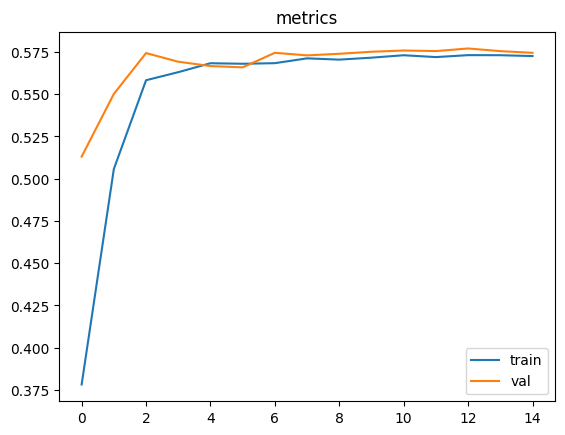

In [60]:
plt.title('metrics')
plt.plot(range(len(train_metric)), train_metric, label='train')
plt.plot(range(len(val_metric)), val_metric, label='val')
plt.legend()

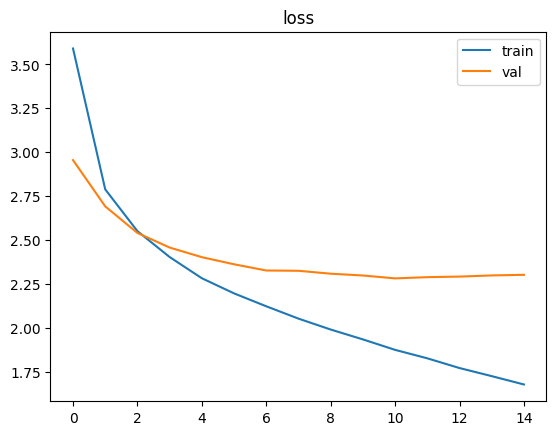

In [61]:
plt.title('loss')
plt.plot(range(len(train_loss)), train_loss, label='train')
plt.plot(range(len(val_loss)), val_loss, label='val')
plt.legend()

In [18]:
#torch.save(model.state_dict(), 'THE_BEST_MODEL_EVER.pth')

In [78]:
model.load_state_dict(torch.load('THE_BEST_MODEL_EVER.pth', weights_only=True))

<All keys matched successfully>

# Loss

<img src="data:image/webp;base64,UklGRiR0AABXRUJQVlA4WAoAAAAwAAAAQAkAQgQASUNDUBAKAAAAAAoQAAAAAAIQAABtbnRyUkdC
IFhZWiAAAAAAAAAAAAAAAABhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAA
AADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApk
ZXNjAAAA/AAAAHxjcHJ0AAABeAAAACh3dHB0AAABoAAAABRia3B0AAABtAAAABRyWFlaAAAByAAA
ABRnWFlaAAAB3AAAABRiWFlaAAAB8AAAABRyVFJDAAACBAAACAxnVFJDAAACBAAACAxiVFJDAAAC
BAAACAxkZXNjAAAAAAAAACJBcnRpZmV4IFNvZnR3YXJlIHNSR0IgSUNDIFByb2ZpbGUAAAAAAAAA
AAAAACJBcnRpZmV4IFNvZnR3YXJlIHNSR0IgSUNDIFByb2ZpbGUAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAdGV4dAAAAABDb3B5cmlnaHQgQXJ0aWZleCBTb2Z0d2FyZSAyMDExAFhZ
WiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAAb6IAADj1AAAD
kFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9jdXJ2AAAAAAAABAAAAAAF
AAoADwAUABkAHgAjACgALQAyADcAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCLAJAA
lQCaAJ8ApACpAK4AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8BJQEr
ATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHyAfoC
AwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwADCwMW
AyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRjBHEE
fgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYGFgYn
BjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgLCB8I
MghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQKagqB
CpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0NDSYN
QA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQJhBD
EGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxODE6QT
xRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EXZReJ
F64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuKG7Ib
2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUgQSBs
IJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4JWgl
lyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsqzysC
KzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCkMNsx
EjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3JDdg
N5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3gPiA+
YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJFVUWa
Rd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0CTUpN
k03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShVdVXC
Vg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4aXmxe
vV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1nk2fp
aD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6cZVx
8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7wnwh
fIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZyhteH
O4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiSEZJ6
kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3SnkCe
rp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyqj6sC
q3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldot+C4
WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7FS8XI
xkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE08bU
SdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4cziU+Lb
42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy8f/y
jPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23//0FMUEguJwAA
ASTHbSM5EpV/2GN3z7wjYgKgirZpqncrpXhkisITlJq4Z56x3CtjWZZldtvX+aSnrQ+ctRgzjSKy
riLNqvQ4elAFgwdSGumPhFva/zZ65OAWcAcuXMFU8QKccOzMI8cjONubWTVHzsaRc4JzVhWdc4Cz
Ny/lnG3Ut+MN2tVqoSxNkOZX1Q2SID/2/0+O0OyIoAXbttC2WTcKJrLdKyTg6j2EJNQvCpFk27Yi
DWjBAuLQgjgsMP+5e+3qfTePPlRESIIkyZEUH7tDvCCNQgWanziRsDg3DS02RFz897HO8jVN//K+
JvWA5m1O+Lh9AGz6KeQv/tN/+u/iP/2n//Sf/tN/+k//6T/9p/8u/tN/+u/iP/2n//Sf/tN/+k//
Xfyn//TfxX/6T//pP/2n/y7+03/6T//pP/2n//Sf/tN/+k//6T/9p//0n/7Tf/pP/+k//af/9J/+
03/6T//pP/2n//Sf/tN/+k//6T/9d/HfxX/6T//pP/2n//Sf/tN/+k/aeXARmetnLkLn0OAifN5S
dBPNCfrvDJnmYWHG1yY2Pp9nYJLqCcTGmRP038V/+k//6b+L//Sf/rv47+I//af/9J/+03/6T//p
P/2n//Sf/tN/F//pP/2n//Sf/tN/F//pP/2n//Sf/rNcunH+EK6p9ploFzEQwcrdJSbgEJ3Vh7DH
HGJ9hmUy7JwAeNJbp/3xK6d6aUibpEEs6BW0teGwE4896Y2zyXcMlykGh2glqbhXUNWmw046+KSr
m+qy2rma5EtSga+gqY2HnfDvZ6BPurJVEci6JSUVTEMp8hUUtQ1hJxp/0jWt7p3GmaMoCcW+gpq2
IexE40+6omnkX89pQUco9hXUtB1hJ1nApCtV/nXfybxrJh3QCX4FLW1L2AmWMOlKpmJyJVcTOtJg
6ES/gpK2JewES5h0Jesw5TpuEi2d6FdQ0vaEnVwRk65SuY1bYVotE+mEv4KOtifs5IqYdA3TSK/h
aSBPkPz2/fMO+CvoaHvCTq6ISdewrjfMZVL69FTdjx9fdsBfQUfbE3ZyRUy6ghkkmvzbxomSFtgE
fwUdbVPYebW8BPxQ4bxJpWk7AF1rqxUppBQlZO2Aa8O/goq2Key8Wl4CpE0qHYYiNHIlMpjaKeZP
jLGtTyrJeG34V1DRGGHn09cfPzKETWoi4IzW2rTpOrZebfKGJl9cqKllYtcof23AV9DUNoWdF8pL
iqxJ7eDzyqr0C7sGVZjaJ6Zwcn/ZRh+nwUl4taA2uE1h54XykiJq0masdSatTd0KZFPdhF2C95zY
DHutwFfQ1DaFnRfKS4qkSfV4humXzfoTUjafTQU6ga+gqW0KO/9fXmIkTRrGL6SMaVfPKjNvz2CX
cnQCX0FTI4SdJEGTGgSZmXi79pj+DTebRMrQiX8FFW1P2MkVNGmHJrumUCuPTfnpBYukE/4KOtqe
sJMrZ1IFdN7JrGmLZuXxkwsWl2oFnfBX0NH2hJ1cOZPWyHoSfpvwa89c22wbQuGvoKPtCTu5IiYd
zrLJWtvGlWdyi0/d/2lC4a+go+0JO7kSJp20YtVpMoSorLNquTnSTb727chUsI0azsNYa2tJsj0F
taNtCTvBciZtepu+0Mam6/7l5kgVJ7YeSox32UqH4XfGIm1Ar6apCLaloJa0LWEnWM6kqpclaSzS
sMvNEcofTJnINqNeaWHl8axO9l65uDfV4RtaIBoi0A+8pO0IO8mCJjUxZwI3tPyzjD1xuTkmkmE8
K5Nc97KXjIOvhh4dFytyMQtqB9sRdg5qb7Oqjcpsl2mpoNEPvdwcmWyG0aRGCjIZg+zfqivhYEce
SNCSi1pQG9iOsJOMP+ksO11sVp56EhnHr1hzSKLPOpjRp2CR1MIW1AK2IexE4086jSJmD+hqgFpu
jkwiTmnyaTMeMNBCDpTMHezoxYGmFreg9q/5sJMtZdJpyTlBBeF73IJzhHLIb7OqMf7eoiT8YFda
K8jHLaj9az7sZEuZdFJyUdJBdr1CZ7k5UlWJetJ7s8sZr3OucU0ycEGtX+NhJ1zIpNPaI4wgwdAW
zMHKBedIJdqjNqu/LKdcdKjSqzxrb/QkAxfU+jUddtKFTDqpPcKJJSMnuFTM27BLdlnXfehVNt1I
kTNUy0lqcQpqH5sOO+myJs2qFDqx1ow3WmVkWIW8sri1QwWLG9Ml+7ekFrOgdrDhsHPywibNWEN2
ch0SJqMQayIm7QigHumzza/lGudnClufLmZB7WCzYef0oSddJEN6Wm0y/8iBhJOrvlUim01uL5Nr
OY35Ip4ucEGtX6NhhwDcSQe+nyI9rUZCH6/taPUxhXRn3n7kNjtDN6HLKFhUnI8/XeCCWr8Gww4J
uJMus+lpHRp6DpShiC57z18TCpZ4vRvCnS5uQe1fc2GHBtRJBz646WlVSn6vT8qvoY2hJhYsOak0
9OIW1P41FnaIkDmp0GnzwqozU0wtWHLGFb24BbV/DYUdMmROWsXjaf2aXLDkjdOLW1D710jYIQRw
0qkXI1avGQqWrHGCYQtqo8J9fIkR+MjueFq55ilYJvSY2YpQ2IL6dCI7xEqsPosrWOTgvi9rNITC
FtSnk3b85LHGLK5gMYNtYQ6KUNSC+nTiMr6GX2MWVLBk7Alcxk4Qil5QH0psxknBrTFLKFjySzmD
hlL0gvpMYnJ+ooZdY5ZWsOjB108QoqQUvaA+JeS/CIt6jVlCwZJB9m4ZdlmFEeqFoxfUJ5IKoRLj
Aqq1LadgkUf91yguFkMhuYALBy+oTyRVjLUeidpaD4iVTQMZ+//yPbJbwp4tVO8WFZGEb3QSCwUv
qL2LVl7IN8/LMunWNnukcl5FZpU86a9ZREGUGQsFL6j1TeHIcUJ2yNWubU3eVV1HwAcELZah86MR
F4tdUHsXtrws2AFeYNc2YX3WNS0b71uz6FXBQqELau/ilhcGNMhXrzKLXb3SC11Qaxe2vLDATqDf
ykEuqHXqrX0xeYRPF2/lABfUJ7yVOyfov4v/9J/+u/jv4j/9p//0n/7Tf/pP/+k//Xfxn/7Tf/rv
4j/9p//0n/7Tf/pP/138p//038V/F//pP/2n//Sf/tNejaY/JnAMTNIuX8fAJG0m0BtnTuhDLEQ+
HiIbD5Ft+8wJOsn6E4i//qA/hchi/CnETX8KUeWo/CnEP/tTCJu3bDqFeO/6mxN+9fn5fmrL2TTt
OJukrWJskpqGsUkqT+RBDW3LesZoSMZEwxjXcnYvCSU6D8Y0qPlSwTEmRM7uJUEX6Fi7rbWwjHWv
ITDWvQZUjPVloynPaXBW3UQwdoYDJGPdazCc1aRtee4XnuPDjHWv4aFky108fTtb/uTNZ3/Hlm8G
bpXn/hcAWyyAmrGalLEzPg08Zm1O0KU5CeDJ1/G1oQue/jpfm+XjjftcUQBjZwTg0Q+W5gwAOMZq
Ur428e44q26aI8tZTdqV5lrOqhsDxqobmUxSy1lN2nFWk0IV5nDw6p2KsZr0Uz/IWE16+78Zq0kf
PlKM1aR3v6MsV4OxNhSJJAJjNSmgGGuvRMPVeDJalnOcVTcG4GtU9iZpw1lN2nE1no4W5SLS+DzG
alL8IGc16T9yVpPiJcZqUnxHSa5G6glH1Y2MvUn6CmMVwEMoxmrSx9/B1zge/ktJzgF8jRqAr1EJ
MDbaohcdT+P90XKcjJxVN+0Ay1lNGjiqSTmrbrqherscZ8BYdSPBWXXTgrF6uxnSMDQ+oCvHtUP+
kbOa9NbnMVYBxF9lrHUI/8hZTXpbleIkBqNmrAKAY6wCQGCoJmWsVS9gKGwprhnmOKsAImcVAGpm
WM7mhGp4koZSXIfhkIxVADDcVACcVTeBs3rbYTh0Ga4CZ9VNGNFyU5MyVm/XrM0JcazeLsPZEfEm
KzSGvXZH8VUBvPmJtzHWOvSpv2HmwRTDHt+WJTgZMRYVXxUAYPmpAJh6KL7EaChOeIyFKcEZjHKc
VQCBlwqAsXq7AWP1tsqYE0pw3bgo+WAxHjUnFQBn9XbIqW44mxN0+a1CRryNsQoAv8NZBRA/hw2a
tTkhZviF8pvLqQBeYeRBZOPuQ7G1wRyeM/J6CdoMn30vX930uAtZepOsHY8bD/DVwdYgJwIrnaJs
bVgWkBO29GbzeDY6RbNEyVgFAMNGUyxj9bbOnBNKbxF5oRirAGC56IJirN6WrM0JPnOSmrKbQSbH
RhcUXx1snrNDIWdzJ6llbU4ouwXkhmJiyFdDgwZyB4wNESVrc0LJzQB8DRSyBcaGPCwtLLLDsjYn
lNwCwNfAAnw1NGggf8DDMH/A1xCoy20G4GugMEGQfA0BzVi5DcvanFBsk4chXwMHxkqAGuBrICNn
c4LHlDClNgvGSoAKB2z1QgVMipqzOcERT2OSIAttlR6MG8ANPRzU99OMf5IYI3lQb2QS3gTePZyH
4mxOqDiZE94N3ByZE0pB9Dc62HWxFCV1EcHwnMDSB0d08d/Ffxf/Xfx38Z/+03/67/f2rvmPPibZ
mEKKlik09dWhnc245j98q5o4hRSdLy0aitDXJ6vPJEfcJA01c/QkltAp5Oh8Yyjw4kySmuDeK4IY
MuZ7cE9SM4lCvicPyOmP8/meQp1Nfoud8OdthE6hnxTUMIROIY38+AVxLuOq/8rLMhL6RokCoVPI
51NnlL/IZXoGIwSRg+ckzeiG0CmkszlRrNrQg9tCkDl4IIUgc0DSgZTscn1uuWpDDxohyBxYQqeQ
I/VocZ3LuO5/jD9F6FZCMmZvz0RmI50+c3LGH8BsCW2kc2ROIbrmWpt5wELOLNWDqPsglXXOfpIe
VURRGd54pIUgspHu2Z23nVsSgdAHf3U5zUmEHm/tQOmxChdnl2wGTRZD6MEdqjM0hG57Z88vKUK3
vZGR0EaaME4KOpsT1fkl0eY00pDZz2UJbU50gi5mlBdnmPTYBuF3JWGqsc2sbykymxOf39aCyubE
5x97+WzGrf/nnHaEftCBLaF7JHCj332WyY4f6kcy+7kMoVPIEtrw6c4zKUKbPuQISegnoaIIbfis
zpkcssjRN+O0hDbSuEGe0IbPIM6ZnLJz3f084tSDU+gbiVMNudPQ2fD5+AfONUlKmz7iyGbWZPbI
SUIbPtU5k2MWuYY8bngzazJ75FpCP4PLTpxtMoQ2fdTDm1mTOWoIbfhszjdJSps+AqGbWXeE7tKp
7ZPnm0RLaNOH7bEEavq7dCK04bMVZ5zM0MbLZI5WBFKEfgg5sj9+zklSuvFyJHRHSSFFacOnOuck
WkKbPtwBlfO3JbQ/run99Fkn038CETJH6yMif9iQSKXj550kpU8gQumLFQiEPqKuS8bPO4nuwBLa
y9kSyR14OpeYCOLMkwVQE9rLaYhUp/1xZPZy2nNPFaGLOkVoL5ek9HWpPMKz5tyToPSGFQjt5fKI
gkotIM8+eVgyOThCF0QtmZrDbz37ZKHJZGDIVKMhtOfYnn/SEGRSUGSSlC5iY33+SVDad+RX6XXZ
bqhzdG2d/+AH/QLiCrjybMUBX5P0DnCTqEl6OZdwE7izhOz/xH+wtY1Wq5Dxy4sPUjoTEDqFPrgu
ptAHzQqkGn8HL/TjHpK4CrZef37gCm/Bhl17KtuhFIgnAKKr5drbcOKFO/1elAdx28qCUuWBxygQ
IjalJOVQLkQwRaQfQdkQf62KR9LhadHgGWJVOJIdCogwRaMqoogIWzB6GaVEvFeWijReLSU8bgtF
VURBEbZIJDsUFWFKRC3KCrEqD1mUFhFlaUh/rLhw+49KQx4FRuiyUI0Sgy8LhSID6pKQQZkhFIRk
LDTAlINevlVoeBzKQS2KjahKQRLlhqYUZAoOXSnIFRygCkGx5NCUgWqUHP6oDGRLDk9QBnIlBxSC
fNlBF4FC2aEuAqHsYHeffOIHdqD+2n1yaw/qr4v/9J/+03/6T//pP/2n/y7+03/6T/9d/Kf/9J/+
OzQ/LcwukqkLt8vQfpF8llJpG4e0ja72mL5FDvwxu00/5gY+gK7dJra/QLv4T//pP/2n//Sf/vv9
gFrvPrFo1e4TfMypnSfH+K1q98kn4etTJfUxZk1RDdBytvR2L/QjNPLkqKaN/QvtphaOlfXoR2uS
CeRgZ0tvNwMeR1edFN0mWftDBBwiWpnPHBOL3h7jmGRskleCbmdKbwfDSHTvlqdCJU1U/fYuZbrk
i9zv6I4pVUN5OKBzx5pvtvR2NaTF1EloIjC24wYdjnVjVtNbHYFWZtRoR7Okt8sBuPqFavFc1tvY
k8dkosn4OgJuPBnZJeZIb6/Da0Bo1JLk1lP1XOVcyHzDezIezZLeLobsuN011WIlJzNXg5hNSryc
MEezpLeLYVL8o9WL5HDQZjaJhYwmsXiQmX04mCe9nQR/Yq8xPoCpEf6wUUvTHHONMjMnneQ0eEFr
AD7/Uvt50ttJcIVFx1ME11QLouK0XMe3NrcTVAfzpLcHAkBsG7kcHkcqm8HY97THS52b4sE86e0k
+IC/xria7LN3nUmqrMXQSM/PJhNhrMzT2RWgnym9fY9vudM1X7S4b/GJZnJeZoTP1oq50tvv0Ca/
d2kqJKrJFyaMpeFyM7RirvT2NYy+hoIFcikxgelVdmNptFkTobKH8m+m9PY4dMkralmmOP1Y2une
ZRk9fonR5rbCzZTe7oaQFD/zuoZxP6kEQ9ZoWu3l7U00M72dD04fUl6wpm+G2koO7xR9qCpzdvT1
b05Jb1fD2IvhXCJtzdg5dg4D9WMVMzo2h7emmpjeTobR718mO5Can5GdVJIBwfT/TE5vH8PgZt+L
5QfEayGqDjnhe81aM6S3lyEcd5awaE2/KpuRG7mEWa1aMf3HOdLbv9DviFs0QF8DP7Ztuslq1kqm
1izp7V5IviJJRlFWW4+x0Ie050lv50JjpVg8DchZzJNaZWw3JB4m2Uzp7VsQQiyfGXrKmG5+mW1b
7eD0nim93RcWoc/PuAPPetolqfzAYK709l50Q4WaneUpZEaexdhlV3Cuv2H6XOntvJAYUqfCDE9i
HId2XTXtQrezpbfzwgxmJjHby2hpB3TZCfqkApwtvZ0Xfjizdq4XcgczlLSc1kQ2W3r7LtTIPjRr
zPRSgqPom7IZeziaJb39F25sF5phnjezADvITbpAmCW93RcVxpg0V5mt7u3vYFCUUy52mC29XRYj
u+zMSAQmWzt6Sfwxxyna2dLbc2Exrpr2SxWOOjEiTNHMlt6OC5NVpTXpN08Zxmp0W3aTqQOgZktv
v4Xr7fA8K5uoJr2h9FFBZjeS+fnS22uhO+Q+Y4xP+gdlhqp3Goc2/1GFs6W3V0KGVPbOx2s/ZbK4
zD86ph2AOeAyHyZo50tvn4QafNGZzWgJJnXj4sTJYpOuPp2TS9Qih8spyUwE3Hzp7Y7ANYTJ6lYM
Samlxo4tObwUOexxm6xOD1eN7pi0nC29PRg6r+PRxvRN49Vaa5M2lIVaiBy+16sYrFbHakzbY5kW
mxnT24NR5W671XQj2bW1EFmi7Nd5gxGsnC+93QRUh2qcTwosb2uZuxQY2BmVrNMco2+bas709hOs
lbj4T/9d/Kf/9J/+03/6T//pP/138Z/+03/673Kjn9yB+mv3ya0fuAz5Vyw7mCKQLzvoIlBbdpBF
IFt2EEWgbyw63CwDyaJD84JbEXtGVQhqCg5BFIJUybH7zlKQ6AqOvU8Vg5p7b5YZ7n1KFINeKjfG
y0HCFhqiLAjJWGoMX3grXgdBFIVEKDJeQUthyDx8Vlr49H+IwpB4b4Hx7DHFIdmVF/9WHBJVLC1+
Y4FI6KJCK4pEosGTUsKTThaKxG+hlPCxl0SpSJhCwuHrcpHQsYTghCgZiarD60WD50AjCkdC/s4j
FA3xn1oUj4QwoWjY7ZQUJSQhTASelwm/UwlRSBLSxjvlgbv+8FPlJCHkd/iiYIN1INgvEeJFvLX3
D6aNL/b1nw/hFjp7fMkHL9x9+gfEKowvsdZ3L+5d4Sr61r6tt8XVi/i/tkZo1nZc03I2SZ1kbJLW
hrc5oUCPhrN1iQJrrzG55qw5wrH2TAYlupazdYnh7K3hStZakH1gratKbWEVpfcj1ul1ub1Fzl58
rOOsuqnhWTuqs4x1i3qYDUxbQnsGCG1ilpQuZf3mVrH27F0BnrWtbll74YI1Z/eS3BbeFqOj9Dk1
KF0WUboel1vb9zzEn7JF3cdjvvwj8JVs+ZVX8Zts+aL7+MwW3haD0FW3I7Qj2xK6EUiDemv7IPAa
a6/eSnN2xIV+kC0fBSJnj9bfwmdEaEJ7BgyhXe6W0LLdbm0APvZ5jB1ZvPs/w1hN+uyDnB1Rx1cU
Y8fJ6LMvb+FtMSyh9/4coWvHltCyvdvYatZ2CYZDdKwddUbF2as+bTg72qJ+8/qRZ/gfMrcaeYb/
J/OcZ/gMoWX7U7mtOc6qmxqcVTeRs+qm5ay6MTiG3Lr+itCb1i8Quli2ADShhwOz3tZC8kyoirGa
9NbLjNWkD/6as5o0SMZq0lvfvHFJAE/fRucc/uA76Oxyf/yDdC5aHv36plYhiYazzzimY6wmBSRj
7ZUwnB0v7XYLb4vhCF3ntIQepNSO0EVL3NRsqmPtfZBKzj7/IsNZTdpyVpNiC2+LESld50hCD5Oz
InTRUm3scb62ULI9hqcKgLPqJnJWb7ueetuKB6/frck8dLpv3HoboV3u30HnouX2L2zvcVy9zFhN
evcGYxXA0yvJV036ZvhmxmrSeGPT0kjCEnrwvltCu9w7QhctYVuP8zWq0Q/FWOsQDGOtQ2gZa69E
lBt4SR4o/fgIKH07u4rQRUu1occ5q27cgIaxCgAtZzUpJGefGInZwkvyitCDH18TOsM2hK7s7Gam
wVl1Ewd0nNWkUIzVpDCcfWZJ7QbeFuPuD9L58Vvc/3U6Z9h7/0Lnyu7+x7bz3juH/DNnFQBeYqwm
xc9w9rkevZ+14+ogN+2SnMzRhtCZwBB6N7UGtvZoBPi6qblBlrMKoGPtk2VTfH1yuM9htvCSvCZ0
qxFD6J25htCVnd3IDBirbiQGBdY+fbWKszmh4ewTS+o2qxoDHJV9nABaQmfYjtCjSR82snZYZO04
BGnOPjssy9mnehRY+8zc1AbeFuNjhL4NmluSzhn2lqJzZXf3qzYxhZGoOft8rRxnFUBgbU6oODvQ
7JZS9/YfWmEInQ0aQlchltCGELeJNWP+hLMK4GOSsQrg7jcy9u7gnvwWZwdY9ANbeFuMls7H9qAj
s48TCISu7OImFjAWirP36Wg4O9SxLUcPpuBpR5cOY1FvUx7DIQmdDRShqxBNaEOI2cA0a++0NI7q
eKkAGKu3DRirt+X4JG238LYYDaGzgSV0FeIIbQhpNzA3LnBWAaDipALgrN724zrWPnZltUXZEfc+
SueC+el/kNnHiacfk1T2ceLVu2rzkgD46s7wGRxnFUDgpOGAs3o75NTbW1QAyOzn6ghtYm7HpxCh
DSF287IZHng2VBj3+pVkrAII38zYnHD/BmPH6P+1/9mgakLvLVYY5Qm9M9cR2hASNq8I8NWd4Tg7
lB41coKNeluyNie0yAmzJvB145KELpgVoXfmNKFdEvXGZZDFsdEFlSWw9n8SkGaCRV69zdqcsDkp
ZGgIvYtkCW1ecIR2SbQbV0BeSMYqABjOPq4Zx9mcECVfTbGA3r7bYtz+JJ2NNHceSDKbFx5AkrlG
ePJIbVqas2NGJWOmjrMKAIqvpljAcDYn+DWBrxtXTehdJEPo/7ANltCNA9ym5XNFyVgFAM1EFxRj
g5ArMNYUC1TbksmszQmdQoHQ5oVI6Bohym07ZGwQsnkmhnwNDJA94GsIuC28LUZF6J32mszmJMAQ
ukawW3fIVbFuAL4GCpzV2z5fYGwIqM07BByhd9o9ocvZQOh9s7Blh4yVADJM4BkbIioOdgvB10DG
CdotfFdYETqFNKHLWUPofTOzZYd8DSymRM3CkK1eqDBFYG1O0Bv4rrAjdAp5QpezHU33zbb1oAb4
Gsg4SeCg3GarF8pwNicoTOK38F1hRegU0oQ29GuK7ptt7IGxg/EB4AN2MKhXjUxCACN5UF/djEzC
K+DGcB6aszmB+oWfHp6EN4ArOxxyA98VdoRuNeIJvccTCG0tCFJs37CsPUgBAGt3tfUWmxM04Dft
7pBJ/CWe0I7sFlPCELpxgD2TZAjtHq4xSUdOEx2ZA4VJojyPVOnBeDdwUw8HMUUGG1NI0jI+MkUA
jEyhsxas3bbW6RSie1138Z/+u/jv4r+L//Sf/tN/+k//6T/9p//038V/+k//Xfyn//TfxX8X/+k/
/af/9J/+038X/+k//Veksn75cfPq6qZffuTNdcafQFxdXfkTiKz/IyoqfwLxH1dX7/XLD5tXMa67
OeG9V1f/cRJzQhXy4CIyGzi4CJ23nOEhcheW2ERzgk5qNP0xgWNgknb5OgYmaTOB3jhzQh3iYTE8
geXgdpHPc7ACmkBsnDlB/138p//0n/67+E//6b+L/y7+03/6T//pP/2n//Sf/tN/F//pP/2n//Sf
/tN/+k//6T/9d/HfhxXpAC93nXQ4hNtzYnDkz7dMdZ1zYG56/3yipRrwwgvbVNc5B+am9w+JhmrA
Cy9sU13nHJibXj+dqqgGvPDCNtV1zoG56fWziSioBrzwwjbVdc6Buen1axOObMALL2xTXeccmJte
v5gwZANeeGGb6jrnwNz09lVIKLIBL7ywDXWdg0Buev2aRBBk4114YxvqOgeB3PSGzXMO3XgX3tiG
us5BIDe9YfOcQzfehTe2oa5zEMhNb9g859CNd+GNbabrnARx0ys2zzl0w114ZZvpOidB3PSKzXIO
4XAXXtlmus5JEDe9YrOcQzjchVe2ma5zEsRNr9gs5xAOd+GVbaTrHAVw0zs2yzmEo114ZxvpOkcB
3PTKaT8UId3v91AiLbloF97ZRrrOUQA3vXIe04JctAvvbCNd5yiAm165dhpHLtqFd7bhrnMA6E2v
1oSwOeeQi3vhTW246xwAetObNf2W4EjHvfCmNtx1DgC96Z1Lr3JDOu6FN7WJrnOW90ZveuV0b+9T
pONeeFMb6DqHgdv0ls1wDpcGCmprG+g6h4Hb9JZNP4dNAwW1tQ10ncPAbXrLpp/DpoGC2toGus5h
4Da9ZdPPYdNAQW1t613nNGibXrPp57BpvaDWtvWucxq0Ta8ZfefINlYnYb2g1rb1rkMN2qbXjLxz
qg7QJ2G9oNa29a5DDdqm14y4c6QFTsV6Qa1ty11ntp6X0xG0qTRtB6BrbbUCUXaOrB1wOpYLam9b
7jqz9bycjphNpcNQhEauPUQVLMa26XMHx9OxXFB72/auIy1wUlI2NRFwRmtt2vSLeuUhq2A5Rtco
fzqWC2pvW+06s/S8nJiQTS3g+utRlX5hSVJZZ9Vyc2QhqmAx1jb62KR5QpYLam9b7Tqz9LycmIxN
m7HmmLQ2dQSxaUW53BxRSNv71AIsaA4vbqtdZ5aelxMTsakeTyn9siGHRRp2uTmSTNz7FPkWNIdX
MdYPT5qj5+XURGwaxi+ejGkfFzFk7InLzZFk4t6nyLegOby4be46JyhhU4MgMxNtiaHRD73cHEEm
7n2KU6sFtbgtdh2CJGza5XQSyl6Nsd5MfAI+Ti0W1Oa22HUIErCpAjrvZN7KtaGFGqCWmyPItHNY
tVhQ65zurbsJErBpnW54JLNaaTwthO9xC84RZNo5rFosqM1tsesQhLTp4ocKTdahA4/EkF2ik8vN
kWTaOaxaLKh1zqeNHxQhbbrK51UZxBDSBgQrF5wjybUVLJW1jRrOw1hra0m4tYJa3da6DkUCNm16
HWeLRuVyBmXGgqVFNf40iK0cKifTaCuyrRXU6rbWdSgSsKlK6XVpvoKlAuRgEWeldP0+zDrCm+qQ
WgtEQ7W1glrHOD8ghCIJm5p4YPOaw+J6M1/B4gZbwgxsb8cVPsnIV0MfBVCsiEYrqEVstuvQa1ez
qo3K3YPnqtRkFSxq8DqRMcj+raQ6nOzIAwlaovEKag2b7ToUQG+69KQry2ZVarMKFjeYt0Ej+qyD
GT0CPZJmwILawma7DgXom07dHkutSiEtWPKHooUcyK+DHa91NM2IBbWEjXYdEqRsmjnuxKqERDV2
lbSiT8IPPnlPK5hALKglbLTrkIC76cQfjCDKNWqshokqY7zOucY14ZAFtYNNdh0acDbd8aYR61Ic
V8Xhbdtcr1HMZu2NnnDIgtrBJrsODbCbTrzpxMrUjpLdyJUferuq6HL2WmEJ/xZCQS1lg12HCCGb
ZlUKnVibzBjZjT3pX2uHChY3pkueso5mtIJaxAa7DhFSNs1YQ3ZydZJh+FFvqsu9ZuuRPtv8Wq5x
fqaw9amjFdQiNtd1qEDfNLPCSE+rk6gHa5E65lyzQwWLmlzLacwX8dS/BVlQO9hY1yEDdNPFL1rT
0wolDNJ9UCrTJTv4Ts3QTegyChYV5+NPHbKgdrCxrkMG6KZLbHpamwbau4D890s6oWCJ17sh3Kkj
FtQSNtV16JC2qTDpaaUS0rQR6Fw98SZism41VCMW1BI21HUIkbapTv+rK9AsMaVgyRlXVCMW1BI2
03UoEbZpFY+nlWxKwZI3TjViQS1hE12HFrhNB16MWMemFSxZ42QDFtReRfuYUiPqkd3xtIpNLVgm
9JjZilzAgvp0IjvESqxECypYJA7aflnXkAtYUJ9O2vGTx3qzoILFDLaFOShy8Qrq04nL+Bp+vVlE
wZKxJ3AZO0EubkF9KLEZJwW33lxvwZJfyhk09OIW1GcSk/MTNex6s5yCRR/V/aenk/TiFtRnheQX
YVGvN9dbsGSQvVuGXVZhhPokcAvqE0mFUIlxAdXallOwyKP+axQXi6GQXMCTgC2oTyRVjLUeidpa
D4iVTQMZ+//yPbJbwp4tVO8WFZGEb3QSi4YtqL2LVl7IN/PHMunWNnukxlQHh9+nO5hFFESZsWjY
glrfFI4cJ2SHXO3a1uRd1XUEfEDQYhk6Pxpx4agFtXdhywte9Avs2iasz7qmZeN9axa9dF00aEHt
Xdzy8gY0yFevOcsLqkELau3Clpe3wE6g3/rBLKil6q19MRn+6eKtH8iC+py3WucE/Xfxn/7Tfxf/
6T/9p//0n/7Tf/pP/+k//af/9J/+03/6T//pP/2n//Sf/tN/+k//6T/9p//0X995C8/r3sPzsvfw
vOzn5xL031PAR8jDwEy0bTaxsYBdeyt1/af/9J/+03/6T//pP/2n//Sf/tN/+k//6T/9p//0n/7T
f/pP/+k//af/9J/+03/6T//pP/2n//Sf/tN/+k//6T/9p//0n/7Tf/pP/+k//af/9J/+03/6T//p
P/2n//Sf/tN/+k//6T/9p//0n/7Tf/pP/+k//af/9J/+03/6T//pP/2n//Sf/qsbj5xH/5UBAVZQ
OCC4QgAA0KwDnQEqQQlDBD6RSKBMJaQ/oiCSGfPwEglpbu5hUBPKnE5x//B/wE/Qf+NeKR3vT/x7
7AfoP/B/LT2woA+uH6AfgBdAP4X+AH6Cf2P1X+gH4AfoB/AP3xpFfoB/APwA/QDv9OdGVMfj/4E/
oB//8D2fLT0BFuF/6V0Idl/5FJ4a/rn9c/UL9Pf+99r+8L8h/ZP8F+vnZ4ewfbT2HsX/XRmc+5f7
b+5e2T+H/4v938T/k1/h/3z2Bfyf+if67+4ftf75T1rTv0Avbz63/wv8L+63ukfIf+H+9epv2P/6
fuAf0f+6f8/1//63gmejewF/Lf7/+z3u2f23/1/1/5i+2X6h/bD4D/5//e//J66H//9x37sf///7
fC9+8Apf25FDTxQV2yikYt+P33Wytb5tlFIxb8fwI09LhNv56ziSmXFBXbKKRi34+XLq9dx53LJ8
UFdsopGLfj+BGnqrO5ZPigrtlFIxb8fwI09VZ3LHPXswCW3nNncsnxKvt1SHbt58W/H8CNPVUrs3
PLDbKKRi34/fwQIvxj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSP26SR+3
SSP26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8Y
Lekkj9ukkd60KR+3SSP26SR+3SSP26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0k
j9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSP26SR+3SSP26SR+3SSP25GDG/REUdKcRc
KVBoWn26SR3xHt0kj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSP26SR+3S
SP26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8YL
ekkj9ukkd60KR+3SSP26SR+3SSP26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0kj
9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSP26SR+3SSP26SR+3SSP25GDG/REUdKcRcK
VBoWn26SR3xHt0kj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSP26SR+3SS
P26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0kj9ukkfl6BIyADfoh5Ii4UqL8YLe
kkj9ukkd60KR+3SSP26SR+3SSP26SR+3SSP25GDG/REUdKcRcKVBoWn26SR3xHt0kj9ukkft0kj9
ppEArgWyikYknn4EaX6i9wpI91Nv3LJ8T0h0opF+/4uHTLrmzuU636K7YO8mixVmlL/BXbKJIu34
/fda2lTmd53LJ8UFdsoo5NqRFwpUX4x+3SSO+I9ukkd60KR+3SPUinbilRa1O3FKi/GP26SR+3SP
W5j9ukkd6y+DNUna08Xm8D73SHTKiJpGDyr1TKilAt4HT78UCpvtXtcWxyIuFKi/GP25GDG/REUd
KcRcKVBoWn26SR3xHt0kj9ukkft0kj9qOii2ORFty/NqRFwpUWsWi5U7IuFDk1+bUiLhSoNCd66I
i4UqDQtPt0kj9ukkft0kgwkZABvth35Y5EW3MERcKVFrU7cUqL8Y/bpJH7dI9bmP26SR3rL4+VOy
LhQ5NgiLhSovm6Nk6oUqL8YLeB0UWxyItuYIi4UqL8Y/bpJH7UdFFsch45tSIuFKDbnv7dJIMJGQ
Ab9ERcKVF+MftR0Tke77sTqARfN0bU/9pzHsjWhqdcDB35Y5EXBylou/bf7IIuqFKi1i0YI4acx7
I1oanXAx05EXClRfjH7dJIMJGQAb7Yd+WORFtzBEXClRa1O3FKi/GP26SR+3SPW5gdUqpxRc8btQ
FXvSgZqKHJsFthUn+h80x5ZMG0nu4rF/HxJJH7dI9SC0iWbxpi2qAi01wu8pRaLkVPClisrFIj25
FEDbpJH7dJI/bpJHfEe3SSO9aFI/bpHqRTtxSotanbilRfjH7dJI/bpHrcwWnR2qejqw6Hu1HgYO
/AFBIjpM6ZFyRFHSMbkm4ojceUeRuEG1NW3PyjnJ5eEIfU0EUBPi49RtbdUrJpvc3XphBNXcAKYH
Xo0LT7dJI/bpJH7dJIMJGQAb7Yd+WORFtzBEXClRa1O3FKi/GP26SR+3SPW5gBzvUpIrQQj/mEiw
8Ob6AxDptvF09AkVW3tTuyKiN3GePgFHVh3ejQzOTwajRzpm/wuqSqS+7PHvStt62aVX1LFWbzRr
r9q53mEixyIuFKi/GP26R63Mft0j1Ip24pUWsXTsi4UoPSi/GP26SR+3SSP25GDG/PRTvpBtpivy
hSMOx5ncASe2aGgSMgA355g+tmlkw8voUnUqWFqxcWknQkNn53DWMskmbAjj4kkj9ukkft0kj9uR
gxv0RFHSnEXClQaFp9ukkd8R7dJI/bpJH7dJI/ajootjkRbcvzfTtxSovm6NqgIvxj8vPeB0UWxy
JDdIx05EXClQaFp9ukkft0kj9ukkGEjIAN9sO/LHIi25giLhSotanbilRfjH7dJI/bpHrcx+3SSO
9ZfBjfoiLg5S0o7txSotYtEiuLY5EW3L8307cUqL5ulHduKVF+Mft0kj8wDbpJH5egSMgA32w78s
ciLbqoUqL8Y/bpJH7dJI74j26SR+1FbdU5F+MftRW3RY5EXChya/NqRFwpUGhO7mP26SR3rQpH7d
JI/bpJH7dGgr8pUXzdKO7cUqDQtPt0kjviPbpJH7dJI/bpJH7STtwgA+5ZPigrtlFIvPgd6e2RGY
+qUYt+P4EaeqrhLtaXOktsopGLfj+BDXXLLwE8aEOx953LJ8UFdsoHWMyXRvp7c3xb8fwI09VZ3J
rniIuFKi/GP26SR3xHt0kjvWhSP26R6kU7cUqLWp24pUX4x+3SSP26R7lc2dyyNGe6lq/H8CMWtW
IjXNrJyn61nFGWT4oIfjRJbnU0FdsiYi7fj+BFpU3XISyfE8/eBMRckAnNuM4LIExMG+iIuFKi/G
P26SQYSMgA32w78sciLbmCIuFKi1qduKVF+Mft0kj9ukkftx+h2QXWwRj9ukkD7ISMgA36HbRYmM
MgA36Icuh6vYds5JJ2RcKVBrjaLjtksciLhSovxj9ukkft0aCvylRfN0o7txSoNC0+3SSO+I9ukk
ft0kj9ukkft0kjtP2r0b1OQ+iIuFKgmCIb6fsTZ4ZoVTFwpUX4YLtnTWl216vxj9uNqOg6mc1XOn
Ii4UoSjPXc8HxAP0RFwpUX4x+3SSP26NBX5Sovm6Ud24pUGhafbpJHfEe3SSP26SR+3SSP26SR+X
oEjIAN+iHkiLhSovxgt6SSP26SR3rQpH7dJI/MA26SR+3SSP26SR+3SSB75OnIi4N3uhIyACw5c3
3DgwtSIuDd7N5KAUtkRcKVF+Mft0kj9ukkfl6BIyADfoh5Ii4UqL8YLekkj9ukkd60KR+3SSPzAN
ukkft0kj9ukkft0kgPZZIo4i4UqCYIijQsiYnv7dGltFyp2RbYpO1DWOvxj9ukkft0kj9ukdOuQF
jP+e2UBh7uypcvA387z1LLj22yis2gwqq/fjZce22UVm34/moqmoDly8CvmYOemXFDUzUo9oIavE
7Qnn22UVm34/mo9VaeOuKGUNSwNqLPERcKVF+MftxkQjBfuTrOZ/CPNZ+p2p/uWT4oK7Xl7WrEo7
xUNSjFvx/AhhXu/GuuzxQV2yikYktxK/MeBGnocNT74j57+3SSP26SR+MlnL8P3D6hph5STPJKS5
TvoRIjRHVWZy/oiRGiIBNzl/REiNEdVZnL+hm8gW6qzOX9ESI0R1VmcHw4kRojqrM5f0RIjRHUm5
y/oZZ1yptZmZe3iiT06ciLhSovxj8vTxQVGwikYt+P4EadZxRlk+KCu2USRdvx/AjT1VncslxQVy
ZcNJxFwpUX4x+3RY5+GmtiMft0kj9ukkft0kj9ukkft0kj9ukkft0kj9ukkft0jkh5FiPY3hSovx
j9ukkGIuIuFKi/GP26SR+3SSP26SR+3SSAXhG5j9ukkft0kjs0MI5UX4x+3SSP26SR+3SSP26SR+
3SSP26SR+3SSP26SR19zPzr5Sovxj9ukeuuiIuFKi/GP26SR+3SSP26SR+3SOwpIK/KVF+Mft0kg
zUqRFwpUX4x1QsI/yVN6mQT4L8Y/bi+eL0fTr/qI3GOXgv+WmWho11jIZ1gXArKumIuFKi/GP25G
s9IAN+iIuFKi1r6324wtv/TDj0HJbaY2gDf+chKwz2ovxj9ui8o9Akvz2SF/SBZMoulJkdwci0M4
5EXClRfjALwjcx+VYSSWX1OyLhQ8FXbpJH7dJI7R9IAdlNbbZj9DGnW92wbVxZJAFA0Zg04Js+EQ
PlTsi2Z0sd9GE+CoyA/vcGxM/D8sA8nJqBfMk31G+6KUQrfDgfTNs0UHV3PXEcSt+Sr7QZiuPAua
jt/QQfdfCMM6IPJBNV8pUX4x+3RohStxv0RFwpUXziL4GUairPEm6VjhIraUFQFTkU0m7x1ZQfeu
Dmr8PKzpGPr5xY2vNIU8VYDIcGj4Sw4FmyyAYadbuD7l0KVomI9p2f+GriYBlbgYjCW4ZePmOyr5
6JinVliGQAV8YhOUPSrK7X24pUX4bK3RkAG/REXCg4yjYFWH7QHfgnt5wq2lRFJo94PGy1+w1oz1
ouslJVqCFnCPN4oNsA5I77O5CxCrfXi88/FmNMqG5TUMQEuGU8I5O6+Strjw1F9nx67sGi34yZeM
B7vkMmt1wLhe4RQlzuz6r5Sovxj9ujRClbjfoiLhSovnEXxCJ7FYgorAHseUNF2bT4rsQIICKw03
A7OeivnuhRfoThlh1Wt8YudDpUusDN5cnXNxeoAMiHGSZ+Ut+xfHQEVWLcu+BSd7z4/Q6dswFy3n
cVwHc5wUxOsNrG1IHkdV9e5Kdo7Qj2FFDMkkHvyV0XZtPiux7b6QM4KDwE76Ig8uUX6k3qoYsXpl
1UbdJpr8mk+mbgGpnp8AO4I+6dVt6Tdn8uoO9udAxL/Yhiw5f+tAIaSub595W4DoVbV4kwnUyZll
ZQH9WVujIAN+iIuFJ4EH4PVGo6xUDWAK2ws4ptRJj4pmupcW5wzKVgNPKmGLkY4+SYKCksgypnwV
eI3ZrZl0OZ3Iijo4msTtuhhNCgM14yQq2B3r8k/P5xfti92y7CL0NuFKi/GP26SQZKCt+iIuFKi/
GDEUgSWDvVYnRwFhhZjCOZnd+4Qc5mOGBAAh4fvexn41QcEqIvs8wW+QZy2y4tUj+Jz1Kh+mEV+D
C/XQxBCaAEW7pTbZNfS6vOan21eYpMKVhHPZsiR/OZbOVvPsdYXI0Ak2x/v7gkq6pO8odWdQmbGa
06SKv8uLxzWlh/EGupQsxI/bpJH7dJH4lGb+gw3lIC3EHdBP/hEOcpSzJi4++VnfPPrQfatd4x6d
GHikJUOHcAQSANEtplwbaE2D7pm+DpjUgB4lCXHJpQatjGg/OM+hIN9JsffjkRdafWJTMr2h4DeL
ECud0EWzOokc83B3FrlX2Py3/ncCfKVF+Mft0j2HZsb9ERcKVF+Gutf+RAao9fAcqScOU7QkgG2X
7xIwhD8ibqAu0Avdk4cSGVmqg1YmjG/EamRiCrwBp6zrJQKOx1Ukh8goEhm2nKdpJpQBNCCvMv+N
SPoF1OgAuTHd+B/lebXg5FgmcvAFB64IEICFYWw0YB+aja2XC+xUxmaDGIHGKvhXAH86YpWgys1U
x+gjAAB0E8oDfyPv++sP6sDi0mHCUo9QoORtp/6a3hM3FsIobNsL8km7PqUJiprfbRsch8/IfIAI
EX4x+3SSOxwqYuRSGLve2akmFsWL8gEM/GEPDxc+JXV9s4AzMzi0Q7710UvanHUIpAZgleBWdPsf
UoO/FGngDI9AEV+NZ50CwgGT3kmU5aAgRfjH7dJI76eEkft0kj9ukkGIuIuFrB2mdEcOMok436Ii
4Mgditq1ljchVqNLMDZreDCqASCG5H66GbM6dkUMZar6BC8iUKM16QPiGVSGTmMtQizBA4dXuN+i
IuFKi/UlOMQW7GOFO10O3FNonURFwpUX4x+3SSPzCVejIAN+iIuFKD5jG/REXClRfjH7dJI/bpJK
Ft0anWnFjEe3SSP26SR+0STsQSkSfYi4UqL8Y/bpJH7dJI/bpJH7dJI/bpJH7dJI/bpJH7RD0zQM
PN4UqL8Y/bpJBiLiLhSovxj9ukkft0kj9ukkft0kgF4RuY/bpJH7dJI6gKvMjlYihN5GZPMoyovx
j9ukkft0kj9ukkft0kj9ukkft0kj9ukkft0jkYrv4P7zjdikhBW/REXClRfjBiLiLhSovxj9ukkf
t0kj9ukkft0kgF4RuY/bpJH7dJI7jDLdRNVBA4TH/u/3eFAvR5Pz8pXZnL+iJEaI6qzOX892WWPv
lnkAFyxCUl9vfQiRGhmS1ngTlwOPcyprj8gDK4Sw0Eq59IEfAILE5gjsghz7smdXH5AGVwlhoJVz
s3OQ9Xmt3hQ8YoSkvt76EQqD3FX+w81u7v2+aOAkN6IuFKi/GP26R1+Sj2WiO+KCOngf1qKRi34/
gRp6W9jdCMIt+P4EaeqpXX/Y0eTlxBXbKKRi33Y/ImrO5ZPQKE34rU7cUqL8Y/bpJH+uSVq2nddm
hrM/vPee8957zlfK2grxpmqS0lo2z+EVUYr3nvPecyKH0Lvw6jFe8957zlehtBXjS1ukkft0kj9u
kkftLok0/70N7ylRfMUUSSR+3H5vB5ve3SSOqfd2iBt0kj9ukkft0kj9ukkd8LhIyADfodzurK0+
qSR+3SPUnJ05EXClAkhIaFiPbpJH5X6B2mjBRbHIi4UqL8Y/bpJHckWeIi4UM3dcKrYDSxxzv9X5
KeIi4OZhsPwMci4UqL8Y/bpJH7dJI/MfLf26SR+3JDFJotjkRcGxXijRB1+Mft0aU+DsW4Ov4DB6
/GP26NLaT0sciLhSovxj9ukkftS5t6/GP2pc4Fvxj8x4/pRWNr+rjvG/RDzXt6/GP26SR+3SSP26
SR+3IogbdJI/bo0IzoiLhSoNC5iLhSovw1Ip24pUX4wYi4i4UqL8Y/bpJH7dJI71oUj9ukeuuiIu
FDk6oUqL8NSKduKVF+Mft0kj9ukkftyKIG3SSP26NBX5SovxjvWhSP26SR+XoEjIAN+iHkiLhSov
xj9ukkft0kj9qK54iLhSg9KL8Y/L0CRkAG+2HfljkRcKVF+Mft0kg3FBXbKFxdvx/Ai2WXFBXbIn
Ri34+Xv6pUyyfFBUbCKRi33Z5B9z9yyfE9IdKKRi2/tssuKCo6UUjFvw6UX4x+3SSP26SR3rQpH7
dI9ddERcKHJ1QpUX4akU7cUqL8Y/bpJH7dGl2/H8CNPVWdyxqtG38BUFdsopGLfj9/z0Z7qWr8fw
I09VZ3GshbMBObcZwWyikYt+P4EPG/GRNizxQV2yikYt+Fue/t0kj9ukkft0j1Ip24pUWtTtxSot
YunZFwpQbc9/bpJH7dJI/bpJHfEe3SSP2orbqnIvxj9qK26LHIi4UOTX5tSIuFKg0J3roiLhSoNC
0+3SSP26SR+3SSC3pJI/bo0IzoiLg5TFflKi+bpR3bilRfjH7dJI/bkYMb9ERcHKWlHduKVF83Rt
UBF+Mfl57wOii2ORFHSMdORFwpUGhafbpJH7dJI/bpJBb0kkft0aCvylRfN0o7txSoNC0+3SSP26
SR+3SSPzANuP2qAi1i0YI4acvHSSO9ZfBjfoiLbl+YPf4j26SQW8D0OZZZUIAnZFHSnEXClRfjH7
dJI/L0CRkAG+2hfu3FKDbnv7dJILekkj9ukkft0kj9uketzA83OnIeOYSLDhhlQEWsWi5U7IuFDk
1+G9VciLaG3mx8A6FWmbAkY+6ueIi4UqL8Y/bpJHetCkft0j1uY/bpHqRTtxSotYunZFwpUX4x+3
SSP2o6J3XpAmIoQeHgYPGHnd39/JXMm7dTbOWloo6Rjck3FEbjyjyNwg2pq23rOXXNd6HeGIm4MH
N9BULDxzSXi/KHJ1QpUX4x+3SSP26M9KO7cUqDZCSR+3IogbdJI/L0CRkAG/REXClRfjH5gG1FgZ
MJFh4c3ondr74rnHJDxzCQEqnBtH+pfx8AsAY6WHzs5VSk2WayJ4v7eV6Ge9JHqTmln4Mt7zzCRY
5EXClRfjH7dI9SKduKVFrU7cUqLWLp2RcKUG3Pf26SR+3SSP26SR3xHjX1LEXQFZ2CD8SRhaArp5
sYi4EI8ZDfkOCvnL82pEXClQaE7Fgohntd+BFpiFgFFDYBYNqumPzmnwprU16tYunZFwpUX4x+3S
SO9aFI/bpHrroiLhQ5OqFKi/DUinbilRfjH7dJI/bo0Ffsj/kR0d6y+DG+3S2ZsPDm9FFsciKOkY
O8yYize3S2PtgEdEOoWWRvxegqIC4zqwLQHRRbHIi4UqL8Y/aiueIi4UoPSi/GPy9AkZABvth35Y
5EXClRfjH7dJIMJGQAb9DwMHjEBF+Mfl570kkft0j1ILRcqdkXChybBbzH7dJILekkj9ukkft0kj
9uRRA26SR+YGuLY5DxzakRcKUG3Pf26SR+3SSP26SR3xHt0kj9qK26LHIi4UoNtMV+UqL8NSC0XK
nZFwocmwRFwpUX4akU7cUqL8Y/bpJH7UVzxEXClB6UX4x+XoEjIAN9sO/LHIi4UqL8Y/bpI/7tKs
2bLLigrtlFIxaYpS/uvWyzgw1KMW/H8CNPUXmULKvD/FBXbKKRi32xMEi7bguMY2Wqs7lk+KCu19
XIHcUWKRi34/gRp6quFp9ukkft0kj9ukkFvSSR+3RoRnREXBymK/KVF83Sju3FKi/GP26SR+3JDp
RSMW/H8CNPVWIjXW/NIYotZxRGuuKCu2UFzlSrbLLigqNhFIxb7hrJGW1wp0+KCulSYi5J4wOdb8
0hrzbpJH7dJI/bpJH5egSMgA32zpyIuFDk6oUqL8NSKduKVF+Mft0kj9ukkft0kj9ukkftyMfKnZ
FwpQbdeoAN+iIo6U4i4UqL8NddERcKVF+Mft0kj9ukkFvSSR+3RoRnREXBymK/KVF83Sju3FKi/G
P26SR+3SSP26SR+3SSP2o6KLY5EXBymK/KVF+Md60KR+3SSPzANukkft0kj9ukkft0kjvWhSP26R
63Mft0j1Ip24pUWsXTsi4UqL8Y/bpJH7dJI/bpJH7dJI/MDXFsciLg5TIzoiLhSoNC0+3SSP25GP
lTsi4UqL8Y/bpJH7dGelHduKVBshJI/bkUQNukkfl6BIyADfoiLhSovxj9ukkft0kj9ukkd8R7dJ
I/bkUQNukkft0Z6Ud24pUX4a3Mft0kj9ukkft0kj9ujPSju3FKg16vxj9qK54iLhSg257+3SSP26
SR+3SSP26SR+3SSP26SQYi4i4UqL5uldEkft0kgt6SSP26SR3yQi4UqL8Y/bpJH7dJI/L0CRkAG+
2hfu3FKDbnv7dJILekkj9ukkft0kj9ukkft0kj9ukkft0aCvylRfjHetCkft0kj8vQJGQAb9EPJE
XClRfjH7dJI/bpJH7UVzxEXClB6UX4x+XoEjIAN9sO/LHIi4UqL8Y/bpJH7dJI/bpJH7dI9ddERc
KVFrF3U/GP26R6kU7cUqL8YMRcRcKVF+Mft0kj9ukkd60KR+3SPXXREXChydUKVF+GpFO3FKi/GP
26SR+3SSP26SR+3SSP25GDG/REXChydUKVF+Mfl6BIyADfoh5Ii4UqL8Y/bpJH7dJI/aiueIi4Uo
PSi/GPy9AkZABvth35Y5EXClRfjH7dJI/bpJH7dJI/bpHjrmzuWT4oK7ZRSFyXH8CNPVWdyyfE9I
dKKRi34/gRp6qxGWT4oK7ZRSMW/H8CNPVWdyyfFBXbKKRgi8/AjT1VncslxQV2yikYt+LEsaeqs7
lk+JhYMb9ERcKVF+Mft0jkAA/gTHQk6I8ndpzAm7qVkQVfap1oxGQC9yctiyfXRiMczj5TRcqw3o
RtGIyAb0I2jEZAN6EbRiMgGqXaMMRkA3NyzZ7+MKwn6m9cN1pYeRQDbAA9HuB6NyAebgAAAAAAB5
vcekyrIBnwI9U9NCl9oGB2G7OArokQwylOuQTWb4wcezh4Ki4AILYfaOEkdckGj9uOCl9ACC2H2j
hJHXJr7dI2cCAwqvb6lnLYsnwhtF75CD0eNGKm8tOjZqTZwuQLwjQk5R796hXxbFaQbRiMgHlK1z
tZWJrp8uhQAA83FLAea4IAFiLiQOXlXH96aYEgRYbI3NcEKQZUsrm7pue8+Nv6UqLoWU/+i0180p
EpDXlEC242Zs5o7sgpnBZUFy3SRgDaU6wE4PcsZzet0TTlS8bf3izjIjVG4wAQpBlRa3NqUnfU1a
jq9mVgvgQg8ekQg8em80wPysExzct1bmACX1eRGpShYi8hegfQQcREWYASNCfdmDwe8ZHRlimfhE
UrC7OV3c9KOHL9kGx/jAGAo9DTK3ZFMRrs7tpNA0wJAhkLPIwgYLvBHAw51zJNyNhVUHDS+ukYUj
mFARaREI2jEVvNGyMC0YjIBYaYEgcw4ZrZ0A2IkY0et0UDz//75bsx4p7y4ILB/fZYWdANiPGGzm
VFBFjB4AhSDKlCiZLoo7XiFGyFjWqlIrGsXCPyheYnrshyzkCPweExMt/ifWJOZ3OKvAJrN8ZMSY
/M/jJ1F7w16hUlbFq+IQfffe0Eca7/hnJbaGVZgPM6PkSYdhV2cO18z1RYec1ZCfRq1DDhngEGyK
QhAcIV/gaRreLKnx07JOCAFRiOUT8y604JwUDQkgJAN1wtdnVvng2Nxf4G9hN1vtUkBIBl5mEu7S
dZmVx0/17aN19vUeH41nKeBsEgJAW6Ql/bAssIZ5utKFD23LqbJICQFY/5XwijSv/c1zU+edA7cl
W7IqxUMnkOJA0bxRnTOZC1ke7Qdsp4is/I63kG8A0yrYnhbDgbfMEWE1CfLkmmJDPrpw9Dj4hKJ8
W/AozK75cY6BS/JNDSVzG+yK4rTSLrmBCG4JCYu1y0FxTo2NCX6m7yg8QmecRW6bfPzuI8ScwvA7
qiE1EII4YfK034vOssgp7N2CQufnygoqwCe/ygsdxry60BT84b3CP2kv7fsM/8830t98WOx9m13M
gmMqkKvMHZhsVg2OoCcwn80GuK/B+ZCI/V/qIAAAAB0zhlp5Y4VC5pnwlLBq1JOnAe+5YtYWalwv
ZtReLc3n0AjUdAQ/UHVZIBObKE0IOohuT06/mqMnSwyXwxN/P/XxuA9z/zNggfeZvCzpLk0v100A
Aw6NJgDdjEMosZ4FS/MnChStdsCLYL0/3qZ+97Xfk4lpGWFPNwSiIYAn/RB3lLou0QAHa6pU6NV2
6PY34Gha2juXE+Wp08NhaCyD+CbD7zLgcNPvoVHJmxU13JqIESEAAA037jX4AA+n1ocM0xCVMkR5
gABXoK2RryckwfY3YLOzpaF8SWWgWj/IGVScpEm6rABUJOCu5S7uNJAmA4FbVloFoniHK209c776
WBkD39WQV6WVKuMDuUbaUHraMcCtkXQOtabGc/hCI+BKeb3mAh3HLIkciny/NVAO/gei63NUtGqK
daVih5QxuMIHBuvaHE9aOoosVJrokNPD6FhHevpTA19tKPmp+0RzbAXiARaSEmTHlC6+JKSpeiuE
Yo9gdnk2x50fgE7Rt3ZCpf037OtMsmwK2RdAtNKkph9NnqByc1KCgUhno9IGqxqH1bwLqzk4psW0
8BM/MGhoNk2dkHhjI3wlaODAAVuUb+dXEu2X2SjkuugR518rcsgKhXVA5wJ8Pb0CYUWUByt3Bfl7
YNb6Uzgd30ZjRz6+ymdtPI9WrrWLi/Z5ePSoKZ7p8sWne6LuFJ99uBoqgHEKwSNerEMOg2IiUq3h
sZ2aiUFAyMhUXyGCBTOiYpGgaZtsTlCKLmshbomjcIdhUy2l+ORtV9nzO+7jB9T/McHOxqXan+Fo
FvLImADa97XeQUEGOje0BWDU2JYXqownSu3MU3RBruzRPS00MitQ5hPlpsHjHn5tQJSR2Px2SCkr
cUOhHmoUsm8UpTZSe+N7Dd0BwRmAt1/0sx3wANUQAlCCEtk8/Yp9FA8OGegWpiKhOaUVyoEGGhYi
lPx9L4e8XVQPFWm7euOxiDeEfcCAXYKpMc6WAV/3Arf6ihJQKlQr+9RNUUf5B7rtf4pZo1uHNNs5
whKp6ceKDmWv8IF56VNEg9xBP9iDyuDcw8IxxOO+aU+Y8aW6C27KZz/srSDH0g9fQu4LxyHR224m
YM5tcB8u+M57fAW6TUAaPATSnUv1mozxA6hd+uCSLH4d1uGTbyJVTxjgjS+eo8zT6hqXWDhpw4xJ
T6JuqjuSYz2AcUM5E/h4djygz6QwUFSboWvtzCs0eW9mMmL7d/ZpG2MRFCwA+eJ+1ys67Zk35YyQ
aZLHAfcH7esXeJLnHJQXcd+2/T99/PwgIVyn7ZF5CJrzioB18pD2rgbHmEE4oq9hCAWR/AEmeQuL
qDCzdOYnQSkGFrHQGxqBPC1m0cuWjsmEl3Vyyk1pElbW76EHlSb0WK7m34sPjJjmGlJdaG5HZzp8
QS4TqajV2iOaXEaiozI2h0A0e4TbntqzHV9Vuyrl1IVnbXenkmBxZ0mTGZS8nTNzaE7C4ws3l2N4
6cgbCCEsBqZERzwtrn1z0ERnU4cSYglAvq4JtPWANO5fCV63I3933M68gZcU/WHgYwbkIqoF5rNd
0Ln9t+cUDWRHZXx7e7s4KO++MlAN0EzJJ9OZF6YOfV+jxfpdAL5noqTvKU0KJ5i6rjj0Ns2iH7GD
VWOYoBF2vAEprQGPZY+/+Po2Ytx/GmICS/hxHhXNzKQSVdJdE82JWn+RH6ueAOibVT98T2kskLGa
s4cKgEAKOpf38ALTdLG84rtTC4yROiv9U85uen0iq91NAds37R6qrfSe0htmCPISh+GMd2X4Lt8D
vShk105hHhAM0iYEQ87IUcLYwIOh7r9+r8wjisq9yAWUEWk1MVlg8drQ/08evcu9nNF3O+mixCnS
0vAipuMyqe6beIF/TQGm/yB+cG7c4JxvkSu4jf8PZ96oD4NP2jQGrrpnogNvgvPWWVlvs/dR24ji
S/b2puW4SItTRnbyr3APuUa3L6XRHEBVHywc//F7R9Uf23dXyTCcPdTX4VaadolwYaRd1utHmFgH
j52WUVO0DSLqzDwF+ZKSJIOYOCoTNDHxTrFYb5RmUpdqU6UVTtv/y50Bx8G/6UDb3PPyWcztb9rT
W4REPhLwqpgcwzdiwLU5xAJJFoOt8wFRPkjyK+g6NrjFHGGmY7+CDnFAlwmBtZpSke9uutshauuR
B5VHUPAr7B0odhoLy7CRCJKv3g4O2IgnK2embz0trJTNaQ0qjZIXplt26j0VZP6Mk7P8hOPYEYte
X7NUAfrJhiKRVcB5B+1KO3UVEBX73E4eHf7KIv5BNweJX+c/rVlnovEzJsURXtUob7/6v4HH+8f8
+EKjpBCkRt8p2B1kH+nyrp6fPwKpLIi6wRJa5S3Fl8LCHP72Pu5af2zF0//+vSJFlw93ZCQYdVXB
0MNfCQxySAsfKBkJa51lw8gw5Xw0O2iZCxrxabt2ydROkqcWcPPsEYk68UpUAU3OwXvq/EN+Cy7u
5lwGU6Th93MBGKf23dXyTCcPdTX4VaadolwYaTNanS3yX4GWY9V9kwjz5wId1rIx9qGjfirfoVUB
7E9F6P6/aQu8RNwLYk5NJ//LnQHHwb/pQNvc7zZN2KDDegYKC+4ZwGtT3N8aLUoJDB90L+8HIvfR
djDi5c3/jAxj4cqjKRnDhXwCLBqkD4DPeyqHmrU8EkTkO7joMO3KaIf7K88aGYBfLcrYY9glvI0x
fwurvhoQ+Ea6H2ddbUyRQ6z7UkiEq4LJLXZHnbJkVL9Syt4DXiCSJEfoqtwYQMDCdK8mtg8VfDIa
acxspHKFEnqRoJ5Im/Vc/7fveweGZ1s6WayQm9ZIEKytlPfMjhPUDx9q3hjXLfJ/uJzSNOL5+ND9
nt7nLAZZA1qNOkMwDH4fM6QlTcjamVlHV+ssYks6KkLHlf1HefIFNc2/vIuW1BPReqM8eYAIo1vj
BCPeCvL5QzK6IxFY3lt50Hf2bp9XVHAIyTcHSYezeGUBtDaFh1p6WqwQ5jlctJD21jpvL1tDc88b
YnE2tTu0JHsHBqUORq3hpOOvA0VO/usvzS7fw6Tegcm+t6wMM/3Dc4iSOWBhnNMInTnwsI84lbsj
46NaH1BoFfHLB/j3dtHazNWSICkTuiLEF9AbhMv5qQr9GLMRUWnBB3EtduGXKkgxBOvEN0G8YP3V
IHRgbXGEj9xFYWfCiV4bUMQYq0wm9SX8yDz+MYMIDoqPuOrdFh4pNkY7ciqW6E/ak7I/EBCrMstJ
HpiBmhZbaRc/THd8L5/WTp93zKilQJJFcTaX/9KuYef2NE8V+J5ZYz7SL3Jjyt99Z2xmQ8dMyA3p
M+Vp0l4X4UQ7bCA1QmoN/BEqNrxCTNXx9+SksII+E2CIXWOZ/fXKbjJl3tkrUclSGNIS3i4voaQh
b1hldzvhS7MLrQ/89kosn/s/AIPPl2D/up9gmiHSFRHgwwOYfBMtceZbUALH7yY9I2HRR5dZ8zQ1
kYO9+pDsmxJdpDWbNN/tBSw5Fyjon7ojrwHLX2RIyG1qrgrgw9T8hPerVH/fsV1s/n30ab3ConQF
uh+0ohrWJeQP7zwPmHolZMlasOBGIVOQKnHCbQy4lbcWBN+xlbASeSCn9JQOTGIEzqzgRzB4+zcR
iEV+mx9wqCkm9r9z2QuRuhXucPULCf+TqdvhoP1A4hphp9BmvkeEVcGz+s3LcZMa2UIbdi54KhEL
PgiBiE1k3s7mjoQ7ypc0g3otr71CQQoEe2qg8ilEd05lWJ8X9dOmnaQr+QkNgYG26o9KNQ2nMnE7
ELAITYwj/VzAE4KTDRXAHvPaLpa5BOOdOyS/j91ElQHHdM41BySLMUITlCWhfY/Of7CEMvSb6i7g
aZOYNIAk5kBpyOzJf2n/S1Pux2K/AXgQWoFn0lfWjyj1ojy226v663LR1BcSqiuqzLURuyRxbrl6
dS5IE6dXUUn1PB6ma32VoWkPjR8JnPFA4IxjcmIDw+rRObRSA/u47pPCYXJNHbPb5XJFjDR9bfq8
MJoemMAo1RvzsswU9nNb2US3693rWi/egs90bVNmFl1c71xz4OEy73Nn/BjxIAu4zY+kaqxRF3Rm
YQ/mGJTAqLfF9bvvTmJWTX1z8JUElS3p6aSI/yHorfjda0wv5Njdesr6jd8EZj/Y4Yqf0DBzwG67
9d15Rm1DsLaBhJRlMWMSZCMK/xjFQ8tzxxLBm3jv+kipkmhSIOUfV6dYmX6YMRqRdrGdwCV29I7s
XAjV3NmS8iiQtMhDxpQrc6n4LjfJ+/mjAEZ0GmWn+t7fjF+M5p9fT4iFfmNSPzDnpeO3ucwchvT/
N+AJN6j3JLDDS90bm32EsrmlozYV14/39CogdTvkR1xXsRGliix191Q5RnvLvwSPn/X4LHGZ+PvV
jnb+rhuYL8xytevvOjT2dos4oMfMWERlivPUumMXwbUgMbkL5ZHDTmP4IMqLgUqhh9rxXbp0y6Pg
Vvwa6zW5rttb8OUx92D37KUSFcRalisFJ3YtLF7S9p5/tHMuS3EG6PxBRFcEIY7G9cKq6Fd7wYEV
eLauZZRygLRZQFExK1xzRCOWWAoFl8Mfv1mIQDkQNNU9PmjHsElL5pWlbIgGDlnKS9iOF4i1YBmK
iDT6gndxgV/zV+si++9l5l+dRGnNWuRdoGEiejSkNpdefBClmlXHZ8RL8x689UP7jGPGKsNQaWd6
uN52ErzVP9ycVbsAzYPdcz4eMAam3gfr12CzJu0QFXDJ0DBA+VUSNJDUW1gQWk/Ch+aFrnEpf2gt
n4DU1sc8LN6vwmHXrp/GXcBjN5vJlbMd8V8zZsI9LCvlThHI5oz5pqRq6Nqm0sA7duN+7ykgHBov
7eXg5jkZGG9hiQcF5O4ZaBN/gYx4oUZq65pEDF6HznEaJ7p/OizwYLM2qFnkQ9oEaZvdvxJKO0Rn
tgToxGyaHHsSS2EWF66hltVreCSsYwkBrX1GwHhzA7LKPUaNGLXIYe/y8BdodjkhFSVjFJ6tLlyv
47t4H9CL4qfYAwjZ6uOFxdZHx6I3tEyKohv6OrTX30wRXhVwt2rbOyTgU+j5+g1lvcdUiLe4VXPR
6RGDn9bq60G1OrNaFyjWrDkA+a8k2gFrOO+tlz2zBbnT9a1VaC0eROqW8VONpb5RID3vxpcrZNnL
Yzm9bomj+q51hTYaiiZLsVbKUdRoVhLQUUYvr83cJ55ujmdXvKUrNDo/H9M97P0IZZGagZ+0ESXY
TUeke3OY6OvU7nhF+R+AiOfulxbscqs5jL2yEHsbvyFtEWplPorkfgs+8bU4/a81vr9Ep4vrL/Pr
XGGvMUuaxTGoh18Z2qRbX3XKajTNNqiTia0KgQ/Q75N9snS8uOpHEatHb4J3NEg4C5rOBto5Qrx9
QBiD/dXxwKKVMALTPn+IBK1SNbb3pctBYXoEkU/cMsKsV/YhkCPi4ZXSMElZfMpCSC58bkFfRbx+
RpTxmvca0T4CX8ZEKPKIzE2zV/q2ozQUoDKgqlolocJXFwMYJr1uSxL4BuOVVzgTtFMs7vtRybRa
b6UpRkIYlx6KozQpDHLF5+CWIkj37NApiFkrddLu2WzWRpMP7S/2qnBn3PHFPdCU2Sv2tMxF0/Yw
YNCdjYOPCOFx5VBNj7nsH891iYzuZLOe8KSBkUgEA3/5QtjHoK56rlUJSb1Rp2aqkXtlR/ySLKfW
GzJ+be41UnqB084nj+mywxU6dp9L2pNQwZX/Fpbd4p9P8O6D48f14xhXEAf5q8Wrb2E5os4UzQoz
UYaa7kW4WJJhUyNWDj9ZUzxg/zqMIS58WdHCd5+/VrijpyJYNodLW8WkaempYppNlIlaKY4//T+r
h1EOZK466TG8xS6oHXYOvUDdMuZ1WgcLS7QTC6Op9nEeYsMSIJlhNsfKyAy1jdHIIwpS/55FNZxQ
t4UWT93/04NCzfvEw0CZkQ35tueYuMHoEJh3t3X9haI6uIA+VjAaNTJEXlLyI1DZX1FB2Fgh1NrA
cPT+CC6vk4Fu8RjQAQrnUzK0MvHNA/KUJVjATLpTjCqSKca6mKwLYmlHqzFybNuCvJhCl3Az+5Fp
c3FObJMDb9UgzVbOKr76+Aoc860/3cyRKtg22E0pCi7VrwNG1xWx1Mp2gmcyywRHvrC1h+j34CHI
U1NDvozCbylF3Jus4JQ5DHVLYF2LSuTkQZhVqSiGzlKC3Kt8NbwTIwWyN+O4AeefDhiDlwcTRJwk
nt5UyMu4VlVI0wGlzC2bRvbCrEL+zvSum1zNPpLX6L+7q0CtlV4nWfk/Kq5+USbV3gf7uH0VV6Fs
4ZU+Wq5rU2GuMmGVp/UiyxOtCiTdwW6zGNjPgrf1tzEorAHWs7W80LZ01Zd9UdkKiA/9gixfdZHM
vNJq9sO2Dks1EQVEmsWcQvt6XV/cV91rwOnJgtsEZWT5/xSZ9Ysbf7G/PzetWxJTyqLornkM3AHn
BbJ1NaWJRWJnGBqr2a6VX0Fv7Q8tS3IUANoedeO2IwKAANU33iJ60WXz8N9+JeyPtHZIffybcs2Z
Yyx97k+g1xbHHLsLetbf5mRTjPSPbiFUwhNC5ZlYvpBx8EKGrTYxNK2iwto7BxW9KdobkJ64W/bX
af2oW6P3qAJUBNK1x/CDrar3Wcwr4Jp6GcYcKBtE0HJXdOlVOhBiZG+Ts5vCnHxSLgtJpVhHyygn
otDqc2f38f8tE7S0cBNZz4OujLYovczoTkQJaIN18U0iwaHU5SvWRfQ1FrTvO7iWVh579lgC9Yt2
G9bg6ThLcL12LkNzLDndtS4hw4pj+cxsDjdTPDBnkA5OpV4M7Rotn3ynaQyna1+WDgok/wwh2Hmr
gq6bkJEskQylX6zDCkWKrzuM7krziwXNL3BYte3YpzBWytfBa75yOjJ8UIAShVdnQV6DS7ZKLi42
jpotWCQ7eEmD5sNGIT6MCH5HD5UagvbC/2ie3vbkqSDOl5m4mTvtaxn/TaeaNR8F0zBAVUZzszZz
cjD8Kkgd+it8XJQc9rE+0YMbwl4aYBfuWe/JBJypUWwcJbDknvKHFnDBXUBNcvZ0iP5zZyhbu3YT
MhIzVicTX3f7DdCvXPFY2z23tGHK2e2eJso7jWqqezGAU3ijpOp47HTXvg5dhu2x8Th+wLQMIbZT
SfwRG53MF6hoSoJvL4e9QCSAOi9rQAKSxKbN3Tr4Zf1hzU00Y92fpZislnDOYGBV2t2V5ss6SoLt
45zirBSfsO3bYa0n6moLJowZn5LkjnYAHtesmhqHIeZovEv7v7oDJejFNsi3lXeIh7WoDz3Wa15O
9YS37DmyCcX18QUm5xEg6saH5YMRLZ+rrrwELuC4sAtL+r1NYJBaOG4QbLThb6PHMK77cY+Qj/g+
2lh/vdtCitXhzCqaxCSGDfwCig1pDiQde0+h7uaZGbfKzF6xm+b5V0GwvVvgkPY4AELQI7vvoCfC
B8ma9X2ujfQt8nmzEZwfkzBzIPStRVWltbd/zauUjYdo3ZZjiwK3RMu21OZfm4uE+koV/XJsCH/v
PrpJKfLFnFkCiX0PJcfTetzC+cght1AqbOZAdKQRSPABlLjBOjQfXGPutJiSrktYCr3/Q7XPZ+YV
uEshZa8gPqlI6nW2qsaJi6ZKfEB5h0HL319FwL982A5O9WQfF3yVbJfJRiAJ7kGm6AY8i/3vCPBB
t10A2dxd0fTbQmJsUYEHu7lz9czc/Dn/trdWaFGujtFtbfzsV8GMYcf3KhAAY3oUCk0l84srIkXa
QgmBh0grFl9J9goEOHz+iIobnIhr4Rvfmmlz2lFbMscNE79b63JQsCp1lKk1u2ukNyMjmMx0ZSnR
A5Vnu7wfEzaINwKxkj5VD+mXKK8aLyH5p5Ht5iT/1UhIfIQmlTPENpfhcVMt8/tNdFf1UjktOsQx
yhpkCe0wkmDhKxPEbObQYDA4hlLW13+KVcbuloJnnNTrAyElnAOAXkq+ASJBzEHIn6y4NVC+DTJz
bSnT5s9aQMUU7XFr89DQRlaqcQR2HWmR/8j9Z2Y79W5m09tTQuKEpNX+3bQ2esC2fUGkdXofG45f
NkooEbi8Vitc4wslRsuwb0c50sO6CZvhV9Ve4Gi4pIGbQx21qpEKEG7eRYVEtN7MiYemLfOXm3bE
rRM1ZBh9hfftD6aBx5+zT3/SDqSBBJRc+ufYpz7MfI0t9t4L+PRyWJjNrHsaiod5dQyWjYOPPr7I
/cW0IDtz7ySXV2HlEEish7KY2ff3BNznMoydA9sXuRNnc9tanPm5P3UhlHSiCHxaOSB55G5UTE8+
/m8Ske2ud2U+YYlCOCWq9L5oaO6HFXKbFO8/9a3YfK065nd9CCqOskYtGWowf3I00vfdd2FklikG
FXqQok8/JDLhwWmMxsxLiTLYFYyMyP2/MEIsDhmdbUaFqrNhODmdgQS1sAq+AfHZGi4SQu0WHZkb
fL9D3hiodZOJgO1J0En3b5LfhyfjXotbinw2VfWL60EUIvK6M7Qwro2RXKD7Yf/HJnRhzu3ox1mm
PH2c8wtvA4poT0iqR6WP1QS8azDTx4MoS9RFFUp/cwL87EN8apTn/otOcwVlZrbqatZ1SfBFajo2
6hnJ2VB8hOQpyZ2psJU3qFftX+CAoU68rD4wAQcsCYtYmxh7QrkQaQfZ4zA7/RahKq8qfXEkyk5v
+zAewGbGxap2/doy5H0a4lg8y16ZJOQP4mMiRqr8PAwg392x/m/hESNrRQ62MdrV/P9A0ybMeZKC
wLLn8hiRjVHE/0WAv2FmqsLCE8p6e2tbFJY9fQyhDFv2WWyiqZ3S8acV7NUVmyztshnZkharwRmO
rzFYxaTDuq6QXv39qp1gos4fFXR9MJa+eG0oyW4GYlNJxMBH7RWB0bxLfY/eXIEShXrzDE1i7XTA
oCPxLrVcprW9n8h9+W77S2KByTylU7g0OGdKU2NF3p93Ct0vWFUEKa0NDHbWqkQoQbt5FhUS03sy
JhbO/1nKn2RXeI2e1AfYX37Q+mgnBBrsaMlzUsIA5nym6LxfAGi6k1i/rF0fQq+3B45IPOpD6uWf
9+zAE4EGG9rTz/A+8OY8sBSaM5M5MLGZCe10j1QWOi79Z9bkvKMvXpu5XFQg2NSkU1vhaDiqinS0
erEuWnW+iulMfYyIS5goR5eEOkShymiUq7mfNQjD+lTlBLhzbd5QJdEy5ImV0qfhzha5gQEq/Pm7
cTyqPPeUuY/wNJsZXmk1Pdtc3OEC0w0XVuM1+SrtieYVoqYDWfkRGMeozDo5Js00IXdoQShH8wl5
cSVXbIdnmQ/y6MR4EJRN8DbrfQByJFL/cQXW/XVfovd/5USjRB8lOKVM8XnMG/i/QjIIOIY1rs8S
XaTfnLDIpV+3SfLtk6E3KOJS/VjBFDF8hin690fmAw3mQtBIuOsIopcAeaN++ROy2LuaOcF++o/j
cXQnEfoYEGo9lKntHgMDFKy7rczzC4M+E3RhVXkoMrBLmW97eNIJwFcb5LwozBwYBQS2Lwk4grhe
MtZ8j/bbTWZRzM5eh/md5zTGg2LbD06w9ovxMchntEFo4joqFNsec6D6IBgrdhGU8+6Htl761TRJ
AkD5HUOv/qwFPbJJiAA0O7FcIRTCiSg02yDDosm73yneFZd8F8V2oZGsZygGUdtc1AxgTggOX08D
+oAT4Gm+Bn4waPopni0Qv8ve7zpQdYIy813owjGIVhbHXWFQFgwvWaKrXX+kckZwrSZCRHuQzkZw
oi3LIWpR0idYkyqXpnALLZ6QrOMAvlD/j/vvX8qUinNpH+8XCAq8wbjT9hkoAXiU2u7QQ0RflCN9
99hmdYyXMEv+UBE62j8QqOtwXFv5GFYETEFIWualtpz8RCd4VWhUz3FAsqRujoL/pnkQHcBfbytN
qKz+3LUav3gBJ7uBDX1vbJ+mJKJp0jyUQu4EAAKURL3Of7SZdPo2VvF6b2jSelczh1kuVYQSecLg
hzit23ZP6qSBbBPKiRgZXsDKsJD3irD0dwlIDwrgORlFybctFafdrDPv8Pt+HpbIRMDztceNtljU
molONYknhH72ypwanqAQanohIkwpUrbdjaKNxuIaPYKjLPzQazWIOBDxxFGsF4+JYhw4kfFSyQDL
epjuLWntoidwK8YabJFa9DsIUZcAENg8vUD6CFLHULr9sflktNsgAAAAbkCAAAGdKDbnf6u8zj1L
4XlHBpOomnr2uNaiYujbaYHXlipEa4RgQBGGWUYr59beQvO6MzSeVR59tIgKyg7M0rZNGMKFS0gW
BPmXYYAC3OMR2OAAGcgaPKD7W65dbAYR6DUqOg2u5STZTNgJMrHqd4JOiftAd9b/Ns5vYeW0G5Uk
CeNRVBri2P/xcMi67549hZdVAB0LmBZVsP/kdB0/PP7Snd5T/c8U1ECu8hyQSRckiXGHjfiB4miO
63X0YfNU+biENICc/+xp9CSANMl2IU8J+urSVyGME6NLp01Rf7YGAEAAJRZqhP2H6aHtMopLOIJA
i98+K0himRz26gjkE1Z38yaH1t5mmSdGlW4J8iiQwudQUkGOFBc5v4jtR43zvH+x6DAQ4OWhE0i2
CLciaB83fZ3ZAABPR7hvv9osK/3WlC4vz0/SXj3FskRwJwPeGg2Q6KVRSt6WFcmb1HkxKomCfidf
oAiWwiCMaKwNqglfcDJ4F7roebVskJDdA0jv5VGUYIGfLVPPyhHP7/Ybc2UCu+fnBfx4/IK/2C44
YyLcoyjBAz6/E/MJeN9gsnXLfm2NJrdzKgBrhC5pTHH3pFsi4UBH46hpRoCC4J/vsqHVMl6pqmqa
pqmqapqmqapqmw0TJg8mjNGqapqmqapqmqapqmqapsNCMgg4h/9Z5NGqapqmqapqmqapqmqapqmS
9U1TVNU1TVNU1TVNU1TYaJkweTRmjVNU1TJKBBKONd+eQay1NBNkzubuOBDAtAd8fkAAA8BCDxAD
IP5zKlR1AZSJkupQPzqbmHlXgMKqLb4eF9pIhyMtrbODVDwvsj9jAcdDkZdfnIXFUWAUol5ovCa3
WACeBSRg8YIt3o6ImS6KVEyXRS6GWWi9DLK4FEg8H7YXIuGWK6t2e2zzg2c95DFm/sgXIATPeSqE
PgxUAyoHrBXgInaYFe1YqZxvWLSvM54gQg8QBoQLHQyvMh7cC40a+PaqqYq5DRmqsw87JVYtzPMk
TJdAIUA+qKorORrlupu9yo2a3ROZXqIOvrwr8BtUnJdxrv5Fxrv5HaYW9oPTHzgUXH7Vzd9c9JIi
MVAWcgBEMGChZCJb+eYVMkxq2Vj73FvryXxHah/R0wPwJa7OtScLCAvACFbuHULuQHrBURWRtG+w
59d9DgTKVKeqOEGYxpH8Snv60JLvlZfWF2egPC8QF2ABRAAkAAesAuES2B8wCQg8YK8ABQibfDk1
jYwGgkPyNKlZXRiMgG4JKIO4BgClsqlAMJDkZcNwfqWDv1r0iAboAKQTCb1QWIAJn5JADxgCVQLv
hkgAqJVBwckARKzdEMWAFRKoODkgCJWbohiwAqJVBwckAUP+eAAAAAAAAA==
"/>

Implement the loss function

Compile and train model. The base learning rate used for training should be rather small, for example 1e-4.

# Inference

Prepare the models for inference.

Create the inference function

In [79]:
def get_images(root):
    return [cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB) for file in os.listdir(root)]

In [80]:
def inference(image: np.ndarray, max_length: int) -> str:
    """Predicts a caption for `image` with at most `max_length` tokens.
    Starts with a single BoS token. Predics the next token one by one until model predicts EoS.
    
    Arguments:
        image: image to caption
        
    Returns:
        Predicted caption
    """
    vec = DINO(torch.Tensor(preprocessor(image)['pixel_values']).to('cuda')).last_hidden_state[:, 1:]
    res = [50256]
    for i in range(max_length):
        res_tensor = torch.Tensor(res).to('cuda').long()
        y_pred = model(vec.float(), res_tensor)
        answ = y_pred[-1].argmax(dim=-1).item()
        res.append(answ)
        if answ == 50256:
            break
    return tokenizer.decode(res[1:-1])

In [81]:
images = get_images('test_images')

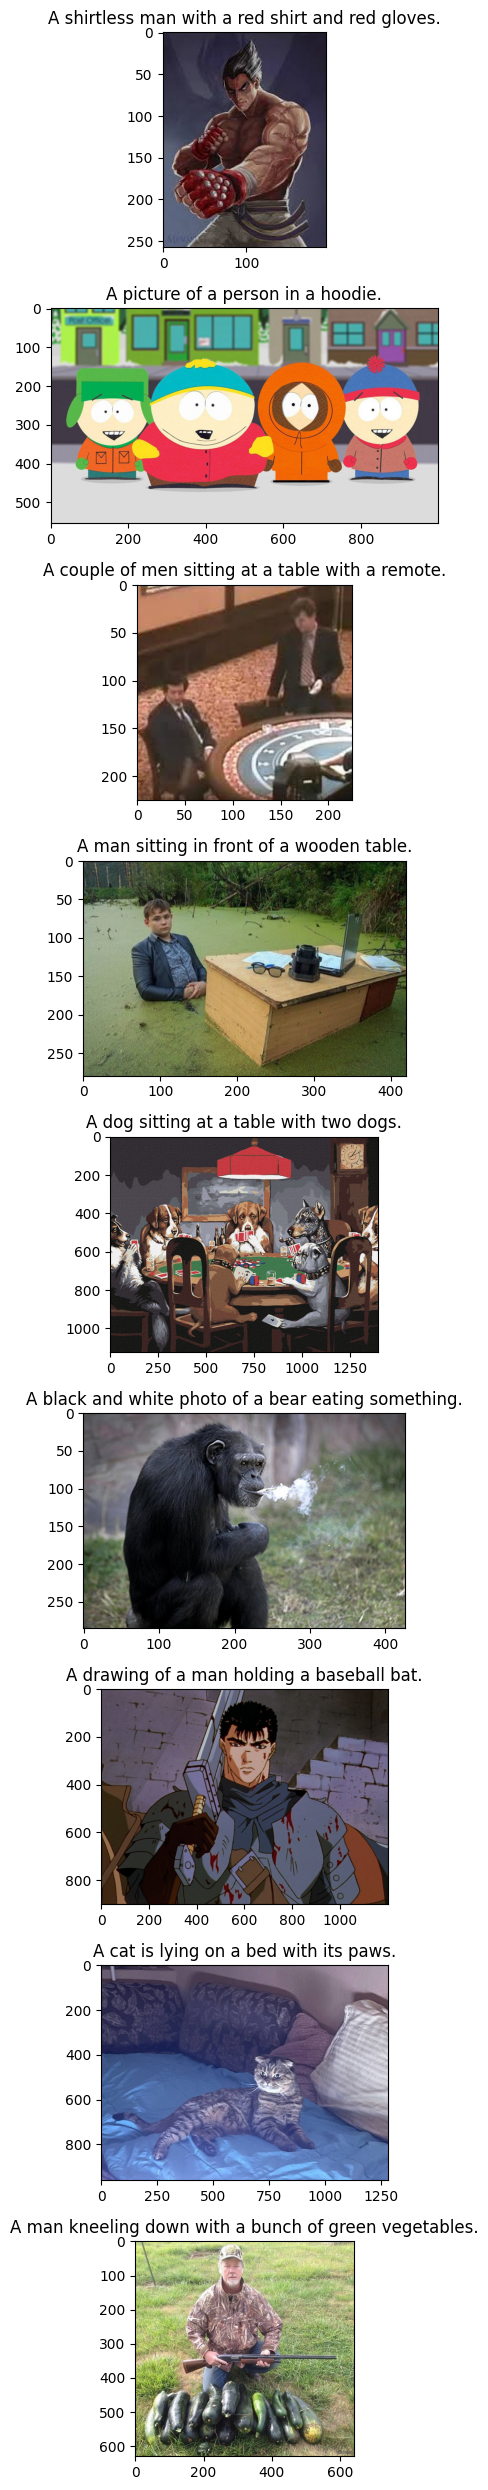

In [82]:
fig, axs = plt.subplots(len(images), 1, figsize=(40, 25))

for ax, img in zip(axs.flatten(), images):
    ax.imshow(img)
    ax.set_title(inference(img, 60))
plt.tight_layout()

Find several images on the internet and test model performance.

# Bonus

Implement [beam search](https://d2l.ai/chapter_recurrent-modern/beam-search.html) algorithm and compare it to greedy inference on the same images.

In [95]:
def inference(image: np.ndarray, max_length: int, k: int) -> str:
    """Predicts a caption for `image` with at most `max_length` tokens.
    Starts with a single BoS token. Predics the next token one by one until model predicts EoS.
    
    Arguments:
        image: image to caption
        
    Returns:
        Predicted caption
    """
    with torch.no_grad():
        vec = DINO(torch.Tensor(preprocessor(image)['pixel_values']).to('cuda')).last_hidden_state[:, 1:]
        res = [50256]
        prob_array = torch.ones((k, max_length)).cuda()
        tokens_array = torch.full((k, max_length), 50256).cuda().long()
    
        probs, ind = torch.topk(torch.nn.functional.softmax(model(vec, torch.Tensor([50256]).to('cuda').long())), k)
        prob_array[:, 1] = probs[0]
        tokens_array[:, 1] = ind[0]
        
        for i in range(2, max_length):
            inp = tokens_array[:, :i]
            for j in range(k):
                y_pred = model(vec.float(), inp[j])
                y_pred = torch.nn.functional.softmax(y_pred)
                current_token = y_pred[-1].argmax(dim=-1).item()
                if current_token != 50256:
                    tokens_array[j, i] = current_token
                    prob_array[j, i] = y_pred[-1][current_token]
                
            if torch.all(tokens_array[:, i] == 50256):
                print('breaked')
                break
                    
            
            
        where_isnt_pad = tokens_array != 50256   
        best_seq_id  = (torch.log(torch.prod(prob_array, dim=-1)) / where_isnt_pad.sum(dim=-1) ** 0.75).argmax()
        # where_isnt_pad = tokens_array[best_seq_id] != 50256
    return tokenizer.decode(tokens_array[best_seq_id][where_isnt_pad[best_seq_id]]), tokens_array, prob_array, (torch.prod(prob_array, dim=-1) / where_isnt_pad.sum(dim=-1)), best_seq_id

/tmp/ipykernel_1959/22352507.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs, ind = torch.topk(torch.nn.functional.softmax(model(vec, torch.Tensor([50256]).to('cuda').long())), k)
/tmp/ipykernel_1959/22352507.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = torch.nn.functional.softmax(y_pred)


breaked
breaked
breaked
breaked
breaked
breaked
breaked
breaked
breaked


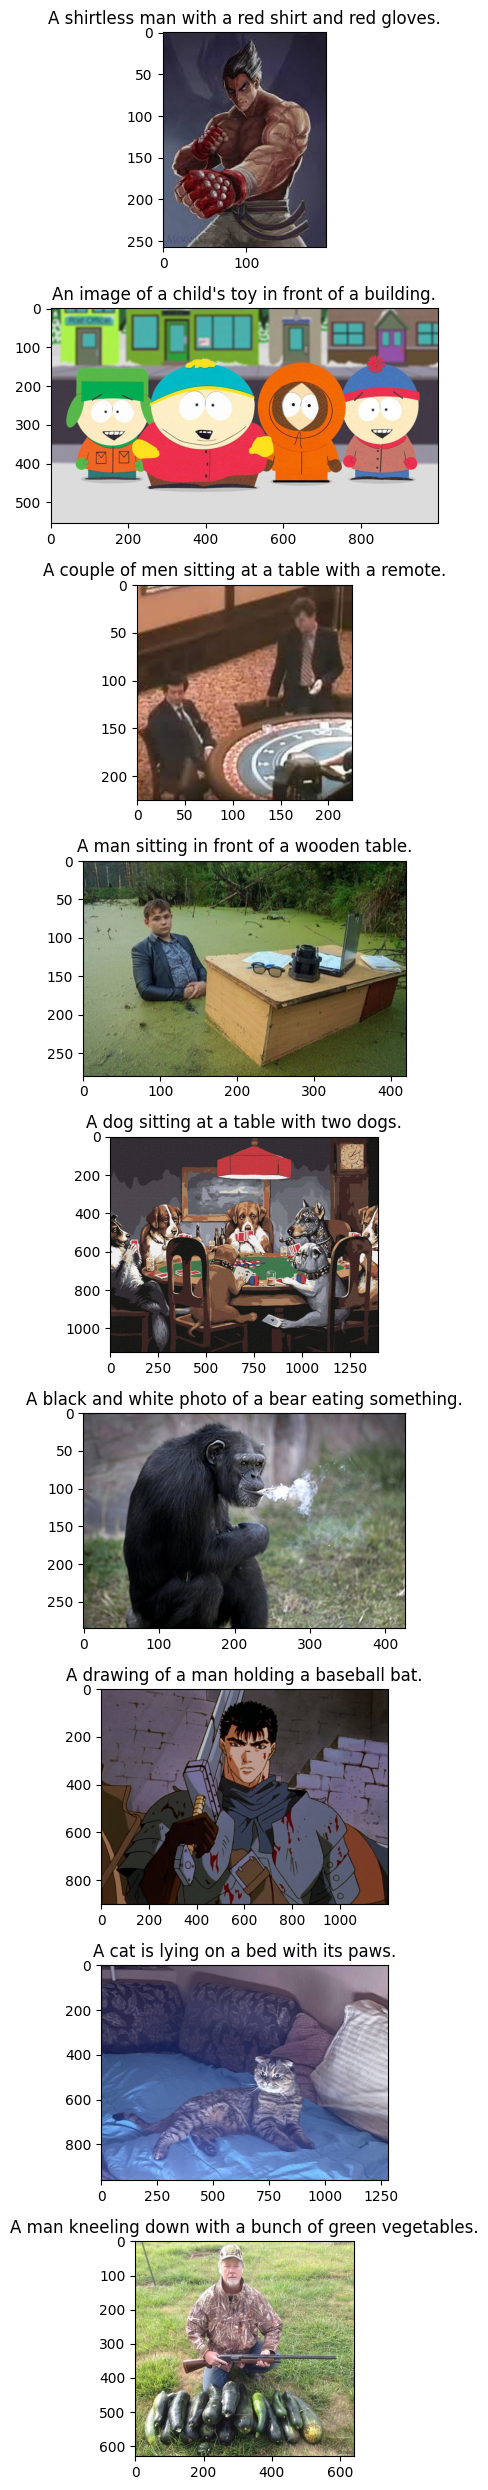

In [99]:
fig, axs = plt.subplots(len(images), 1, figsize=(40, 25))

for ax, img in zip(axs.flatten(), images):
    ax.imshow(img)
    ax.set_title(inference(img, 60, 5)[0])
plt.tight_layout()

In [90]:
inference(img, 60, 5)

/tmp/ipykernel_1959/2201630495.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs, ind = torch.topk(torch.nn.functional.softmax(model(vec, torch.Tensor([50256]).to('cuda').long())), k)
/tmp/ipykernel_1959/2201630495.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = torch.nn.functional.softmax(y_pred)


breaked


('A man kneeling down with a bunch of green vegetables.',
 tensor([[50256,    32,   582, 42687,   866,   351,   257,  7684,   286,  4077,
          13701,    13, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256],
         [50256,    64,   582, 42687,   866,   351,   257,  7684,   286,  4077,
          13701,   220, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50